In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222691, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222690, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137         0.70111    17   
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139         0.70112    17   
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132         0.70088    17   
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126         0.70114    17   
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159         0.70095    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00003   0.701320  0.00010    0.701337  
2020-01-01 17:05:00    2     1   0.00016   0.701125  0.00053    0.701157  
2020-01-01 17:10:00    2     1   0.00001   0.701125  0.00039    0.701125  
2020-01-01 17:15:00    2     1   0.00024   0.701050  0.00042    0.701025  
2020-01-01 17:20:00    2     1  -0.00026   0.701185  0.00081    0.701098

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137         0.70111    17   
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139         0.70112    17   
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132         0.70088    17   
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126         0.70114    17   
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159         0.70095    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00003   0.701320  0.00010    0.701337   
2020-01-01 17:05:00    2     1   0.00016   0.701125  0.00053    0.701157   
2020-01-01 17:10:00    2     1   0.00001   0.701125  0.00039    0.701125   
2020-01-01 17:15:00    2     1   0.00024   0.701050  0.00042    0.701025   
2020-01-01 17:20:00    2     1  -0.00026   0.701185  0.00081    0.701098   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.514463  
2020-01-01 17:05:00 -25.514742  
2020-01-01 17:10:00 -25.514742  
2020-01-01 17:15:00 -25.514784  
2020-01-01 17:20:00 -25.514742

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70127  0.70137         0.70111    17    2   
2020-01-01 17:05:00  0.70127  0.70086  0.70139         0.70112    17    2   
2020-01-01 17:10:00  0.70113  0.70093  0.70132         0.70088    17    2   
2020-01-01 17:15:00  0.70112  0.70084  0.70126         0.70114    17    2   
2020-01-01 17:20:00  0.70088  0.70078  0.70159         0.70095    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00003   0.701320  0.00010    0.701337 -25.514463  
2020-01-01 17:05:00     1   0.00016   0.701125  0.00053    0.701157 -25.514742  
2020-01-01 17:10:00     1   0.00001   0.701125  0.00039    0.701125 -25.514742  
2020-01-01 17:15:00     1   0.00024   0.701050  0.00042

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155883
155883
33403
33403
33404
33404


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155883, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155858, 24, 12)
(33378, 24, 12)
(33379, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155858, 1)
(33378, 1)
(33379, 1)


array([[0.60305166],
       [0.6032524 ],
       [0.60252976],
       ...,
       [0.64489055],
       [0.6461756 ],
       [0.64677787]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.64489055, 0.6461756 ,
       0.64677787], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 335.1552 - mae: 2.5204 - mse: 335.1552 - root_mean_squared_error: 18.3072 - mape: 6423.8354
Epoch 1: val_mse improved from inf to 0.06329, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 50s 96ms/step - loss: 335.1552 - mae: 2.5204 - mse: 335.1552 - root_mean_squared_error: 18.3072 - mape: 6423.8354 - val_loss: 0.0633 - val_mae: 0.2096 - val_mse: 0.0633 - val_root_mean_squared_error: 0.2516 - val_mape: 18716.1719
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0324 - mae: 0.1423 - mse: 0.0324 - root_mean_squared_error: 0.1799 - mape: 3887.1152
Epoch 2: val_mse did not improve from 0.06329
405/405 [==============================] - 12s 31ms/step - loss: 0.0324 - mae: 0.1423 - mse: 0.0324 - root_mean_squared_error: 0.1799 - mape: 3887.1152 - val_loss: 0.0755 - val_mae: 0.2290 - val_mse: 0.0755 - val_root_mean_squared_error: 0.2748 - val_mape: 19938.0859
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0314 - mae: 0.1377 - mse: 0.0314 - root_mean_squared_error: 0.1773 - mape: 4250.8809
Epoch 3: val_mse did not improve from 0.06329
405/405 [==============================] - 12s 31ms/s

405/405 [==============================] - 37s 92ms/step - loss: 0.0272 - mae: 0.1283 - mse: 0.0272 - root_mean_squared_error: 0.1648 - mape: 4314.0264 - val_loss: 0.0582 - val_mae: 0.2016 - val_mse: 0.0582 - val_root_mean_squared_error: 0.2412 - val_mape: 17421.8633
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0190 - mae: 0.1073 - mse: 0.0190 - root_mean_squared_error: 0.1377 - mape: 3260.8420
Epoch 7: val_mse improved from 0.05820 to 0.03094, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 0.0190 - mae: 0.1073 - mse: 0.0190 - root_mean_squared_error: 0.1377 - mape: 3260.8420 - val_loss: 0.0309 - val_mae: 0.1388 - val_mse: 0.0309 - val_root_mean_squared_error: 0.1759 - val_mape: 14672.9707
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0095 - mae: 0.0761 - mse: 0.0095 - root_mean_squared_error: 0.0975 - mape: 2772.7505
Epoch 8: val_mse improved from 0.03094 to 0.01657, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0095 - mae: 0.0761 - mse: 0.0095 - root_mean_squared_error: 0.0974 - mape: 2767.1250 - val_loss: 0.0166 - val_mae: 0.0930 - val_mse: 0.0166 - val_root_mean_squared_error: 0.1287 - val_mape: 12250.8730
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0059 - mae: 0.0598 - mse: 0.0059 - root_mean_squared_error: 0.0769 - mape: 2187.9854
Epoch 9: val_mse improved from 0.01657 to 0.01009, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 0.0059 - mae: 0.0598 - mse: 0.0059 - root_mean_squared_error: 0.0769 - mape: 2187.9854 - val_loss: 0.0101 - val_mae: 0.0704 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1004 - val_mape: 10501.2598
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0508 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 2234.7476
Epoch 10: val_mse improved from 0.01009 to 0.00708, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0043 - mae: 0.0508 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 2234.7476 - val_loss: 0.0071 - val_mae: 0.0575 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0842 - val_mape: 9378.3770
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0457 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 2087.9858
Epoch 11: val_mse improved from 0.00708 to 0.00577, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0035 - mae: 0.0457 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 2087.9858 - val_loss: 0.0058 - val_mae: 0.0527 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0760 - val_mape: 8651.7637
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0423 - mse: 0.0030 - root_mean_squared_error: 0.0550 - mape: 1880.8865
Epoch 12: val_mse improved from 0.00577 to 0.00498, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0030 - mae: 0.0423 - mse: 0.0030 - root_mean_squared_error: 0.0550 - mape: 1880.8865 - val_loss: 0.0050 - val_mae: 0.0523 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0705 - val_mape: 8046.6387
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0394 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 1565.8693
Epoch 13: val_mse improved from 0.00498 to 0.00397, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0026 - mae: 0.0394 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 1565.8693 - val_loss: 0.0040 - val_mae: 0.0443 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0630 - val_mape: 7580.1914
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0364 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 1612.2046
Epoch 14: val_mse improved from 0.00397 to 0.00385, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0022 - mae: 0.0364 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 1612.2046 - val_loss: 0.0038 - val_mae: 0.0496 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0620 - val_mape: 7179.8008
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 1478.1681
Epoch 15: val_mse improved from 0.00385 to 0.00279, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0428 - mape: 1475.1647 - val_loss: 0.0028 - val_mae: 0.0376 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 6742.6543
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1410.8358
Epoch 16: val_mse improved from 0.00279 to 0.00272, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1407.9673 - val_loss: 0.0027 - val_mae: 0.0413 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0521 - val_mape: 6425.2871
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0369 - mape: 1208.7134
Epoch 17: val_mse improved from 0.00272 to 0.00251, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0369 - mape: 1208.7134 - val_loss: 0.0025 - val_mae: 0.0395 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 6173.4058
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1260.9346
Epoch 18: val_mse improved from 0.00251 to 0.00207, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1260.9346 - val_loss: 0.0021 - val_mae: 0.0353 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 5962.3960
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1207.7194
Epoch 19: val_mse improved from 0.00207 to 0.00151, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1207.7194 - val_loss: 0.0015 - val_mae: 0.0269 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 5668.9219
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 8.9212e-04 - mae: 0.0232 - mse: 8.9212e-04 - root_mean_squared_error: 0.0299 - mape: 1241.1044
Epoch 20: val_mse did not improve from 0.00151
405/405 [==============================] - 13s 31ms/step - loss: 8.9212e-04 - mae: 0.0232 - mse: 8.9212e-04 - root_mean_squared_error: 0.0299 - mape: 1241.1044 - val_loss: 0.0016 - val_mae: 0.0292 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0403 - val_mape: 5497.8081
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 8.0146e-04 - mae: 0.0221 - mse: 8.0146e-04 - root_mean_squared_error: 0.0283 - mape: 1166.9122
Epoch 21: val_mse improved from 0.00151 to 0.00139, saving model to /content/dr

405/405 [==============================] - 37s 93ms/step - loss: 8.0146e-04 - mae: 0.0221 - mse: 8.0146e-04 - root_mean_squared_error: 0.0283 - mape: 1166.9122 - val_loss: 0.0014 - val_mae: 0.0270 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 5253.1406
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 7.4493e-04 - mae: 0.0214 - mse: 7.4493e-04 - root_mean_squared_error: 0.0273 - mape: 1005.2399
Epoch 22: val_mse improved from 0.00139 to 0.00130, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 7.4493e-04 - mae: 0.0214 - mse: 7.4493e-04 - root_mean_squared_error: 0.0273 - mape: 1005.2399 - val_loss: 0.0013 - val_mae: 0.0257 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 5090.9028
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 6.0976e-04 - mae: 0.0193 - mse: 6.0976e-04 - root_mean_squared_error: 0.0247 - mape: 1003.3943
Epoch 23: val_mse did not improve from 0.00130
405/405 [==============================] - 13s 31ms/step - loss: 6.0976e-04 - mae: 0.0193 - mse: 6.0976e-04 - root_mean_squared_error: 0.0247 - mape: 1003.3943 - val_loss: 0.0015 - val_mae: 0.0318 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 4866.1221
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 5.9302e-04 - mae: 0.0192 - mse: 5.9302e-04 - root_mean_squared_error: 0.0244 - mape: 987.7226
Epoch 24: val_mse did not improve from 0.00130
405/405 [================

405/405 [==============================] - 38s 93ms/step - loss: 5.0395e-04 - mae: 0.0176 - mse: 5.0395e-04 - root_mean_squared_error: 0.0224 - mape: 1055.3242 - val_loss: 0.0011 - val_mae: 0.0233 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 4573.7339
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 5.2110e-04 - mae: 0.0180 - mse: 5.2110e-04 - root_mean_squared_error: 0.0228 - mape: 979.9604
Epoch 26: val_mse improved from 0.00108 to 0.00075, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 5.2110e-04 - mae: 0.0180 - mse: 5.2110e-04 - root_mean_squared_error: 0.0228 - mape: 979.9604 - val_loss: 7.4562e-04 - val_mae: 0.0195 - val_mse: 7.4562e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 4380.7856
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 4.3114e-04 - mae: 0.0163 - mse: 4.3114e-04 - root_mean_squared_error: 0.0208 - mape: 962.5497
Epoch 27: val_mse did not improve from 0.00075
405/405 [==============================] - 13s 31ms/step - loss: 4.3114e-04 - mae: 0.0163 - mse: 4.3114e-04 - root_mean_squared_error: 0.0208 - mape: 962.5497 - val_loss: 7.4965e-04 - val_mae: 0.0185 - val_mse: 7.4965e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 4235.8320
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 4.0669e-04 - mae: 0.0160 - mse: 4.0669e-04 - root_mean_squared_error: 0.0202 - mape: 892.3113
Epoch 28: val_mse did not improve from 0.00075
405/405 [===

405/405 [==============================] - 37s 92ms/step - loss: 3.8669e-04 - mae: 0.0155 - mse: 3.8669e-04 - root_mean_squared_error: 0.0197 - mape: 871.4171 - val_loss: 6.0782e-04 - val_mae: 0.0163 - val_mse: 6.0782e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 4036.5850
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 3.5919e-04 - mae: 0.0149 - mse: 3.5919e-04 - root_mean_squared_error: 0.0190 - mape: 852.5289
Epoch 30: val_mse did not improve from 0.00061
405/405 [==============================] - 13s 31ms/step - loss: 3.5919e-04 - mae: 0.0149 - mse: 3.5919e-04 - root_mean_squared_error: 0.0190 - mape: 852.5289 - val_loss: 0.0010 - val_mae: 0.0245 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 4128.8359
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 3.2476e-04 - mae: 0.0143 - mse: 3.2476e-04 - root_mean_squared_error: 0.0180 - mape: 849.9579
Epoch 31: val_mse did not improve from 0.00061
405/405 [===========

405/405 [==============================] - 38s 94ms/step - loss: 2.4436e-04 - mae: 0.0123 - mse: 2.4436e-04 - root_mean_squared_error: 0.0156 - mape: 718.4415 - val_loss: 6.0255e-04 - val_mae: 0.0167 - val_mse: 6.0255e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 3639.1292
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 2.4688e-04 - mae: 0.0124 - mse: 2.4688e-04 - root_mean_squared_error: 0.0157 - mape: 767.4658
Epoch 37: val_mse improved from 0.00060 to 0.00059, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 2.4688e-04 - mae: 0.0124 - mse: 2.4688e-04 - root_mean_squared_error: 0.0157 - mape: 767.4658 - val_loss: 5.8771e-04 - val_mae: 0.0179 - val_mse: 5.8771e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 3540.4124
Epoch 38/60
405/405 [==============================] - ETA: 0s - loss: 2.4143e-04 - mae: 0.0122 - mse: 2.4143e-04 - root_mean_squared_error: 0.0155 - mape: 718.8015
Epoch 38: val_mse did not improve from 0.00059
405/405 [==============================] - 13s 31ms/step - loss: 2.4143e-04 - mae: 0.0122 - mse: 2.4143e-04 - root_mean_squared_error: 0.0155 - mape: 718.8015 - val_loss: 6.3806e-04 - val_mae: 0.0202 - val_mse: 6.3806e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 3458.3513
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 2.2428e-04 - mae: 0.0117 - mse: 2.2428e-04 - root_mean_squared_error: 0.0150 - mape: 745.2205
Epoch 39: val_mse improved from 0.00059 to 0.00049, saving 

405/405 [==============================] - 37s 92ms/step - loss: 2.2428e-04 - mae: 0.0117 - mse: 2.2428e-04 - root_mean_squared_error: 0.0150 - mape: 745.2205 - val_loss: 4.8666e-04 - val_mae: 0.0164 - val_mse: 4.8666e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 3364.6169
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.1276e-04 - mae: 0.0116 - mse: 2.1276e-04 - root_mean_squared_error: 0.0146 - mape: 697.9587
Epoch 40: val_mse improved from 0.00049 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 2.1276e-04 - mae: 0.0116 - mse: 2.1276e-04 - root_mean_squared_error: 0.0146 - mape: 697.9587 - val_loss: 4.3426e-04 - val_mae: 0.0139 - val_mse: 4.3426e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 3339.1096
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 2.4061e-04 - mae: 0.0119 - mse: 2.4061e-04 - root_mean_squared_error: 0.0155 - mape: 688.0932
Epoch 41: val_mse did not improve from 0.00043
405/405 [==============================] - 13s 31ms/step - loss: 2.4061e-04 - mae: 0.0119 - mse: 2.4061e-04 - root_mean_squared_error: 0.0155 - mape: 688.0932 - val_loss: 7.4323e-04 - val_mae: 0.0236 - val_mse: 7.4323e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 3278.8291
Epoch 42/60
405/405 [==============================] - ETA: 0s - loss: 1.8500e-04 - mae: 0.0107 - mse: 1.8500e-04 - root_mean_squared_error: 0.0136 - mape: 658.1777
Epoch 42: val_mse improved from 0.00043 to 0.00038, saving 

405/405 [==============================] - 37s 92ms/step - loss: 1.8500e-04 - mae: 0.0107 - mse: 1.8500e-04 - root_mean_squared_error: 0.0136 - mape: 658.1777 - val_loss: 3.7645e-04 - val_mae: 0.0128 - val_mse: 3.7645e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 3211.7561
Epoch 43/60
405/405 [==============================] - ETA: 0s - loss: 2.0302e-04 - mae: 0.0111 - mse: 2.0302e-04 - root_mean_squared_error: 0.0142 - mape: 636.1603
Epoch 43: val_mse improved from 0.00038 to 0.00037, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 2.0302e-04 - mae: 0.0111 - mse: 2.0302e-04 - root_mean_squared_error: 0.0142 - mape: 636.1603 - val_loss: 3.7244e-04 - val_mae: 0.0143 - val_mse: 3.7244e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 3124.5532
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 1.8324e-04 - mae: 0.0108 - mse: 1.8324e-04 - root_mean_squared_error: 0.0135 - mape: 627.8041
Epoch 44: val_mse did not improve from 0.00037
405/405 [==============================] - 13s 31ms/step - loss: 1.8324e-04 - mae: 0.0108 - mse: 1.8324e-04 - root_mean_squared_error: 0.0135 - mape: 627.8041 - val_loss: 3.7386e-04 - val_mae: 0.0148 - val_mse: 3.7386e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 3041.7122
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 1.8598e-04 - mae: 0.0105 - mse: 1.8598e-04 - root_mean_squared_error: 0.0136 - mape: 588.1721
Epoch 45: val_mse did not improve from 0.00037
405/405 [===

405/405 [==============================] - 37s 92ms/step - loss: 1.8713e-04 - mae: 0.0108 - mse: 1.8713e-04 - root_mean_squared_error: 0.0137 - mape: 621.4860 - val_loss: 3.3036e-04 - val_mae: 0.0131 - val_mse: 3.3036e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2956.9207
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 1.7505e-04 - mae: 0.0103 - mse: 1.7505e-04 - root_mean_squared_error: 0.0132 - mape: 566.8109
Epoch 47: val_mse improved from 0.00033 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 1.7493e-04 - mae: 0.0103 - mse: 1.7493e-04 - root_mean_squared_error: 0.0132 - mape: 565.6578 - val_loss: 2.7783e-04 - val_mae: 0.0115 - val_mse: 2.7783e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 2860.7808
Epoch 48/60
405/405 [==============================] - ETA: 0s - loss: 1.8530e-04 - mae: 0.0108 - mse: 1.8530e-04 - root_mean_squared_error: 0.0136 - mape: 551.0583
Epoch 48: val_mse did not improve from 0.00028
405/405 [==============================] - 13s 31ms/step - loss: 1.8530e-04 - mae: 0.0108 - mse: 1.8530e-04 - root_mean_squared_error: 0.0136 - mape: 551.0583 - val_loss: 4.4262e-04 - val_mae: 0.0176 - val_mse: 4.4262e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 2824.8611
Epoch 49/60
405/405 [==============================] - ETA: 0s - loss: 1.4392e-04 - mae: 0.0094 - mse: 1.4392e-04 - root_mean_squared_error: 0.0120 - mape: 574.2444
Epoch 49: val_mse did not improve from 0.00028
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 1.7695e-04 - mae: 0.0103 - mse: 1.7695e-04 - root_mean_squared_error: 0.0133 - mape: 542.2537 - val_loss: 1.9224e-04 - val_mae: 0.0099 - val_mse: 1.9224e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2682.9277
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 1.4279e-04 - mae: 0.0094 - mse: 1.4279e-04 - root_mean_squared_error: 0.0119 - mape: 527.7458
Epoch 52: val_mse did not improve from 0.00019
405/405 [==============================] - 13s 31ms/step - loss: 1.4279e-04 - mae: 0.0094 - mse: 1.4279e-04 - root_mean_squared_error: 0.0119 - mape: 527.7458 - val_loss: 3.1484e-04 - val_mae: 0.0139 - val_mse: 3.1484e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 2700.1667
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 1.2421e-04 - mae: 0.0086 - mse: 1.2421e-04 - root_mean_squared_error: 0.0111 - mape: 546.1996
Epoch 53: val_mse did not improve from 0.00019
405/405 [===

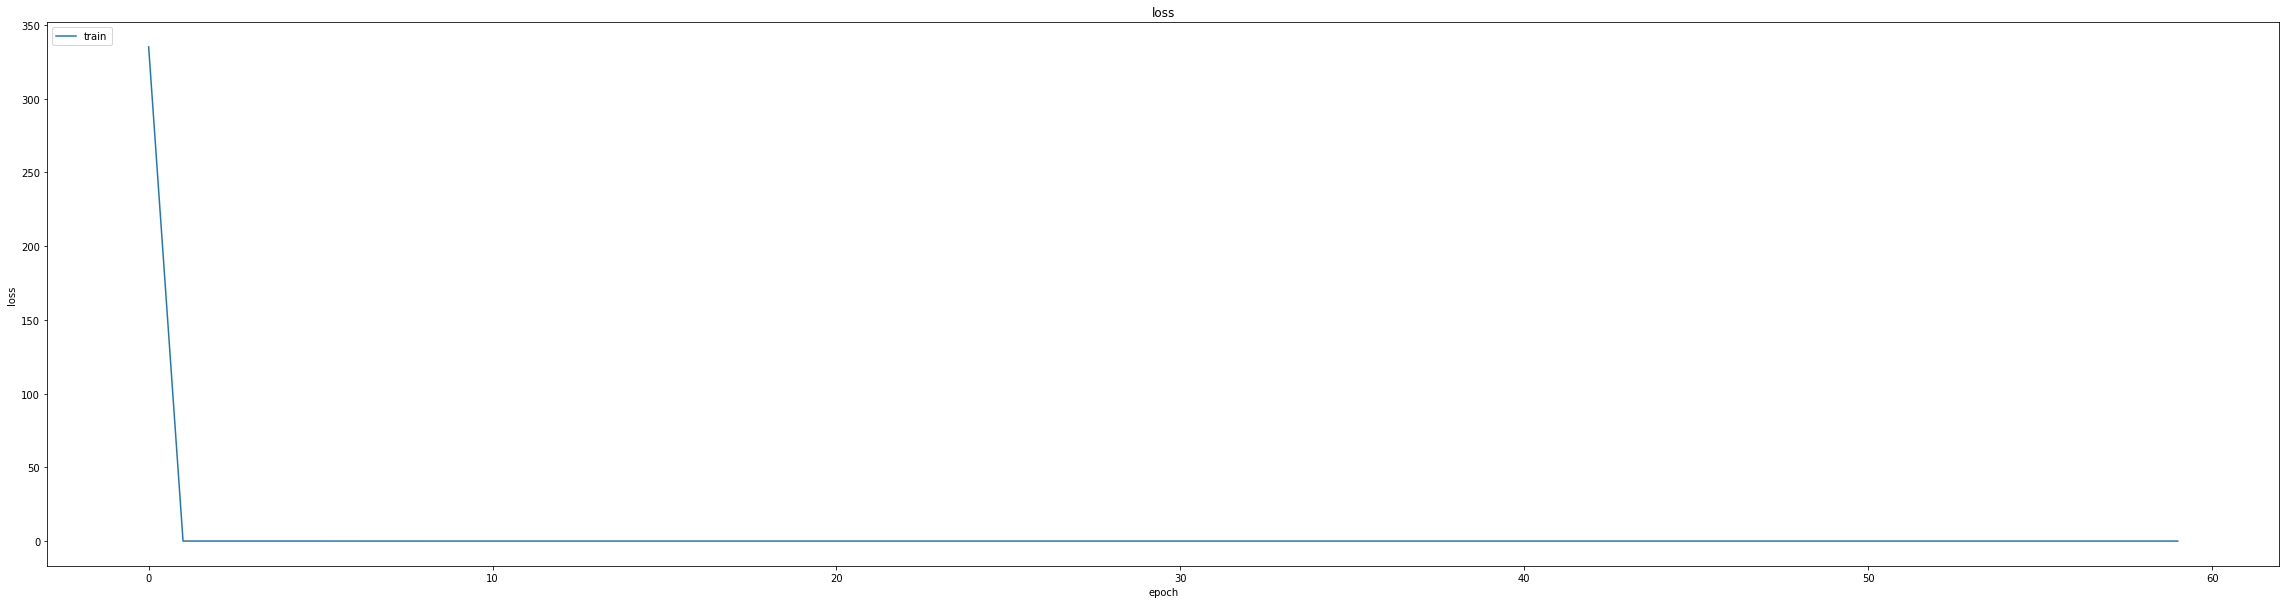

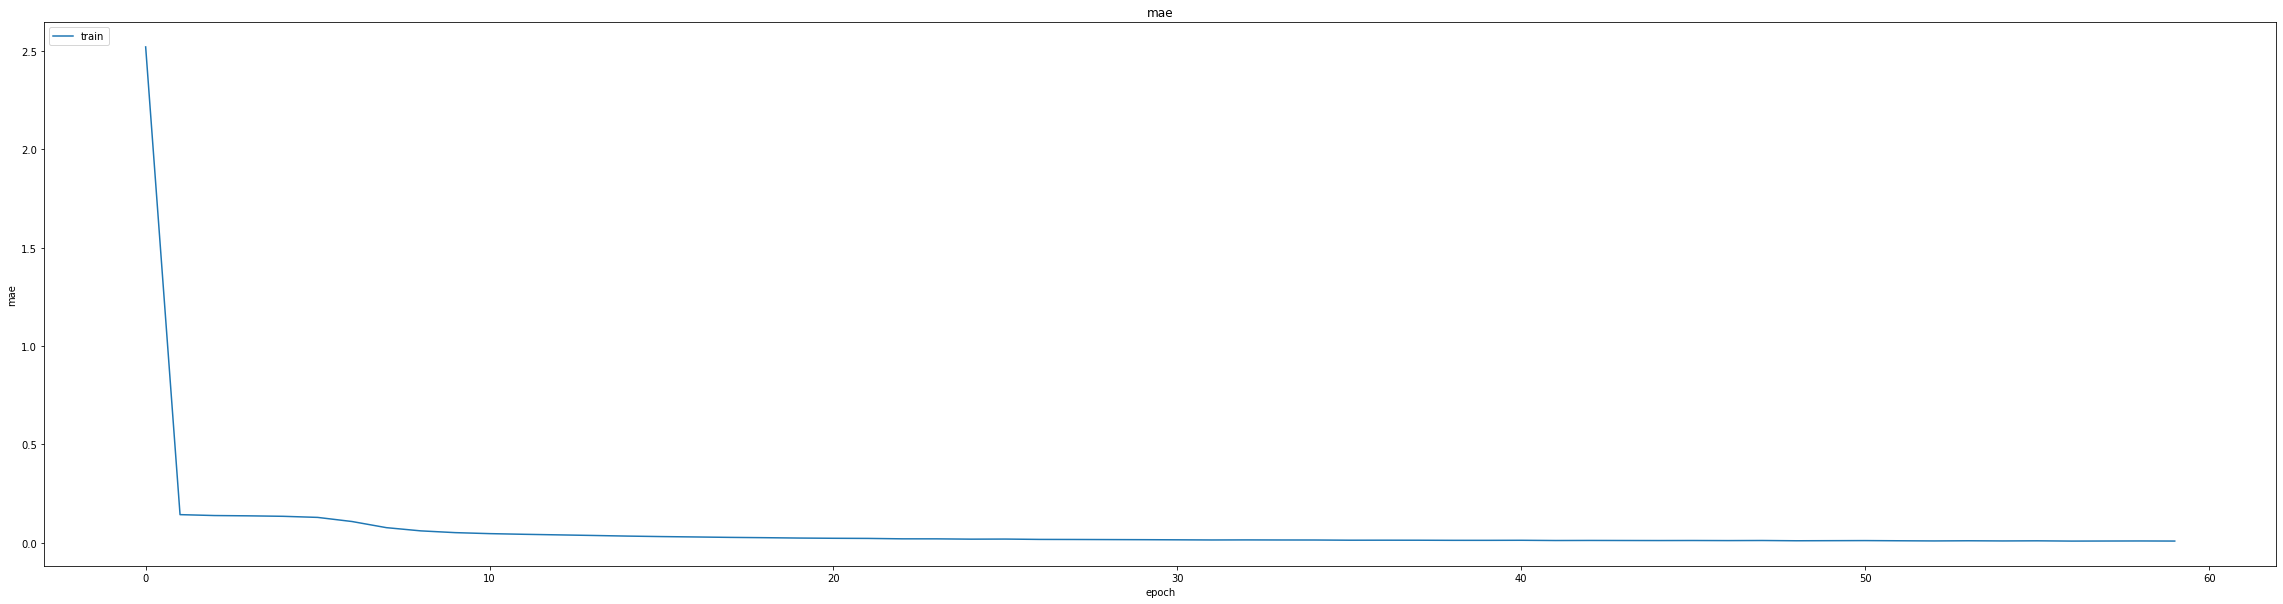

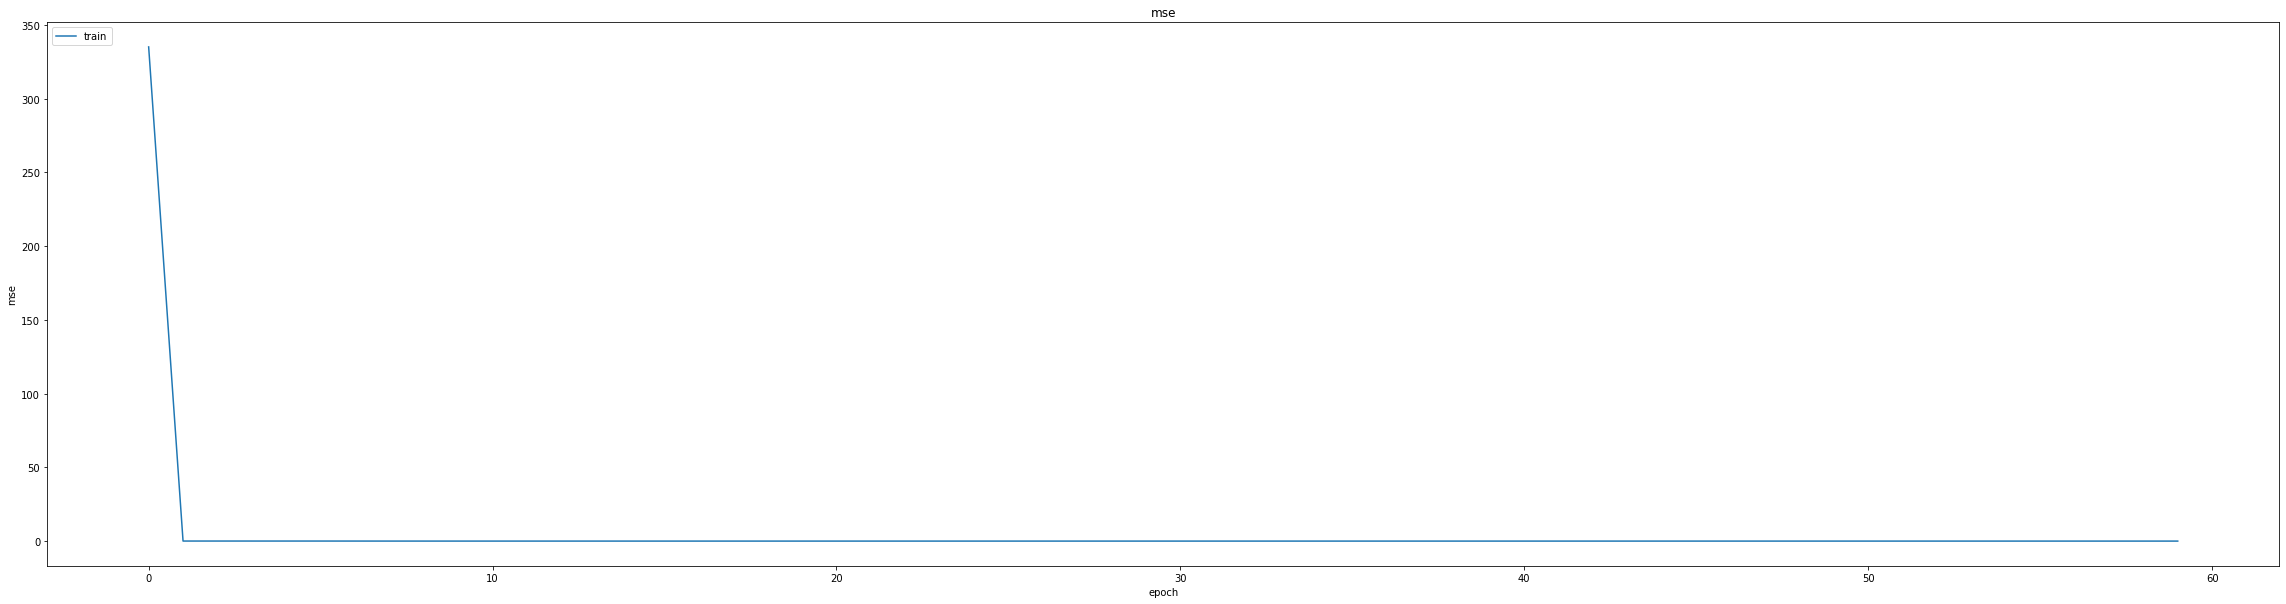

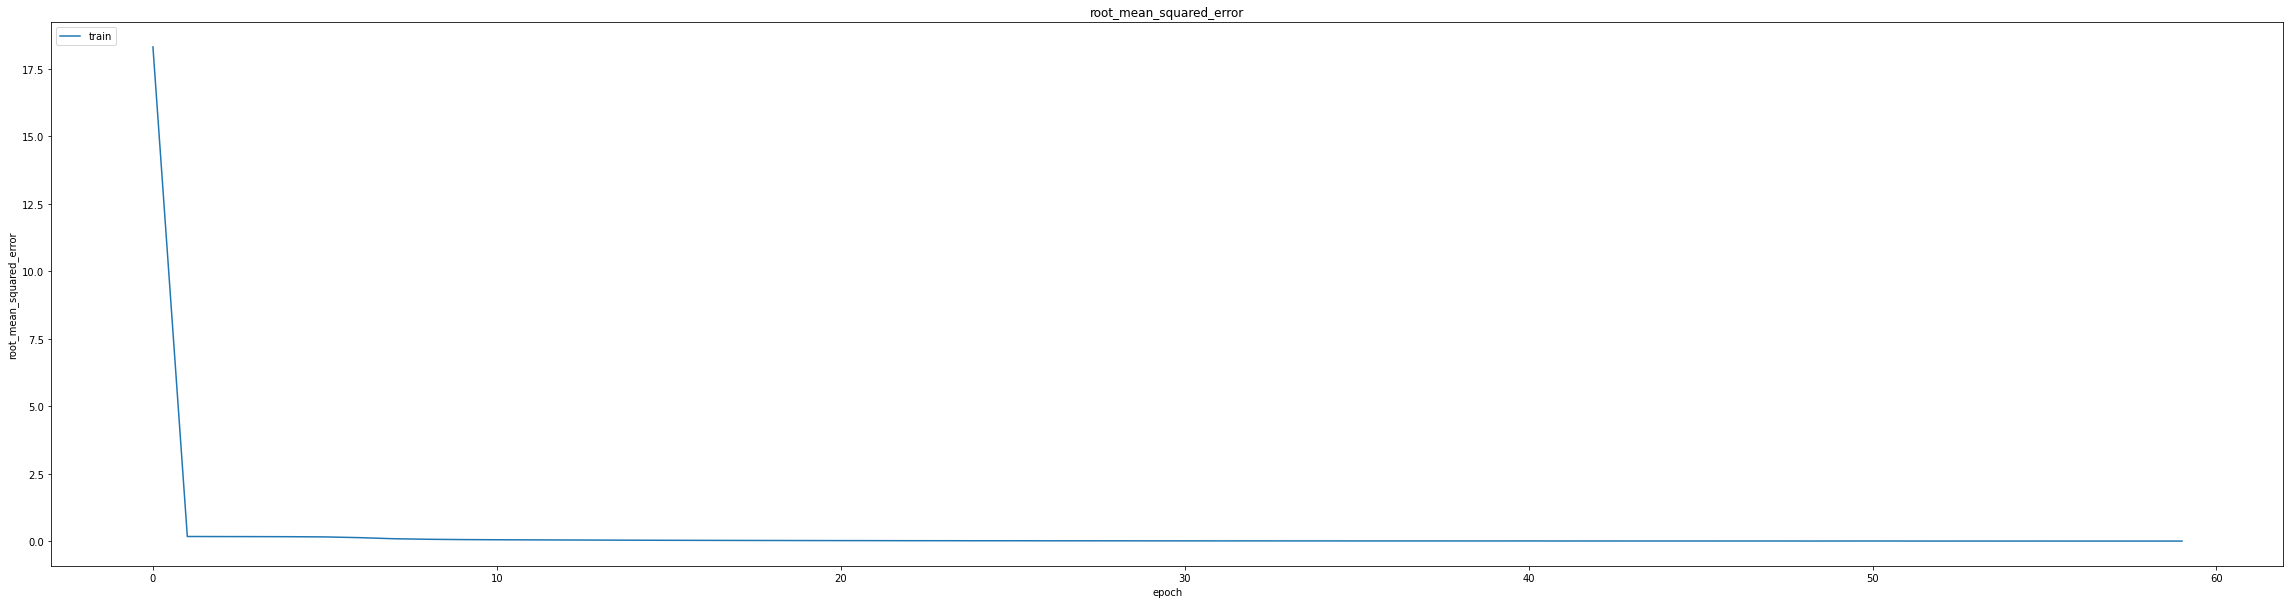

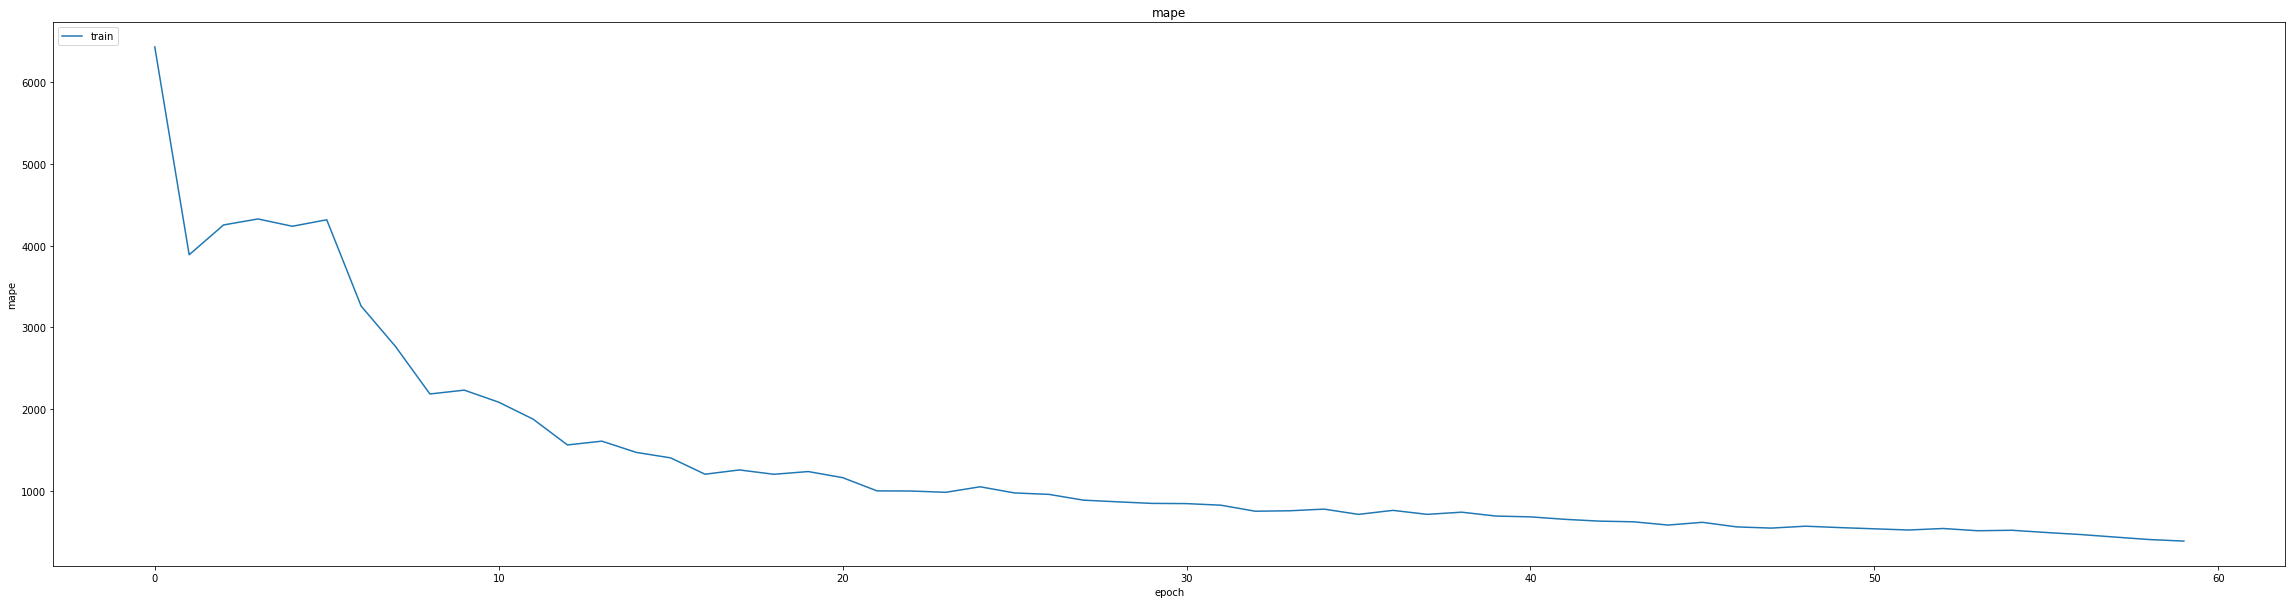

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009889439679682255
0.013865059241652489
1044/1044 [==============================] - 9s 7ms/step
0.9943187665237928


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 0.0046 - mae: 0.0303 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 603.0500
Epoch 1: val_mse did not improve from 0.00019
405/405 [==============================] - 21s 37ms/step - loss: 0.0046 - mae: 0.0303 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 603.0500 - val_loss: 2.9236e-04 - val_mae: 0.0124 - val_mse: 2.9236e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2876.2090 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 8.4238e-05 - mae: 0.0071 - mse: 8.4238e-05 - root_mean_squared_error: 0.0092 - mape: 560.0560
Epoch 2: val_mse improved from 0.00019 to 0.00012, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 8.4238e-05 - mae: 0.0071 - mse: 8.4238e-05 - root_mean_squared_error: 0.0092 - mape: 560.0560 - val_loss: 1.1796e-04 - val_mae: 0.0075 - val_mse: 1.1796e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 2536.5359 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
405/405 [==============================] - ETA: 0s - loss: 6.0832e-05 - mae: 0.0061 - mse: 6.0832e-05 - root_mean_squared_error: 0.0078 - mape: 567.0801
Epoch 3: val_mse did not improve from 0.00012
405/405 [==============================] - 12s 31ms/step - loss: 6.0832e-05 - mae: 0.0061 - mse: 6.0832e-05 - root_mean_squared_error: 0.0078 - mape: 567.0801 - val_loss: 1.4230e-04 - val_mae: 0.0091 - val_mse: 1.4230e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 2399.5583 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 5.1631e-05 - mae: 0.0056 - mse: 5.1631e-05 - root_mean_squared_error: 0.0072 - mape: 456.1

405/405 [==============================] - 38s 93ms/step - loss: 5.7364e-05 - mae: 0.0060 - mse: 5.7364e-05 - root_mean_squared_error: 0.0076 - mape: 266.4810 - val_loss: 1.0329e-04 - val_mae: 0.0072 - val_mse: 1.0329e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1854.4329 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
405/405 [==============================] - ETA: 0s - loss: 3.6404e-05 - mae: 0.0047 - mse: 3.6404e-05 - root_mean_squared_error: 0.0060 - mape: 284.6846
Epoch 13: val_mse did not improve from 0.00010
405/405 [==============================] - 13s 31ms/step - loss: 3.6404e-05 - mae: 0.0047 - mse: 3.6404e-05 - root_mean_squared_error: 0.0060 - mape: 284.6846 - val_loss: 1.6411e-04 - val_mae: 0.0105 - val_mse: 1.6411e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1773.9557 - lr: 5.3144e-04
Epoch 14/20
405/405 [==============================] - ETA: 0s - loss: 4.4327e-05 - mae: 0.0053 - mse: 4.4327e-05 - root_mean_squared_error: 0.0067 - mape

405/405 [==============================] - 38s 93ms/step - loss: 4.4327e-05 - mae: 0.0053 - mse: 4.4327e-05 - root_mean_squared_error: 0.0067 - mape: 204.3619 - val_loss: 9.8724e-05 - val_mae: 0.0074 - val_mse: 9.8724e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1692.1464 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
405/405 [==============================] - ETA: 0s - loss: 3.0447e-05 - mae: 0.0044 - mse: 3.0447e-05 - root_mean_squared_error: 0.0055 - mape: 194.4244
Epoch 15: val_mse did not improve from 0.00010
405/405 [==============================] - 13s 31ms/step - loss: 3.0447e-05 - mae: 0.0044 - mse: 3.0447e-05 - root_mean_squared_error: 0.0055 - mape: 194.4244 - val_loss: 1.4069e-04 - val_mae: 0.0086 - val_mse: 1.4069e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 1942.6726 - lr: 4.7830e-04
Epoch 16/20
405/405 [==============================] - ETA: 0s - loss: 3.8278e-05 - mae: 0.0049 - mse: 3.8278e-05 - root_mean_squared_error: 0.0062 - map

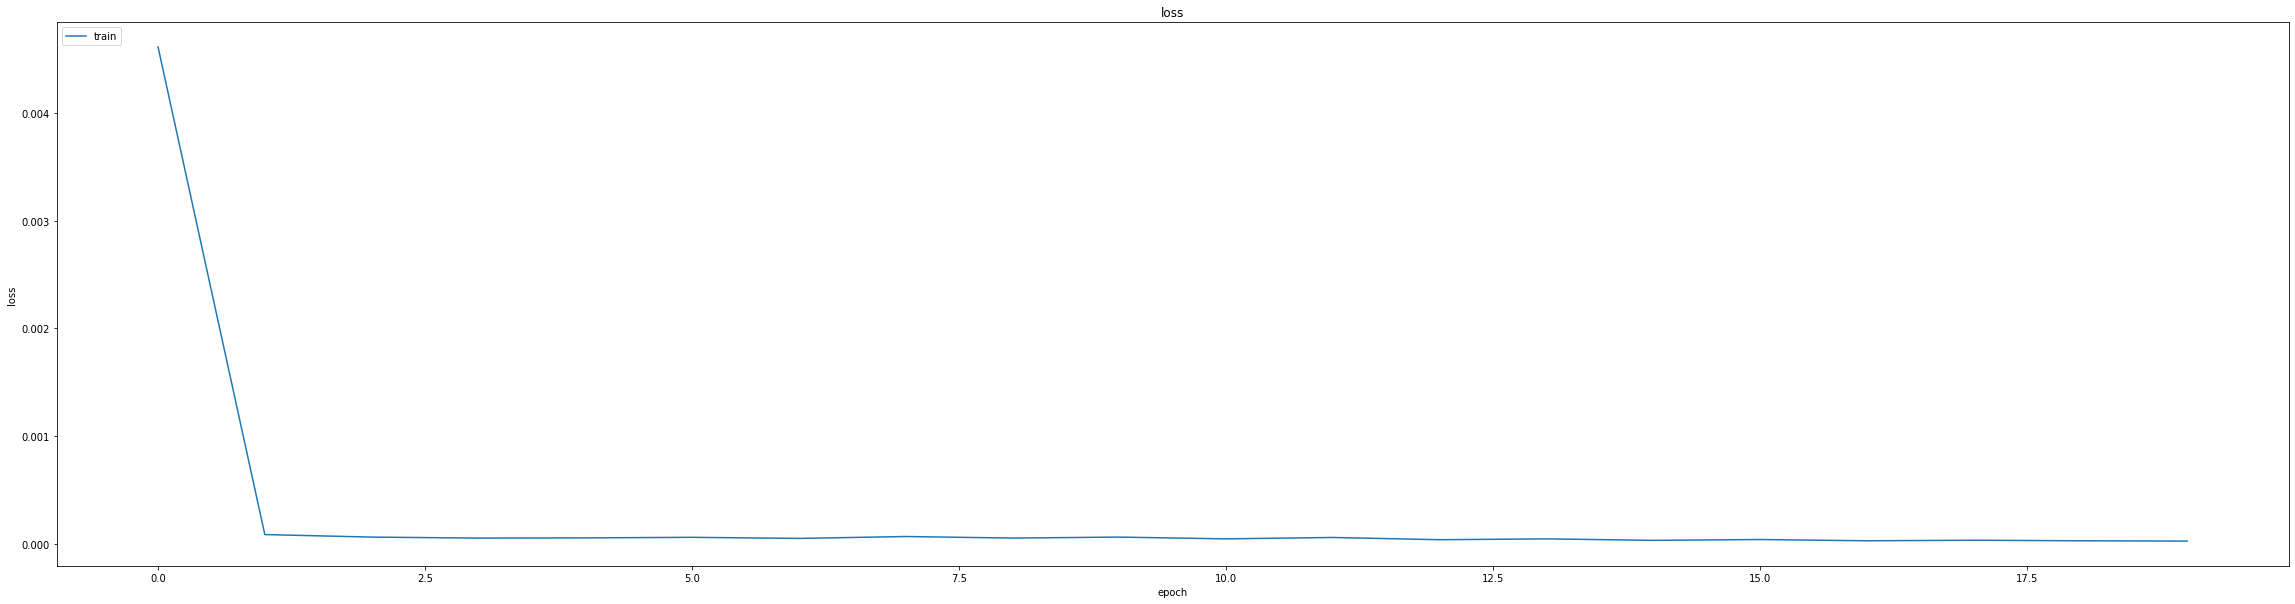

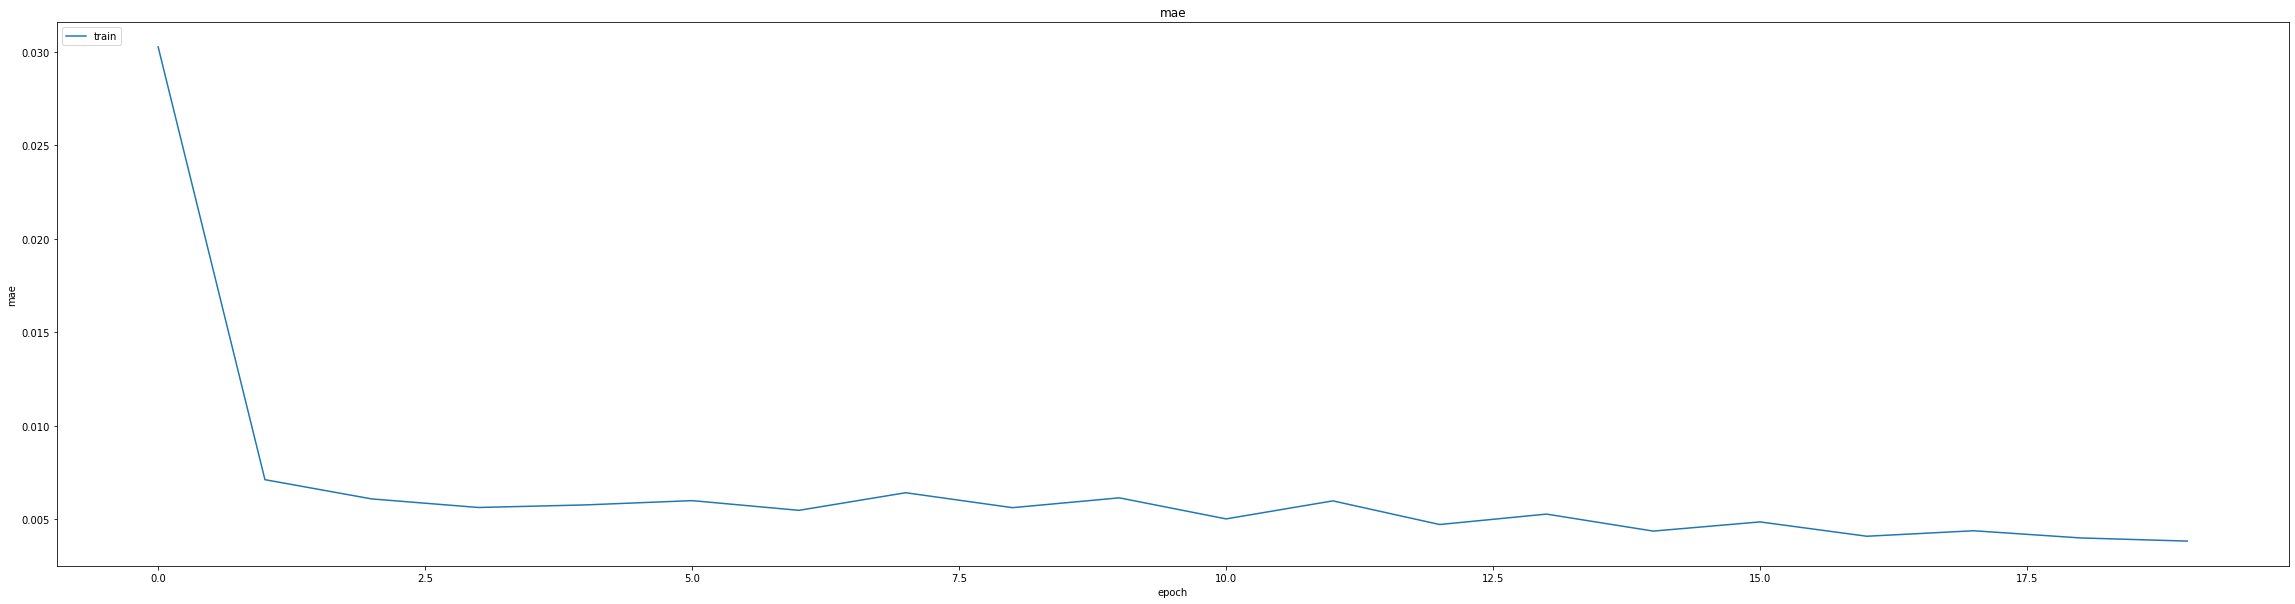

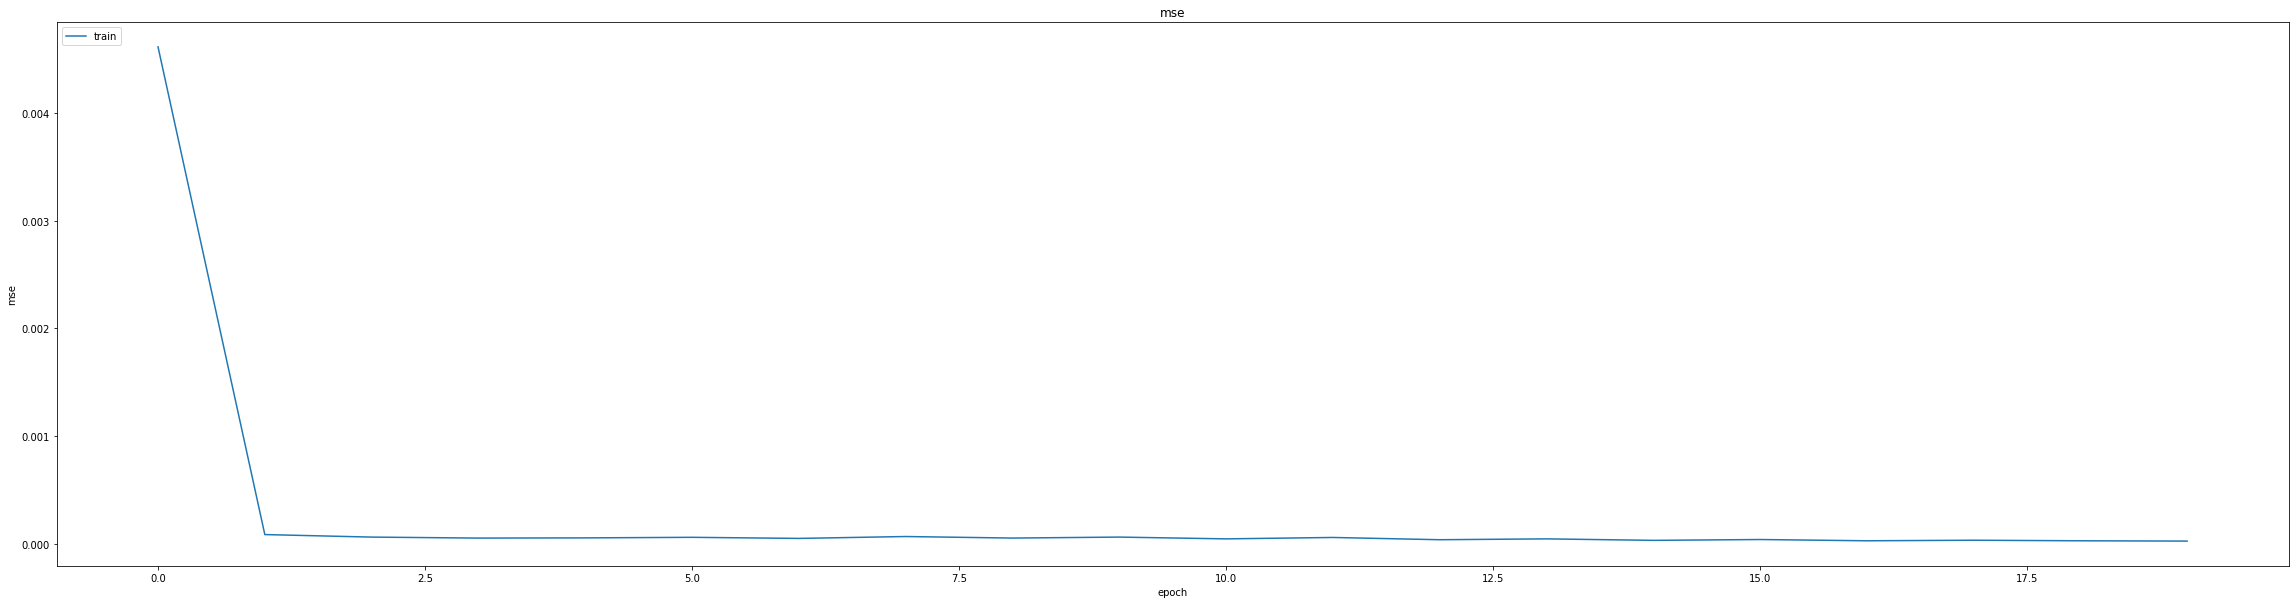

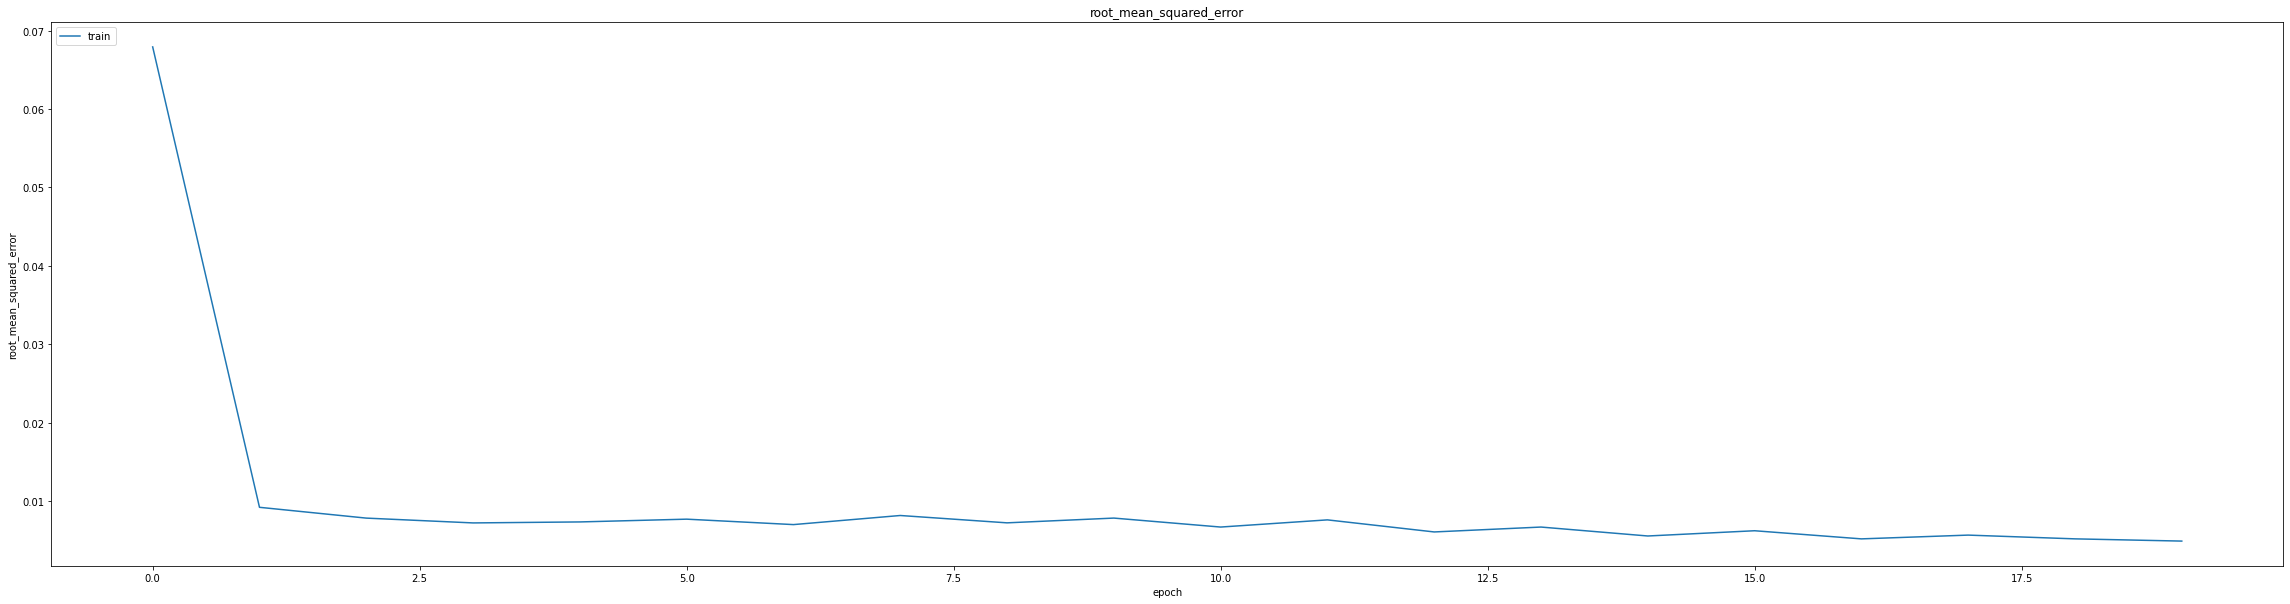

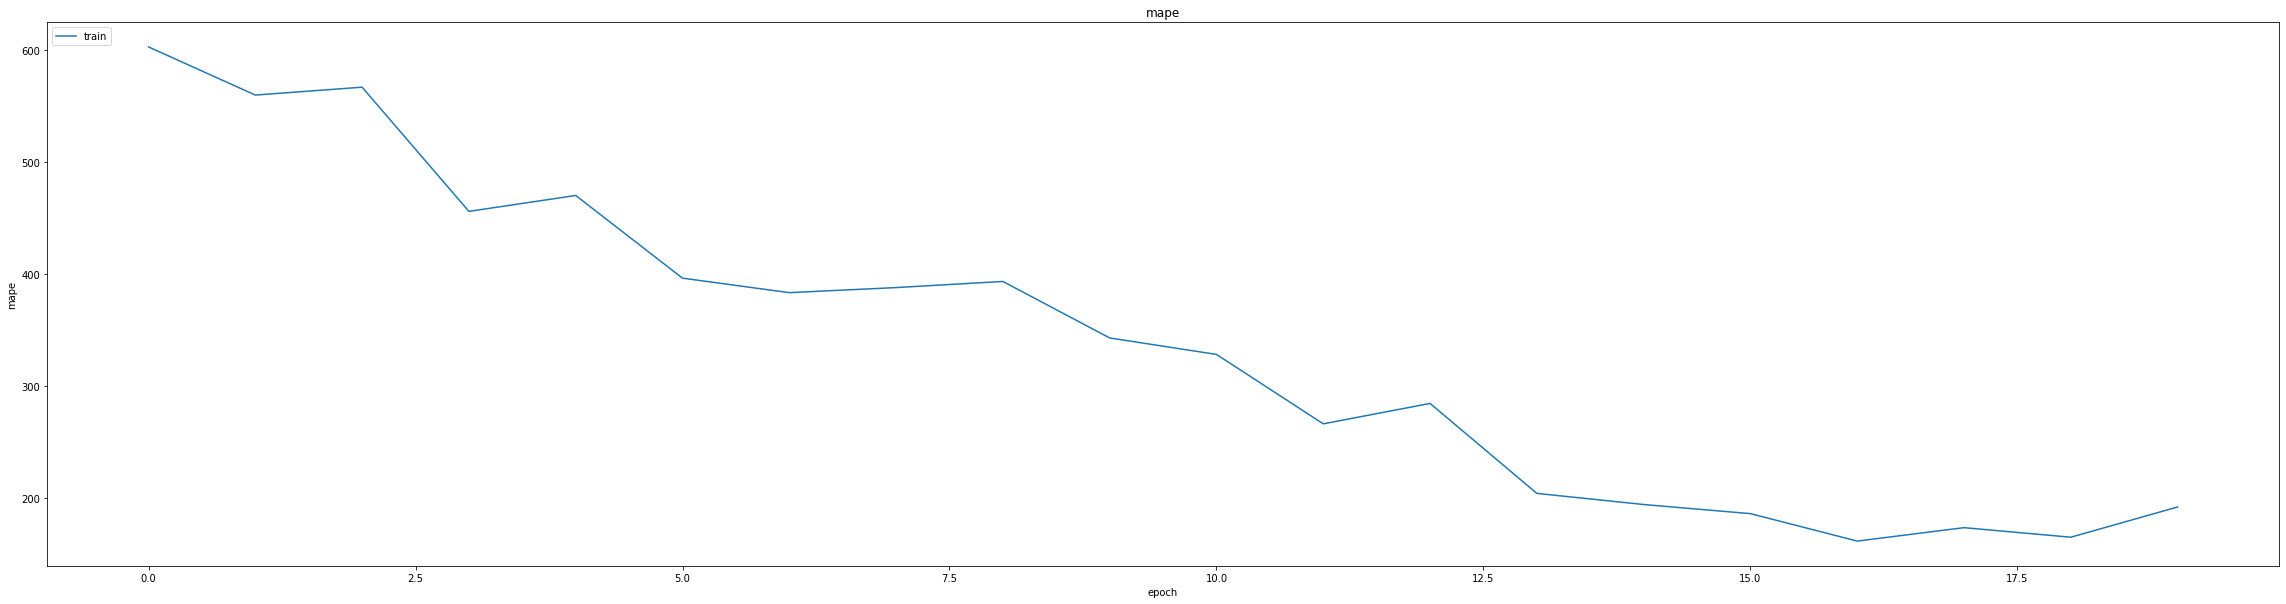

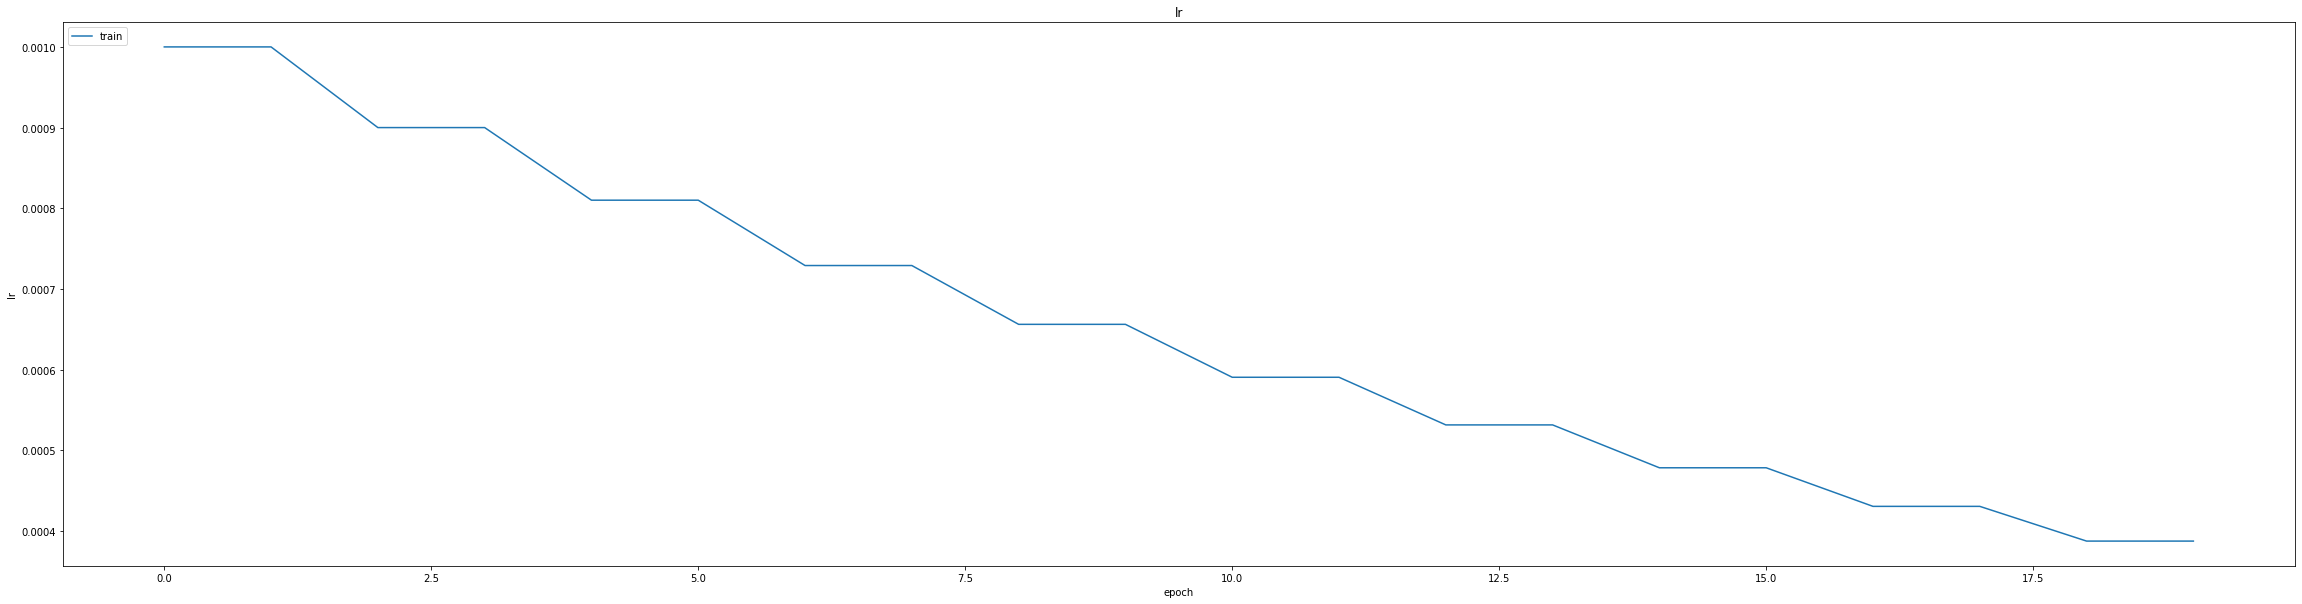

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006917806342244148
0.009936007671058178
1044/1044 [==============================] - 7s 5ms/step
0.996188113207035


1044/1044 [==============================] - 6s 5ms/step


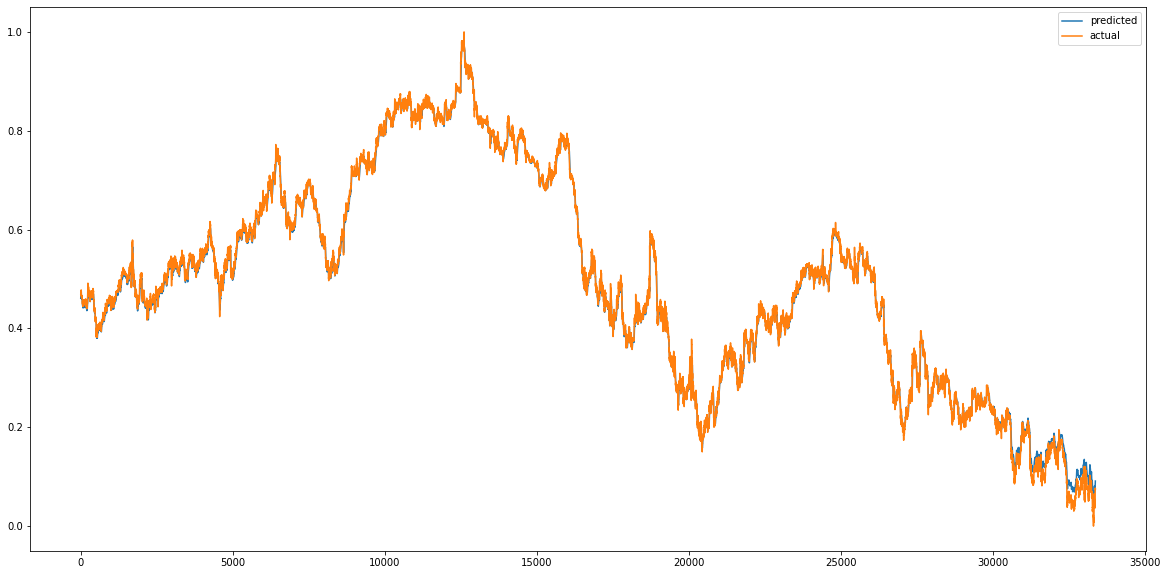

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


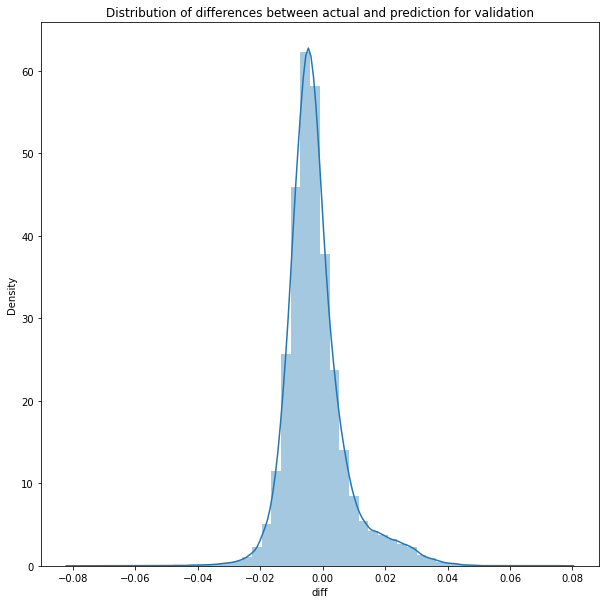

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 6s 5ms/step


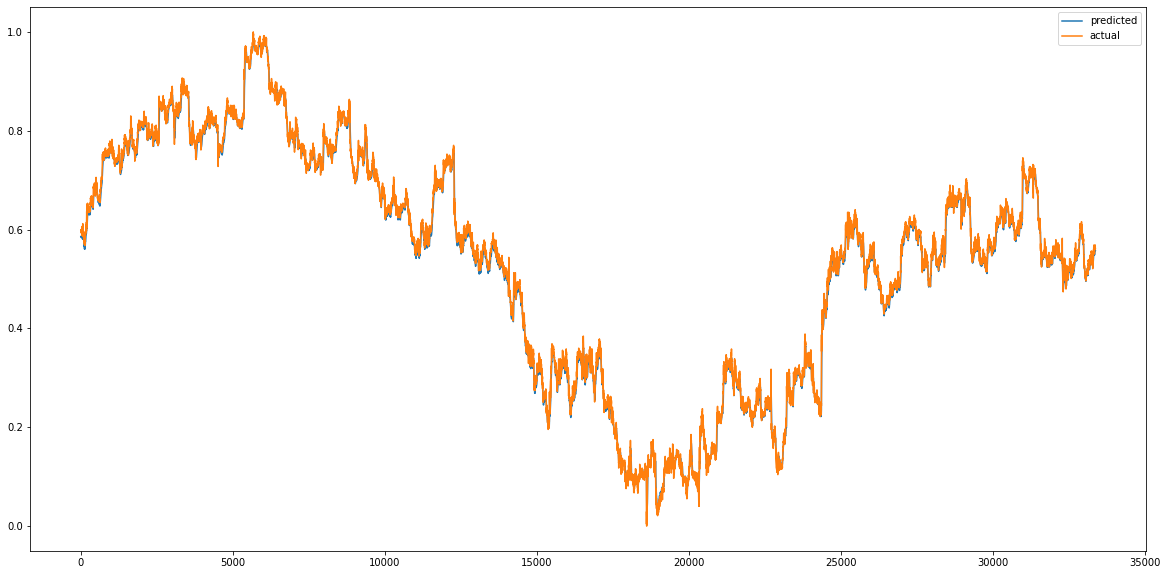

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


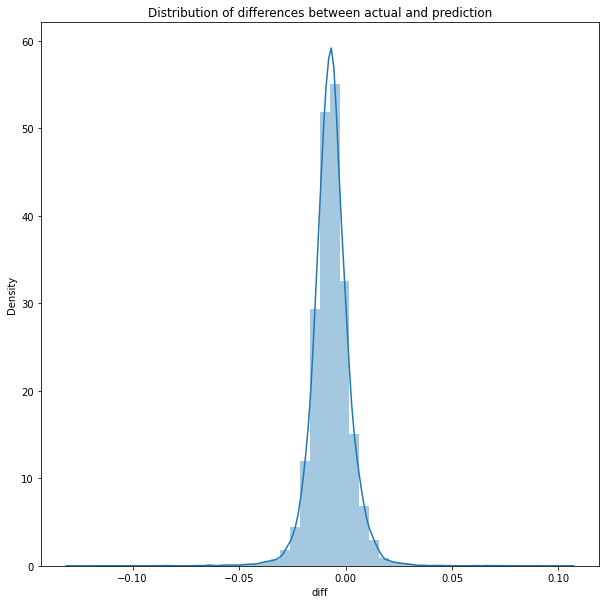

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00012478451746735945
RMSE :  0.01117069905902757
MAE :  0.008812956146911733
1044/1044 [==============================] - 6s 6ms/step
R2_Score  : 0.9977562562828004


count    33379.000000
mean        -0.006844
std          0.008829
min         -0.127890
25%         -0.011562
50%         -0.006933
75%         -0.002186
max          0.103752
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
402/405 [============================>.] - ETA: 0s - loss: 304.7779 - mae: 2.7934 - mse: 304.7779 - root_mean_squared_error: 17.4579 - mape: 5644.8506
Epoch 1: val_mse improved from inf to 0.09332, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 23s 44ms/step - loss: 302.6505 - mae: 2.7748 - mse: 302.6505 - root_mean_squared_error: 17.3969 - mape: 5605.6533 - val_loss: 0.0933 - val_mae: 0.2540 - val_mse: 0.0933 - val_root_mean_squared_error: 0.3055 - val_mape: 21402.9668
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0316 - mae: 0.1362 - mse: 0.0316 - root_mean_squared_error: 0.1777 - mape: 4749.2710
Epoch 2: val_mse improved from 0.09332 to 0.07760, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 16s 41ms/step - loss: 0.0316 - mae: 0.1362 - mse: 0.0316 - root_mean_squared_error: 0.1777 - mape: 4739.6592 - val_loss: 0.0776 - val_mae: 0.2320 - val_mse: 0.0776 - val_root_mean_squared_error: 0.2786 - val_mape: 20176.7734
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0313 - mae: 0.1368 - mse: 0.0313 - root_mean_squared_error: 0.1770 - mape: 4394.7227
Epoch 3: val_mse improved from 0.07760 to 0.07717, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0313 - mae: 0.1368 - mse: 0.0313 - root_mean_squared_error: 0.1770 - mape: 4394.7227 - val_loss: 0.0772 - val_mae: 0.2313 - val_mse: 0.0772 - val_root_mean_squared_error: 0.2778 - val_mape: 20138.9492
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0313 - mae: 0.1368 - mse: 0.0313 - root_mean_squared_error: 0.1770 - mape: 4399.7832
Epoch 4: val_mse did not improve from 0.07717
405/405 [==============================] - 6s 16ms/step - loss: 0.0313 - mae: 0.1368 - mse: 0.0313 - root_mean_squared_error: 0.1770 - mape: 4380.0728 - val_loss: 0.0775 - val_mae: 0.2319 - val_mse: 0.0775 - val_root_mean_squared_error: 0.2785 - val_mape: 20170.9844
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0313 - mae: 0.1368 - mse: 0.0313 - root_mean_squared_error: 0.1770 - mape: 4328.7979
Epoch 5: val_mse did not improve from 0.07717
405/405 [==============================] - 6s 16ms/step - l

405/405 [==============================] - 17s 42ms/step - loss: 0.0312 - mae: 0.1363 - mse: 0.0312 - root_mean_squared_error: 0.1765 - mape: 4379.4443 - val_loss: 0.0765 - val_mae: 0.2303 - val_mse: 0.0765 - val_root_mean_squared_error: 0.2766 - val_mape: 20054.9375
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0307 - mae: 0.1353 - mse: 0.0307 - root_mean_squared_error: 0.1753 - mape: 4473.7275
Epoch 12: val_mse improved from 0.07649 to 0.07494, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0307 - mae: 0.1353 - mse: 0.0307 - root_mean_squared_error: 0.1753 - mape: 4453.7046 - val_loss: 0.0749 - val_mae: 0.2278 - val_mse: 0.0749 - val_root_mean_squared_error: 0.2737 - val_mape: 19896.2383
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0272 - mae: 0.1263 - mse: 0.0272 - root_mean_squared_error: 0.1651 - mape: 4121.0820
Epoch 13: val_mse improved from 0.07494 to 0.05322, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0272 - mae: 0.1263 - mse: 0.0272 - root_mean_squared_error: 0.1651 - mape: 4121.0820 - val_loss: 0.0532 - val_mae: 0.1822 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2307 - val_mape: 18183.8145
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 0.0229 - mae: 0.1134 - mse: 0.0229 - root_mean_squared_error: 0.1512 - mape: 4305.7134
Epoch 14: val_mse did not improve from 0.05322
405/405 [==============================] - 7s 16ms/step - loss: 0.0229 - mae: 0.1135 - mse: 0.0229 - root_mean_squared_error: 0.1514 - mape: 4275.8447 - val_loss: 0.0754 - val_mae: 0.2288 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2746 - val_mape: 19869.8086
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 0.0224 - mae: 0.1122 - mse: 0.0224 - root_mean_squared_error: 0.1497 - mape: 4491.0820
Epoch 15: val_mse improved from 0.05322 to 0.02278, saving model to /content/drive/MyDrive/modelweight

405/405 [==============================] - 17s 43ms/step - loss: 0.0223 - mae: 0.1120 - mse: 0.0223 - root_mean_squared_error: 0.1495 - mape: 4470.8857 - val_loss: 0.0228 - val_mae: 0.1036 - val_mse: 0.0228 - val_root_mean_squared_error: 0.1509 - val_mape: 14366.4980
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0070 - mae: 0.0641 - mse: 0.0070 - root_mean_squared_error: 0.0839 - mape: 2923.6426
Epoch 16: val_mse improved from 0.02278 to 0.01426, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0070 - mae: 0.0641 - mse: 0.0070 - root_mean_squared_error: 0.0839 - mape: 2923.6426 - val_loss: 0.0143 - val_mae: 0.0811 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1194 - val_mape: 12409.3936
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0494 - mse: 0.0044 - root_mean_squared_error: 0.0663 - mape: 2474.7827
Epoch 17: val_mse improved from 0.01426 to 0.00967, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0044 - mae: 0.0494 - mse: 0.0044 - root_mean_squared_error: 0.0663 - mape: 2457.5759 - val_loss: 0.0097 - val_mae: 0.0632 - val_mse: 0.0097 - val_root_mean_squared_error: 0.0983 - val_mape: 10999.3018
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 2372.2405
Epoch 18: val_mse improved from 0.00967 to 0.00631, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 2372.2405 - val_loss: 0.0063 - val_mae: 0.0496 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0794 - val_mape: 9839.4131
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0319 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 1990.1769
Epoch 19: val_mse improved from 0.00631 to 0.00450, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0019 - mae: 0.0319 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 1990.1769 - val_loss: 0.0045 - val_mae: 0.0428 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 8846.7344
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0296 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1935.7469
Epoch 20: val_mse improved from 0.00450 to 0.00312, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0016 - mae: 0.0296 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1931.8075 - val_loss: 0.0031 - val_mae: 0.0350 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0559 - val_mape: 8088.7520
Epoch 21/60
402/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0350 - mape: 1699.5446
Epoch 21: val_mse improved from 0.00312 to 0.00254, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0350 - mape: 1687.7217 - val_loss: 0.0025 - val_mae: 0.0348 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 7491.9580
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1543.3636
Epoch 22: val_mse improved from 0.00254 to 0.00168, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1536.4302 - val_loss: 0.0017 - val_mae: 0.0218 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 6985.6123
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 9.0303e-04 - mae: 0.0231 - mse: 9.0303e-04 - root_mean_squared_error: 0.0301 - mape: 1508.2559
Epoch 23: val_mse improved from 0.00168 to 0.00136, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 9.0277e-04 - mae: 0.0231 - mse: 9.0277e-04 - root_mean_squared_error: 0.0300 - mape: 1501.4777 - val_loss: 0.0014 - val_mae: 0.0201 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 6571.9258
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 8.1704e-04 - mae: 0.0221 - mse: 8.1704e-04 - root_mean_squared_error: 0.0286 - mape: 1395.1755
Epoch 24: val_mse improved from 0.00136 to 0.00122, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 8.1793e-04 - mae: 0.0221 - mse: 8.1793e-04 - root_mean_squared_error: 0.0286 - mape: 1385.4668 - val_loss: 0.0012 - val_mae: 0.0195 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 6322.8091
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 7.1804e-04 - mae: 0.0207 - mse: 7.1804e-04 - root_mean_squared_error: 0.0268 - mape: 1347.1284
Epoch 25: val_mse improved from 0.00122 to 0.00108, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 7.1790e-04 - mae: 0.0207 - mse: 7.1790e-04 - root_mean_squared_error: 0.0268 - mape: 1341.0696 - val_loss: 0.0011 - val_mae: 0.0181 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 6066.1841
Epoch 26/60
402/405 [============================>.] - ETA: 0s - loss: 6.4842e-04 - mae: 0.0197 - mse: 6.4842e-04 - root_mean_squared_error: 0.0255 - mape: 1346.3048
Epoch 26: val_mse improved from 0.00108 to 0.00107, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 6.4785e-04 - mae: 0.0197 - mse: 6.4785e-04 - root_mean_squared_error: 0.0255 - mape: 1336.9318 - val_loss: 0.0011 - val_mae: 0.0193 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 5942.0298
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 5.6922e-04 - mae: 0.0184 - mse: 5.6922e-04 - root_mean_squared_error: 0.0239 - mape: 1263.9183
Epoch 27: val_mse improved from 0.00107 to 0.00104, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 5.6922e-04 - mae: 0.0184 - mse: 5.6922e-04 - root_mean_squared_error: 0.0239 - mape: 1263.9183 - val_loss: 0.0010 - val_mae: 0.0203 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 5775.2681
Epoch 28/60
402/405 [============================>.] - ETA: 0s - loss: 5.6406e-04 - mae: 0.0184 - mse: 5.6406e-04 - root_mean_squared_error: 0.0237 - mape: 1163.7578
Epoch 28: val_mse improved from 0.00104 to 0.00085, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 5.6385e-04 - mae: 0.0184 - mse: 5.6385e-04 - root_mean_squared_error: 0.0237 - mape: 1155.6604 - val_loss: 8.5465e-04 - val_mae: 0.0170 - val_mse: 8.5465e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 5572.9414
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 5.0344e-04 - mae: 0.0174 - mse: 5.0344e-04 - root_mean_squared_error: 0.0224 - mape: 1193.0659
Epoch 29: val_mse improved from 0.00085 to 0.00084, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 5.0295e-04 - mae: 0.0174 - mse: 5.0295e-04 - root_mean_squared_error: 0.0224 - mape: 1187.6979 - val_loss: 8.3814e-04 - val_mae: 0.0189 - val_mse: 8.3814e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 5379.1895
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 4.5004e-04 - mae: 0.0164 - mse: 4.5004e-04 - root_mean_squared_error: 0.0212 - mape: 1115.5074
Epoch 30: val_mse did not improve from 0.00084
405/405 [==============================] - 7s 16ms/step - loss: 4.5017e-04 - mae: 0.0164 - mse: 4.5017e-04 - root_mean_squared_error: 0.0212 - mape: 1113.2396 - val_loss: 0.0011 - val_mae: 0.0245 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 5284.8159
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 4.1417e-04 - mae: 0.0158 - mse: 4.1417e-04 - root_mean_squared_error: 0.0204 - mape: 1070.7708
Epoch 31: val_mse improved from 0.00084 to 0.00084, saving model

405/405 [==============================] - 17s 43ms/step - loss: 4.1405e-04 - mae: 0.0158 - mse: 4.1405e-04 - root_mean_squared_error: 0.0203 - mape: 1068.5911 - val_loss: 8.3519e-04 - val_mae: 0.0210 - val_mse: 8.3519e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 5090.8027
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 3.8235e-04 - mae: 0.0151 - mse: 3.8235e-04 - root_mean_squared_error: 0.0196 - mape: 1082.8099
Epoch 32: val_mse improved from 0.00084 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 3.8184e-04 - mae: 0.0151 - mse: 3.8184e-04 - root_mean_squared_error: 0.0195 - mape: 1077.9364 - val_loss: 5.9964e-04 - val_mae: 0.0150 - val_mse: 5.9964e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 4969.8101
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 3.6933e-04 - mae: 0.0149 - mse: 3.6933e-04 - root_mean_squared_error: 0.0192 - mape: 1064.2313
Epoch 33: val_mse did not improve from 0.00060
405/405 [==============================] - 7s 16ms/step - loss: 3.6839e-04 - mae: 0.0149 - mse: 3.6839e-04 - root_mean_squared_error: 0.0192 - mape: 1056.8163 - val_loss: 6.7933e-04 - val_mae: 0.0183 - val_mse: 6.7933e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 4819.8462
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 3.2950e-04 - mae: 0.0141 - mse: 3.2950e-04 - root_mean_squared_error: 0.0182 - mape: 1028.5681
Epoch 34: val_mse did not improve from 0.00060
405/405 [

405/405 [==============================] - 17s 42ms/step - loss: 3.1420e-04 - mae: 0.0138 - mse: 3.1420e-04 - root_mean_squared_error: 0.0177 - mape: 981.2587 - val_loss: 4.8143e-04 - val_mae: 0.0135 - val_mse: 4.8143e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 4614.5781
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 2.7459e-04 - mae: 0.0129 - mse: 2.7459e-04 - root_mean_squared_error: 0.0166 - mape: 990.8729 
Epoch 36: val_mse did not improve from 0.00048
405/405 [==============================] - 7s 16ms/step - loss: 2.7424e-04 - mae: 0.0129 - mse: 2.7424e-04 - root_mean_squared_error: 0.0166 - mape: 983.9711 - val_loss: 6.1772e-04 - val_mae: 0.0187 - val_mse: 6.1772e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4482.5161
Epoch 37/60
402/405 [============================>.] - ETA: 0s - loss: 2.9256e-04 - mae: 0.0133 - mse: 2.9256e-04 - root_mean_squared_error: 0.0171 - mape: 998.1420 
Epoch 37: val_mse improved from 0.00048 to 0.00046, saving

405/405 [==============================] - 17s 41ms/step - loss: 2.9194e-04 - mae: 0.0133 - mse: 2.9194e-04 - root_mean_squared_error: 0.0171 - mape: 991.1877 - val_loss: 4.6232e-04 - val_mae: 0.0145 - val_mse: 4.6232e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 4370.0713
Epoch 38/60
405/405 [==============================] - ETA: 0s - loss: 2.2871e-04 - mae: 0.0117 - mse: 2.2871e-04 - root_mean_squared_error: 0.0151 - mape: 927.1445
Epoch 38: val_mse improved from 0.00046 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 2.2871e-04 - mae: 0.0117 - mse: 2.2871e-04 - root_mean_squared_error: 0.0151 - mape: 927.1445 - val_loss: 4.2804e-04 - val_mae: 0.0135 - val_mse: 4.2804e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 4317.5913
Epoch 39/60
402/405 [============================>.] - ETA: 0s - loss: 2.1017e-04 - mae: 0.0112 - mse: 2.1017e-04 - root_mean_squared_error: 0.0145 - mape: 909.4713
Epoch 39: val_mse did not improve from 0.00043
405/405 [==============================] - 7s 16ms/step - loss: 2.1003e-04 - mae: 0.0112 - mse: 2.1003e-04 - root_mean_squared_error: 0.0145 - mape: 903.1434 - val_loss: 7.7437e-04 - val_mae: 0.0233 - val_mse: 7.7437e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 4198.4375
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.2585e-04 - mae: 0.0117 - mse: 2.2585e-04 - root_mean_squared_error: 0.0150 - mape: 879.2004
Epoch 40: val_mse did not improve from 0.00043
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 1.9249e-04 - mae: 0.0108 - mse: 1.9249e-04 - root_mean_squared_error: 0.0139 - mape: 827.3617 - val_loss: 3.4231e-04 - val_mae: 0.0123 - val_mse: 3.4231e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3960.7617
Epoch 43/60
402/405 [============================>.] - ETA: 0s - loss: 1.7362e-04 - mae: 0.0103 - mse: 1.7362e-04 - root_mean_squared_error: 0.0132 - mape: 815.3400
Epoch 43: val_mse did not improve from 0.00034
405/405 [==============================] - 7s 16ms/step - loss: 1.7326e-04 - mae: 0.0103 - mse: 1.7326e-04 - root_mean_squared_error: 0.0132 - mape: 809.6593 - val_loss: 3.8405e-04 - val_mae: 0.0142 - val_mse: 3.8405e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 3847.4866
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 1.6138e-04 - mae: 0.0099 - mse: 1.6138e-04 - root_mean_squared_error: 0.0127 - mape: 841.2963
Epoch 44: val_mse improved from 0.00034 to 0.00034, saving m

405/405 [==============================] - 17s 42ms/step - loss: 1.6127e-04 - mae: 0.0099 - mse: 1.6127e-04 - root_mean_squared_error: 0.0127 - mape: 835.4355 - val_loss: 3.3543e-04 - val_mae: 0.0128 - val_mse: 3.3543e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 3758.6418
Epoch 45/60
402/405 [============================>.] - ETA: 0s - loss: 1.6338e-04 - mae: 0.0100 - mse: 1.6338e-04 - root_mean_squared_error: 0.0128 - mape: 794.3822
Epoch 45: val_mse did not improve from 0.00034
405/405 [==============================] - 7s 17ms/step - loss: 1.6284e-04 - mae: 0.0100 - mse: 1.6284e-04 - root_mean_squared_error: 0.0128 - mape: 788.8478 - val_loss: 3.5752e-04 - val_mae: 0.0141 - val_mse: 3.5752e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 3616.8860
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 1.4323e-04 - mae: 0.0094 - mse: 1.4323e-04 - root_mean_squared_error: 0.0120 - mape: 758.2922
Epoch 46: val_mse did not improve from 0.00034
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 1.4788e-04 - mae: 0.0095 - mse: 1.4788e-04 - root_mean_squared_error: 0.0122 - mape: 735.4337 - val_loss: 3.1492e-04 - val_mae: 0.0131 - val_mse: 3.1492e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 3467.5681
Epoch 48/60
405/405 [==============================] - ETA: 0s - loss: 1.3630e-04 - mae: 0.0092 - mse: 1.3630e-04 - root_mean_squared_error: 0.0117 - mape: 734.7097
Epoch 48: val_mse did not improve from 0.00031
405/405 [==============================] - 7s 16ms/step - loss: 1.3630e-04 - mae: 0.0092 - mse: 1.3630e-04 - root_mean_squared_error: 0.0117 - mape: 734.7097 - val_loss: 3.2047e-04 - val_mae: 0.0133 - val_mse: 3.2047e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 3408.9695
Epoch 49/60
403/405 [============================>.] - ETA: 0s - loss: 1.2195e-04 - mae: 0.0085 - mse: 1.2195e-04 - root_mean_squared_error: 0.0110 - mape: 694.1752
Epoch 49: val_mse improved from 0.00031 to 0.00028, saving m

405/405 [==============================] - 18s 44ms/step - loss: 1.2181e-04 - mae: 0.0085 - mse: 1.2181e-04 - root_mean_squared_error: 0.0110 - mape: 691.0524 - val_loss: 2.7670e-04 - val_mae: 0.0120 - val_mse: 2.7670e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 3289.5386
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.2698e-04 - mae: 0.0088 - mse: 1.2698e-04 - root_mean_squared_error: 0.0113 - mape: 669.9910
Epoch 50: val_mse did not improve from 0.00028
405/405 [==============================] - 7s 17ms/step - loss: 1.2698e-04 - mae: 0.0088 - mse: 1.2698e-04 - root_mean_squared_error: 0.0113 - mape: 669.9910 - val_loss: 4.7396e-04 - val_mae: 0.0179 - val_mse: 4.7396e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 3208.6523
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 1.2757e-04 - mae: 0.0090 - mse: 1.2757e-04 - root_mean_squared_error: 0.0113 - mape: 673.3787
Epoch 51: val_mse did not improve from 0.00028
405/405 [====

405/405 [==============================] - 17s 41ms/step - loss: 1.0765e-04 - mae: 0.0081 - mse: 1.0765e-04 - root_mean_squared_error: 0.0104 - mape: 672.6354 - val_loss: 2.4048e-04 - val_mae: 0.0111 - val_mse: 2.4048e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 3118.5320
Epoch 53/60
404/405 [============================>.] - ETA: 0s - loss: 1.1006e-04 - mae: 0.0081 - mse: 1.1006e-04 - root_mean_squared_error: 0.0105 - mape: 659.0892
Epoch 53: val_mse improved from 0.00024 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 1.1011e-04 - mae: 0.0081 - mse: 1.1011e-04 - root_mean_squared_error: 0.0105 - mape: 657.7479 - val_loss: 2.3804e-04 - val_mae: 0.0109 - val_mse: 2.3804e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 3078.3313
Epoch 54/60
404/405 [============================>.] - ETA: 0s - loss: 1.0643e-04 - mae: 0.0081 - mse: 1.0643e-04 - root_mean_squared_error: 0.0103 - mape: 640.5363
Epoch 54: val_mse did not improve from 0.00024
405/405 [==============================] - 7s 16ms/step - loss: 1.0633e-04 - mae: 0.0081 - mse: 1.0633e-04 - root_mean_squared_error: 0.0103 - mape: 639.2315 - val_loss: 3.0969e-04 - val_mae: 0.0138 - val_mse: 3.0969e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3017.2432
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 1.0550e-04 - mae: 0.0080 - mse: 1.0550e-04 - root_mean_squared_error: 0.0103 - mape: 629.7660
Epoch 55: val_mse did not improve from 0.00024
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 9.6945e-05 - mae: 0.0075 - mse: 9.6945e-05 - root_mean_squared_error: 0.0098 - mape: 709.3507 - val_loss: 2.2809e-04 - val_mae: 0.0110 - val_mse: 2.2809e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2898.0786
Epoch 57/60
404/405 [============================>.] - ETA: 0s - loss: 1.0290e-04 - mae: 0.0080 - mse: 1.0290e-04 - root_mean_squared_error: 0.0101 - mape: 646.7804
Epoch 57: val_mse did not improve from 0.00023
405/405 [==============================] - 7s 17ms/step - loss: 1.0276e-04 - mae: 0.0080 - mse: 1.0276e-04 - root_mean_squared_error: 0.0101 - mape: 645.4625 - val_loss: 2.9101e-04 - val_mae: 0.0134 - val_mse: 2.9101e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2870.6531
Epoch 58/60
402/405 [============================>.] - ETA: 0s - loss: 9.0069e-05 - mae: 0.0073 - mse: 9.0069e-05 - root_mean_squared_error: 0.0095 - mape: 621.7674
Epoch 58: val_mse did not improve from 0.00023
405/405 [====

405/405 [==============================] - 18s 43ms/step - loss: 8.8971e-05 - mae: 0.0074 - mse: 8.8971e-05 - root_mean_squared_error: 0.0094 - mape: 549.2889 - val_loss: 2.0307e-04 - val_mae: 0.0103 - val_mse: 2.0307e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 2700.0994
Epoch 60/60
404/405 [============================>.] - ETA: 0s - loss: 8.7732e-05 - mae: 0.0074 - mse: 8.7732e-05 - root_mean_squared_error: 0.0094 - mape: 562.5591
Epoch 60: val_mse did not improve from 0.00020
405/405 [==============================] - 7s 17ms/step - loss: 8.7634e-05 - mae: 0.0074 - mse: 8.7634e-05 - root_mean_squared_error: 0.0094 - mape: 561.4131 - val_loss: 2.0594e-04 - val_mae: 0.0107 - val_mse: 2.0594e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2615.9109


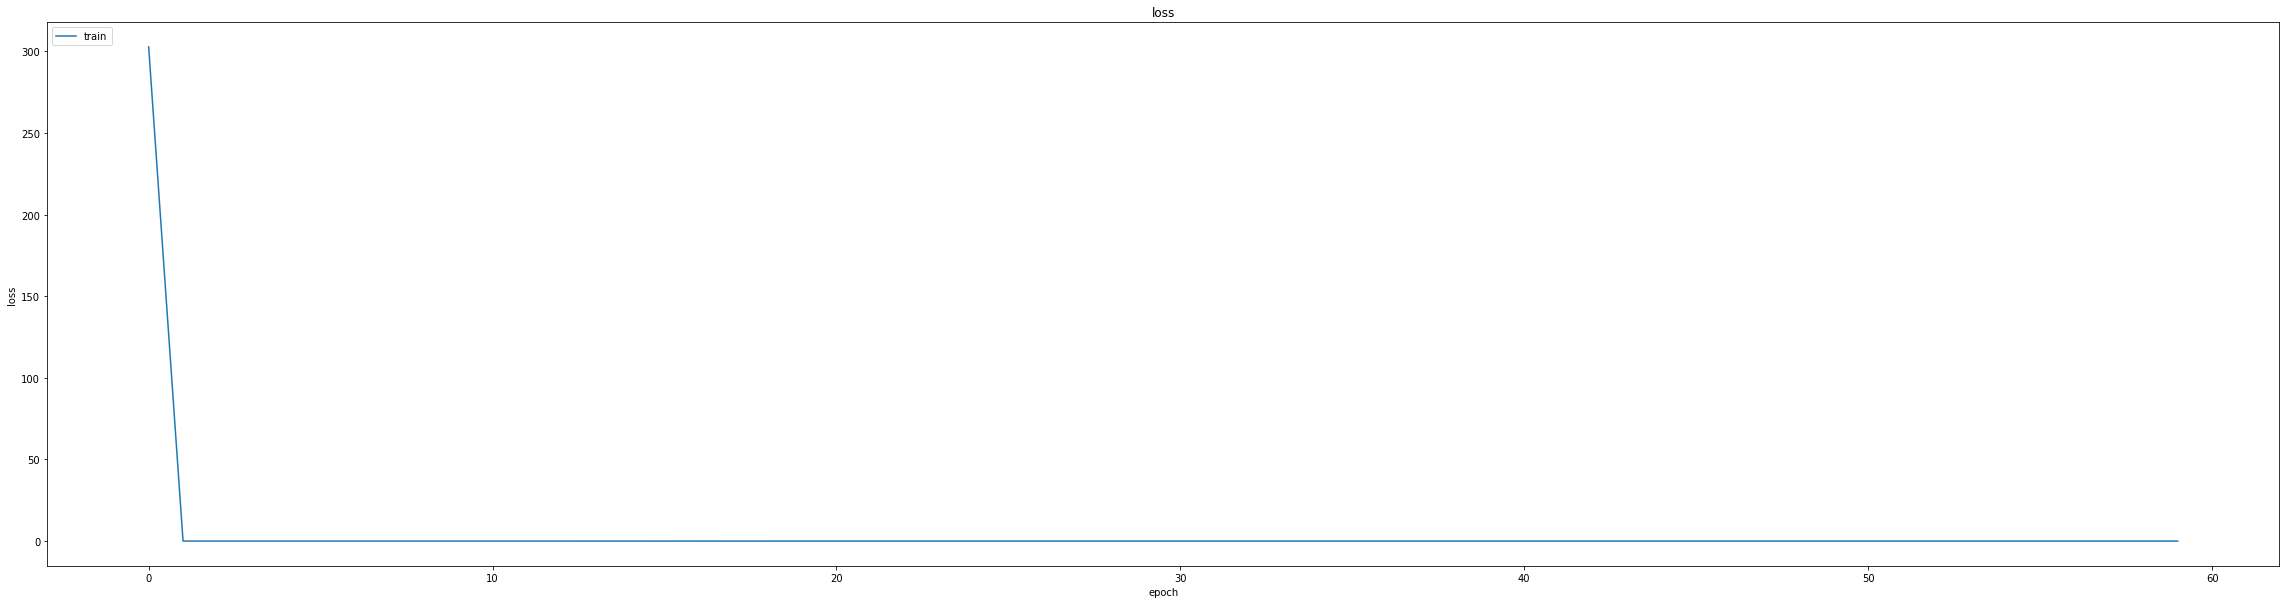

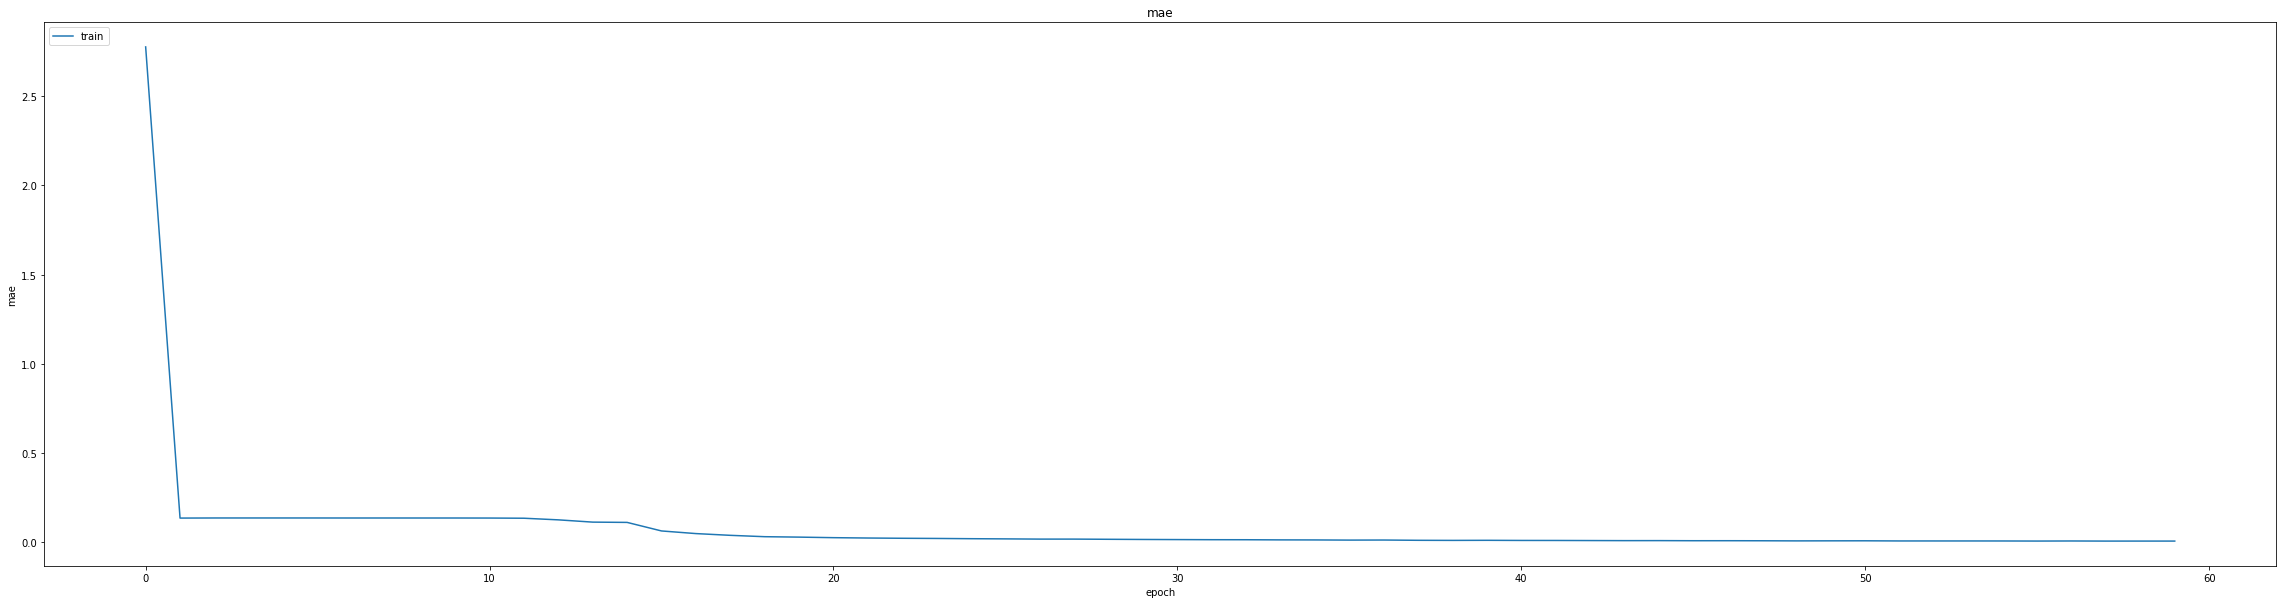

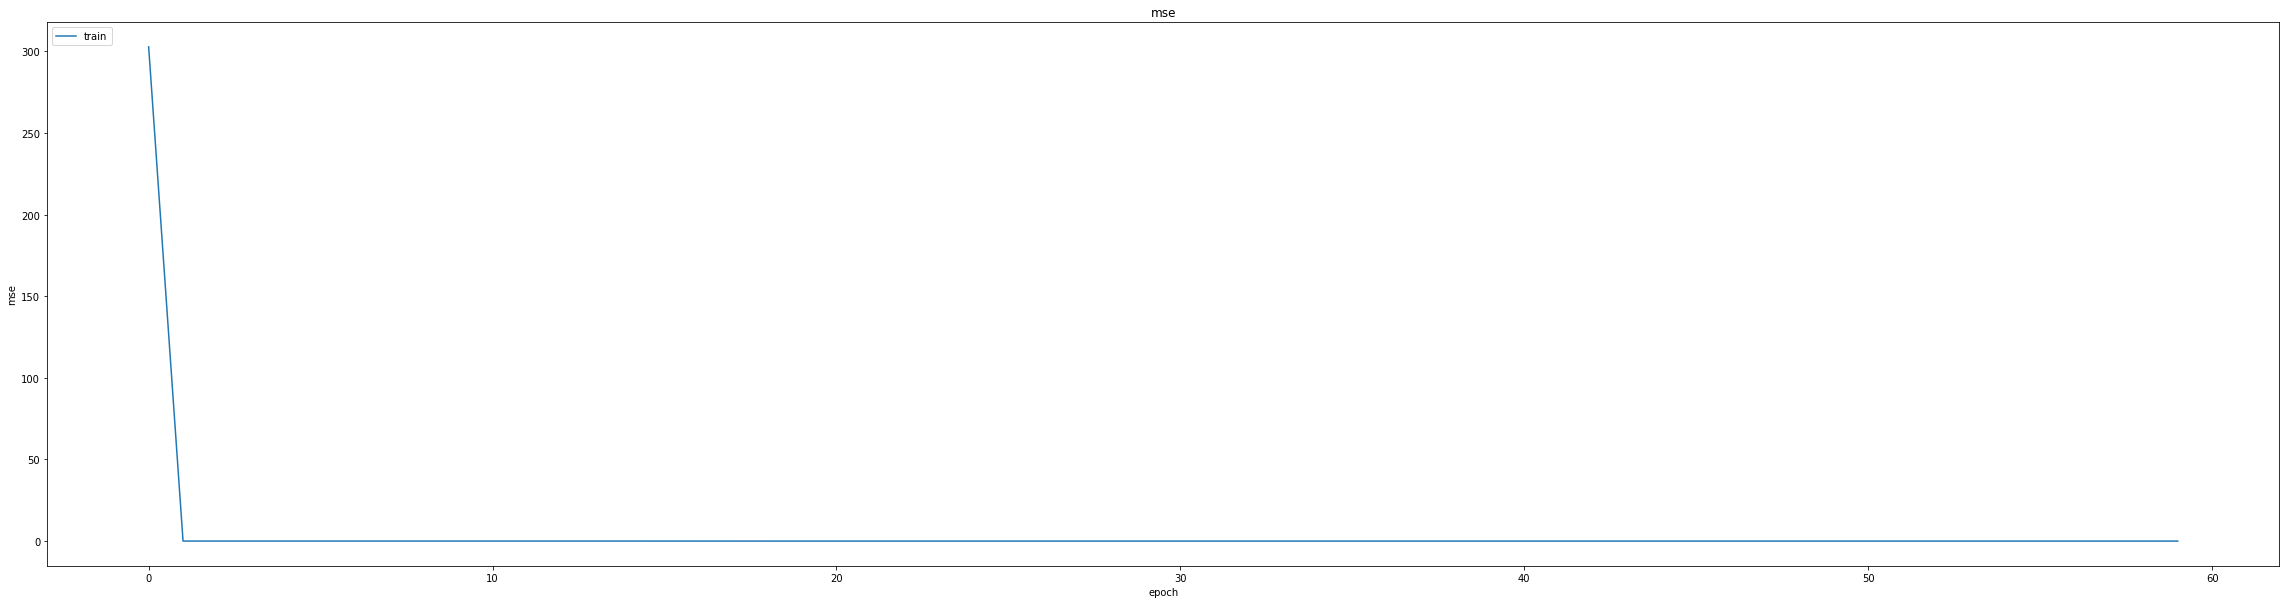

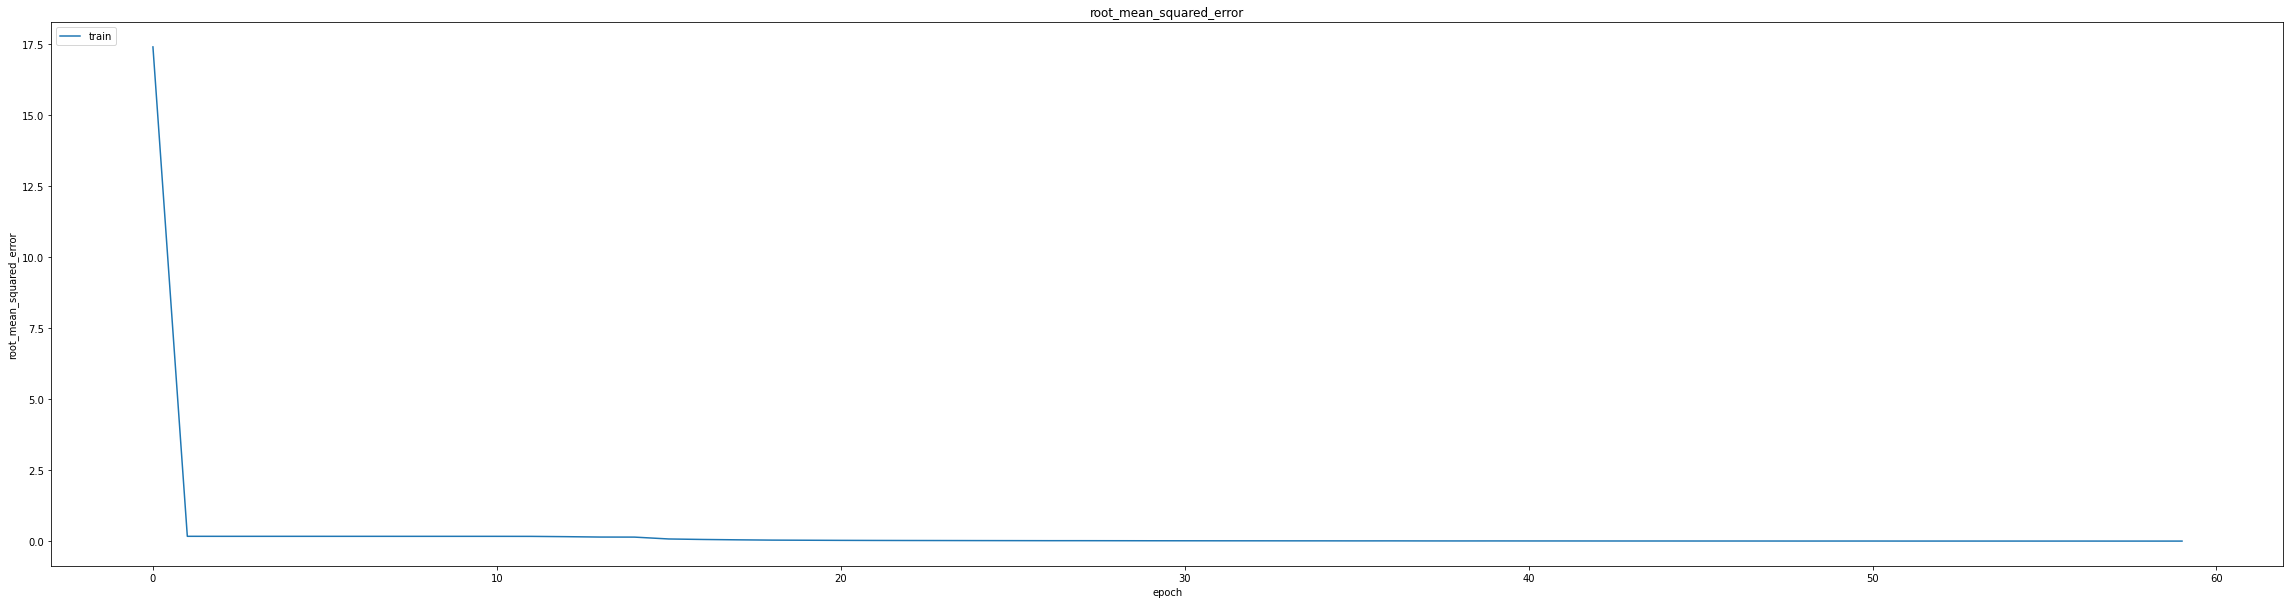

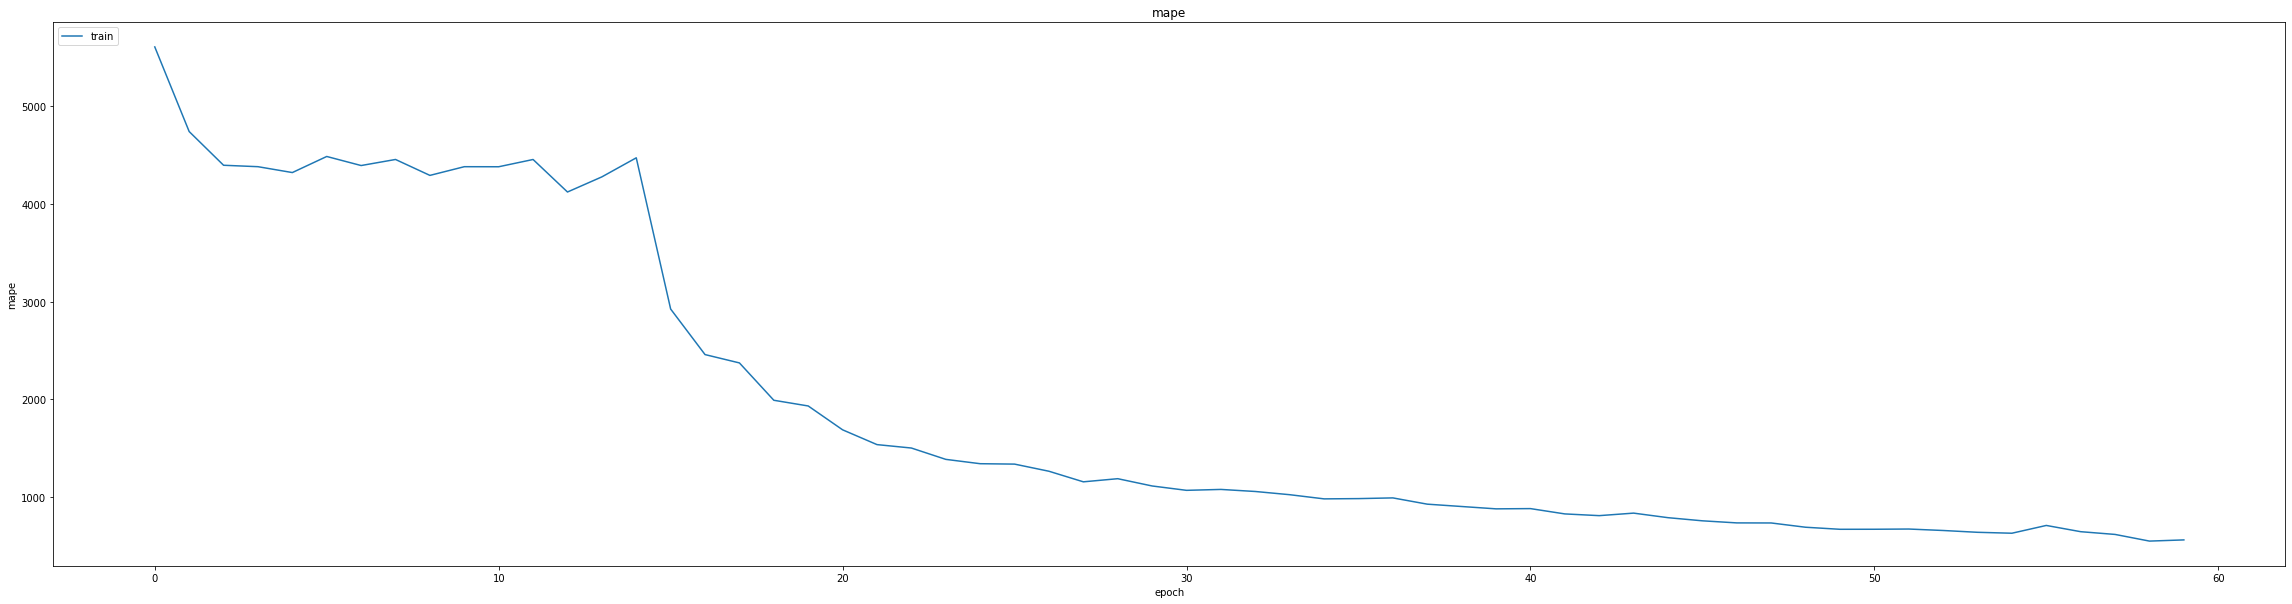

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01034579984843731
0.0142501350492239
1044/1044 [==============================] - 5s 4ms/step
0.995653382460731


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.0151 - mse: 0.0178 - root_mean_squared_error: 0.1334 - mape: 1303.5850
Epoch 1: val_mse did not improve from 0.00020
405/405 [==============================] - 11s 19ms/step - loss: 0.0177 - mae: 0.0150 - mse: 0.0177 - root_mean_squared_error: 0.1331 - mape: 1297.7106 - val_loss: 6.0554e-04 - val_mae: 0.0172 - val_mse: 6.0554e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 4233.2373 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 7.2692e-05 - mae: 0.0063 - mse: 7.2692e-05 - root_mean_squared_error: 0.0085 - mape: 759.3207
Epoch 2: val_mse did not improve from 0.00020
405/405 [==============================] - 6s 16ms/step - loss: 7.2671e-05 - mae: 0.0063 - mse: 7.2671e-05 - root_mean_squared_error: 0.0085 - mape: 757.7738 - val_loss: 4.2055e-04 - val_mae: 0.0146 - val_mse: 4.2055e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3743.9326 - lr: 0.0010
lr ch

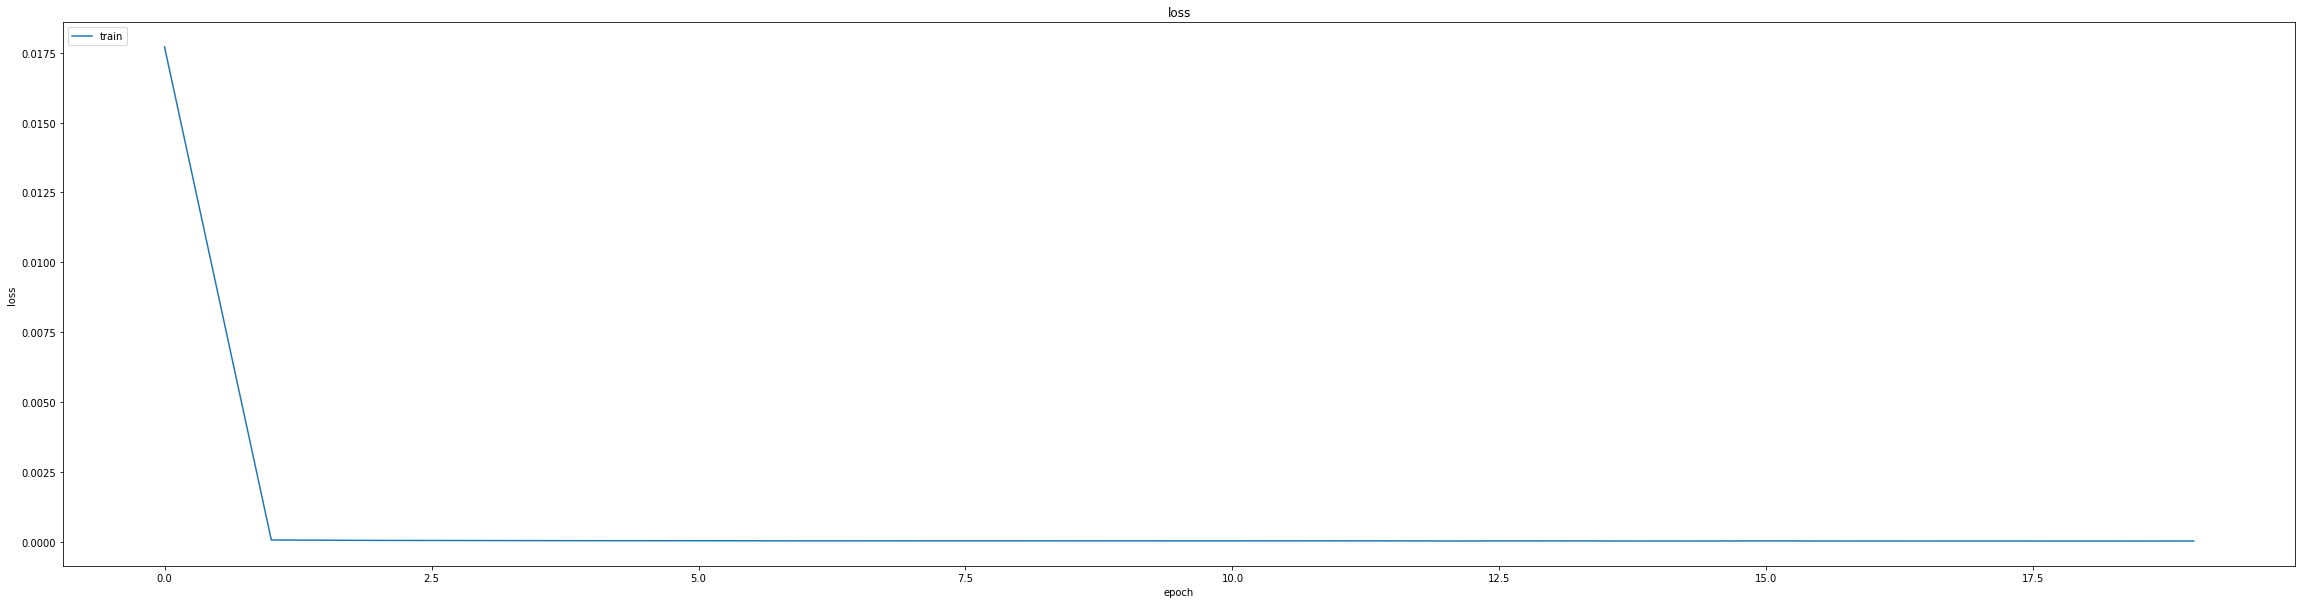

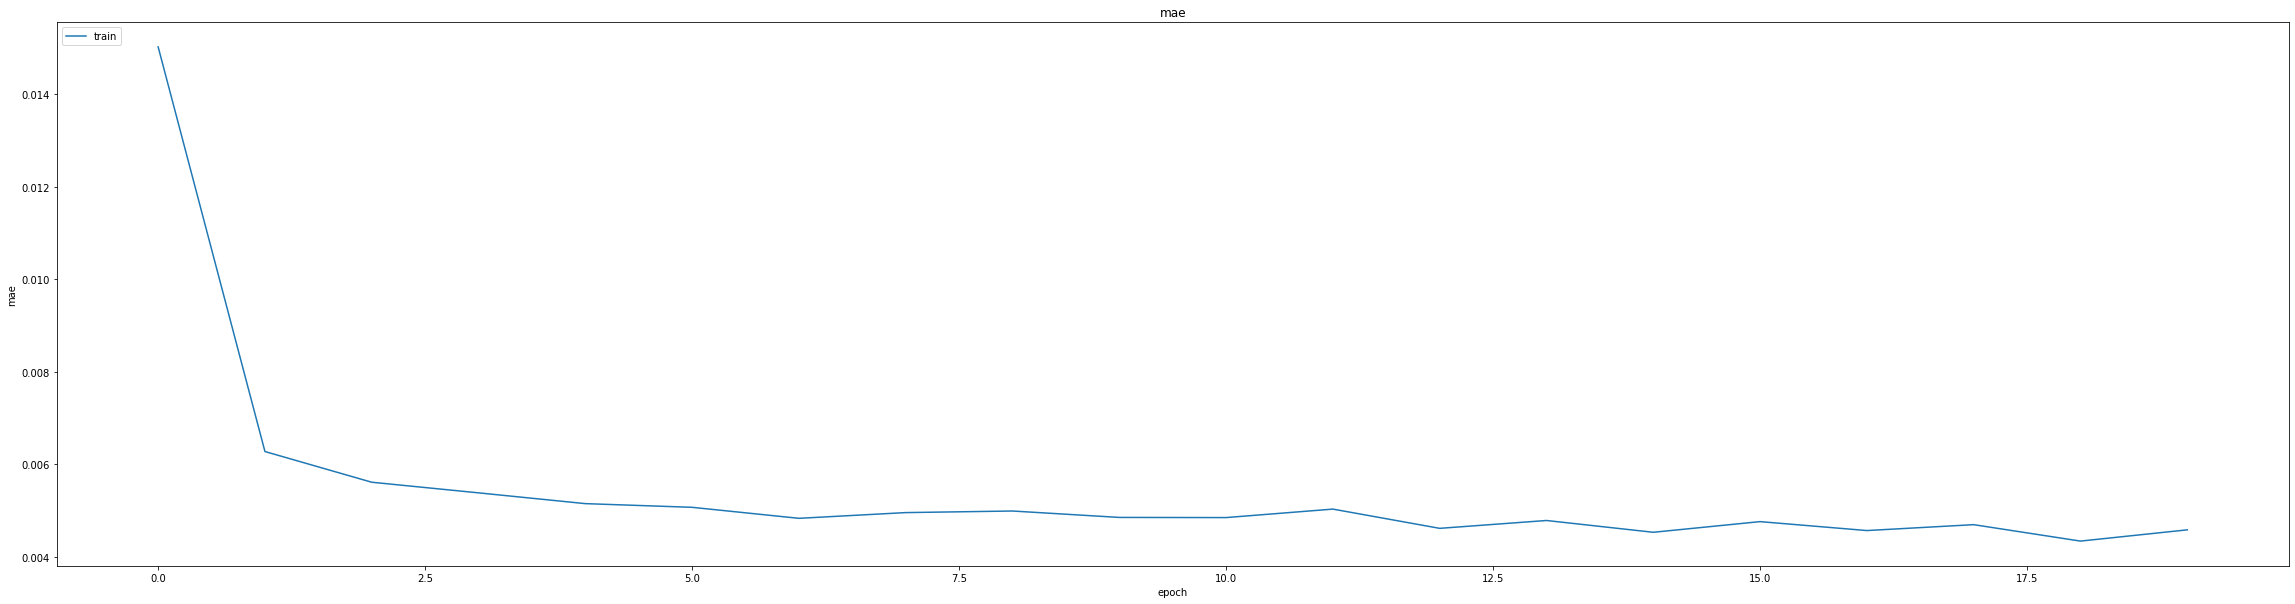

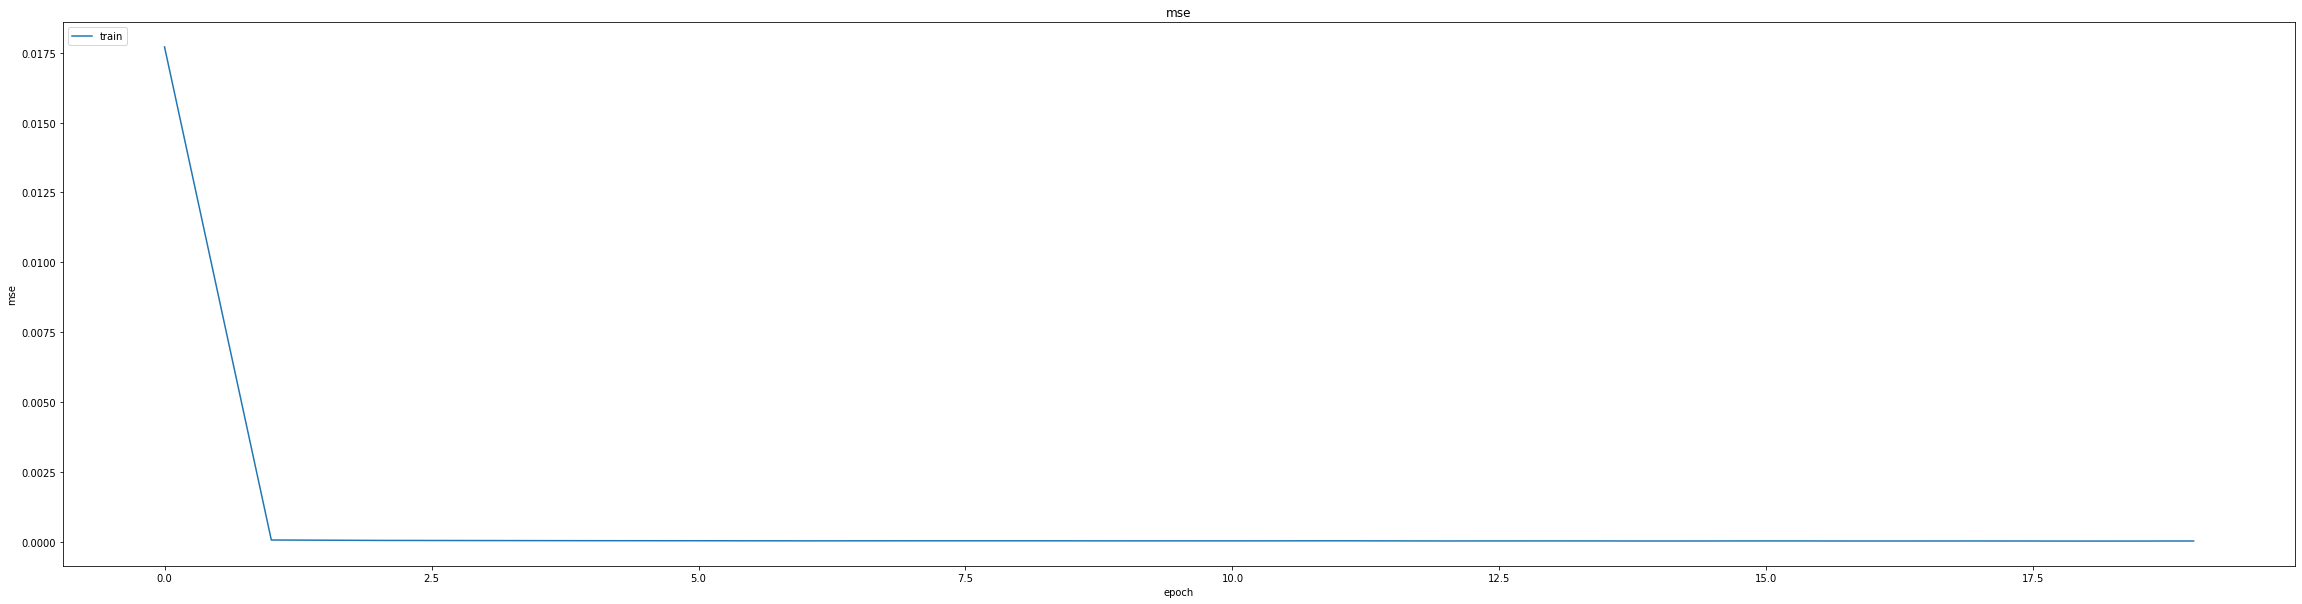

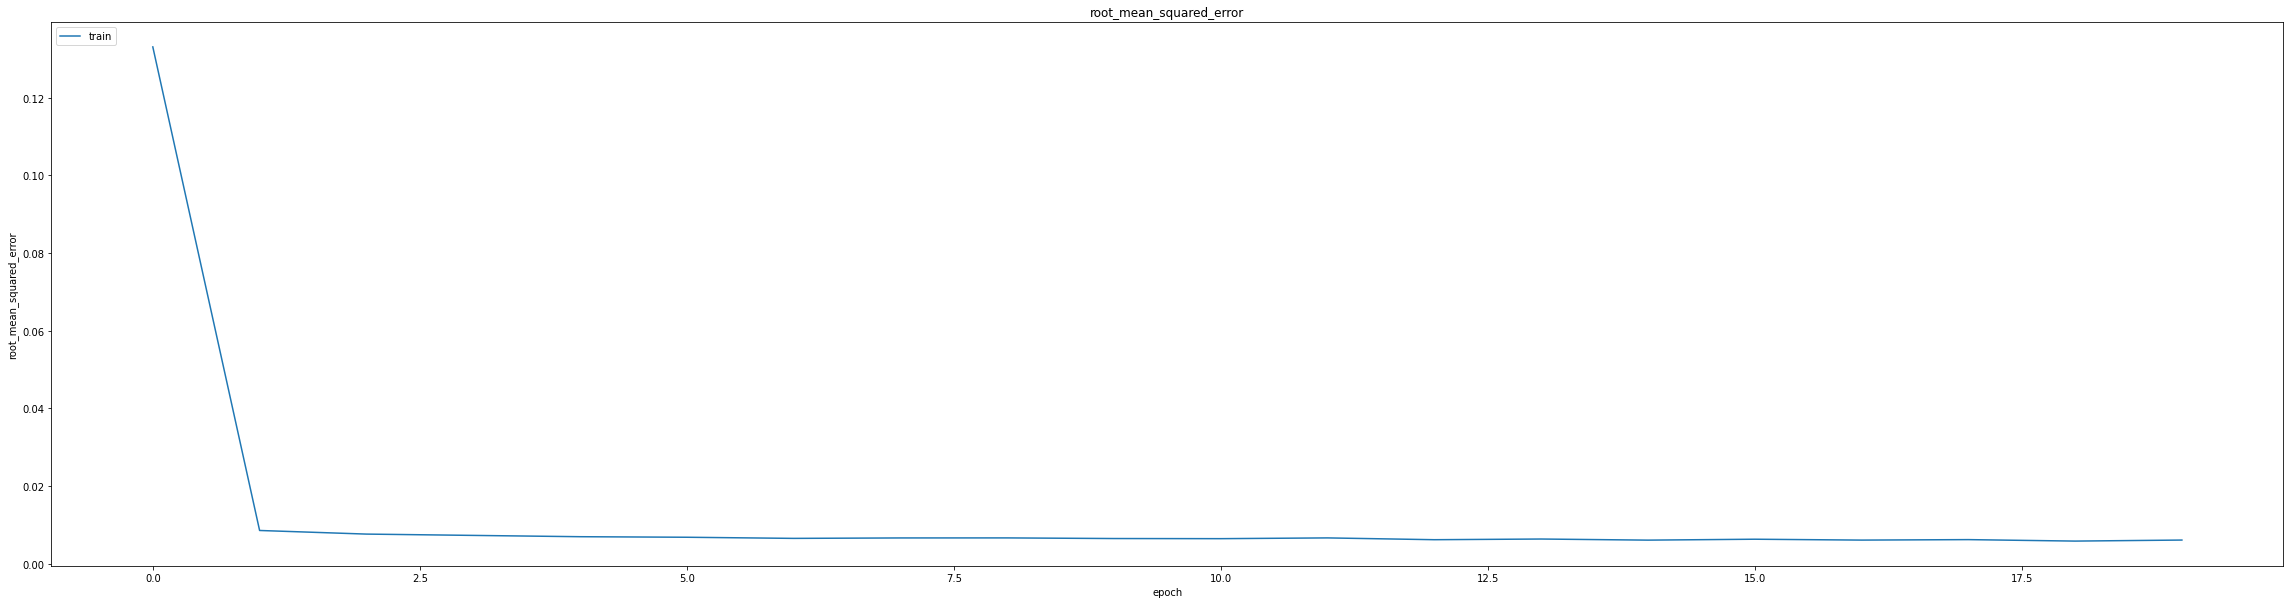

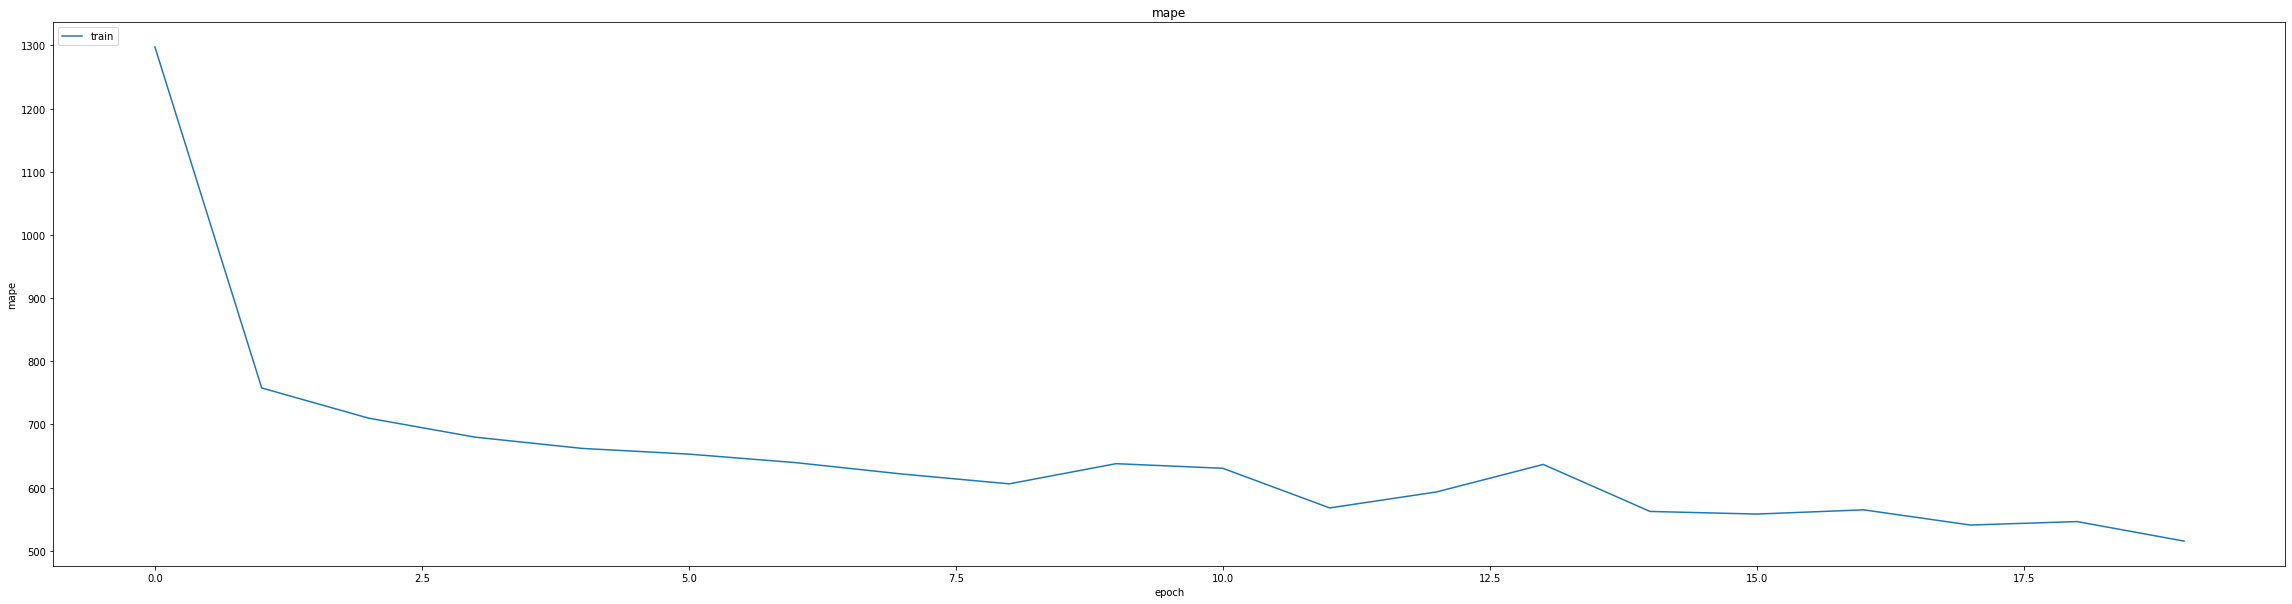

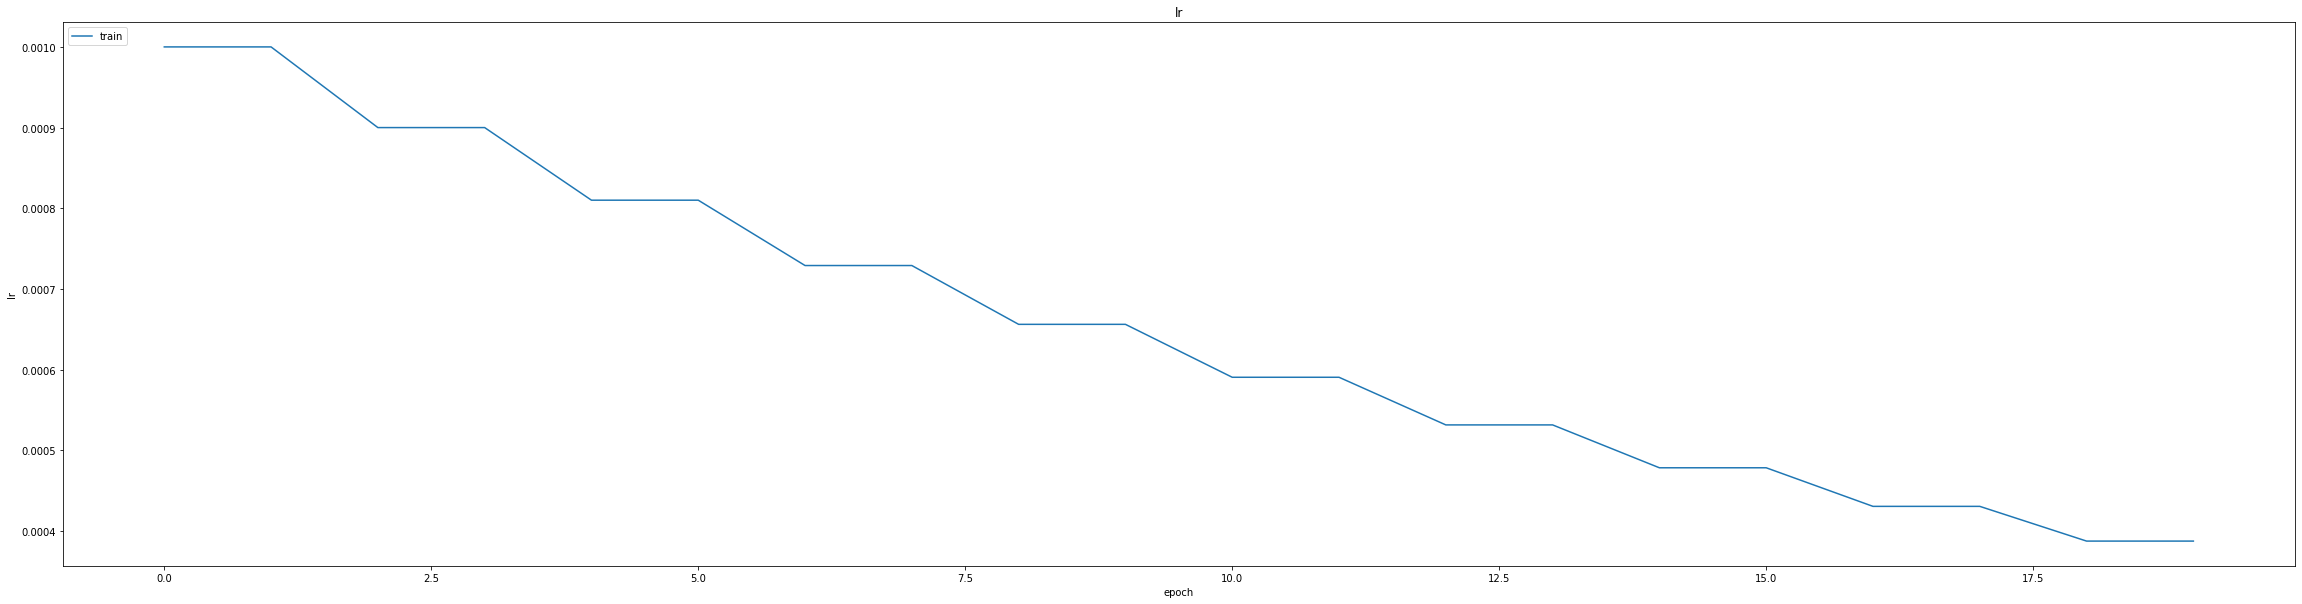

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010352719575166702
0.014328482560813427
1044/1044 [==============================] - 5s 4ms/step
0.9955777081698537


1044/1044 [==============================] - 4s 4ms/step


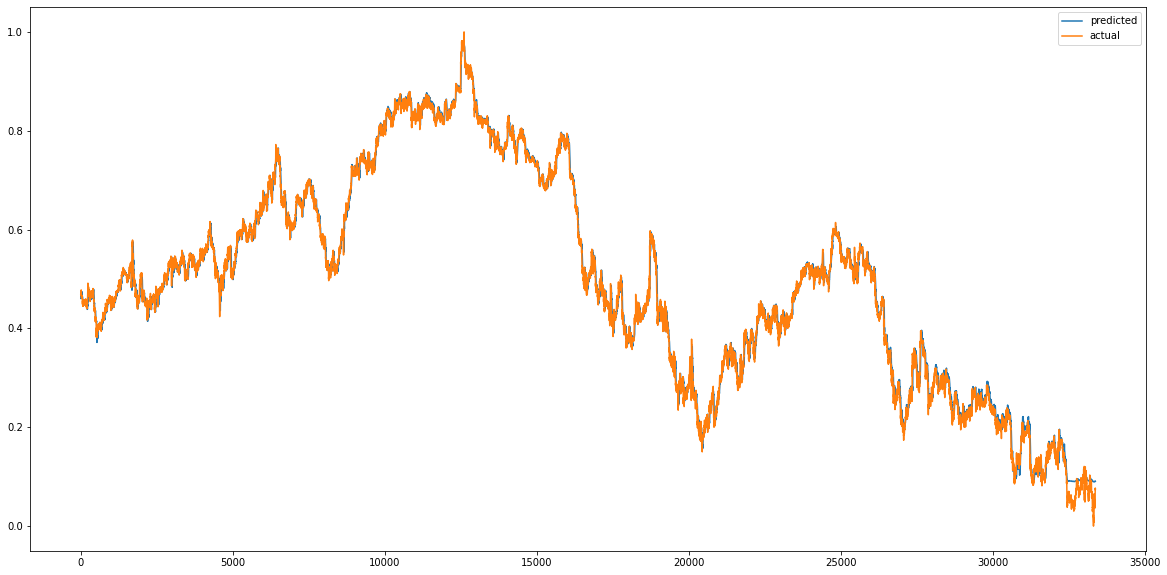

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


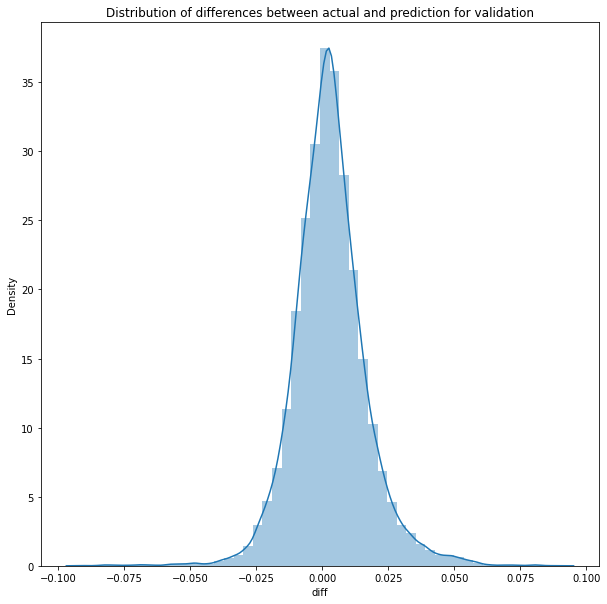

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


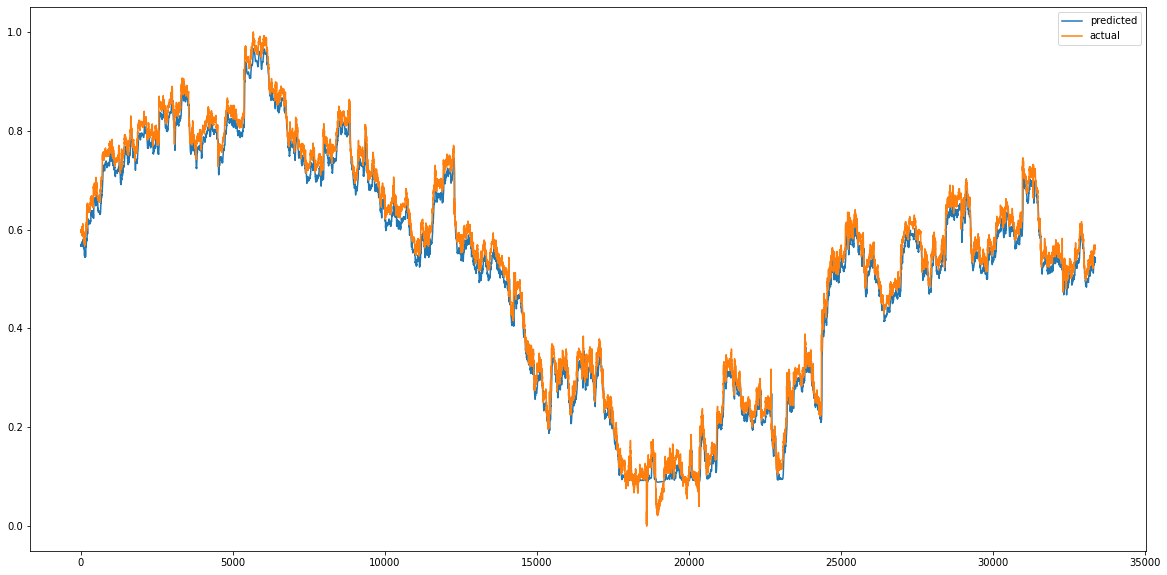

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


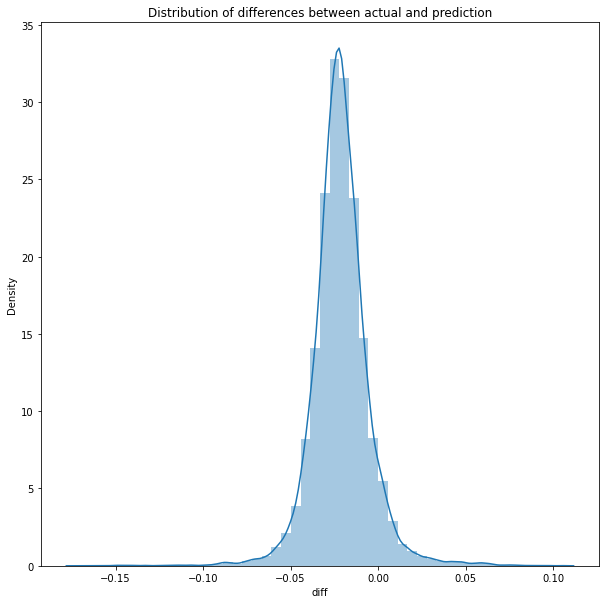

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0007306352842746125
RMSE :  0.02703026607850194
MAE :  0.02330553485642814
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9868624861307513


count    33379.000000
mean        -0.021292
std          0.016653
min         -0.171936
25%         -0.029873
50%         -0.021879
75%         -0.013271
max          0.105516
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 346.4498 - mae: 2.6165 - mse: 346.4498 - root_mean_squared_error: 18.6132 - mape: 15275.6572
Epoch 1: val_mse improved from inf to 0.05506, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 40s 77ms/step - loss: 345.7431 - mae: 2.6117 - mse: 345.7431 - root_mean_squared_error: 18.5942 - mape: 15244.5723 - val_loss: 0.0551 - val_mae: 0.1904 - val_mse: 0.0551 - val_root_mean_squared_error: 0.2346 - val_mape: 16778.1172
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.0322 - mae: 0.1461 - mse: 0.0322 - root_mean_squared_error: 0.1794 - mape: 3957.2573
Epoch 2: val_mse improved from 0.05506 to 0.01569, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0320 - mae: 0.1457 - mse: 0.0320 - root_mean_squared_error: 0.1790 - mape: 3929.7617 - val_loss: 0.0157 - val_mae: 0.0963 - val_mse: 0.0157 - val_root_mean_squared_error: 0.1253 - val_mape: 11119.8604
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0458 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 2182.4543
Epoch 3: val_mse improved from 0.01569 to 0.00747, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0039 - mae: 0.0458 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 2178.0151 - val_loss: 0.0075 - val_mae: 0.0753 - val_mse: 0.0075 - val_root_mean_squared_error: 0.0864 - val_mape: 8280.7480
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0343 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 1813.2977
Epoch 4: val_mse improved from 0.00747 to 0.00636, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 75ms/step - loss: 0.0020 - mae: 0.0343 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 1805.1484 - val_loss: 0.0064 - val_mae: 0.0707 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0797 - val_mape: 7345.9414
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 1570.3035
Epoch 5: val_mse improved from 0.00636 to 0.00550, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 1563.2473 - val_loss: 0.0055 - val_mae: 0.0655 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0742 - val_mape: 6802.9561
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 1481.0200
Epoch 6: val_mse improved from 0.00550 to 0.00467, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 1474.3654 - val_loss: 0.0047 - val_mae: 0.0603 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0683 - val_mape: 6439.9902
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 1398.7513
Epoch 7: val_mse improved from 0.00467 to 0.00426, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 1395.9115 - val_loss: 0.0043 - val_mae: 0.0578 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0653 - val_mape: 6188.1958
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0292 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1361.4827
Epoch 8: val_mse improved from 0.00426 to 0.00368, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 75ms/step - loss: 0.0014 - mae: 0.0292 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1361.4827 - val_loss: 0.0037 - val_mae: 0.0539 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0607 - val_mape: 5936.2910
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0280 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 1309.9464
Epoch 9: val_mse improved from 0.00368 to 0.00329, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0013 - mae: 0.0280 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 1300.8359 - val_loss: 0.0033 - val_mae: 0.0509 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 5730.6646
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 1323.2968
Epoch 10: val_mse improved from 0.00329 to 0.00288, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 75ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 1320.6051 - val_loss: 0.0029 - val_mae: 0.0475 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0537 - val_mape: 5556.9473
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 1272.2292
Epoch 11: val_mse improved from 0.00288 to 0.00235, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 1269.6423 - val_loss: 0.0024 - val_mae: 0.0426 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 5403.1216
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 9.2522e-04 - mae: 0.0236 - mse: 9.2522e-04 - root_mean_squared_error: 0.0304 - mape: 1188.9033
Epoch 12: val_mse improved from 0.00235 to 0.00226, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 9.2493e-04 - mae: 0.0236 - mse: 9.2493e-04 - root_mean_squared_error: 0.0304 - mape: 1186.4855 - val_loss: 0.0023 - val_mae: 0.0419 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 5274.9463
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 7.8051e-04 - mae: 0.0217 - mse: 7.8051e-04 - root_mean_squared_error: 0.0279 - mape: 1119.6001
Epoch 13: val_mse improved from 0.00226 to 0.00219, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 7.8033e-04 - mae: 0.0217 - mse: 7.8033e-04 - root_mean_squared_error: 0.0279 - mape: 1117.3231 - val_loss: 0.0022 - val_mae: 0.0414 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mape: 5148.3276
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 6.5329e-04 - mae: 0.0198 - mse: 6.5329e-04 - root_mean_squared_error: 0.0256 - mape: 1189.2996
Epoch 14: val_mse improved from 0.00219 to 0.00204, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 6.5319e-04 - mae: 0.0198 - mse: 6.5319e-04 - root_mean_squared_error: 0.0256 - mape: 1186.8805 - val_loss: 0.0020 - val_mae: 0.0404 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mape: 5029.3525
Epoch 15/60
402/405 [============================>.] - ETA: 0s - loss: 5.4671e-04 - mae: 0.0182 - mse: 5.4671e-04 - root_mean_squared_error: 0.0234 - mape: 1087.9795
Epoch 15: val_mse improved from 0.00204 to 0.00162, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 5.4627e-04 - mae: 0.0182 - mse: 5.4627e-04 - root_mean_squared_error: 0.0234 - mape: 1080.4087 - val_loss: 0.0016 - val_mae: 0.0354 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 4914.0972
Epoch 16/60
402/405 [============================>.] - ETA: 0s - loss: 4.6293e-04 - mae: 0.0167 - mse: 4.6293e-04 - root_mean_squared_error: 0.0215 - mape: 1060.0668
Epoch 16: val_mse improved from 0.00162 to 0.00159, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 4.6288e-04 - mae: 0.0167 - mse: 4.6288e-04 - root_mean_squared_error: 0.0215 - mape: 1052.6895 - val_loss: 0.0016 - val_mae: 0.0352 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 4783.5234
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 3.9300e-04 - mae: 0.0154 - mse: 3.9300e-04 - root_mean_squared_error: 0.0198 - mape: 942.0747
Epoch 17: val_mse improved from 0.00159 to 0.00140, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 3.9303e-04 - mae: 0.0154 - mse: 3.9303e-04 - root_mean_squared_error: 0.0198 - mape: 940.1592 - val_loss: 0.0014 - val_mae: 0.0326 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 4624.8809
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 3.3748e-04 - mae: 0.0143 - mse: 3.3748e-04 - root_mean_squared_error: 0.0184 - mape: 978.4757
Epoch 18: val_mse improved from 0.00140 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 3.3748e-04 - mae: 0.0143 - mse: 3.3748e-04 - root_mean_squared_error: 0.0184 - mape: 978.4757 - val_loss: 0.0012 - val_mae: 0.0301 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 4430.3433
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 2.9346e-04 - mae: 0.0133 - mse: 2.9346e-04 - root_mean_squared_error: 0.0171 - mape: 896.5892
Epoch 19: val_mse improved from 0.00119 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 2.9346e-04 - mae: 0.0133 - mse: 2.9346e-04 - root_mean_squared_error: 0.0171 - mape: 896.5892 - val_loss: 0.0012 - val_mae: 0.0304 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 4215.7974
Epoch 20/60
402/405 [============================>.] - ETA: 0s - loss: 2.5225e-04 - mae: 0.0124 - mse: 2.5225e-04 - root_mean_squared_error: 0.0159 - mape: 860.2166
Epoch 20: val_mse improved from 0.00119 to 0.00094, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 2.5225e-04 - mae: 0.0124 - mse: 2.5225e-04 - root_mean_squared_error: 0.0159 - mape: 854.2288 - val_loss: 9.4230e-04 - val_mae: 0.0268 - val_mse: 9.4230e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 3989.0884
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 2.1645e-04 - mae: 0.0115 - mse: 2.1645e-04 - root_mean_squared_error: 0.0147 - mape: 797.5365
Epoch 21: val_mse improved from 0.00094 to 0.00084, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 2.1643e-04 - mae: 0.0115 - mse: 2.1643e-04 - root_mean_squared_error: 0.0147 - mape: 795.9131 - val_loss: 8.3706e-04 - val_mae: 0.0252 - val_mse: 8.3706e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 3771.8560
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 1.8480e-04 - mae: 0.0106 - mse: 1.8480e-04 - root_mean_squared_error: 0.0136 - mape: 852.6105
Epoch 22: val_mse did not improve from 0.00084
405/405 [==============================] - 7s 18ms/step - loss: 1.8480e-04 - mae: 0.0106 - mse: 1.8480e-04 - root_mean_squared_error: 0.0136 - mape: 852.6105 - val_loss: 8.7652e-04 - val_mae: 0.0260 - val_mse: 8.7652e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 3557.4607
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 1.6060e-04 - mae: 0.0099 - mse: 1.6060e-04 - root_mean_squared_error: 0.0127 - mape: 867.0501
Epoch 23: val_mse improved from 0.00084 to 0.00075, saving m

405/405 [==============================] - 29s 71ms/step - loss: 1.6059e-04 - mae: 0.0099 - mse: 1.6059e-04 - root_mean_squared_error: 0.0127 - mape: 865.2841 - val_loss: 7.5385e-04 - val_mae: 0.0241 - val_mse: 7.5385e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 3384.8931
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 1.3722e-04 - mae: 0.0092 - mse: 1.3722e-04 - root_mean_squared_error: 0.0117 - mape: 736.3263
Epoch 24: val_mse improved from 0.00075 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 71ms/step - loss: 1.3714e-04 - mae: 0.0092 - mse: 1.3714e-04 - root_mean_squared_error: 0.0117 - mape: 731.1979 - val_loss: 6.8263e-04 - val_mae: 0.0228 - val_mse: 6.8263e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 3230.9429
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 1.2032e-04 - mae: 0.0086 - mse: 1.2032e-04 - root_mean_squared_error: 0.0110 - mape: 662.6226
Epoch 25: val_mse did not improve from 0.00068
405/405 [==============================] - 7s 18ms/step - loss: 1.2028e-04 - mae: 0.0086 - mse: 1.2028e-04 - root_mean_squared_error: 0.0110 - mape: 661.2734 - val_loss: 7.4524e-04 - val_mae: 0.0240 - val_mse: 7.4524e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 3080.3486
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 1.0321e-04 - mae: 0.0080 - mse: 1.0321e-04 - root_mean_squared_error: 0.0102 - mape: 664.3695
Epoch 26: val_mse did not improve from 0.00068
405/405 [====

405/405 [==============================] - 28s 70ms/step - loss: 8.9485e-05 - mae: 0.0074 - mse: 8.9485e-05 - root_mean_squared_error: 0.0095 - mape: 687.8834 - val_loss: 5.7797e-04 - val_mae: 0.0212 - val_mse: 5.7797e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 2832.5281
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 7.8740e-05 - mae: 0.0069 - mse: 7.8740e-05 - root_mean_squared_error: 0.0089 - mape: 646.4518
Epoch 28: val_mse did not improve from 0.00058
405/405 [==============================] - 8s 19ms/step - loss: 7.8740e-05 - mae: 0.0069 - mse: 7.8740e-05 - root_mean_squared_error: 0.0089 - mape: 646.4518 - val_loss: 6.2976e-04 - val_mae: 0.0222 - val_mse: 6.2976e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 2740.4182
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 7.0014e-05 - mae: 0.0065 - mse: 7.0014e-05 - root_mean_squared_error: 0.0084 - mape: 608.1255
Epoch 29: val_mse improved from 0.00058 to 0.00049, saving m

405/405 [==============================] - 29s 72ms/step - loss: 7.0035e-05 - mae: 0.0065 - mse: 7.0035e-05 - root_mean_squared_error: 0.0084 - mape: 606.8875 - val_loss: 4.8883e-04 - val_mae: 0.0193 - val_mse: 4.8883e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 2657.2063
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 6.2891e-05 - mae: 0.0062 - mse: 6.2891e-05 - root_mean_squared_error: 0.0079 - mape: 572.5249
Epoch 30: val_mse did not improve from 0.00049
405/405 [==============================] - 8s 19ms/step - loss: 6.2885e-05 - mae: 0.0062 - mse: 6.2885e-05 - root_mean_squared_error: 0.0079 - mape: 571.3588 - val_loss: 5.1787e-04 - val_mae: 0.0199 - val_mse: 5.1787e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2585.0217
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 5.6415e-05 - mae: 0.0058 - mse: 5.6415e-05 - root_mean_squared_error: 0.0075 - mape: 548.5887
Epoch 31: val_mse did not improve from 0.00049
405/405 [====

405/405 [==============================] - 29s 71ms/step - loss: 5.0589e-05 - mae: 0.0055 - mse: 5.0589e-05 - root_mean_squared_error: 0.0071 - mape: 551.7116 - val_loss: 4.6303e-04 - val_mae: 0.0187 - val_mse: 4.6303e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2465.6912
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 4.6118e-05 - mae: 0.0053 - mse: 4.6118e-05 - root_mean_squared_error: 0.0068 - mape: 615.1288
Epoch 33: val_mse improved from 0.00046 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 4.6115e-05 - mae: 0.0053 - mse: 4.6115e-05 - root_mean_squared_error: 0.0068 - mape: 612.3589 - val_loss: 4.6031e-04 - val_mae: 0.0187 - val_mse: 4.6031e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2410.1978
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 4.2875e-05 - mae: 0.0051 - mse: 4.2875e-05 - root_mean_squared_error: 0.0065 - mape: 509.0439
Epoch 34: val_mse did not improve from 0.00046
405/405 [==============================] - 8s 19ms/step - loss: 4.2867e-05 - mae: 0.0051 - mse: 4.2867e-05 - root_mean_squared_error: 0.0065 - mape: 508.0071 - val_loss: 4.6119e-04 - val_mae: 0.0186 - val_mse: 4.6119e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2356.7935
Epoch 35/60
402/405 [============================>.] - ETA: 0s - loss: 4.0017e-05 - mae: 0.0049 - mse: 4.0017e-05 - root_mean_squared_error: 0.0063 - mape: 546.4348
Epoch 35: val_mse did not improve from 0.00046
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 3.6278e-05 - mae: 0.0046 - mse: 3.6278e-05 - root_mean_squared_error: 0.0060 - mape: 462.3617 - val_loss: 3.9637e-04 - val_mae: 0.0174 - val_mse: 3.9637e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2254.9202
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 3.4212e-05 - mae: 0.0045 - mse: 3.4212e-05 - root_mean_squared_error: 0.0058 - mape: 481.0281
Epoch 37: val_mse did not improve from 0.00040
405/405 [==============================] - 8s 19ms/step - loss: 3.4212e-05 - mae: 0.0045 - mse: 3.4212e-05 - root_mean_squared_error: 0.0058 - mape: 481.0281 - val_loss: 5.5314e-04 - val_mae: 0.0207 - val_mse: 5.5314e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2185.6313
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 3.1867e-05 - mae: 0.0044 - mse: 3.1867e-05 - root_mean_squared_error: 0.0056 - mape: 454.9219
Epoch 38: val_mse did not improve from 0.00040
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 3.2411e-05 - mae: 0.0044 - mse: 3.2411e-05 - root_mean_squared_error: 0.0057 - mape: 406.7319 - val_loss: 3.0573e-04 - val_mae: 0.0153 - val_mse: 3.0573e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1968.1898
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 4.1741e-05 - mae: 0.0051 - mse: 4.1741e-05 - root_mean_squared_error: 0.0065 - mape: 451.0594
Epoch 43: val_mse did not improve from 0.00031
405/405 [==============================] - 8s 19ms/step - loss: 4.1690e-05 - mae: 0.0051 - mse: 4.1690e-05 - root_mean_squared_error: 0.0065 - mape: 450.1402 - val_loss: 4.2565e-04 - val_mae: 0.0182 - val_mse: 4.2565e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 1927.9933
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 3.5740e-05 - mae: 0.0047 - mse: 3.5740e-05 - root_mean_squared_error: 0.0060 - mape: 436.2771
Epoch 44: val_mse improved from 0.00031 to 0.00030, saving m

405/405 [==============================] - 29s 72ms/step - loss: 3.5740e-05 - mae: 0.0047 - mse: 3.5740e-05 - root_mean_squared_error: 0.0060 - mape: 436.2771 - val_loss: 3.0481e-04 - val_mae: 0.0152 - val_mse: 3.0481e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1901.5713
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 4.8331e-05 - mae: 0.0054 - mse: 4.8331e-05 - root_mean_squared_error: 0.0070 - mape: 449.3529
Epoch 45: val_mse did not improve from 0.00030
405/405 [==============================] - 8s 19ms/step - loss: 4.8331e-05 - mae: 0.0054 - mse: 4.8331e-05 - root_mean_squared_error: 0.0070 - mape: 449.3529 - val_loss: 5.6762e-04 - val_mae: 0.0210 - val_mse: 5.6762e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 1866.5331
Epoch 46/60
405/405 [==============================] - ETA: 0s - loss: 4.3260e-05 - mae: 0.0050 - mse: 4.3260e-05 - root_mean_squared_error: 0.0066 - mape: 410.2443
Epoch 46: val_mse did not improve from 0.00030
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 4.8651e-05 - mae: 0.0054 - mse: 4.8651e-05 - root_mean_squared_error: 0.0070 - mape: 403.4680 - val_loss: 9.6266e-05 - val_mae: 0.0081 - val_mse: 9.6266e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 1789.3989
Epoch 49/60
404/405 [============================>.] - ETA: 0s - loss: 5.5451e-05 - mae: 0.0056 - mse: 5.5451e-05 - root_mean_squared_error: 0.0074 - mape: 423.5990
Epoch 49: val_mse did not improve from 0.00010
405/405 [==============================] - 8s 19ms/step - loss: 5.5379e-05 - mae: 0.0056 - mse: 5.5379e-05 - root_mean_squared_error: 0.0074 - mape: 422.7361 - val_loss: 3.1416e-04 - val_mae: 0.0154 - val_mse: 3.1416e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1746.7117
Epoch 50/60
403/405 [============================>.] - ETA: 0s - loss: 5.9524e-05 - mae: 0.0062 - mse: 5.9524e-05 - root_mean_squared_error: 0.0077 - mape: 407.2348
Epoch 50: val_mse did not improve from 0.00010
405/405 [====

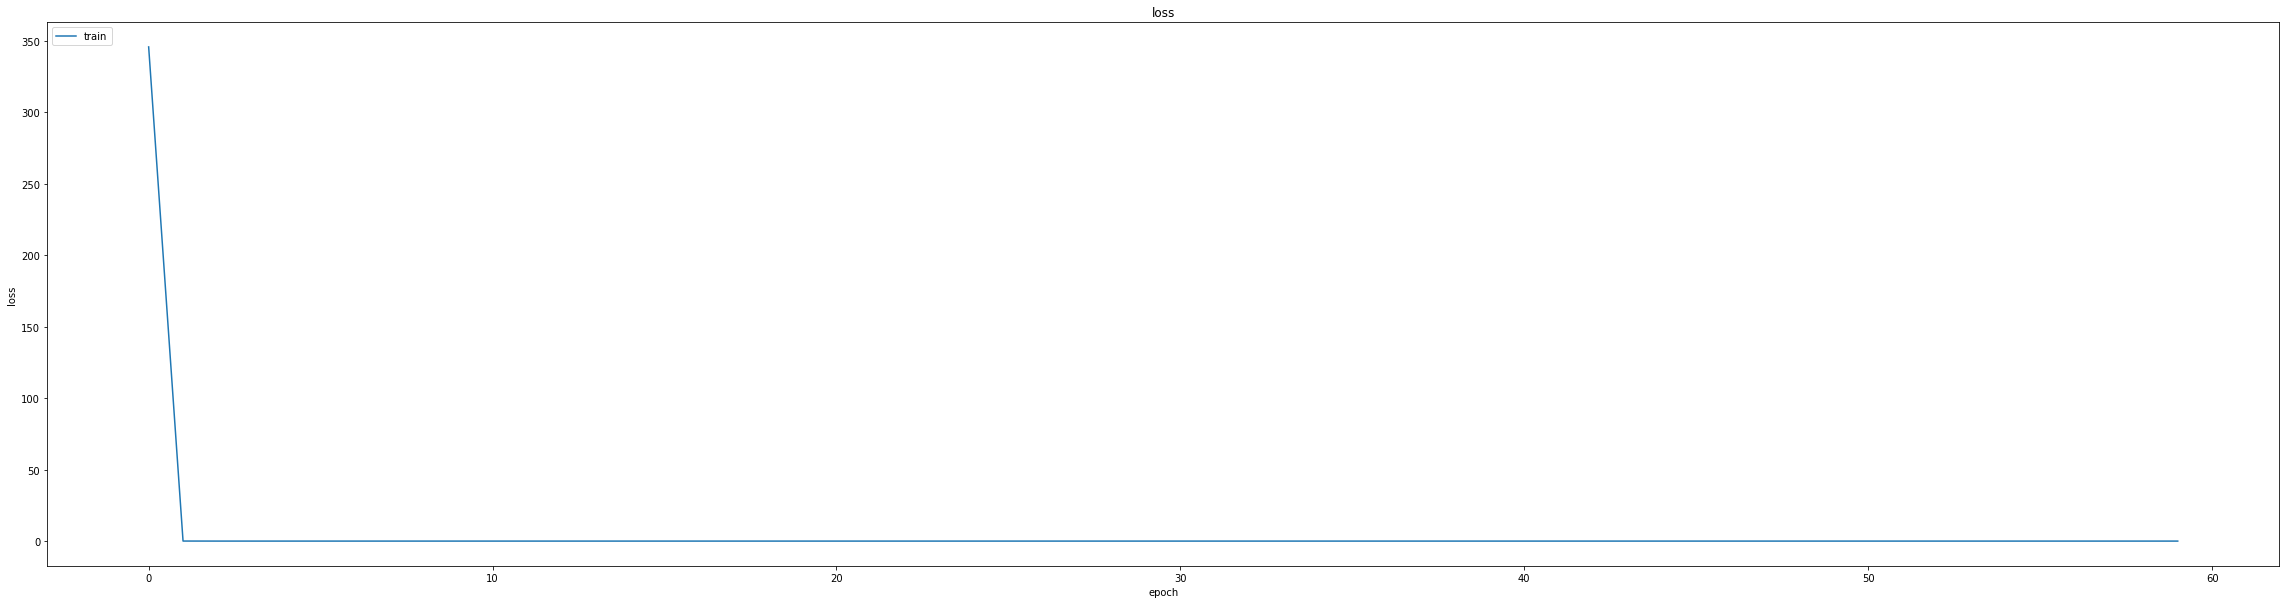

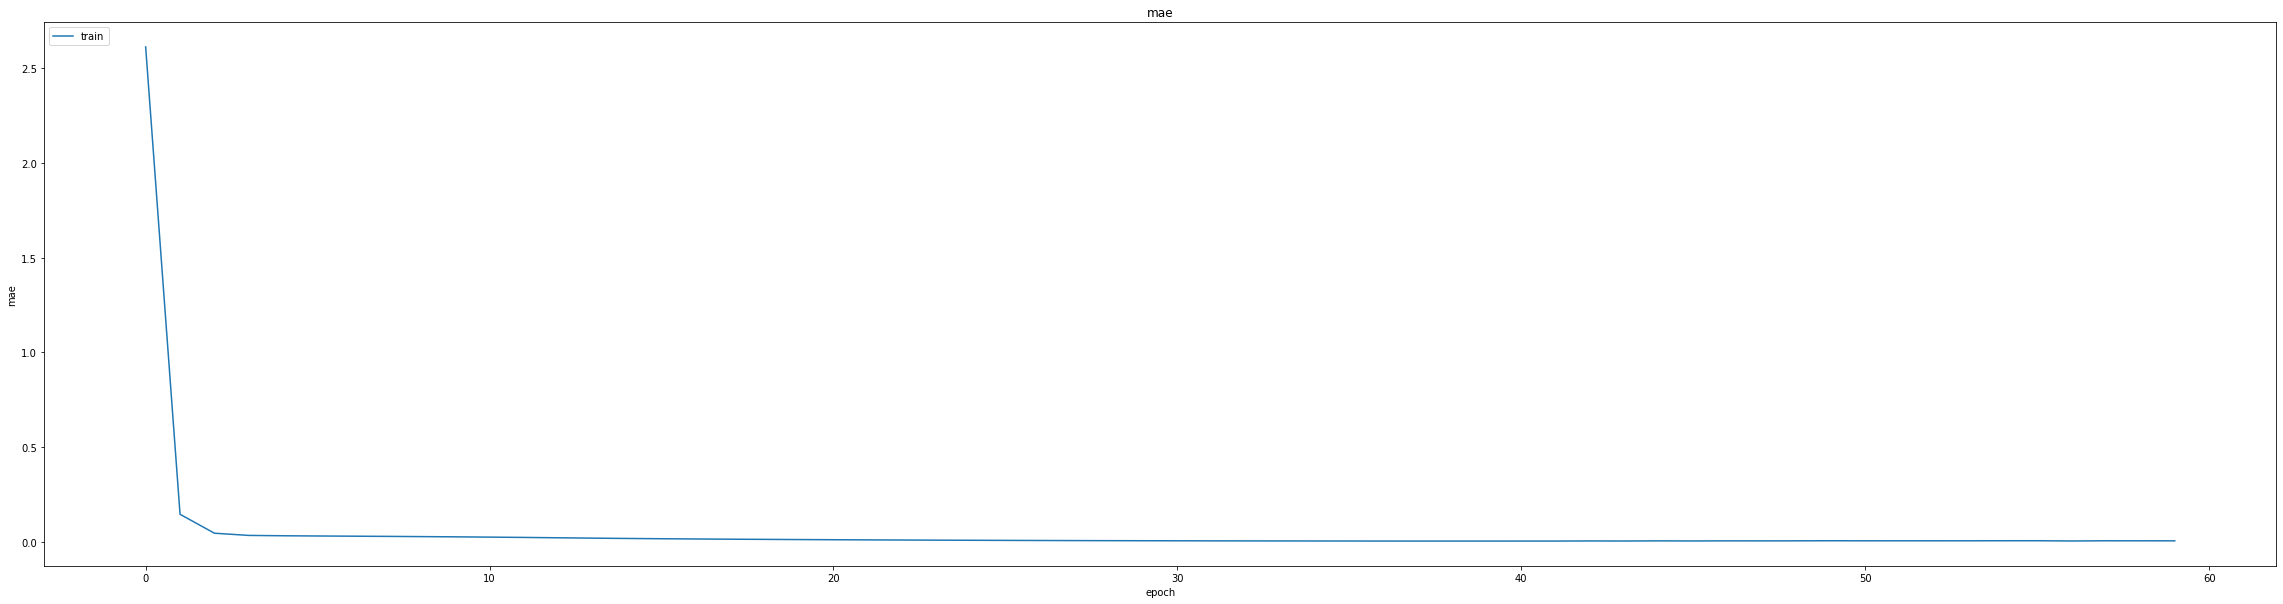

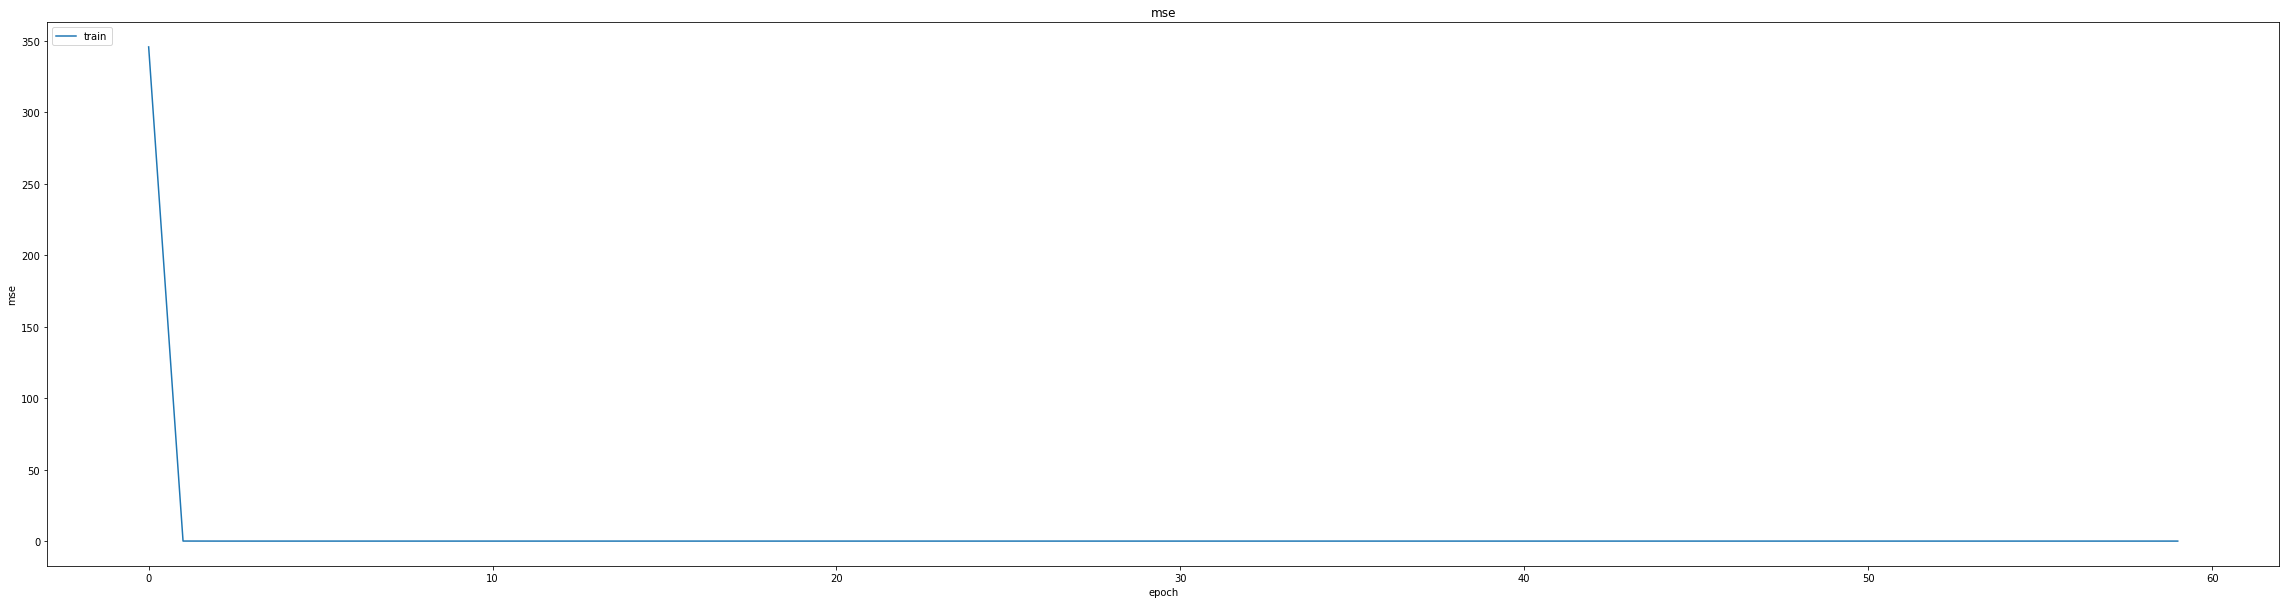

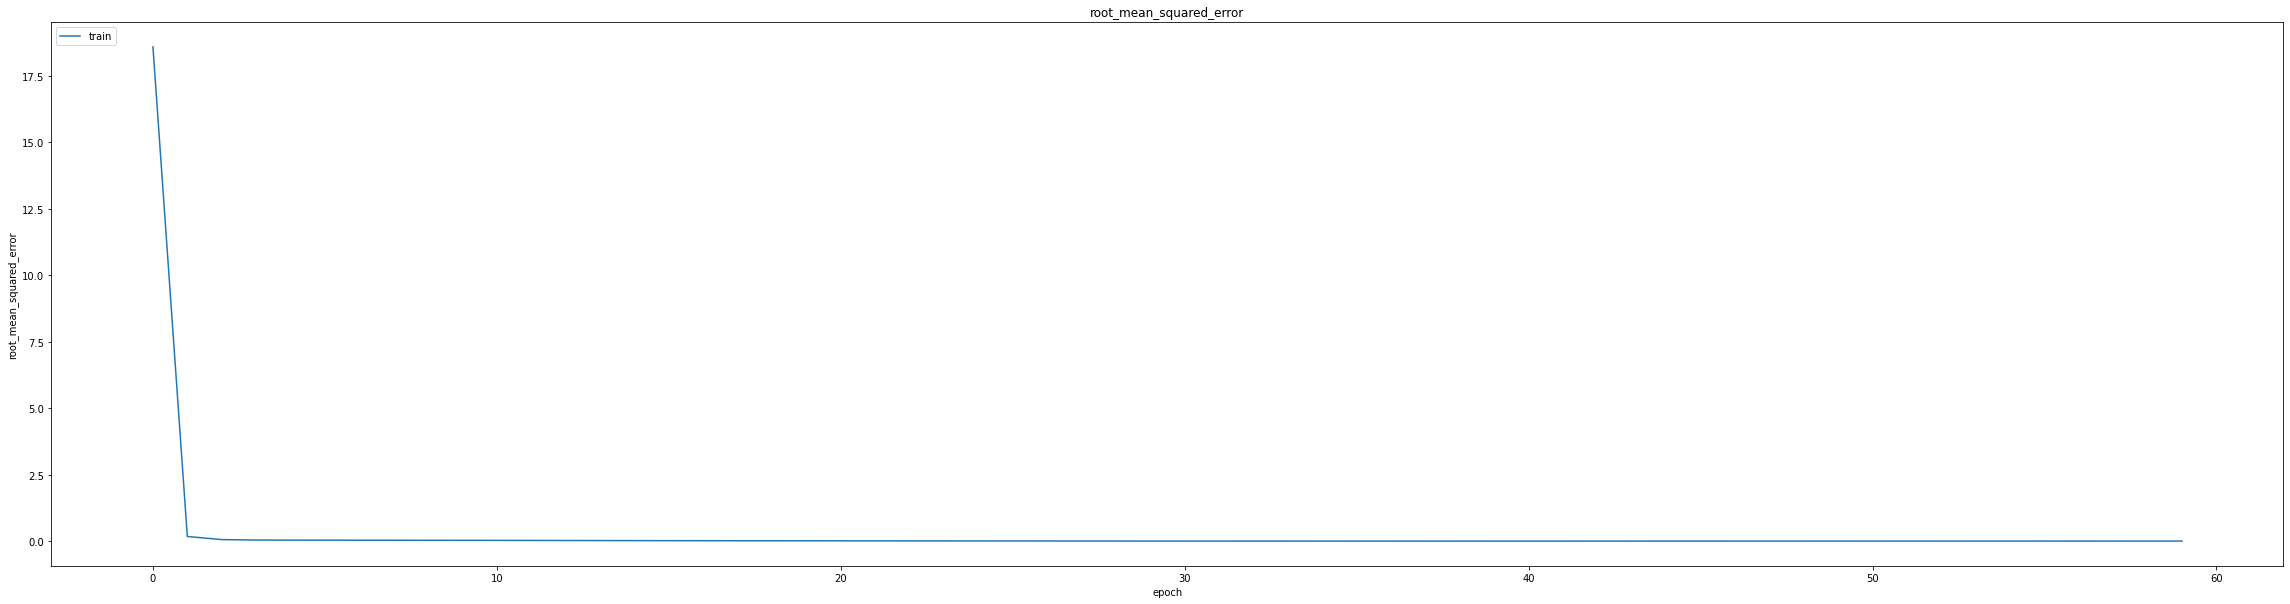

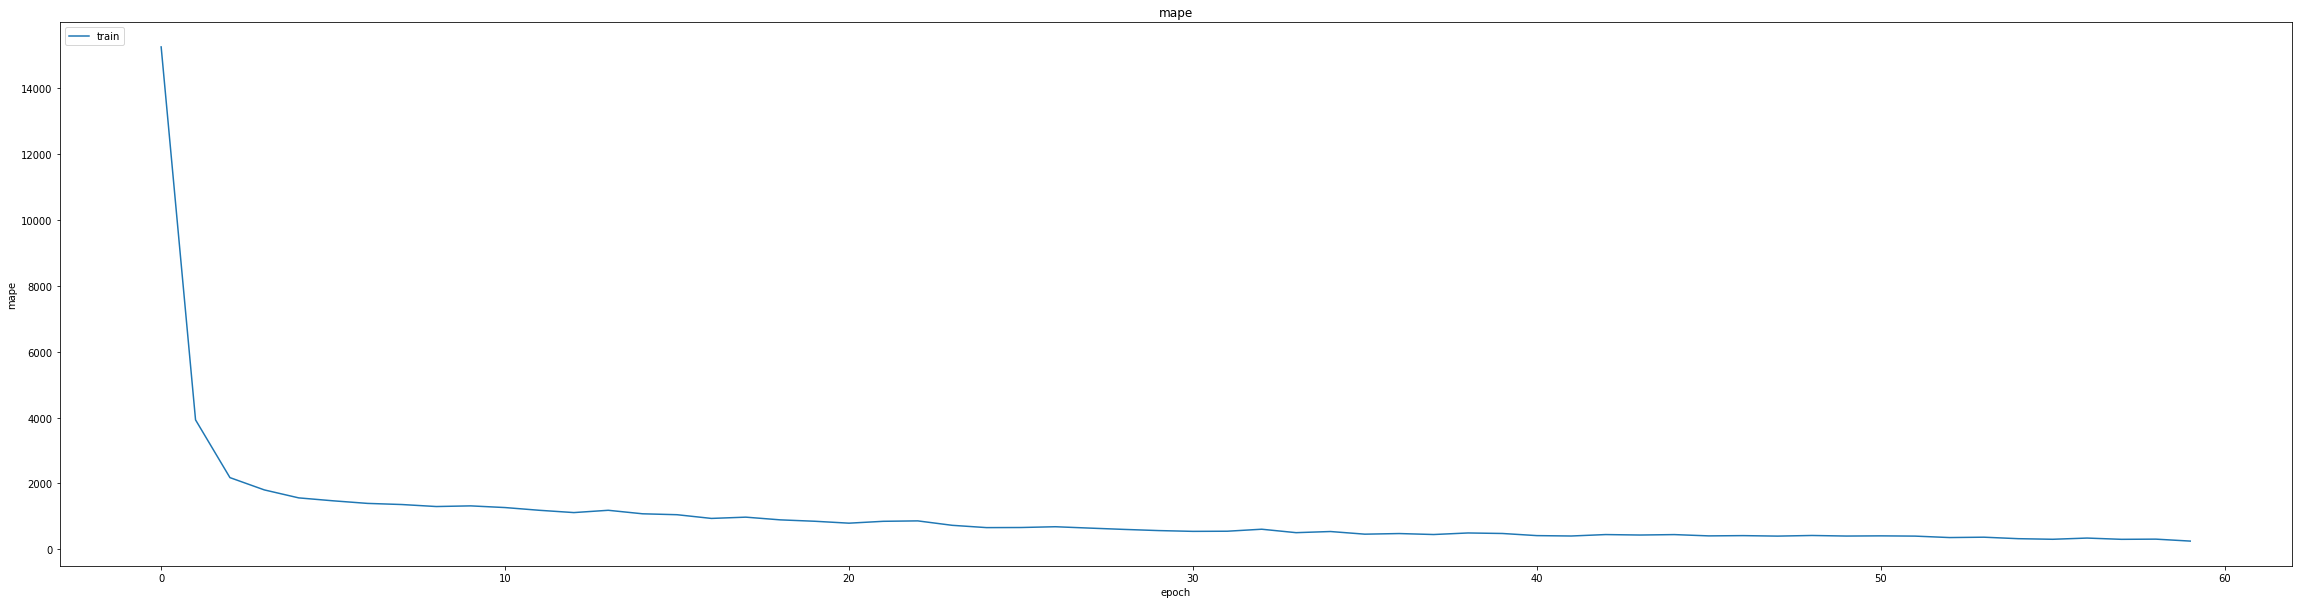

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00813229102641344
0.009811513125896454
1044/1044 [==============================] - 6s 5ms/step
0.9938190397315686


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 6.3808e-04 - mae: 0.0094 - mse: 6.3808e-04 - root_mean_squared_error: 0.0253 - mape: 375.2701


Epoch 1: val_mse did not improve from 0.00010
405/405 [==============================] - 18s 30ms/step - loss: 6.3530e-04 - mae: 0.0093 - mse: 6.3530e-04 - root_mean_squared_error: 0.0252 - mape: 373.5815 - val_loss: 2.4883e-04 - val_mae: 0.0135 - val_mse: 2.4883e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 1583.9612 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 1.8434e-05 - mae: 0.0033 - mse: 1.8434e-05 - root_mean_squared_error: 0.0043 - mape: 381.6090
Epoch 2: val_mse did not improve from 0.00010
405/405 [==============================] - 7s 18ms/step - loss: 1.8445e-05 - mae: 0.0033 - mse: 1.8445e-05 - root_mean_squared_error: 0.0043 - mape: 378.9563 - val_loss: 2.7844e-04 - val_mae: 0.0143 - val_mse: 2.7844e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1673.1218 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
405/405 [==============================] - ETA: 0s - loss: 1.5417e-05 - mae: 0.0030 - mse: 1.5417e-05 - roo

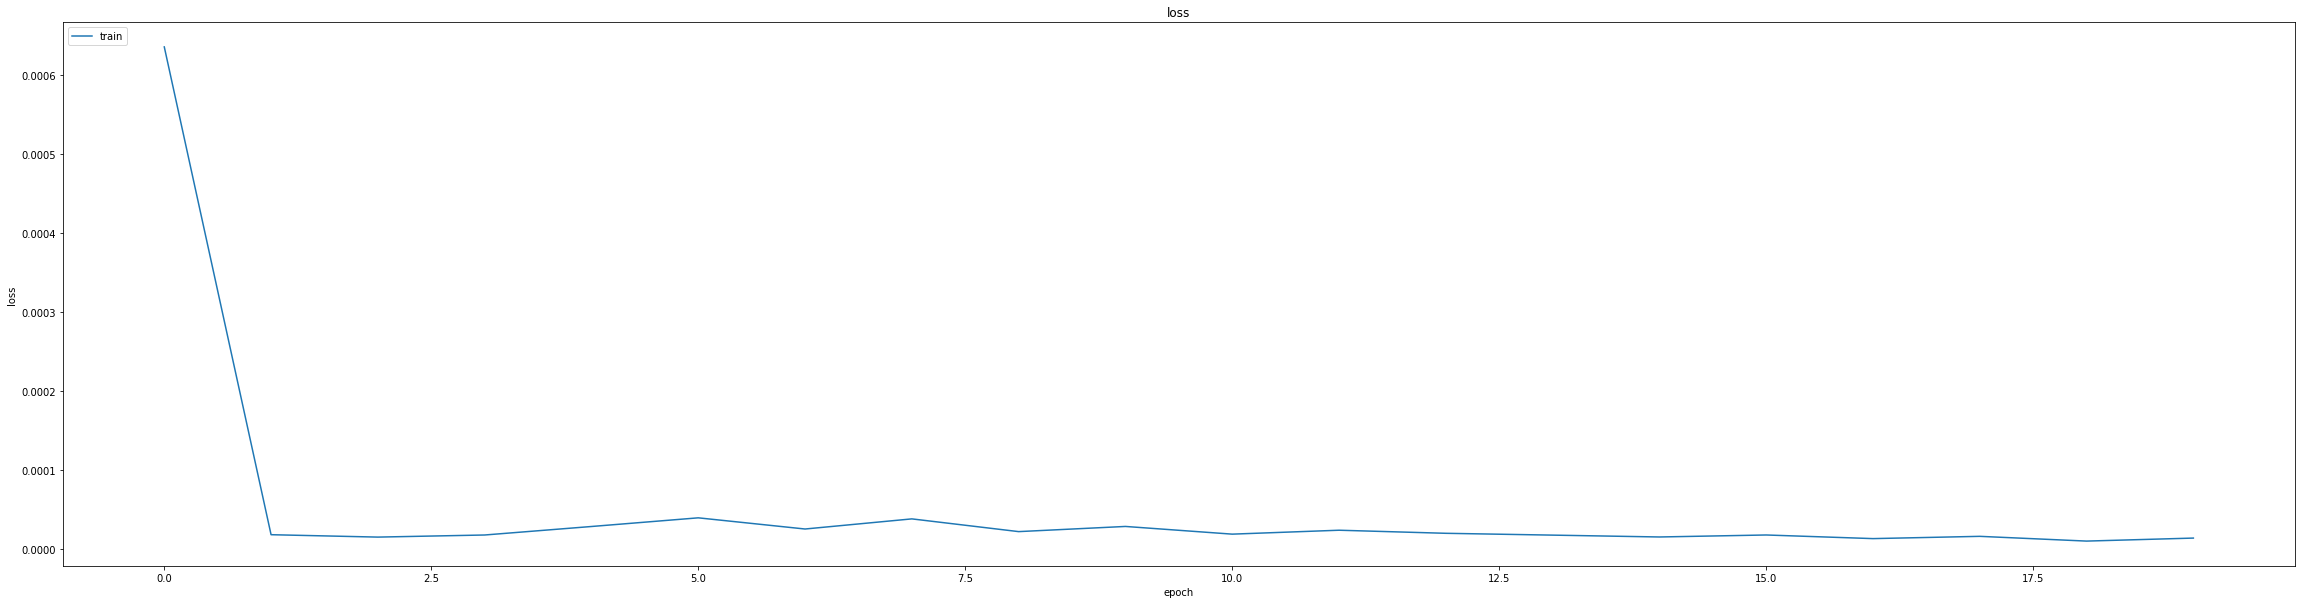

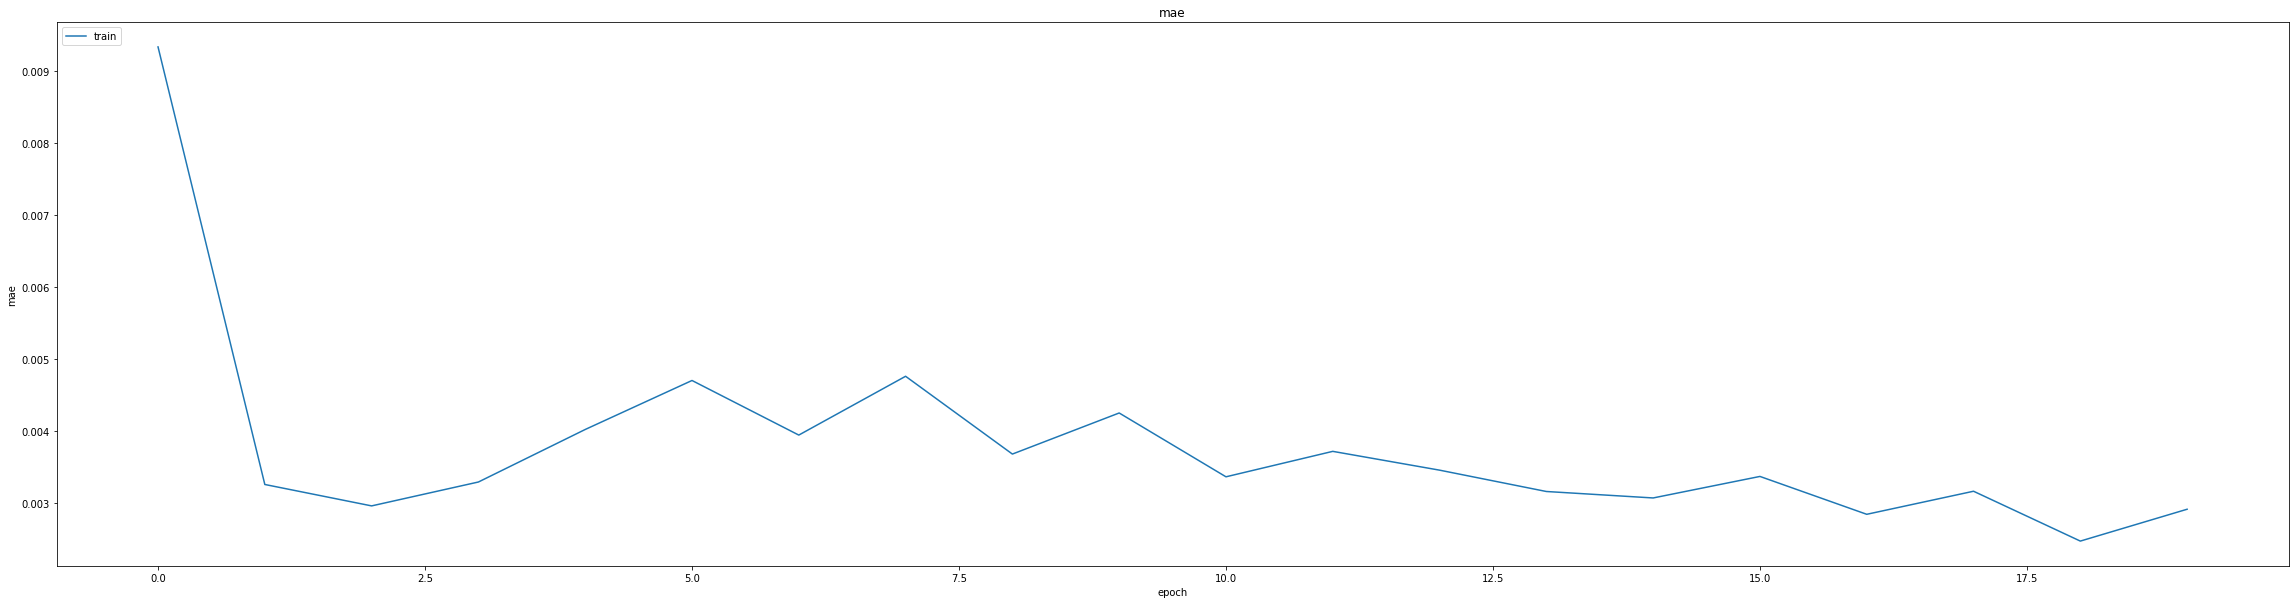

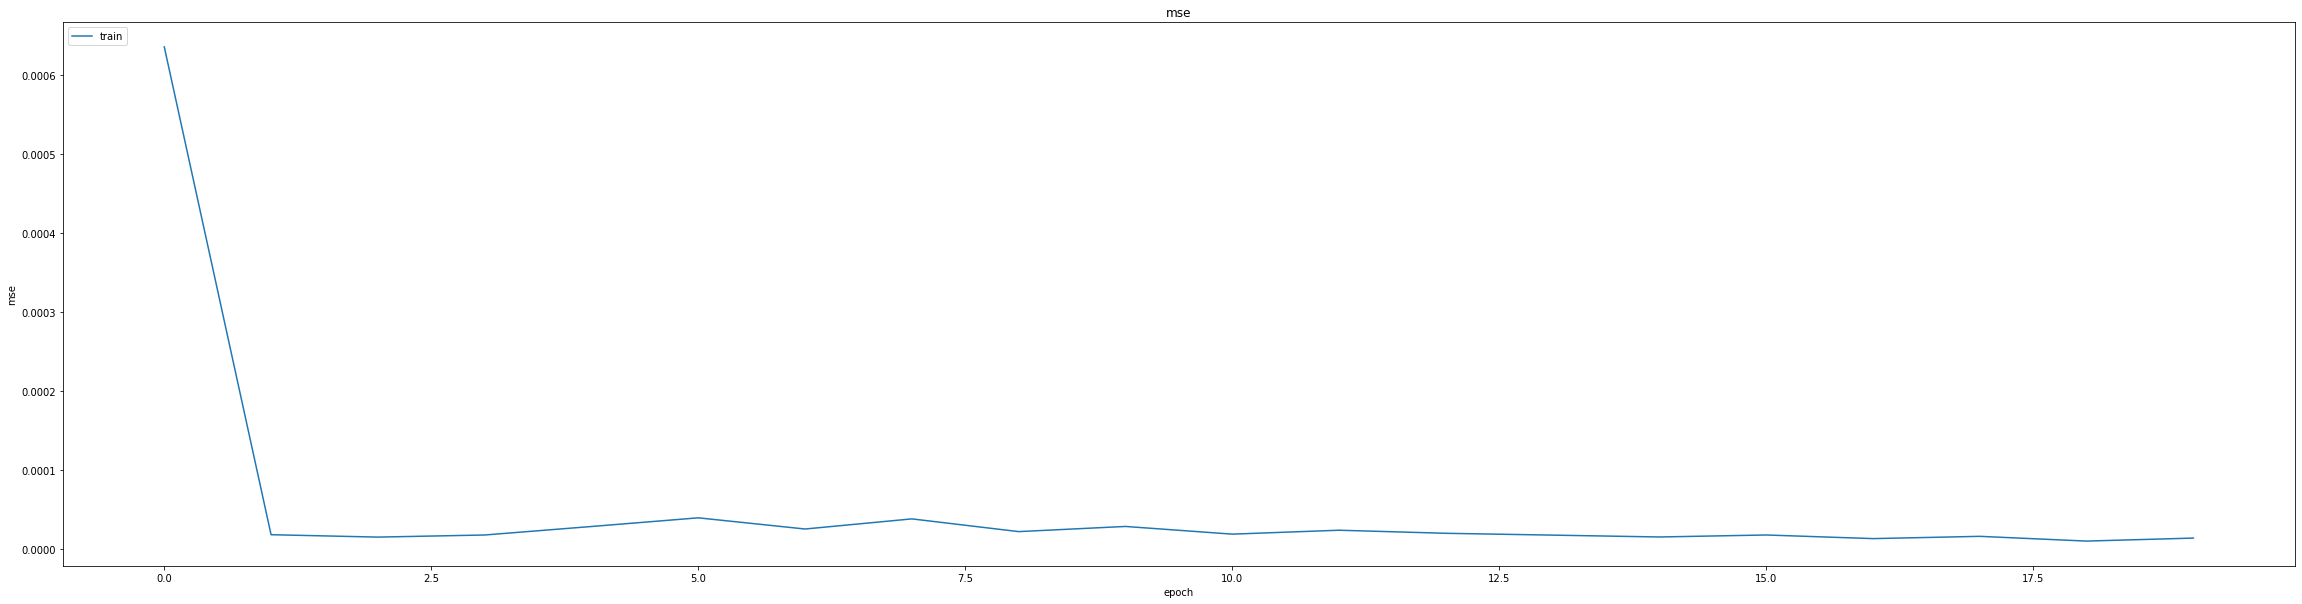

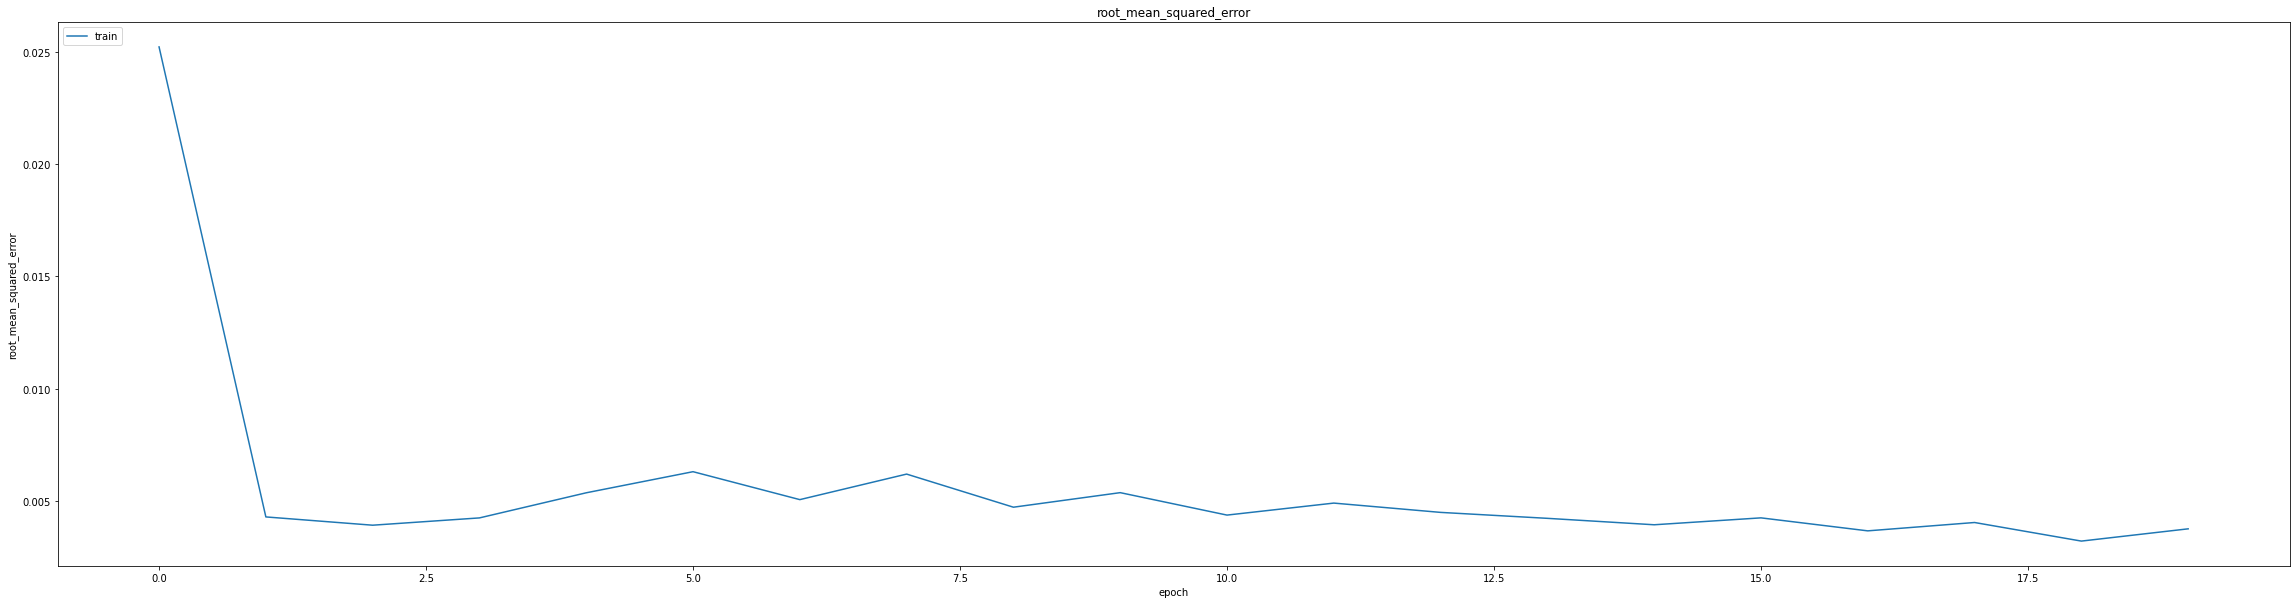

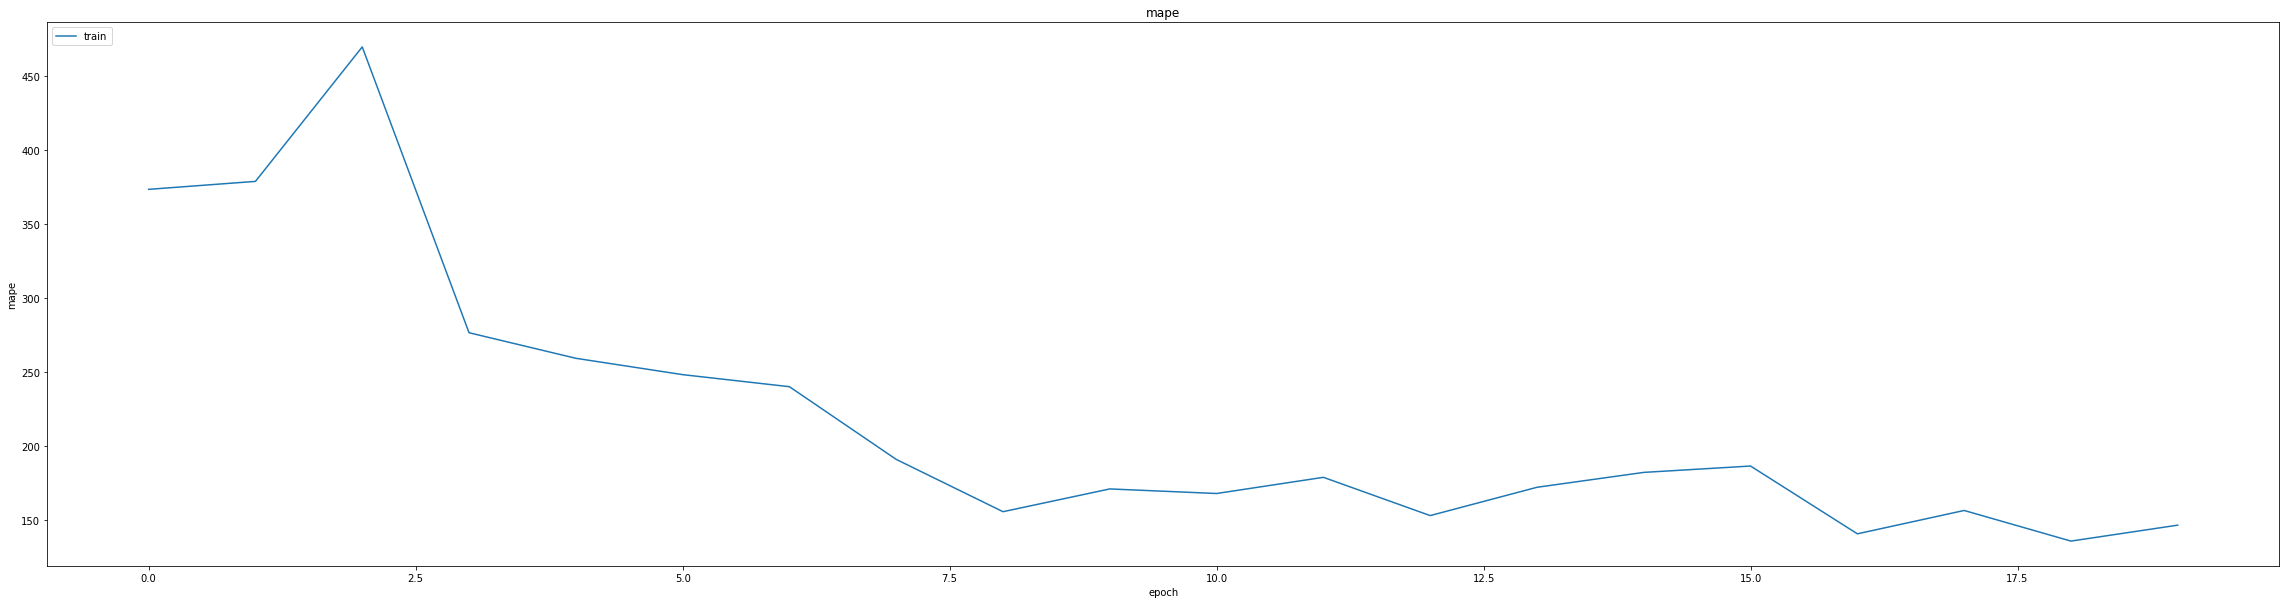

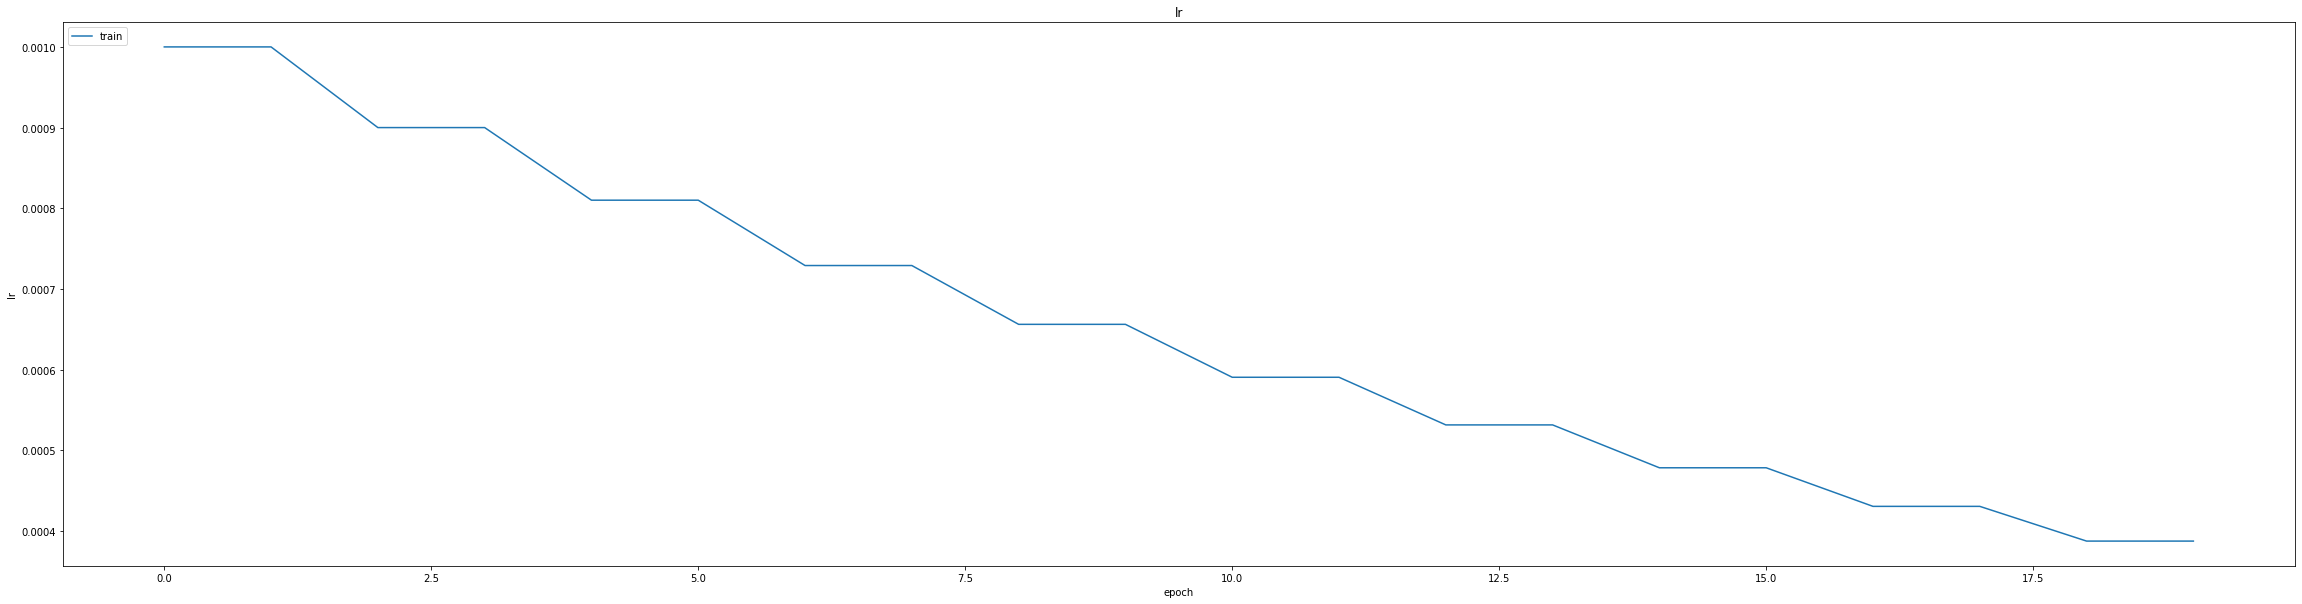

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00928489025682211
0.011160182766616344
1044/1044 [==============================] - 6s 5ms/step
0.9970491632935821


1044/1044 [==============================] - 5s 5ms/step


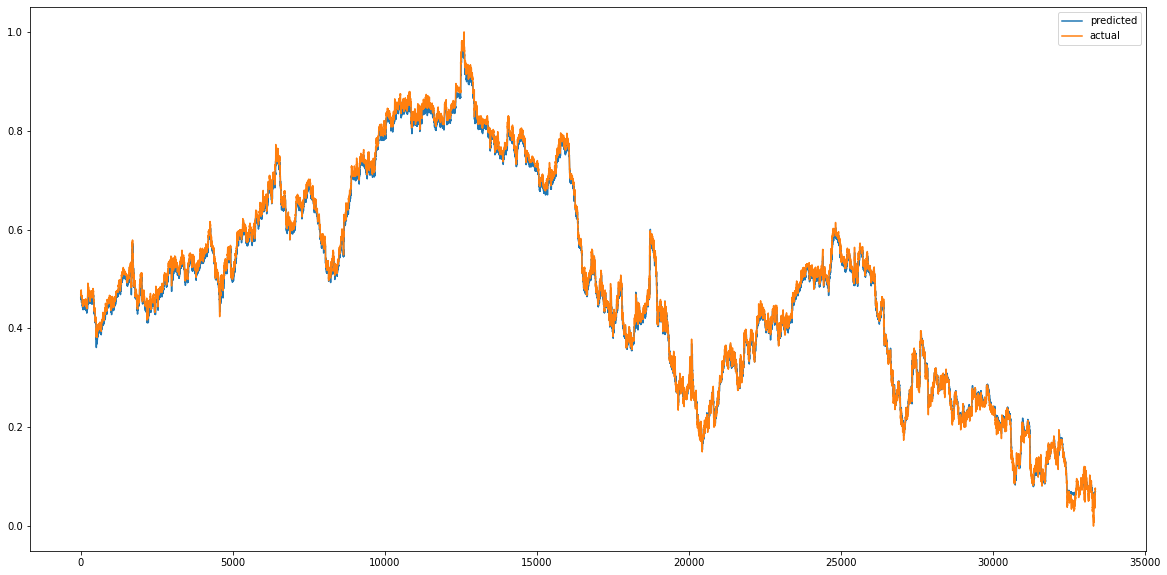

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


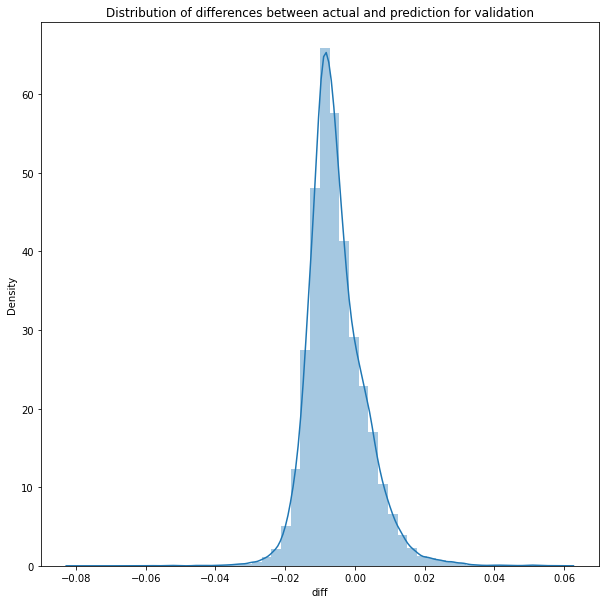

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 5s 5ms/step


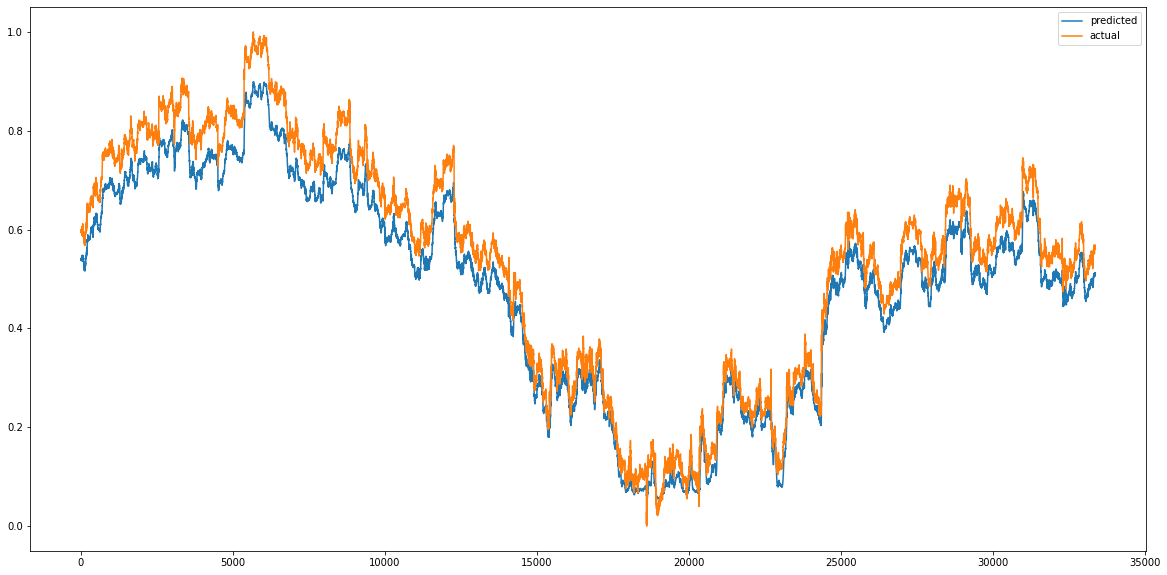

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


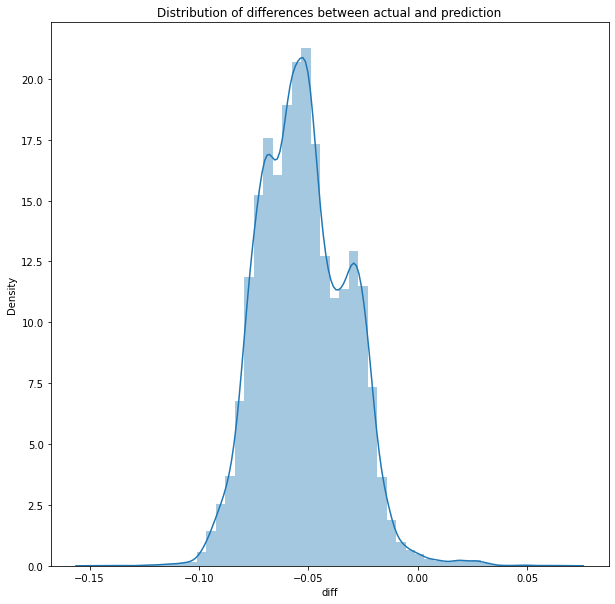

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.003113216733108512
RMSE :  0.055796207157014825
MAE :  0.052365403904528325
1044/1044 [==============================] - 5s 5ms/step
R2_Score  : 0.9440214168491824


count    33379.000000
mean        -0.052096
std          0.019981
min         -0.148771
25%         -0.066927
50%         -0.053448
75%         -0.038039
max          0.068185
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 347.0447 - mae: 2.8434 - mse: 347.0447 - root_mean_squared_error: 18.6291 - mape: 6364.2305
Epoch 1: val_mse improved from inf to 0.08621, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 17s 36ms/step - loss: 345.4795 - mae: 2.8312 - mse: 345.4795 - root_mean_squared_error: 18.5871 - mape: 6335.6909 - val_loss: 0.0862 - val_mae: 0.2388 - val_mse: 0.0862 - val_root_mean_squared_error: 0.2936 - val_mape: 21563.5820
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0175 - mae: 0.0901 - mse: 0.0175 - root_mean_squared_error: 0.1323 - mape: 4637.6621
Epoch 2: val_mse improved from 0.08621 to 0.03131, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0175 - mae: 0.0899 - mse: 0.0175 - root_mean_squared_error: 0.1322 - mape: 4616.8032 - val_loss: 0.0313 - val_mae: 0.1118 - val_mse: 0.0313 - val_root_mean_squared_error: 0.1770 - val_mape: 17421.5000
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0536 - mse: 0.0071 - root_mean_squared_error: 0.0844 - mape: 4116.0625
Epoch 3: val_mse improved from 0.03131 to 0.01973, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0071 - mae: 0.0535 - mse: 0.0071 - root_mean_squared_error: 0.0844 - mape: 4097.5469 - val_loss: 0.0197 - val_mae: 0.0857 - val_mse: 0.0197 - val_root_mean_squared_error: 0.1405 - val_mape: 14916.1270
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0468 - mse: 0.0051 - root_mean_squared_error: 0.0715 - mape: 3284.7725
Epoch 4: val_mse improved from 0.01973 to 0.01478, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0051 - mae: 0.0468 - mse: 0.0051 - root_mean_squared_error: 0.0715 - mape: 3284.7725 - val_loss: 0.0148 - val_mae: 0.0734 - val_mse: 0.0148 - val_root_mean_squared_error: 0.1216 - val_mape: 13600.5186
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0424 - mse: 0.0041 - root_mean_squared_error: 0.0637 - mape: 2905.8813
Epoch 5: val_mse improved from 0.01478 to 0.01158, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0041 - mae: 0.0424 - mse: 0.0041 - root_mean_squared_error: 0.0637 - mape: 2892.8237 - val_loss: 0.0116 - val_mae: 0.0632 - val_mse: 0.0116 - val_root_mean_squared_error: 0.1076 - val_mape: 12649.0361
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0390 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 2755.5369
Epoch 6: val_mse improved from 0.01158 to 0.00940, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0033 - mae: 0.0390 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 2755.5369 - val_loss: 0.0094 - val_mae: 0.0556 - val_mse: 0.0094 - val_root_mean_squared_error: 0.0969 - val_mape: 11872.7227
Epoch 7/60
402/405 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0358 - mse: 0.0024 - root_mean_squared_error: 0.0488 - mape: 2326.7290
Epoch 7: val_mse improved from 0.00940 to 0.00254, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0024 - mae: 0.0358 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 2310.5408 - val_loss: 0.0025 - val_mae: 0.0308 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 8021.0225
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1858.6602
Epoch 8: val_mse improved from 0.00254 to 0.00184, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1854.8800 - val_loss: 0.0018 - val_mae: 0.0256 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 7275.6875
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 1651.7841
Epoch 9: val_mse improved from 0.00184 to 0.00147, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 1644.3589 - val_loss: 0.0015 - val_mae: 0.0241 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 6684.8188
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1696.1398
Epoch 10: val_mse improved from 0.00147 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1684.3356 - val_loss: 0.0012 - val_mae: 0.0211 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 6279.2388
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 1368.3674
Epoch 11: val_mse improved from 0.00119 to 0.00113, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 1362.2300 - val_loss: 0.0011 - val_mae: 0.0210 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 6083.0625
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1300.6299
Epoch 12: val_mse improved from 0.00113 to 0.00092, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1300.6299 - val_loss: 9.2443e-04 - val_mae: 0.0192 - val_mse: 9.2443e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 5684.4995
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 1325.8115
Epoch 13: val_mse improved from 0.00092 to 0.00082, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 1325.8115 - val_loss: 8.1905e-04 - val_mae: 0.0185 - val_mse: 8.1905e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 5384.7910
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1280.5795
Epoch 14: val_mse improved from 0.00082 to 0.00075, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1280.5795 - val_loss: 7.5112e-04 - val_mae: 0.0175 - val_mse: 7.5112e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 5267.5581
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 9.2462e-04 - mae: 0.0237 - mse: 9.2462e-04 - root_mean_squared_error: 0.0304 - mape: 1291.0491
Epoch 15: val_mse improved from 0.00075 to 0.00062, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 9.2460e-04 - mae: 0.0237 - mse: 9.2460e-04 - root_mean_squared_error: 0.0304 - mape: 1288.4231 - val_loss: 6.2402e-04 - val_mae: 0.0162 - val_mse: 6.2402e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4935.9429
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 8.4596e-04 - mae: 0.0227 - mse: 8.4596e-04 - root_mean_squared_error: 0.0291 - mape: 1150.3488
Epoch 16: val_mse improved from 0.00062 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.4596e-04 - mae: 0.0227 - mse: 8.4596e-04 - root_mean_squared_error: 0.0291 - mape: 1150.3488 - val_loss: 5.8317e-04 - val_mae: 0.0160 - val_mse: 5.8317e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 4722.8188
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 7.7899e-04 - mae: 0.0218 - mse: 7.7899e-04 - root_mean_squared_error: 0.0279 - mape: 852.9257
Epoch 17: val_mse improved from 0.00058 to 0.00056, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 7.7846e-04 - mae: 0.0218 - mse: 7.7846e-04 - root_mean_squared_error: 0.0279 - mape: 849.0943 - val_loss: 5.5829e-04 - val_mae: 0.0161 - val_mse: 5.5829e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 4545.9771
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 7.0302e-04 - mae: 0.0207 - mse: 7.0302e-04 - root_mean_squared_error: 0.0265 - mape: 915.5303
Epoch 18: val_mse improved from 0.00056 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 7.0307e-04 - mae: 0.0207 - mse: 7.0307e-04 - root_mean_squared_error: 0.0265 - mape: 911.4162 - val_loss: 4.3276e-04 - val_mae: 0.0140 - val_mse: 4.3276e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 4250.7886
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 6.3764e-04 - mae: 0.0197 - mse: 6.3764e-04 - root_mean_squared_error: 0.0253 - mape: 1082.8335
Epoch 19: val_mse improved from 0.00043 to 0.00038, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 6.3757e-04 - mae: 0.0197 - mse: 6.3757e-04 - root_mean_squared_error: 0.0253 - mape: 1077.9661 - val_loss: 3.7998e-04 - val_mae: 0.0135 - val_mse: 3.7998e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3924.4895
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 5.6827e-04 - mae: 0.0187 - mse: 5.6827e-04 - root_mean_squared_error: 0.0238 - mape: 909.0728
Epoch 20: val_mse improved from 0.00038 to 0.00034, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 5.6799e-04 - mae: 0.0187 - mse: 5.6799e-04 - root_mean_squared_error: 0.0238 - mape: 904.9938 - val_loss: 3.3912e-04 - val_mae: 0.0128 - val_mse: 3.3912e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3700.7419
Epoch 21/60
402/405 [============================>.] - ETA: 0s - loss: 5.0929e-04 - mae: 0.0177 - mse: 5.0929e-04 - root_mean_squared_error: 0.0226 - mape: 880.3842
Epoch 21: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 16ms/step - loss: 5.0933e-04 - mae: 0.0177 - mse: 5.0933e-04 - root_mean_squared_error: 0.0226 - mape: 874.2673 - val_loss: 3.4820e-04 - val_mae: 0.0130 - val_mse: 3.4820e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3539.8108
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 4.5560e-04 - mae: 0.0168 - mse: 4.5560e-04 - root_mean_squared_error: 0.0213 - mape: 714.9843
Epoch 22: val_mse improved from 0.00034 to 0.00029, saving m

405/405 [==============================] - 14s 35ms/step - loss: 4.5565e-04 - mae: 0.0168 - mse: 4.5565e-04 - root_mean_squared_error: 0.0213 - mape: 713.5372 - val_loss: 2.9253e-04 - val_mae: 0.0120 - val_mse: 2.9253e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 3279.0310
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 4.0371e-04 - mae: 0.0157 - mse: 4.0371e-04 - root_mean_squared_error: 0.0201 - mape: 753.1944
Epoch 23: val_mse did not improve from 0.00029
405/405 [==============================] - 6s 16ms/step - loss: 4.0340e-04 - mae: 0.0157 - mse: 4.0340e-04 - root_mean_squared_error: 0.0201 - mape: 749.8079 - val_loss: 2.9492e-04 - val_mae: 0.0122 - val_mse: 2.9492e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 3127.2517
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 3.5743e-04 - mae: 0.0148 - mse: 3.5743e-04 - root_mean_squared_error: 0.0189 - mape: 673.1243
Epoch 24: val_mse did not improve from 0.00029
405/405 [====

405/405 [==============================] - 14s 34ms/step - loss: 3.0829e-04 - mae: 0.0137 - mse: 3.0829e-04 - root_mean_squared_error: 0.0176 - mape: 685.7021 - val_loss: 2.7555e-04 - val_mae: 0.0122 - val_mse: 2.7555e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 2866.8291
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 2.7157e-04 - mae: 0.0129 - mse: 2.7157e-04 - root_mean_squared_error: 0.0165 - mape: 688.1689
Epoch 26: val_mse did not improve from 0.00028
405/405 [==============================] - 6s 16ms/step - loss: 2.7130e-04 - mae: 0.0129 - mse: 2.7130e-04 - root_mean_squared_error: 0.0165 - mape: 685.0737 - val_loss: 3.2222e-04 - val_mae: 0.0133 - val_mse: 3.2222e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2824.6411
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 2.3857e-04 - mae: 0.0121 - mse: 2.3857e-04 - root_mean_squared_error: 0.0154 - mape: 626.5818
Epoch 27: val_mse improved from 0.00028 to 0.00025, saving m

405/405 [==============================] - 14s 33ms/step - loss: 2.3854e-04 - mae: 0.0121 - mse: 2.3854e-04 - root_mean_squared_error: 0.0154 - mape: 625.3073 - val_loss: 2.5440e-04 - val_mae: 0.0115 - val_mse: 2.5440e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 2667.2229
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 2.0952e-04 - mae: 0.0113 - mse: 2.0952e-04 - root_mean_squared_error: 0.0145 - mape: 560.2539
Epoch 28: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 16ms/step - loss: 2.0950e-04 - mae: 0.0113 - mse: 2.0950e-04 - root_mean_squared_error: 0.0145 - mape: 559.1148 - val_loss: 3.2589e-04 - val_mae: 0.0127 - val_mse: 3.2589e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 2689.9807
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 1.8145e-04 - mae: 0.0105 - mse: 1.8145e-04 - root_mean_squared_error: 0.0135 - mape: 584.9426
Epoch 29: val_mse did not improve from 0.00025
405/405 [====

405/405 [==============================] - 14s 35ms/step - loss: 1.0532e-04 - mae: 0.0080 - mse: 1.0532e-04 - root_mean_squared_error: 0.0103 - mape: 549.9631 - val_loss: 2.3933e-04 - val_mae: 0.0111 - val_mse: 2.3933e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 2289.5356
Epoch 35/60
403/405 [============================>.] - ETA: 0s - loss: 9.6569e-05 - mae: 0.0076 - mse: 9.6569e-05 - root_mean_squared_error: 0.0098 - mape: 530.3267
Epoch 35: val_mse did not improve from 0.00024
405/405 [==============================] - 6s 16ms/step - loss: 9.6591e-05 - mae: 0.0076 - mse: 9.6591e-05 - root_mean_squared_error: 0.0098 - mape: 527.9412 - val_loss: 3.7789e-04 - val_mae: 0.0138 - val_mse: 3.7789e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2478.9412
Epoch 36/60
403/405 [============================>.] - ETA: 0s - loss: 8.9755e-05 - mae: 0.0073 - mse: 8.9755e-05 - root_mean_squared_error: 0.0095 - mape: 479.9145
Epoch 36: val_mse did not improve from 0.00024
405/405 [====

405/405 [==============================] - 14s 35ms/step - loss: 6.8444e-05 - mae: 0.0064 - mse: 6.8444e-05 - root_mean_squared_error: 0.0083 - mape: 365.6130 - val_loss: 2.1044e-04 - val_mae: 0.0108 - val_mse: 2.1044e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1849.5405
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 6.8267e-05 - mae: 0.0065 - mse: 6.8267e-05 - root_mean_squared_error: 0.0083 - mape: 372.0178
Epoch 56: val_mse did not improve from 0.00021
405/405 [==============================] - 6s 16ms/step - loss: 6.8529e-05 - mae: 0.0066 - mse: 6.8529e-05 - root_mean_squared_error: 0.0083 - mape: 371.2628 - val_loss: 2.7092e-04 - val_mae: 0.0128 - val_mse: 2.7092e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 1905.4056
Epoch 57/60
405/405 [==============================] - ETA: 0s - loss: 6.9978e-05 - mae: 0.0065 - mse: 6.9978e-05 - root_mean_squared_error: 0.0084 - mape: 322.8911
Epoch 57: val_mse improved from 0.00021 to 0.00017, saving m

405/405 [==============================] - 14s 35ms/step - loss: 6.9978e-05 - mae: 0.0065 - mse: 6.9978e-05 - root_mean_squared_error: 0.0084 - mape: 322.8911 - val_loss: 1.6639e-04 - val_mae: 0.0094 - val_mse: 1.6639e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1850.8809
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 6.5459e-05 - mae: 0.0064 - mse: 6.5459e-05 - root_mean_squared_error: 0.0081 - mape: 399.4307
Epoch 58: val_mse did not improve from 0.00017
405/405 [==============================] - 6s 16ms/step - loss: 6.5416e-05 - mae: 0.0064 - mse: 6.5416e-05 - root_mean_squared_error: 0.0081 - mape: 398.6176 - val_loss: 1.8279e-04 - val_mae: 0.0098 - val_mse: 1.8279e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1891.1548
Epoch 59/60
403/405 [============================>.] - ETA: 0s - loss: 6.5564e-05 - mae: 0.0064 - mse: 6.5564e-05 - root_mean_squared_error: 0.0081 - mape: 324.2907
Epoch 59: val_mse did not improve from 0.00017
405/405 [====

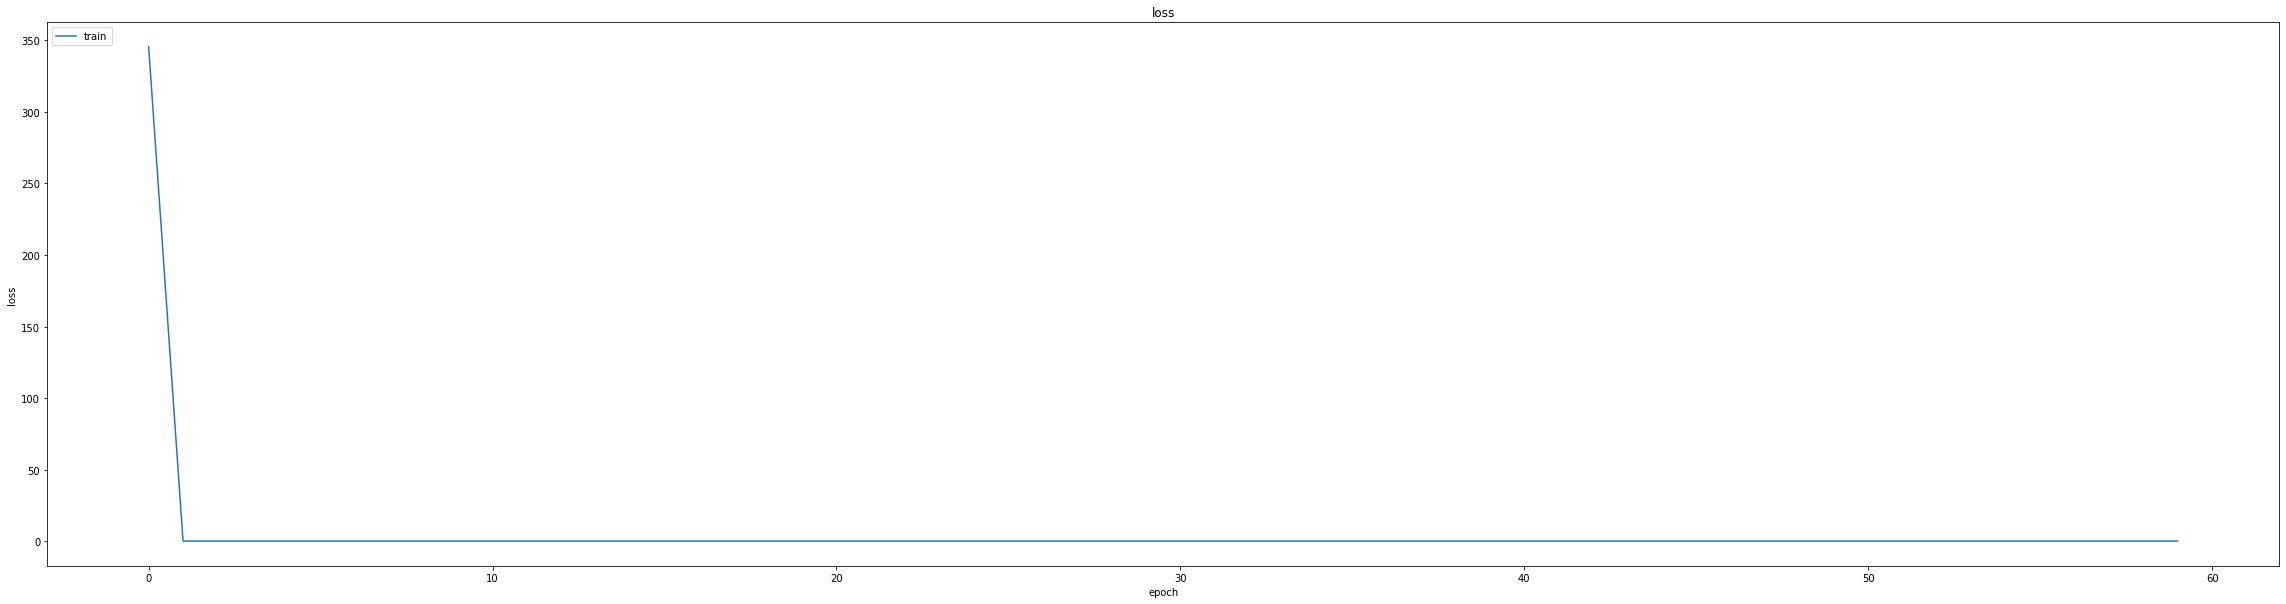

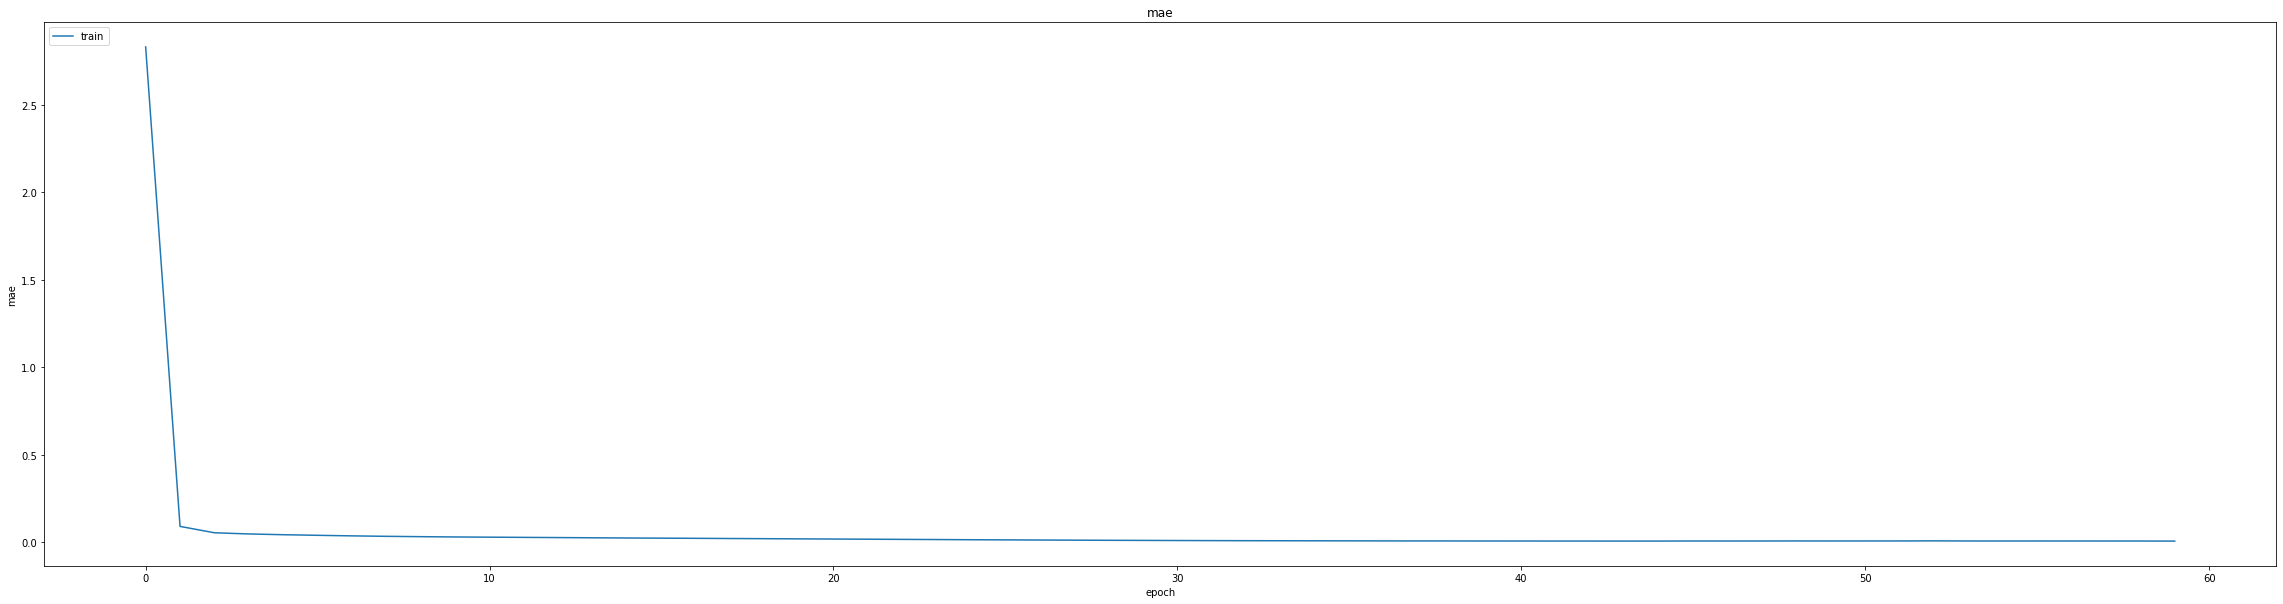

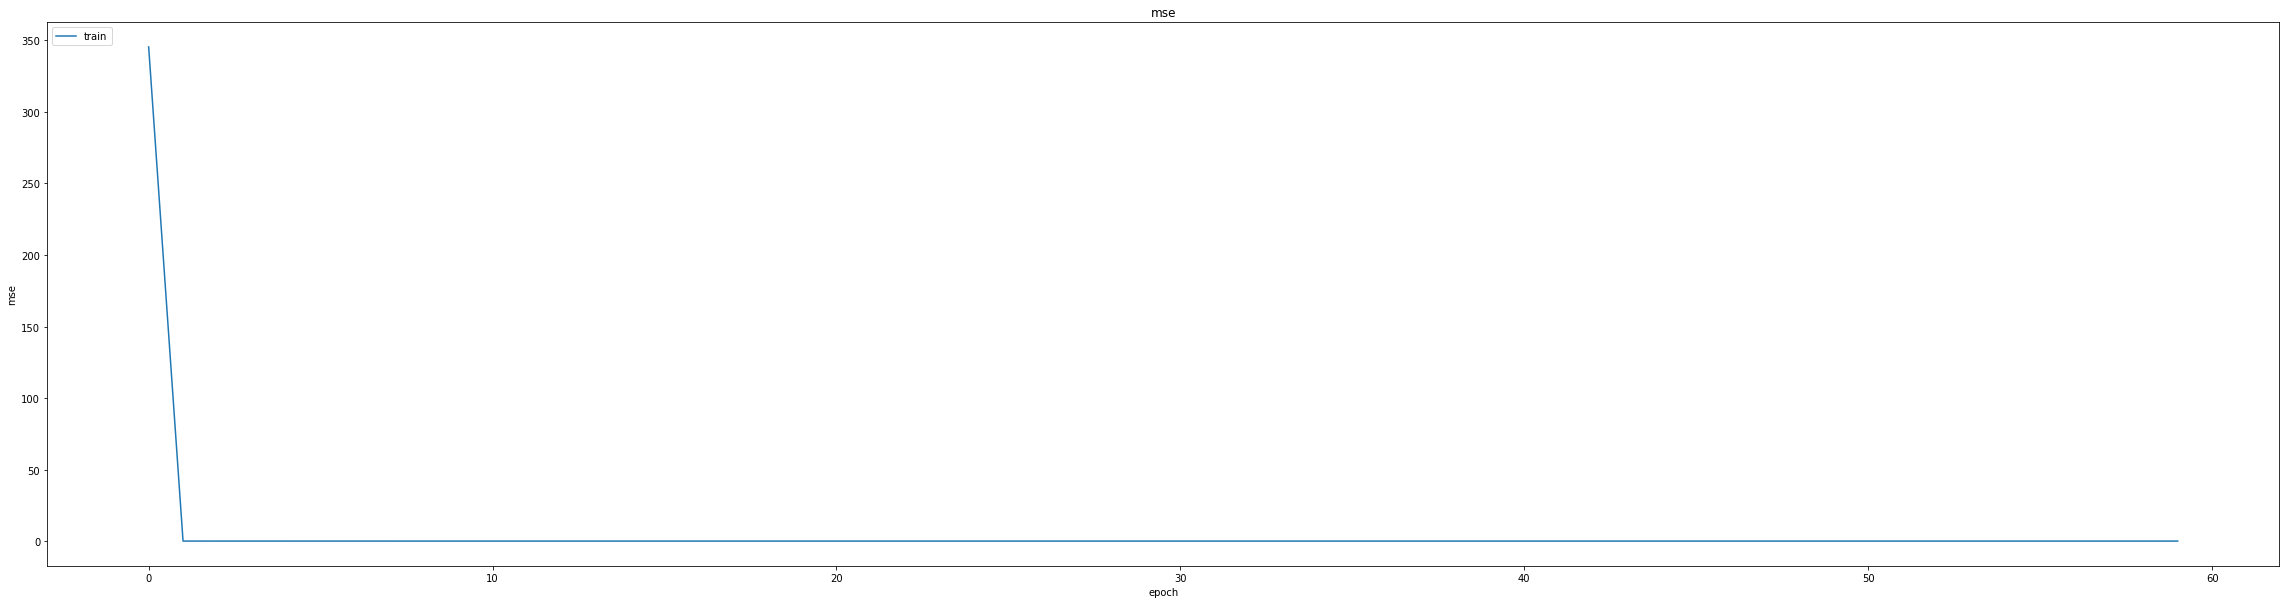

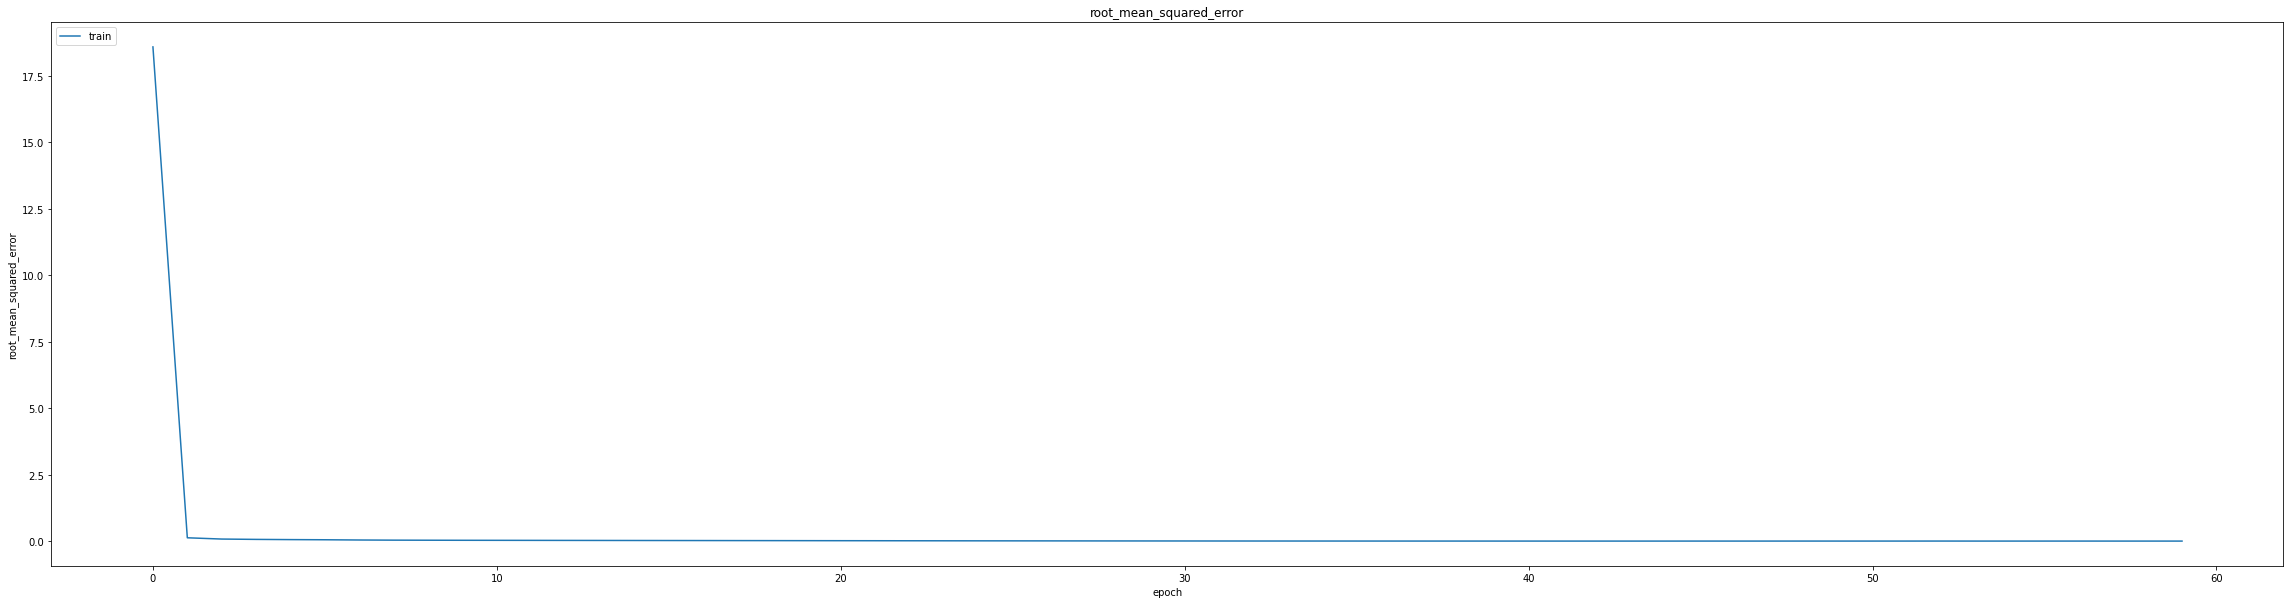

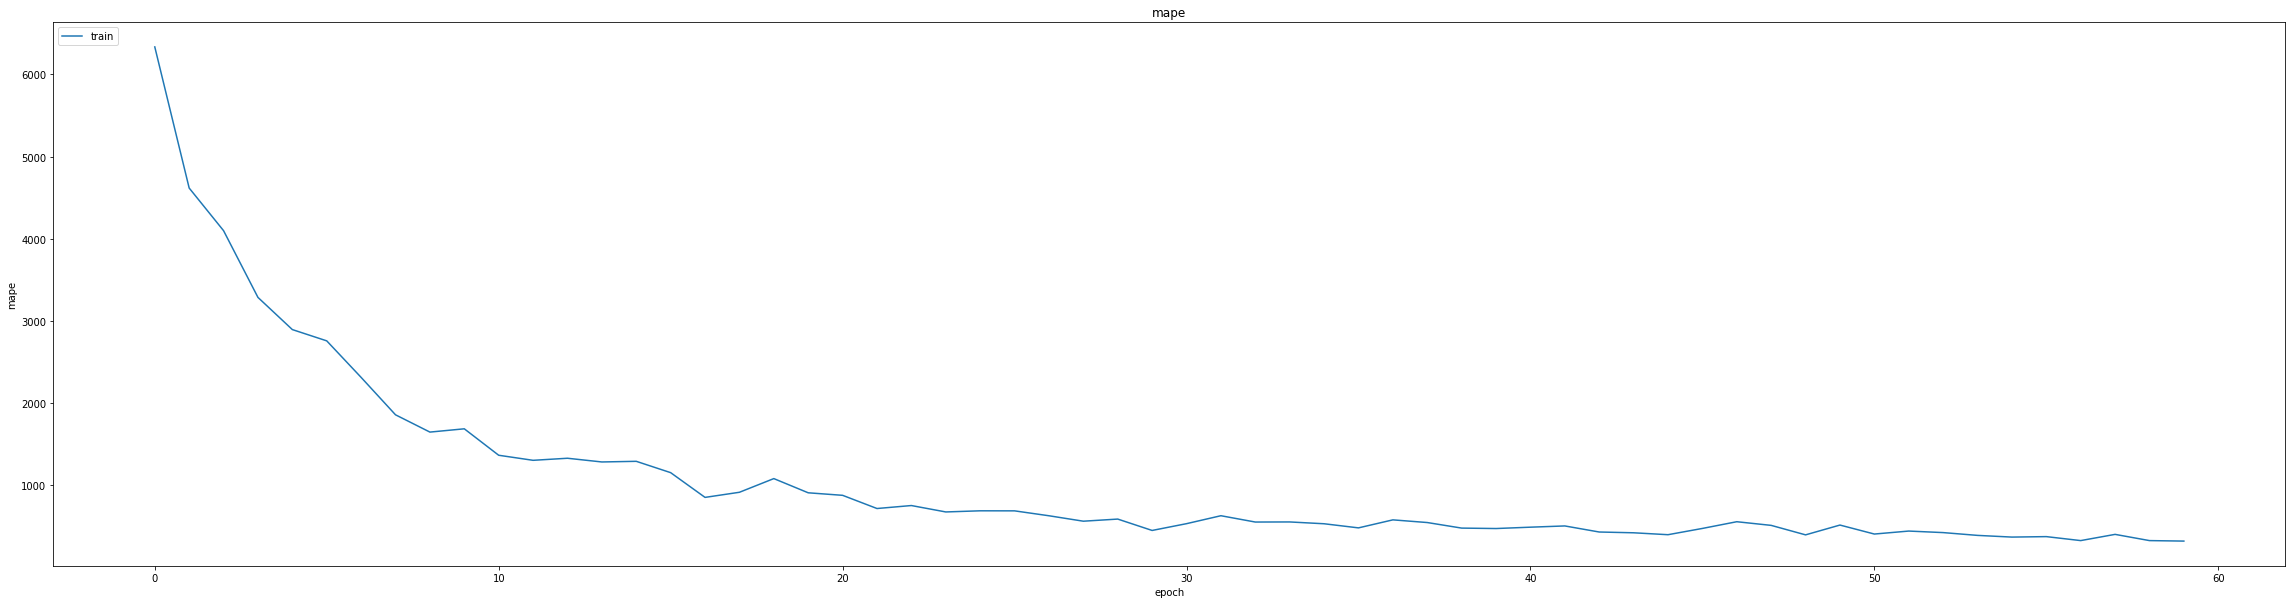

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009418021887540817
0.012899225577712059
1044/1044 [==============================] - 6s 5ms/step
0.9952026598873521


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 6.9835e-04 - mae: 0.0103 - mse: 6.9835e-04 - root_mean_squared_error: 0.0264 - mape: 509.6552
Epoch 1: val_mse did not improve from 0.00017
405/405 [==============================] - 10s 17ms/step - loss: 6.9545e-04 - mae: 0.0103 - mse: 6.9545e-04 - root_mean_squared_error: 0.0264 - mape: 507.3618 - val_loss: 1.9798e-04 - val_mae: 0.0104 - val_mse: 1.9798e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 2016.6548 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 4.8082e-05 - mae: 0.0054 - mse: 4.8082e-05 - root_mean_squared_error: 0.0069 - mape: 376.3507
Epoch 2: val_mse did not improve from 0.00017
405/405 [==============================] - 7s 17ms/step - loss: 4.8076e-05 - mae: 0.0054 - mse: 4.8076e-05 - root_mean_squared_error: 0.0069 - mape: 375.5848 - val_loss: 2.1654e-04 - val_mae: 0.0103 - val_mse: 2.1654e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2038.9559 - lr

405/405 [==============================] - 15s 36ms/step - loss: 2.1898e-05 - mae: 0.0037 - mse: 2.1898e-05 - root_mean_squared_error: 0.0047 - mape: 222.9730 - val_loss: 1.4563e-04 - val_mae: 0.0088 - val_mse: 1.4563e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 1392.8765 - lr: 4.7830e-04
Epoch 16/20
404/405 [============================>.] - ETA: 0s - loss: 2.2862e-05 - mae: 0.0037 - mse: 2.2862e-05 - root_mean_squared_error: 0.0048 - mape: 223.8354
Epoch 16: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.2844e-05 - mae: 0.0037 - mse: 2.2844e-05 - root_mean_squared_error: 0.0048 - mape: 223.3801 - val_loss: 1.3169e-04 - val_mae: 0.0083 - val_mse: 1.3169e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 1610.1639 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
403/405 [============================>.] - ETA: 0s - loss: 1.7451e-05 - mae: 0.0032 - mse: 1.7451e-05 - root_mean_squared_error: 0.0042 - mape: 189.5694
Epoch 17: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 15ms/step - loss: 1.7442e-05 - mae: 0.0032 - mse: 1.7442e-05 - root_mean_squared_error: 0.0042 - mape: 188.7168 - val_loss: 1.6648e-04 - val_mae: 0.0092 - val_mse: 1.6648e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1463.6497 - lr: 4.3047e-04
Epoch 18/20
405/405 [==============================] - ETA: 0s - loss: 1.9963e-05 - mae: 0.0035 - mse: 1.9963e-05 - root_mean_squared_error: 0.0045 - mape:

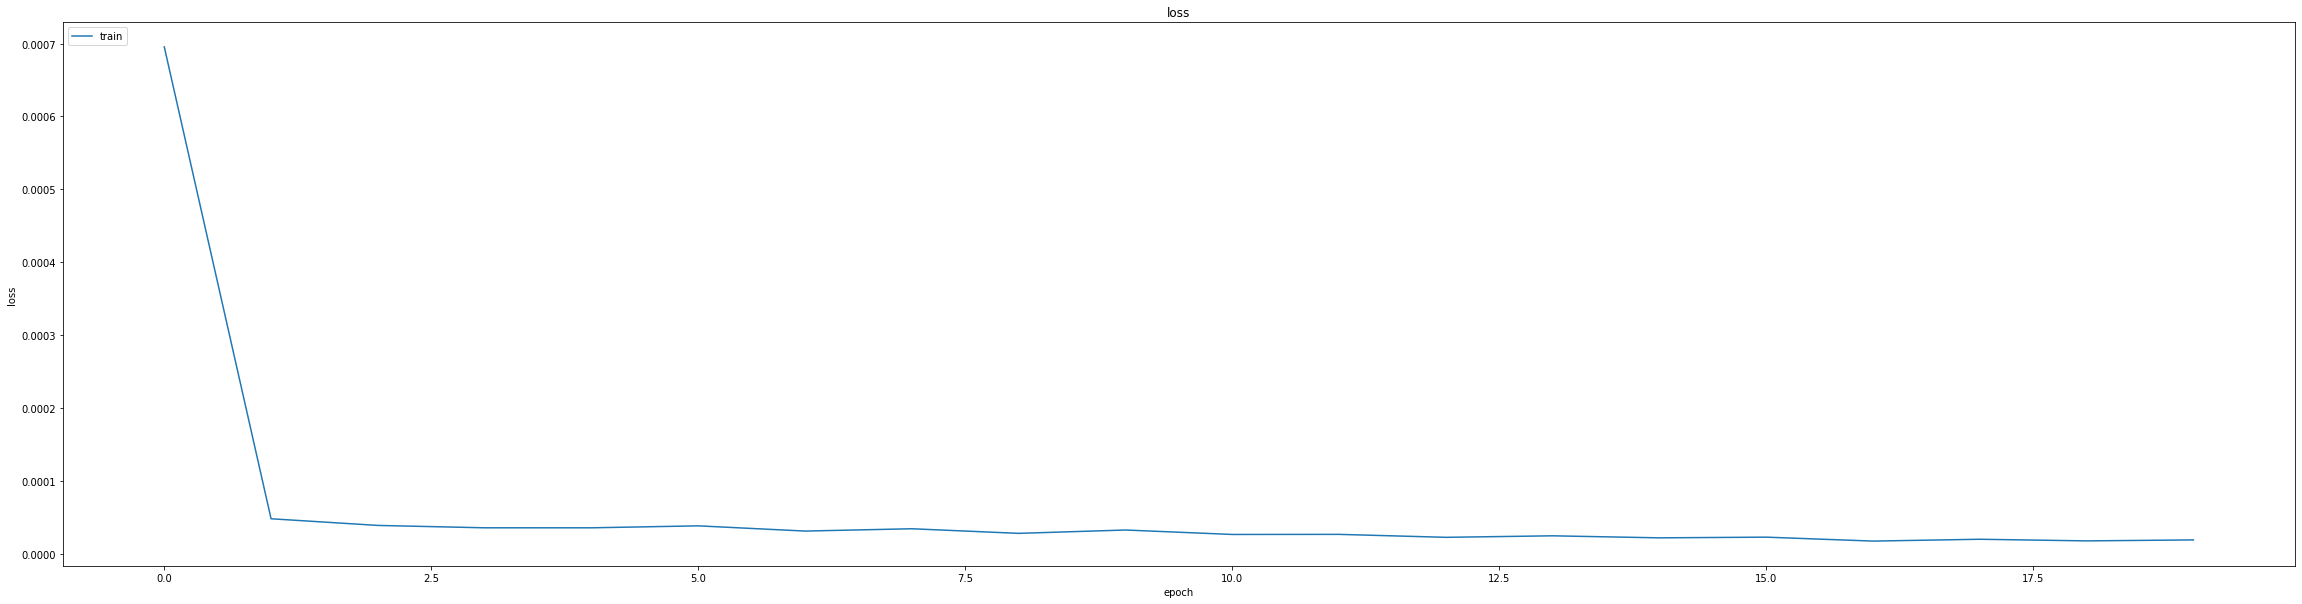

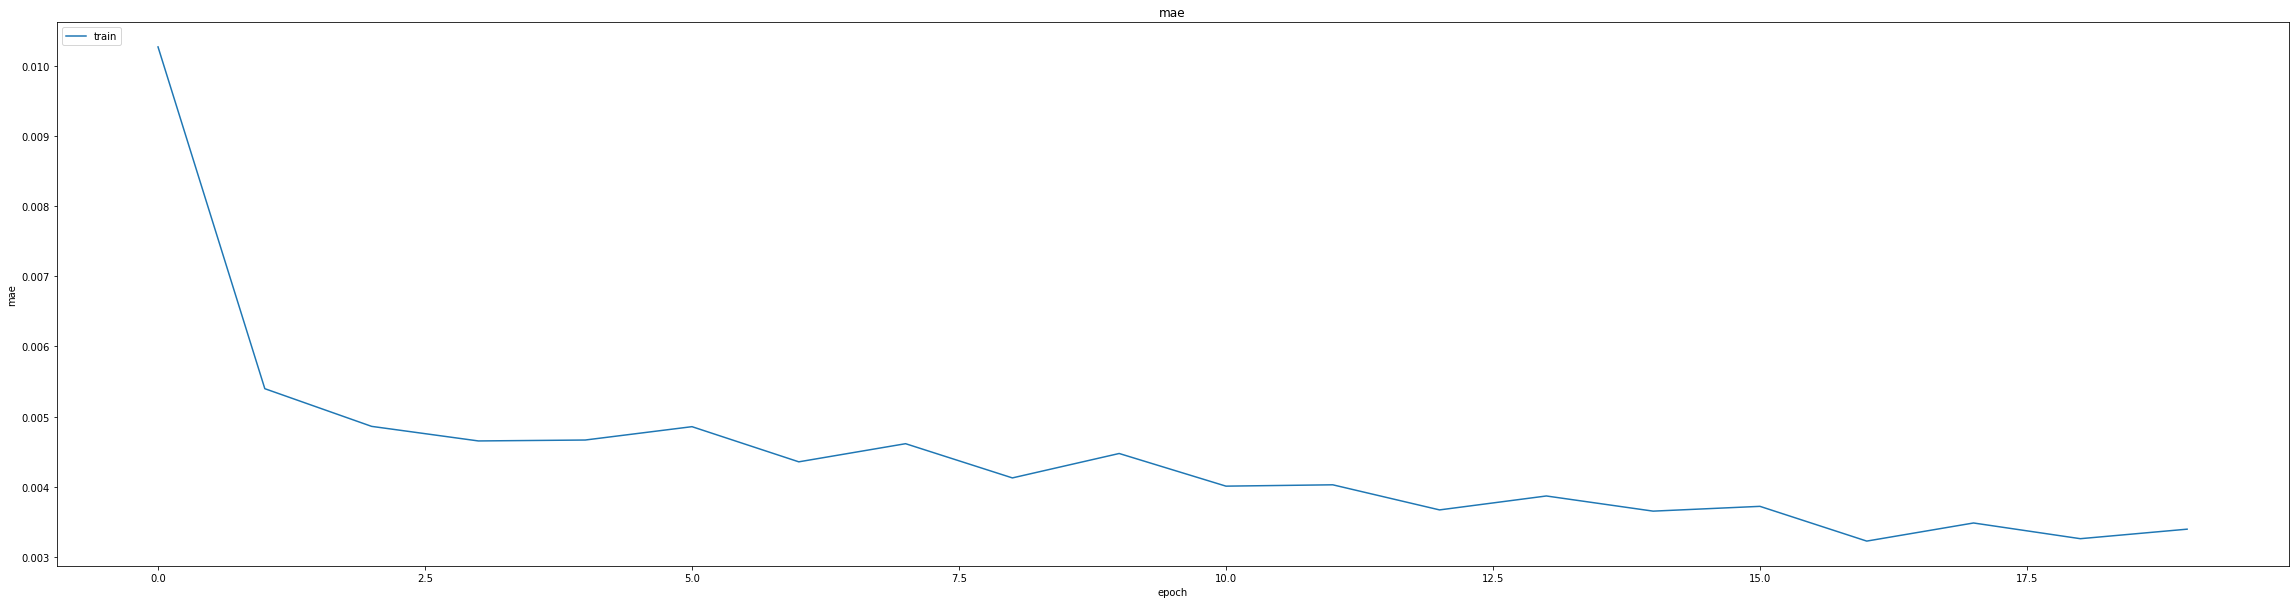

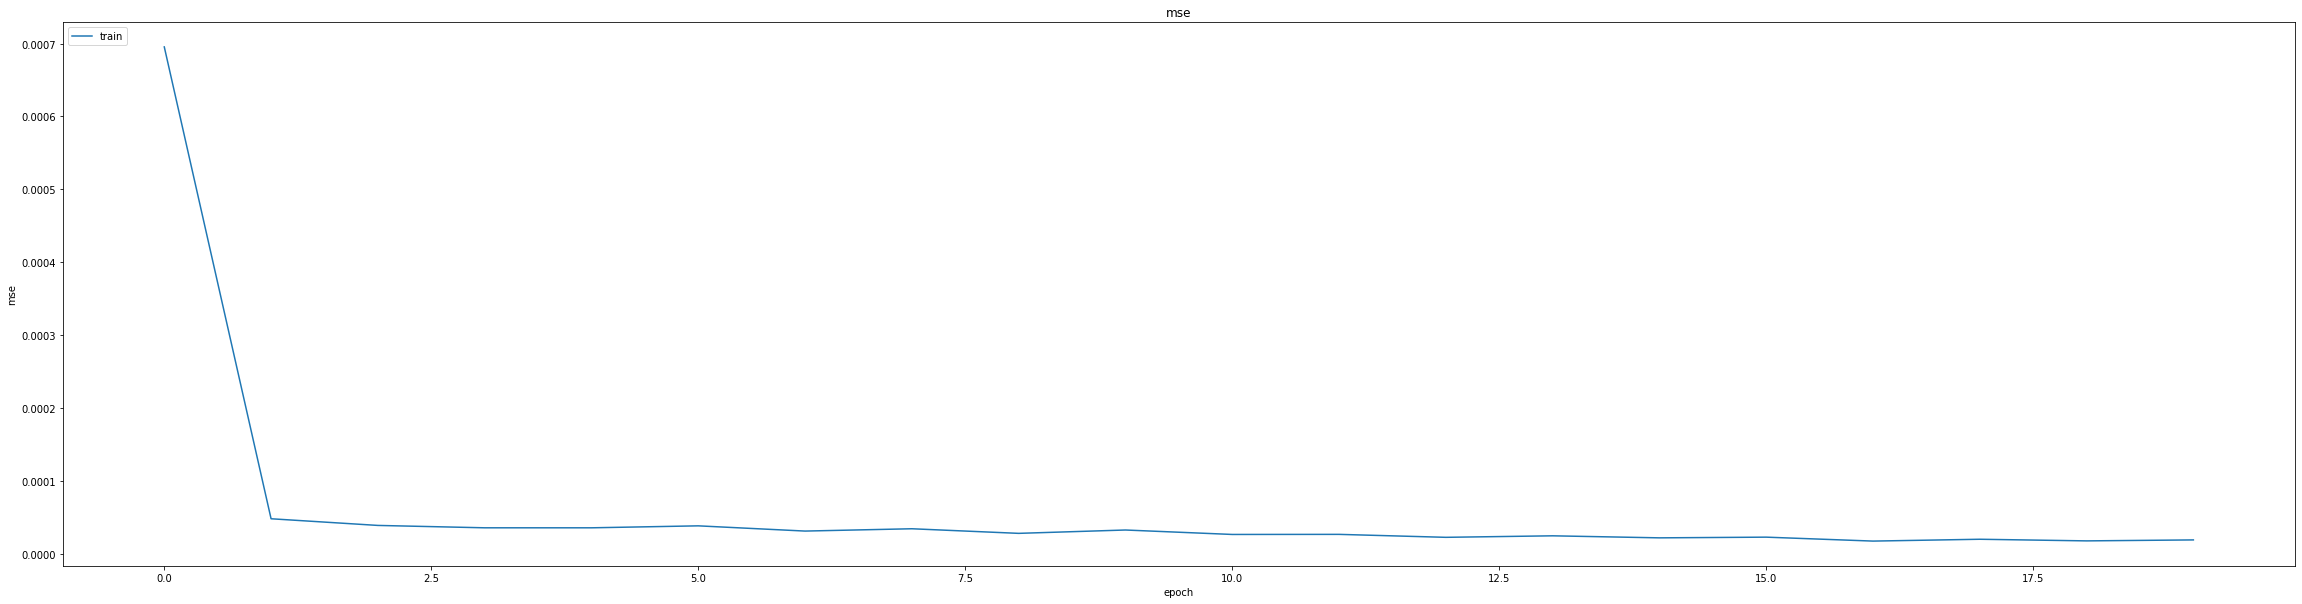

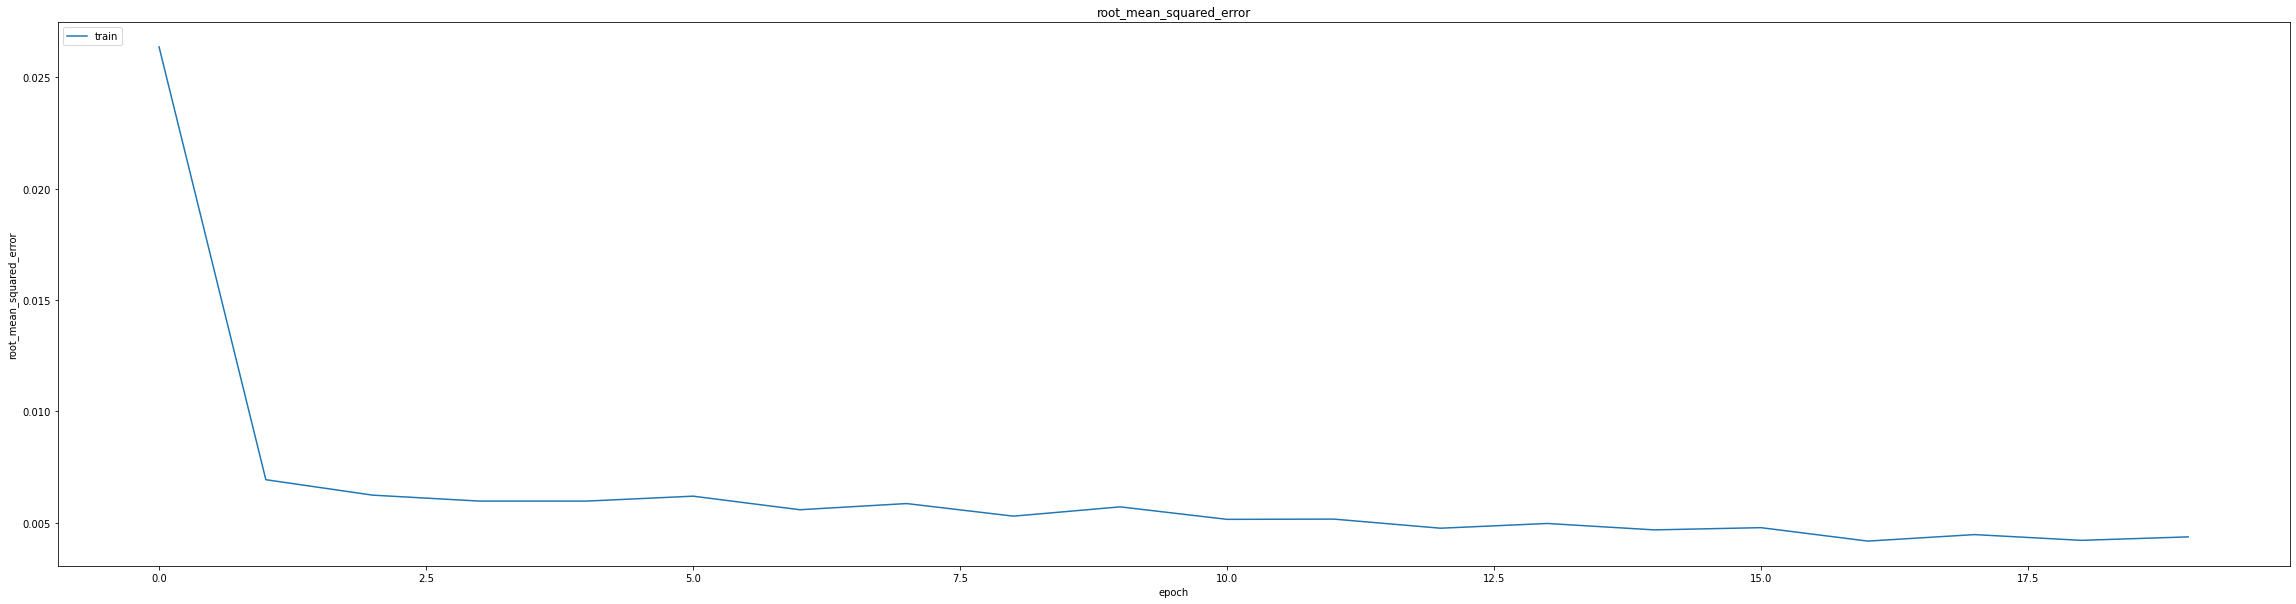

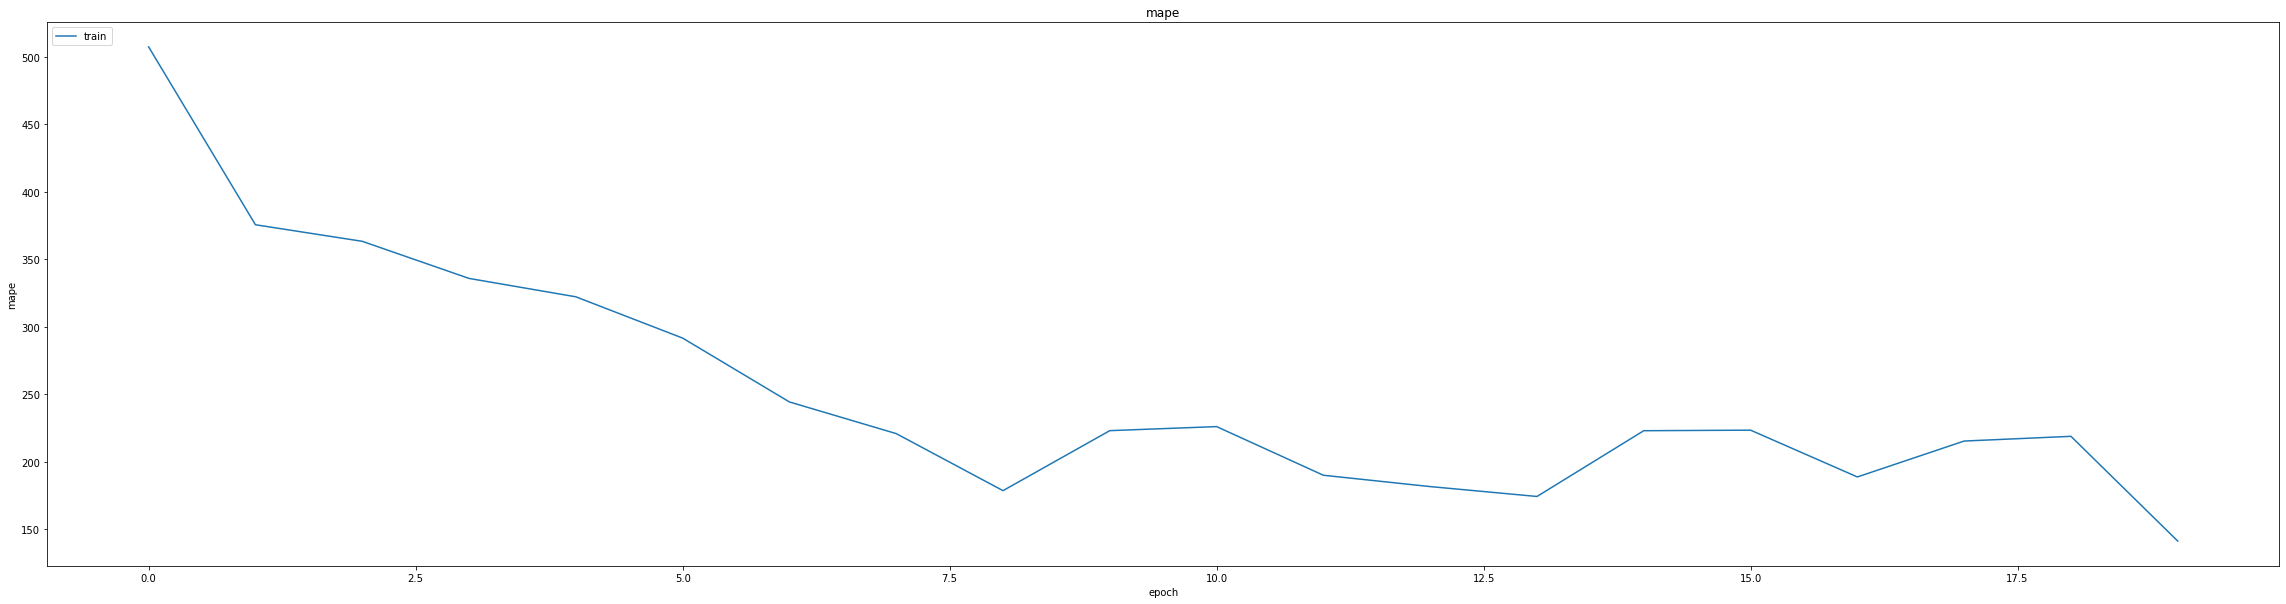

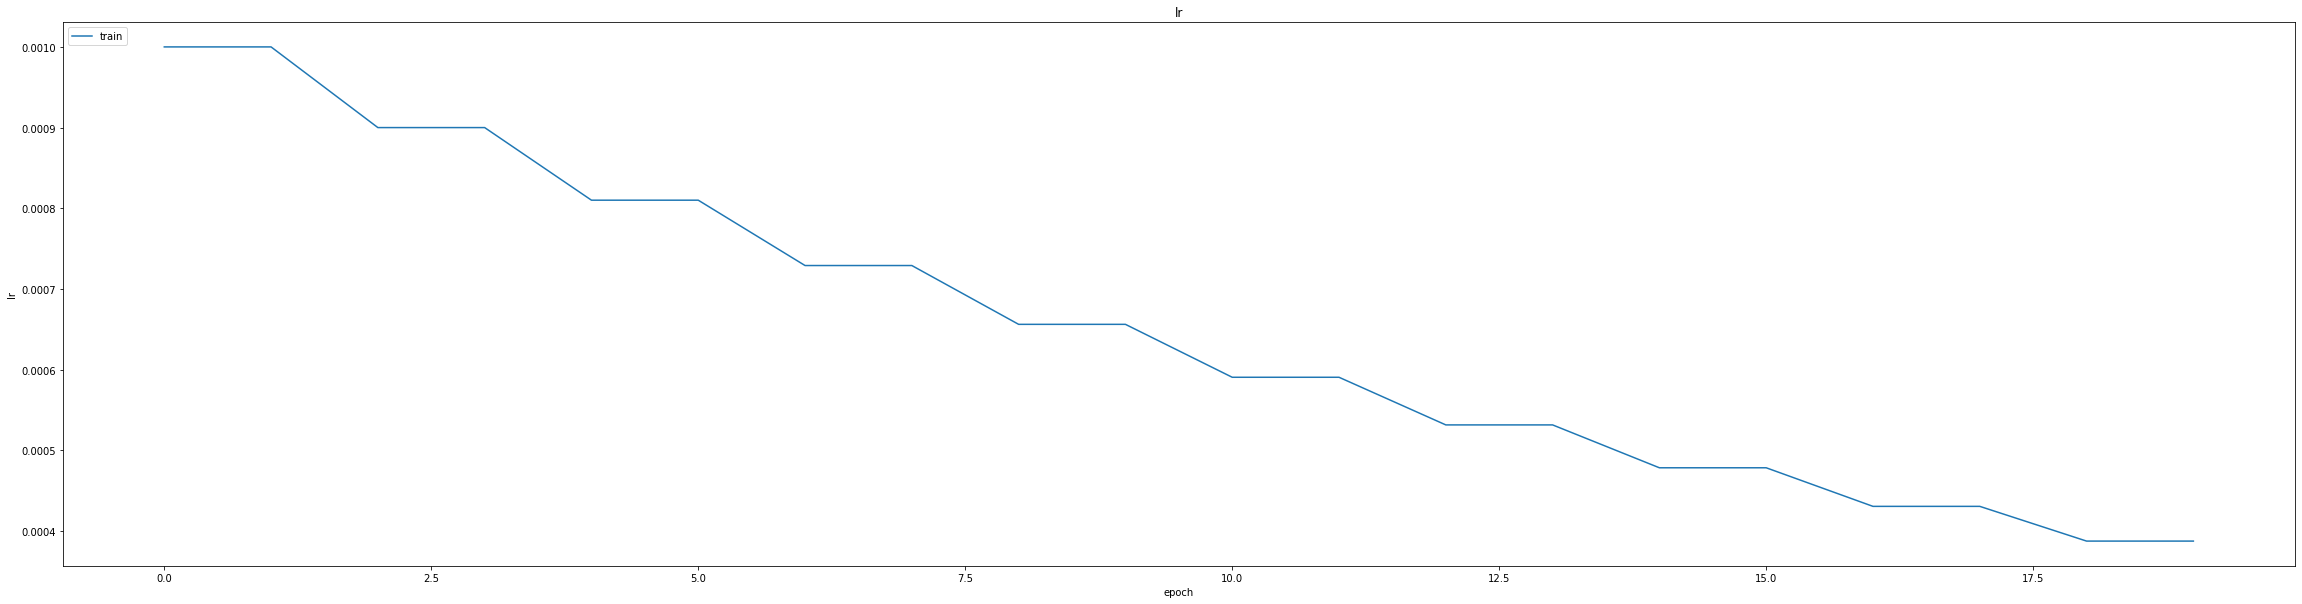

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008278426714241505
0.011475451290607452
1044/1044 [==============================] - 4s 3ms/step
0.9965928086977476


1044/1044 [==============================] - 3s 3ms/step


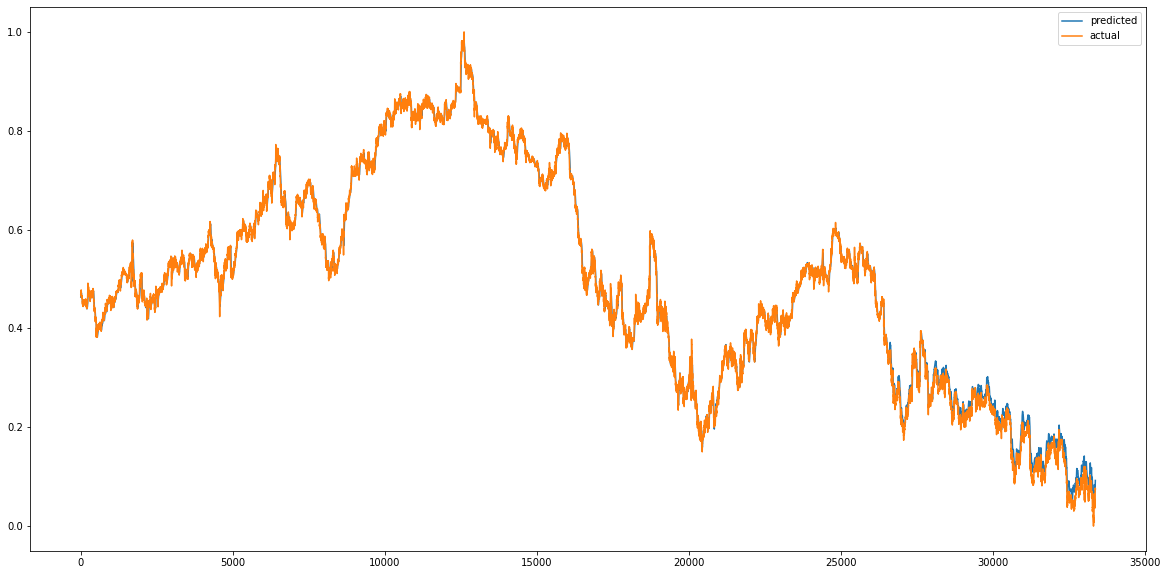

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUd_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


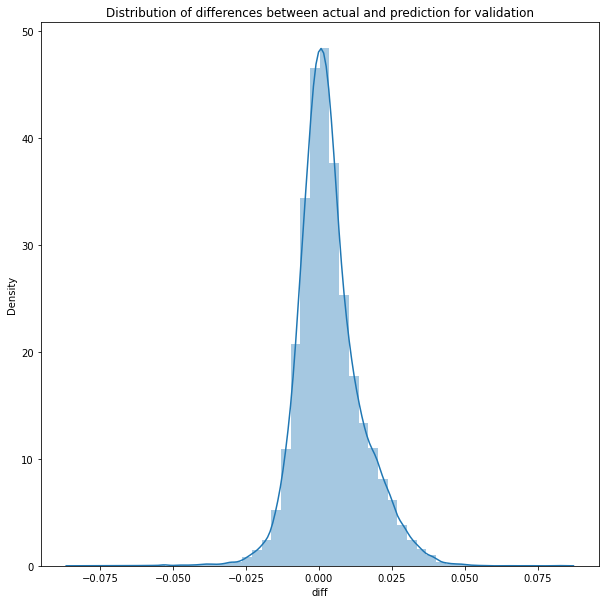

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 3s 3ms/step


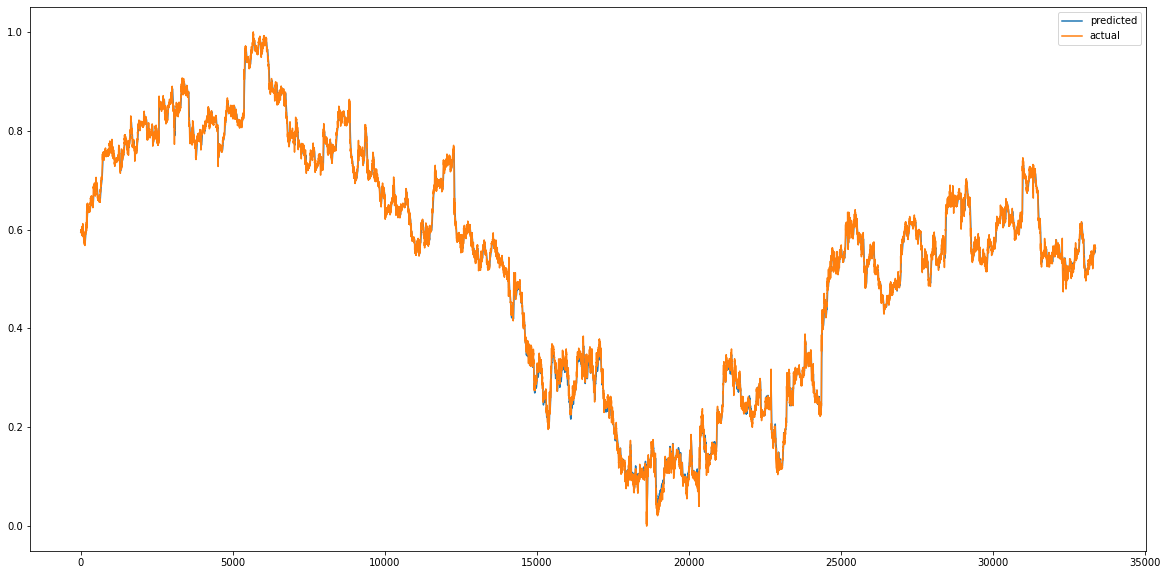

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


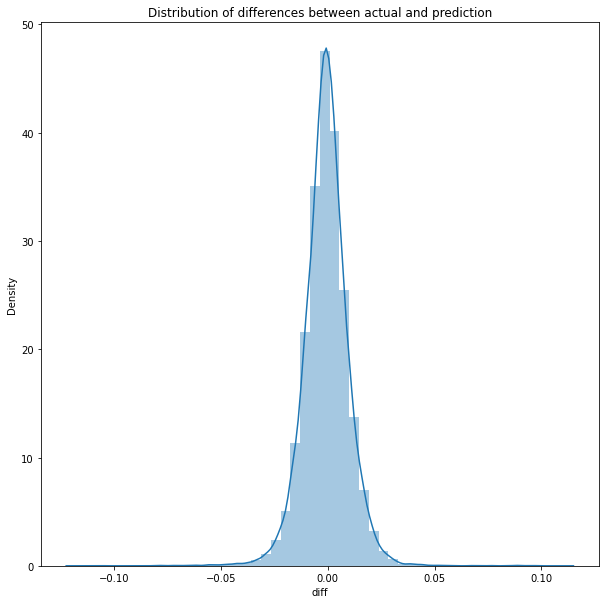

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00011167640573395531
RMSE :  0.010567705793309885
MAE :  0.007685327092010675
1044/1044 [==============================] - 3s 3ms/step
R2_Score  : 0.9979919525361095


count    33379.000000
mean        -0.000737
std          0.010542
min         -0.118417
25%         -0.006490
50%         -0.000681
75%          0.005150
max          0.111081
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
401/405 [============================>.] - ETA: 0s - loss: 201.1544 - mae: 1.8064 - mse: 201.1544 - root_mean_squared_error: 14.1829 - mape: 1421.5081
Epoch 1: val_mse improved from inf to 0.00184, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 16s 33ms/step - loss: 199.2533 - mae: 1.7897 - mse: 199.2533 - root_mean_squared_error: 14.1157 - mape: 1408.1362 - val_loss: 0.0018 - val_mae: 0.0307 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 5872.3164
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 967.1060
Epoch 2: val_mse improved from 0.00184 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 960.3827 - val_loss: 7.3333e-04 - val_mae: 0.0213 - val_mse: 7.3333e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 4154.9482
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 4.8960e-04 - mae: 0.0172 - mse: 4.8960e-04 - root_mean_squared_error: 0.0221 - mape: 971.9272
Epoch 3: val_mse improved from 0.00073 to 0.00064, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 4.8936e-04 - mae: 0.0172 - mse: 4.8936e-04 - root_mean_squared_error: 0.0221 - mape: 969.9501 - val_loss: 6.3656e-04 - val_mae: 0.0187 - val_mse: 6.3656e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 4105.2163
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 3.6945e-04 - mae: 0.0149 - mse: 3.6945e-04 - root_mean_squared_error: 0.0192 - mape: 943.9595
Epoch 4: val_mse improved from 0.00064 to 0.00055, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 3.6910e-04 - mae: 0.0149 - mse: 3.6910e-04 - root_mean_squared_error: 0.0192 - mape: 937.3876 - val_loss: 5.4719e-04 - val_mae: 0.0163 - val_mse: 5.4719e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 4035.5320
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 3.0410e-04 - mae: 0.0135 - mse: 3.0410e-04 - root_mean_squared_error: 0.0174 - mape: 1017.9548
Epoch 5: val_mse improved from 0.00055 to 0.00051, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 3.0410e-04 - mae: 0.0135 - mse: 3.0410e-04 - root_mean_squared_error: 0.0174 - mape: 1017.9548 - val_loss: 5.0971e-04 - val_mae: 0.0164 - val_mse: 5.0971e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 3789.2439
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 2.5382e-04 - mae: 0.0124 - mse: 2.5382e-04 - root_mean_squared_error: 0.0159 - mape: 801.4158
Epoch 6: val_mse improved from 0.00051 to 0.00040, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 2.5353e-04 - mae: 0.0124 - mse: 2.5353e-04 - root_mean_squared_error: 0.0159 - mape: 795.8370 - val_loss: 3.9598e-04 - val_mae: 0.0149 - val_mse: 3.9598e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3405.9197
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 2.0874e-04 - mae: 0.0113 - mse: 2.0874e-04 - root_mean_squared_error: 0.0144 - mape: 742.8342
Epoch 7: val_mse did not improve from 0.00040
405/405 [==============================] - 6s 14ms/step - loss: 2.0865e-04 - mae: 0.0113 - mse: 2.0865e-04 - root_mean_squared_error: 0.0144 - mape: 739.4920 - val_loss: 5.7497e-04 - val_mae: 0.0174 - val_mse: 5.7497e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 3002.3040
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 1.7878e-04 - mae: 0.0105 - mse: 1.7878e-04 - root_mean_squared_error: 0.0134 - mape: 676.1810
Epoch 8: val_mse did not improve from 0.00040
405/405 [========

405/405 [==============================] - 13s 32ms/step - loss: 5.4703e-05 - mae: 0.0057 - mse: 5.4703e-05 - root_mean_squared_error: 0.0074 - mape: 579.6906 - val_loss: 3.3439e-04 - val_mae: 0.0143 - val_mse: 3.3439e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 2503.0869
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 5.1420e-05 - mae: 0.0056 - mse: 5.1420e-05 - root_mean_squared_error: 0.0072 - mape: 601.3698
Epoch 23: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.1429e-05 - mae: 0.0056 - mse: 5.1429e-05 - root_mean_squared_error: 0.0072 - mape: 598.6616 - val_loss: 3.1347e-04 - val_mae: 0.0144 - val_mse: 3.1347e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 2492.3506
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 4.9450e-05 - mae: 0.0055 - mse: 4.9450e-05 - root_mean_squared_error: 0.0070 - mape: 584.4716
Epoch 24: val_mse improved from 0.00031 to 0.00025, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 4.9411e-05 - mae: 0.0055 - mse: 4.9411e-05 - root_mean_squared_error: 0.0070 - mape: 580.4003 - val_loss: 2.4906e-04 - val_mae: 0.0122 - val_mse: 2.4906e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2468.9048
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 4.5951e-05 - mae: 0.0053 - mse: 4.5951e-05 - root_mean_squared_error: 0.0068 - mape: 592.2333
Epoch 25: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 14ms/step - loss: 4.5943e-05 - mae: 0.0053 - mse: 4.5943e-05 - root_mean_squared_error: 0.0068 - mape: 591.0267 - val_loss: 2.5727e-04 - val_mae: 0.0130 - val_mse: 2.5727e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 2458.8237
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 4.3583e-05 - mae: 0.0051 - mse: 4.3583e-05 - root_mean_squared_error: 0.0066 - mape: 568.9005
Epoch 26: val_mse improved from 0.00025 to 0.00025, saving m

405/405 [==============================] - 12s 30ms/step - loss: 4.3558e-05 - mae: 0.0051 - mse: 4.3558e-05 - root_mean_squared_error: 0.0066 - mape: 566.3384 - val_loss: 2.4708e-04 - val_mae: 0.0124 - val_mse: 2.4708e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2441.8770
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 4.2297e-05 - mae: 0.0050 - mse: 4.2297e-05 - root_mean_squared_error: 0.0065 - mape: 560.0088
Epoch 27: val_mse improved from 0.00025 to 0.00022, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 4.2288e-05 - mae: 0.0050 - mse: 4.2288e-05 - root_mean_squared_error: 0.0065 - mape: 558.8679 - val_loss: 2.1645e-04 - val_mae: 0.0116 - val_mse: 2.1645e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2435.5356
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 3.7933e-05 - mae: 0.0047 - mse: 3.7933e-05 - root_mean_squared_error: 0.0062 - mape: 554.6623
Epoch 28: val_mse improved from 0.00022 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.7933e-05 - mae: 0.0047 - mse: 3.7933e-05 - root_mean_squared_error: 0.0062 - mape: 554.6623 - val_loss: 1.9049e-04 - val_mae: 0.0105 - val_mse: 1.9049e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 2420.7058
Epoch 29/60
401/405 [============================>.] - ETA: 0s - loss: 3.7187e-05 - mae: 0.0047 - mse: 3.7187e-05 - root_mean_squared_error: 0.0061 - mape: 544.1860
Epoch 29: val_mse did not improve from 0.00019
405/405 [==============================] - 6s 14ms/step - loss: 3.7174e-05 - mae: 0.0047 - mse: 3.7174e-05 - root_mean_squared_error: 0.0061 - mape: 539.0527 - val_loss: 2.4559e-04 - val_mae: 0.0130 - val_mse: 2.4559e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2405.4475
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 3.5619e-05 - mae: 0.0046 - mse: 3.5619e-05 - root_mean_squared_error: 0.0060 - mape: 551.6499
Epoch 30: val_mse improved from 0.00019 to 0.00019, saving m

405/405 [==============================] - 12s 30ms/step - loss: 3.5640e-05 - mae: 0.0046 - mse: 3.5640e-05 - root_mean_squared_error: 0.0060 - mape: 549.1710 - val_loss: 1.8553e-04 - val_mae: 0.0107 - val_mse: 1.8553e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 2390.9192
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 3.5155e-05 - mae: 0.0046 - mse: 3.5155e-05 - root_mean_squared_error: 0.0059 - mape: 559.3437
Epoch 31: val_mse did not improve from 0.00019
405/405 [==============================] - 6s 14ms/step - loss: 3.5117e-05 - mae: 0.0046 - mse: 3.5117e-05 - root_mean_squared_error: 0.0059 - mape: 556.8240 - val_loss: 2.4560e-04 - val_mae: 0.0131 - val_mse: 2.4560e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2365.8145
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 3.2503e-05 - mae: 0.0044 - mse: 3.2503e-05 - root_mean_squared_error: 0.0057 - mape: 531.8660
Epoch 32: val_mse did not improve from 0.00019
405/405 [====

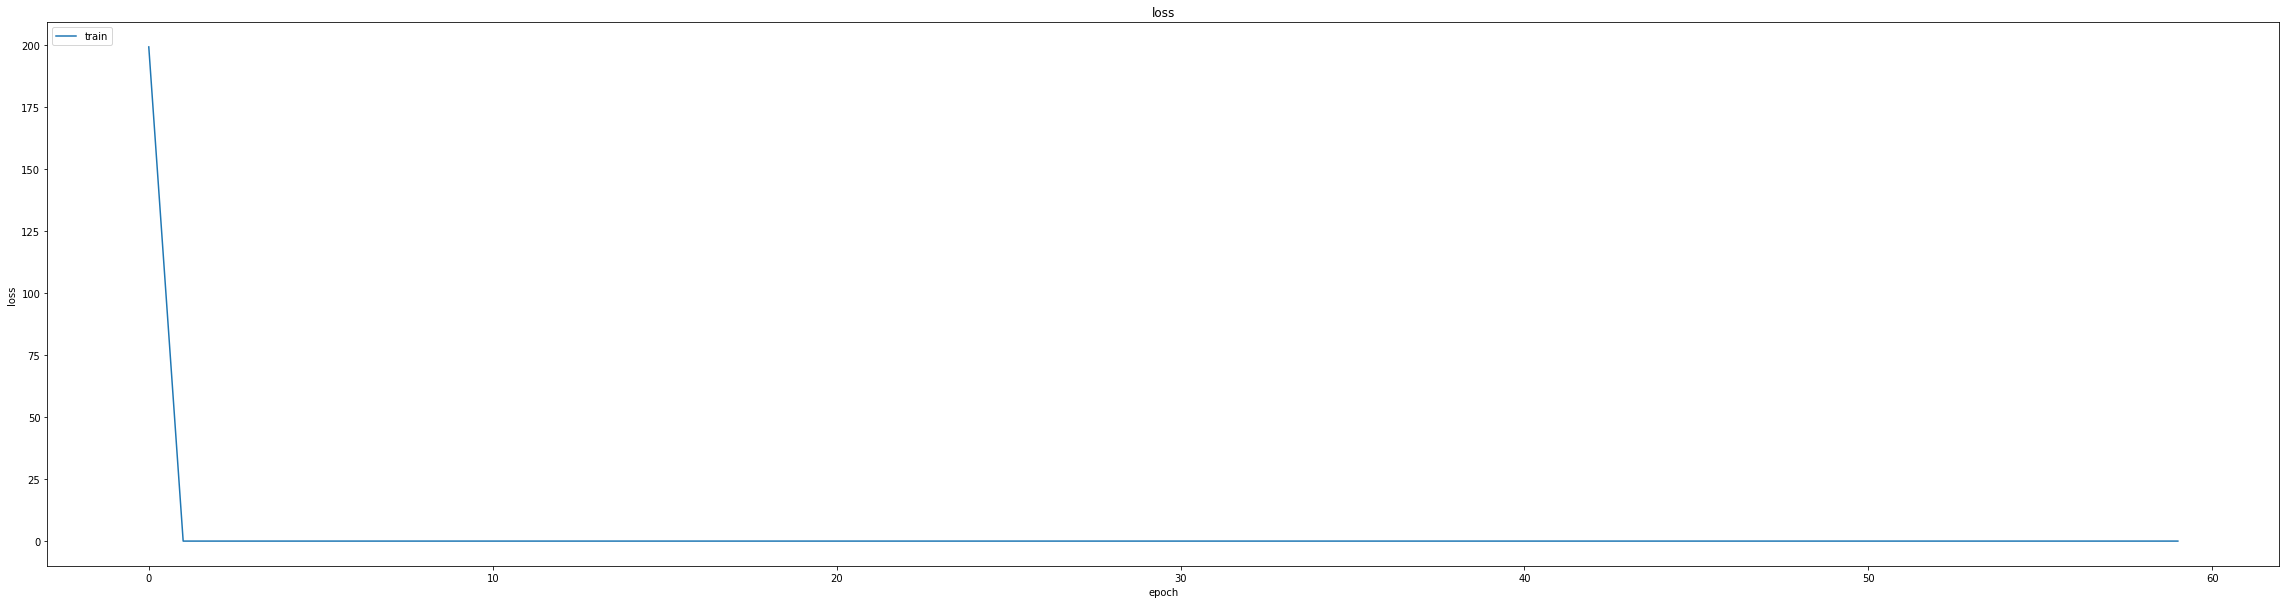

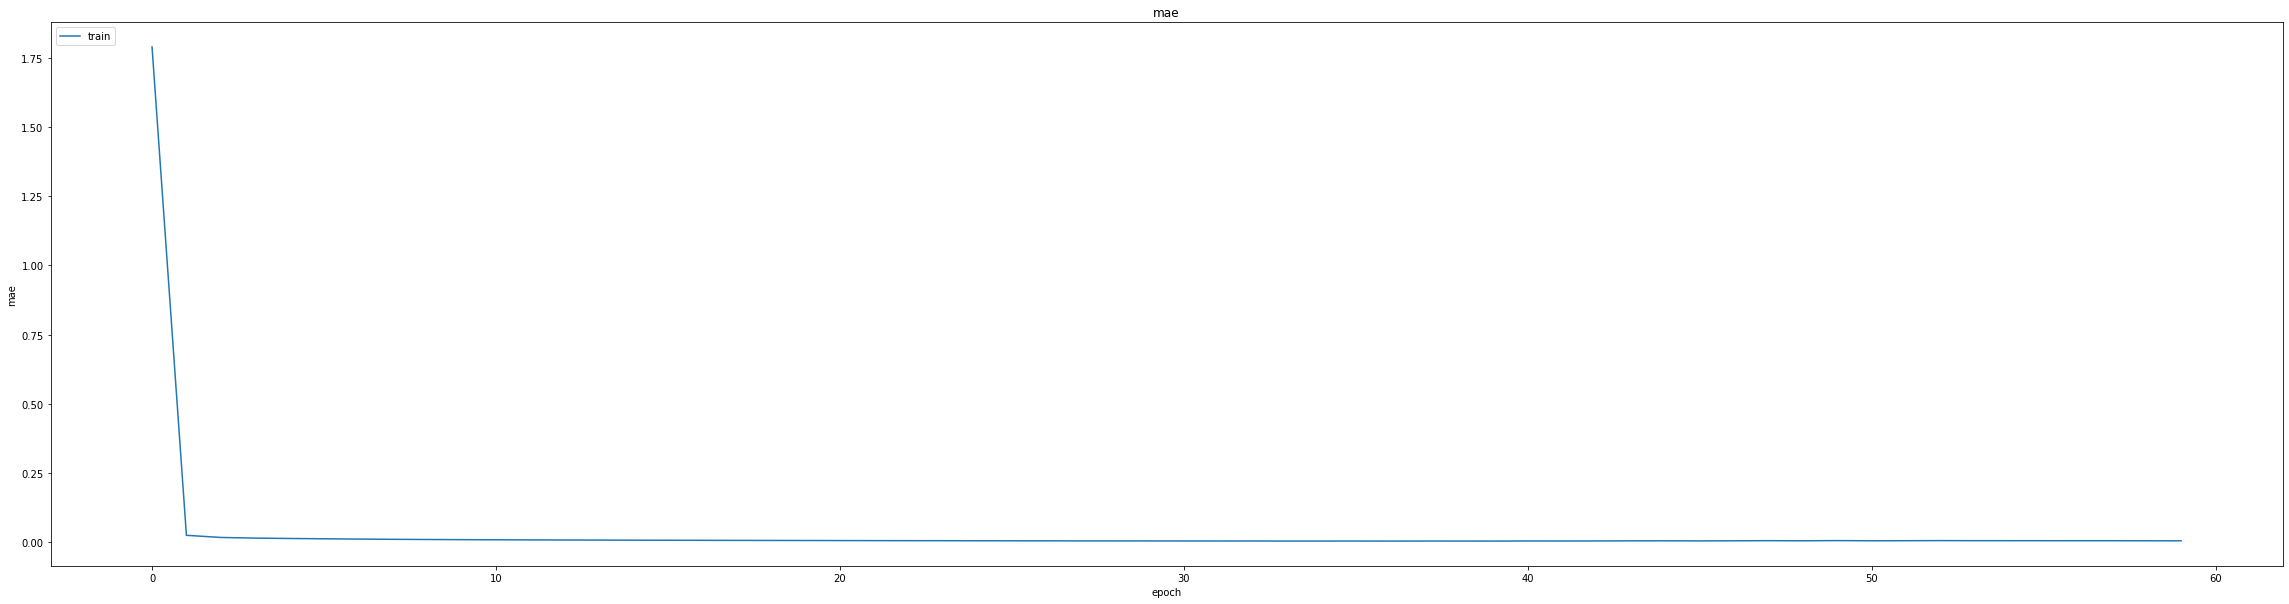

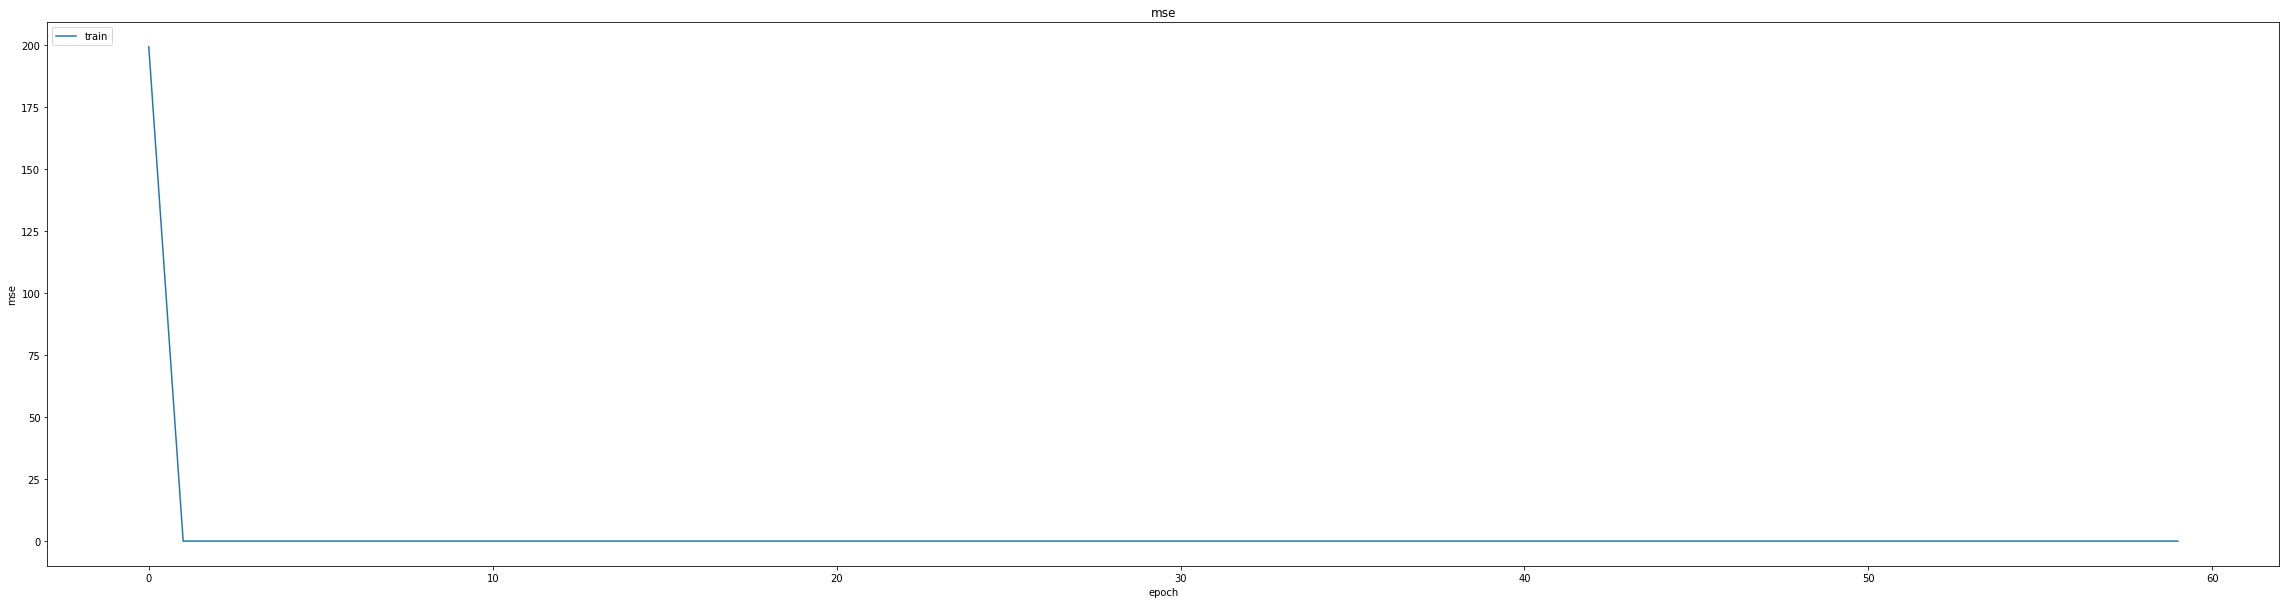

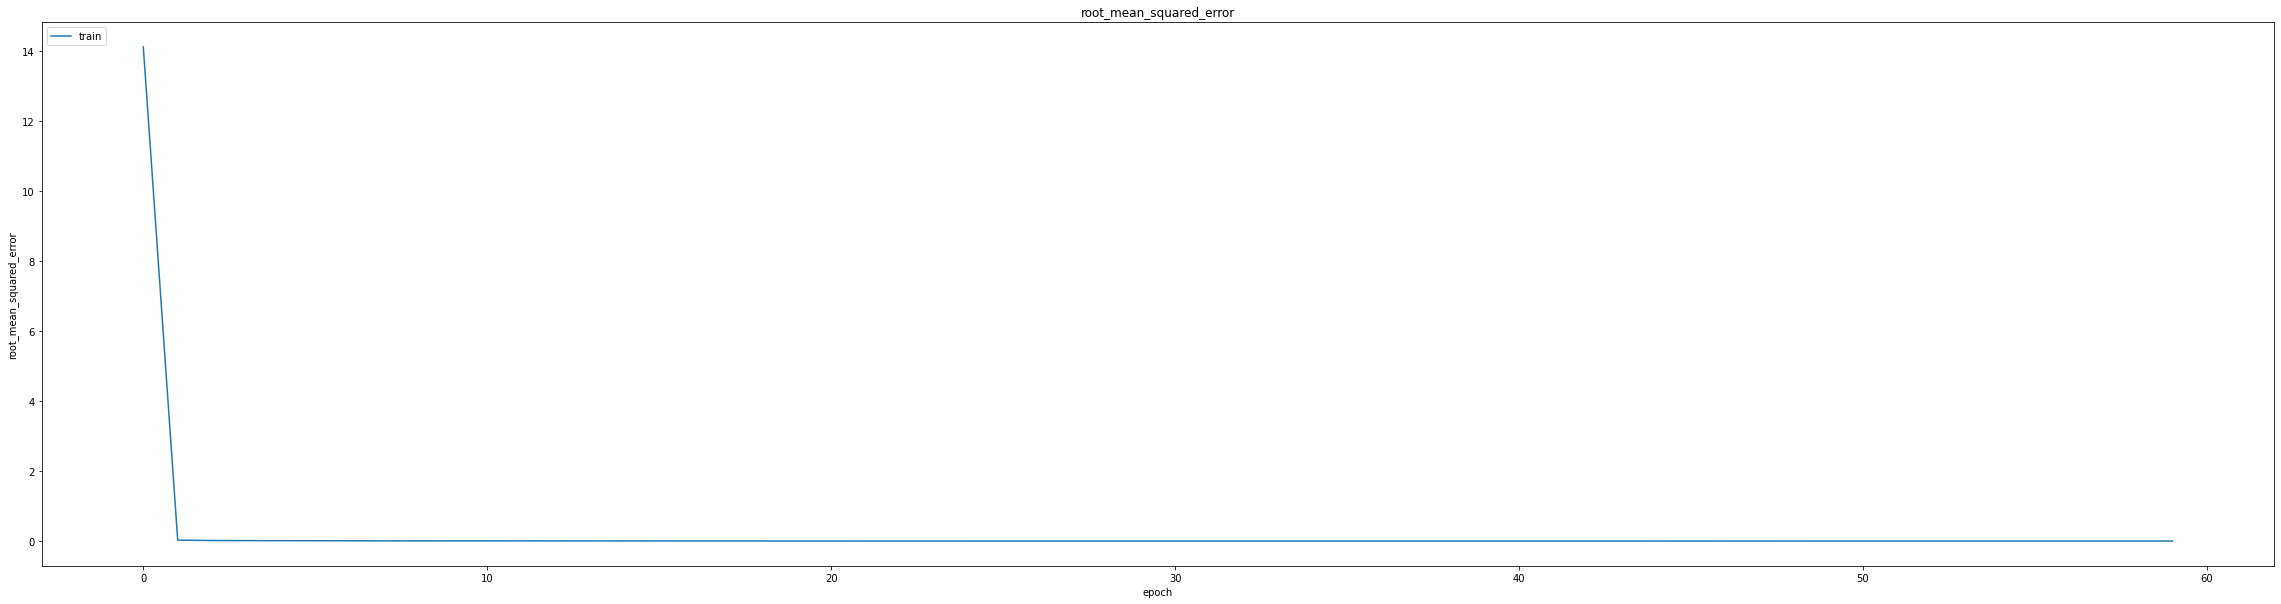

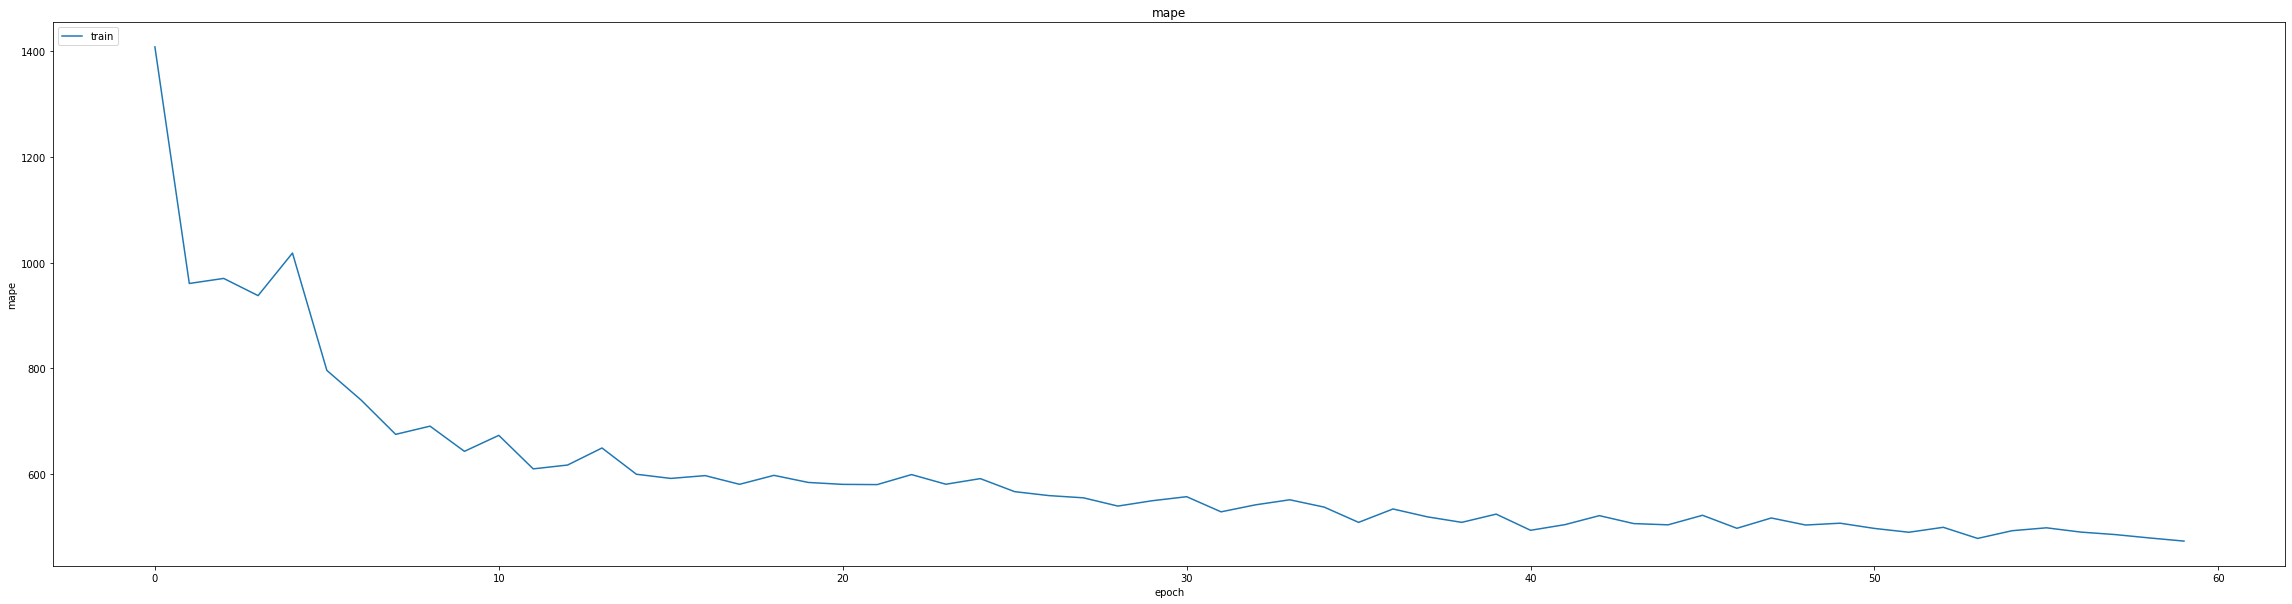

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01051541231572628
0.01362107414752245
1044/1044 [==============================] - 4s 3ms/step
0.9927703652313373


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0120 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 671.3290
Epoch 1: val_mse did not improve from 0.00019
405/405 [==============================] - 10s 16ms/step - loss: 0.0010 - mae: 0.0120 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 671.3290 - val_loss: 2.4313e-04 - val_mae: 0.0122 - val_mse: 2.4313e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2586.5442 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 3.8647e-05 - mae: 0.0048 - mse: 3.8647e-05 - root_mean_squared_error: 0.0062 - mape: 562.8561
Epoch 2: val_mse did not improve from 0.00019
405/405 [==============================] - 6s 14ms/step - loss: 3.8617e-05 - mae: 0.0048 - mse: 3.8617e-05 - root_mean_squared_error: 0.0062 - mape: 558.9327 - val_loss: 2.7165e-04 - val_mae: 0.0137 - val_mse: 2.7165e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2420.0125 - lr: 0.0010
lr chan

405/405 [==============================] - 12s 30ms/step - loss: 2.9564e-05 - mae: 0.0042 - mse: 2.9564e-05 - root_mean_squared_error: 0.0054 - mape: 509.4049 - val_loss: 1.8521e-04 - val_mae: 0.0109 - val_mse: 1.8521e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 2189.0874 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
403/405 [============================>.] - ETA: 0s - loss: 3.0326e-05 - mae: 0.0042 - mse: 3.0326e-05 - root_mean_squared_error: 0.0055 - mape: 527.4538
Epoch 5: val_mse improved from 0.00019 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 3.0389e-05 - mae: 0.0043 - mse: 3.0389e-05 - root_mean_squared_error: 0.0055 - mape: 525.0787 - val_loss: 1.3486e-04 - val_mae: 0.0089 - val_mse: 1.3486e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 2137.5962 - lr: 8.1000e-04
Epoch 6/20
403/405 [============================>.] - ETA: 0s - loss: 5.2054e-05 - mae: 0.0054 - mse: 5.2054e-05 - root_mean_squared_error: 0.0072 - mape: 533.9993
Epoch 6: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 14ms/step - loss: 5.1914e-05 - mae: 0.0054 - mse: 5.1914e-05 - root_mean_squared_error: 0.0072 - mape: 531.5936 - val_loss: 1.8774e-04 - val_mae: 0.0110 - val_mse: 1.8774e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2093.5417 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 3.1385e-05 - mae: 0.0044 - mse: 3.1385e-05 - root_mean_squared_error: 0.0056 - mape: 46

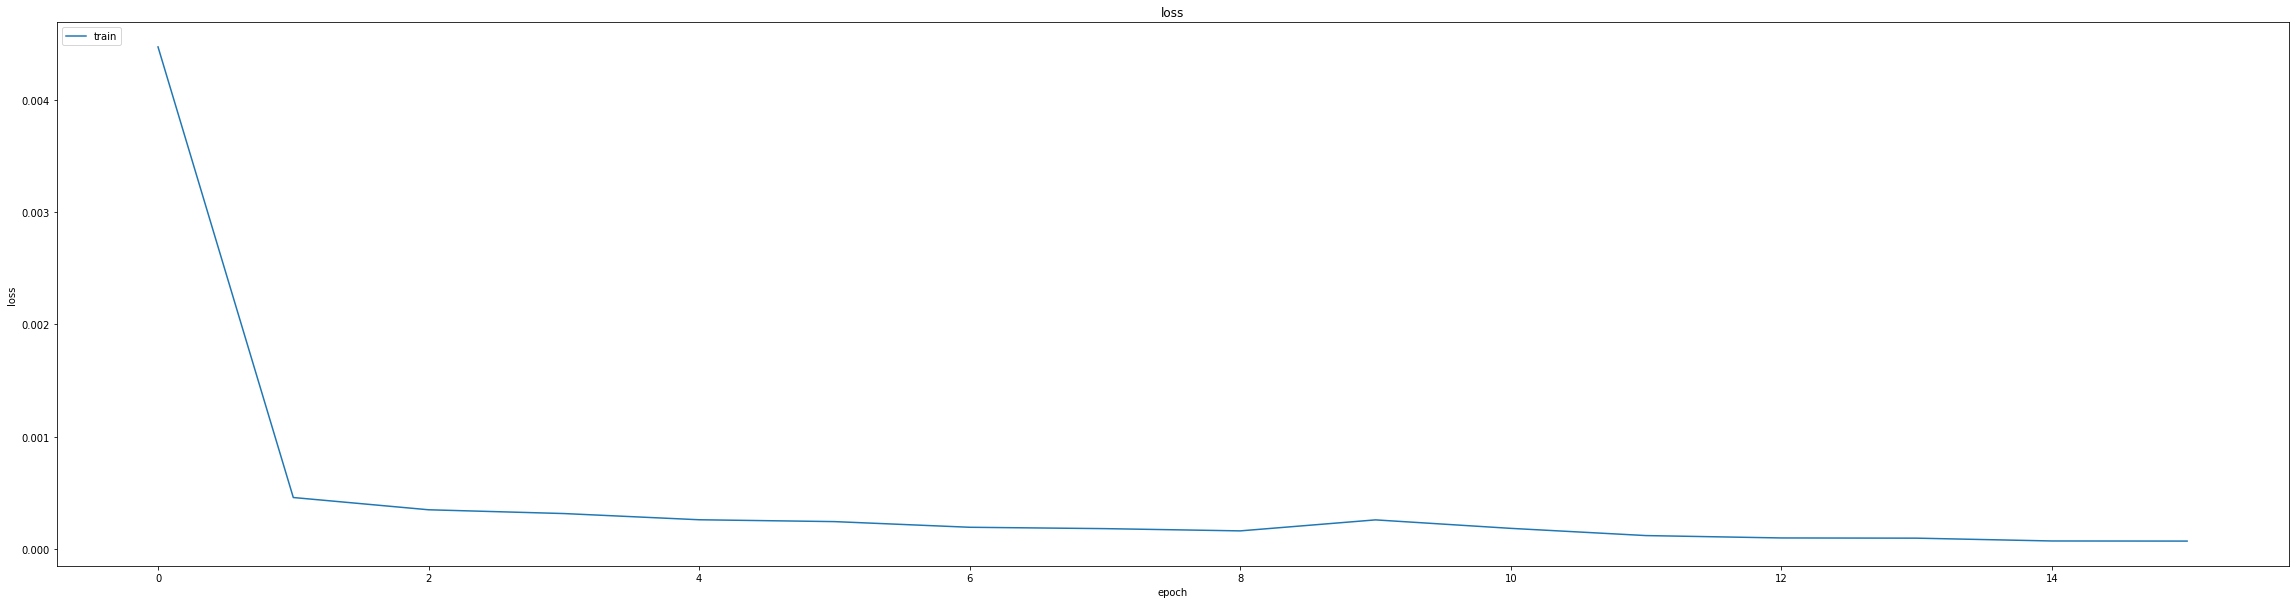

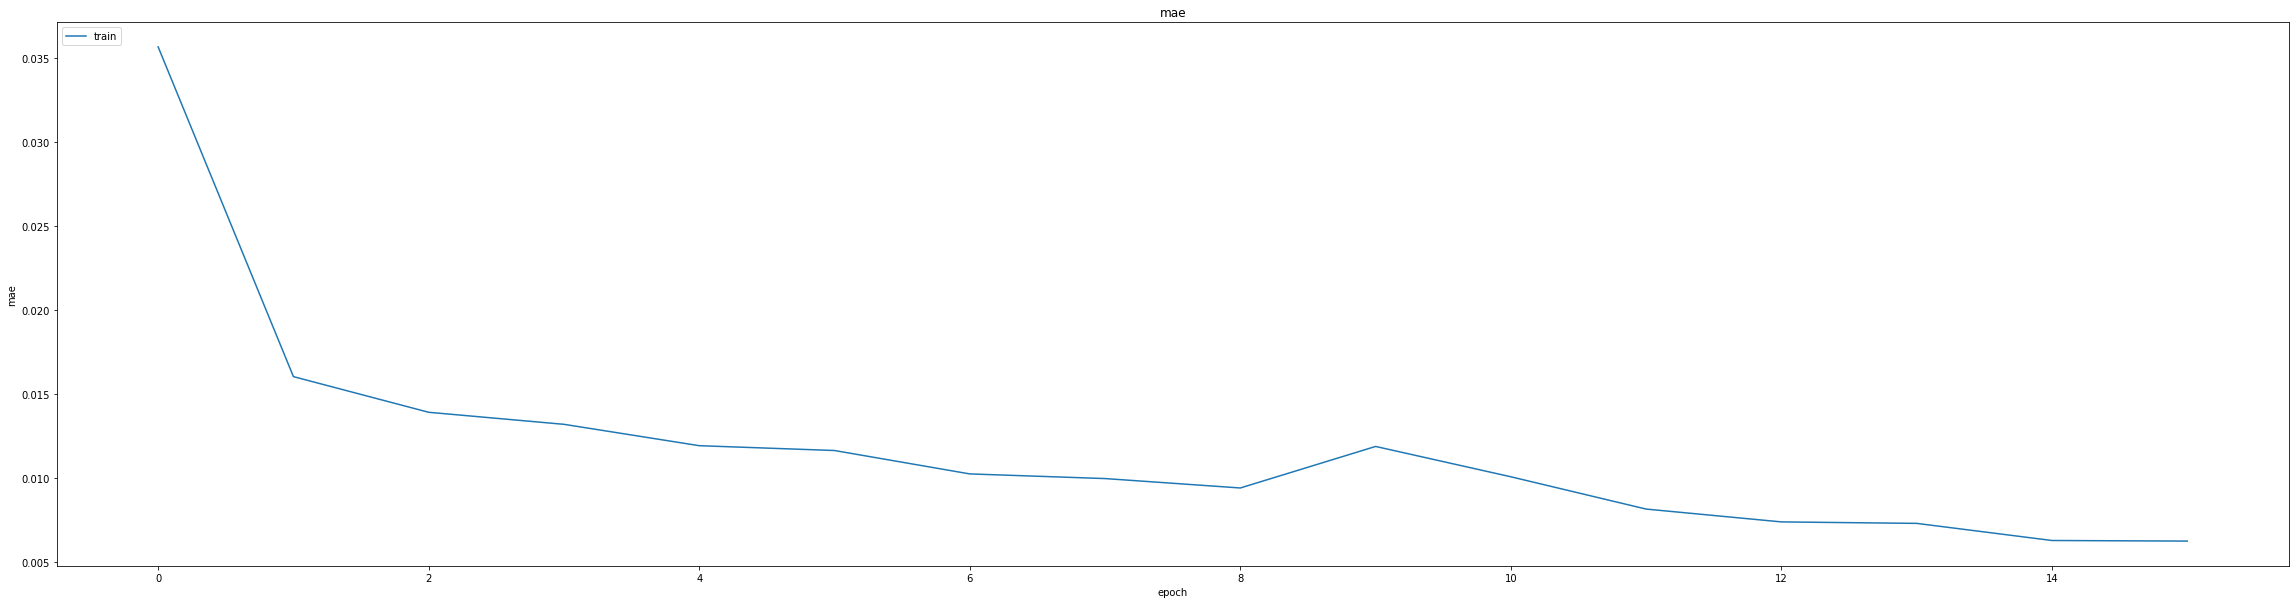

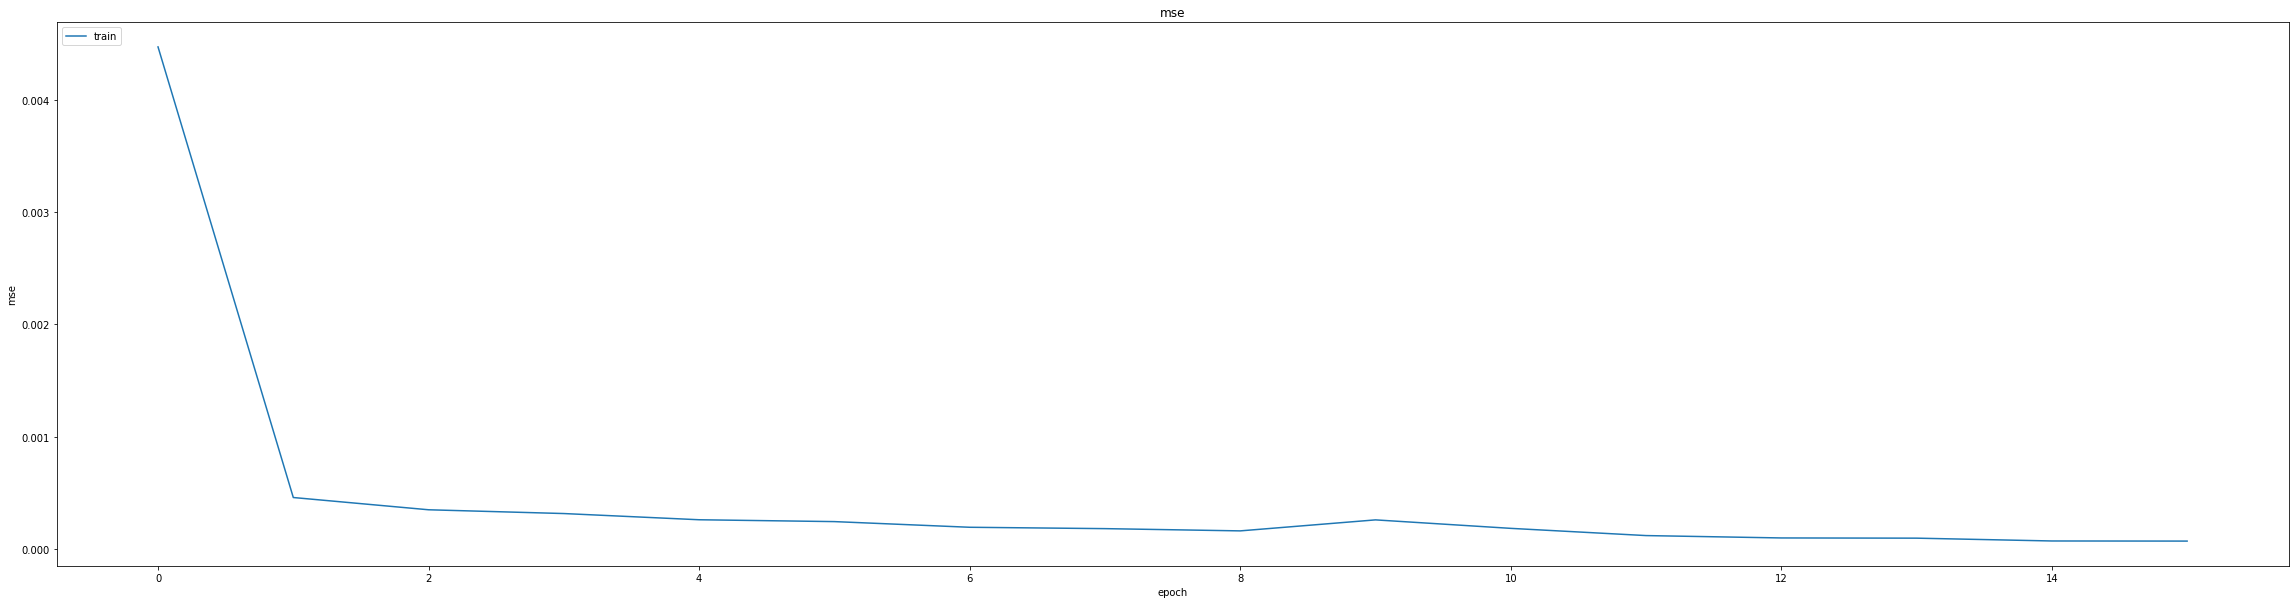

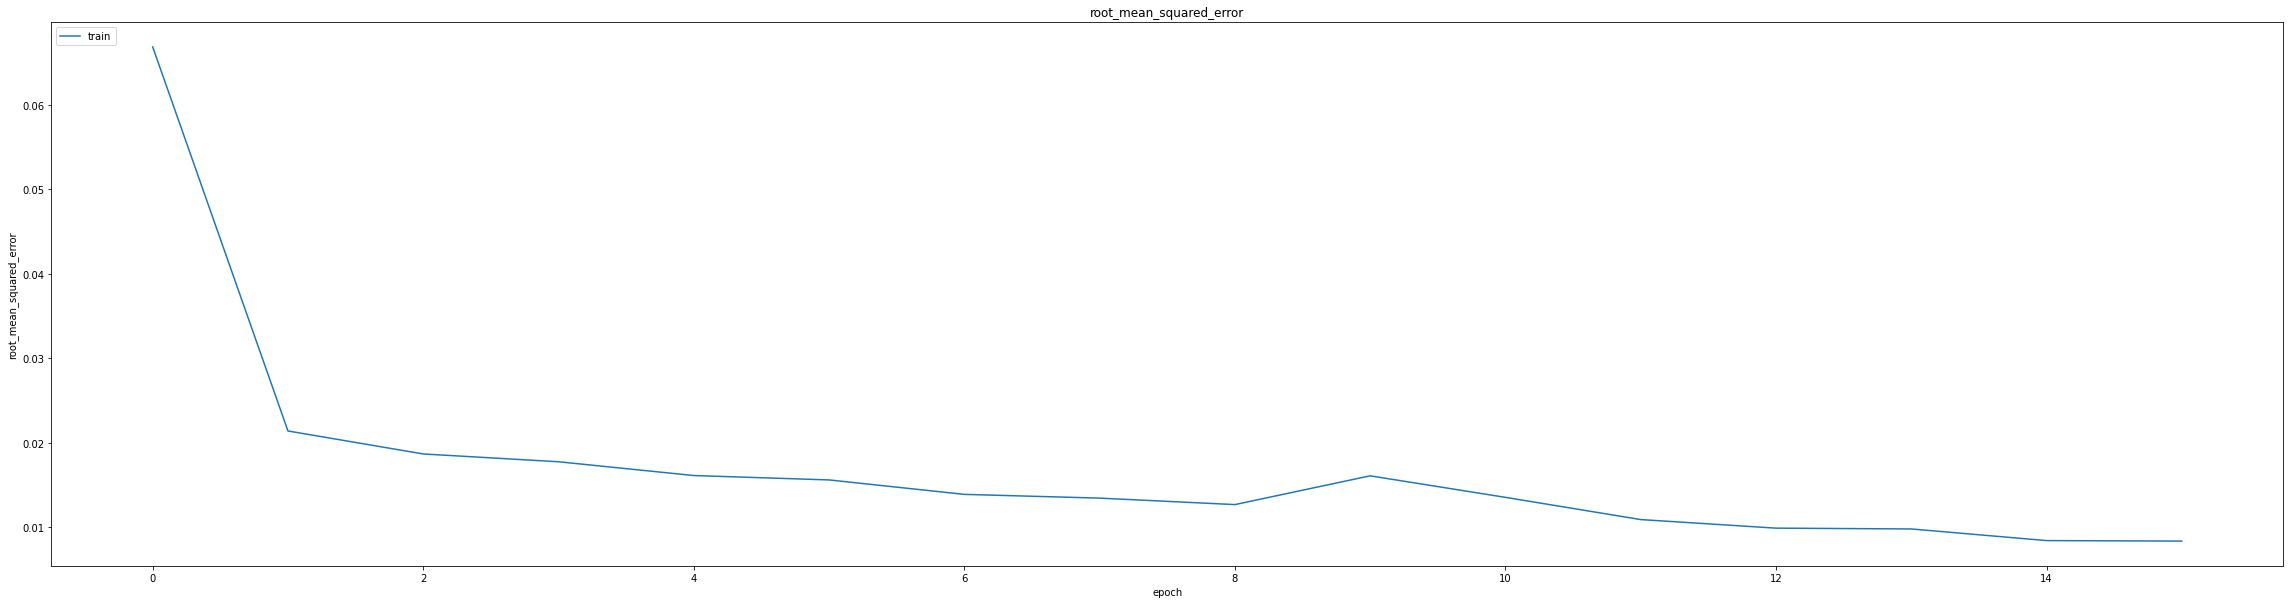

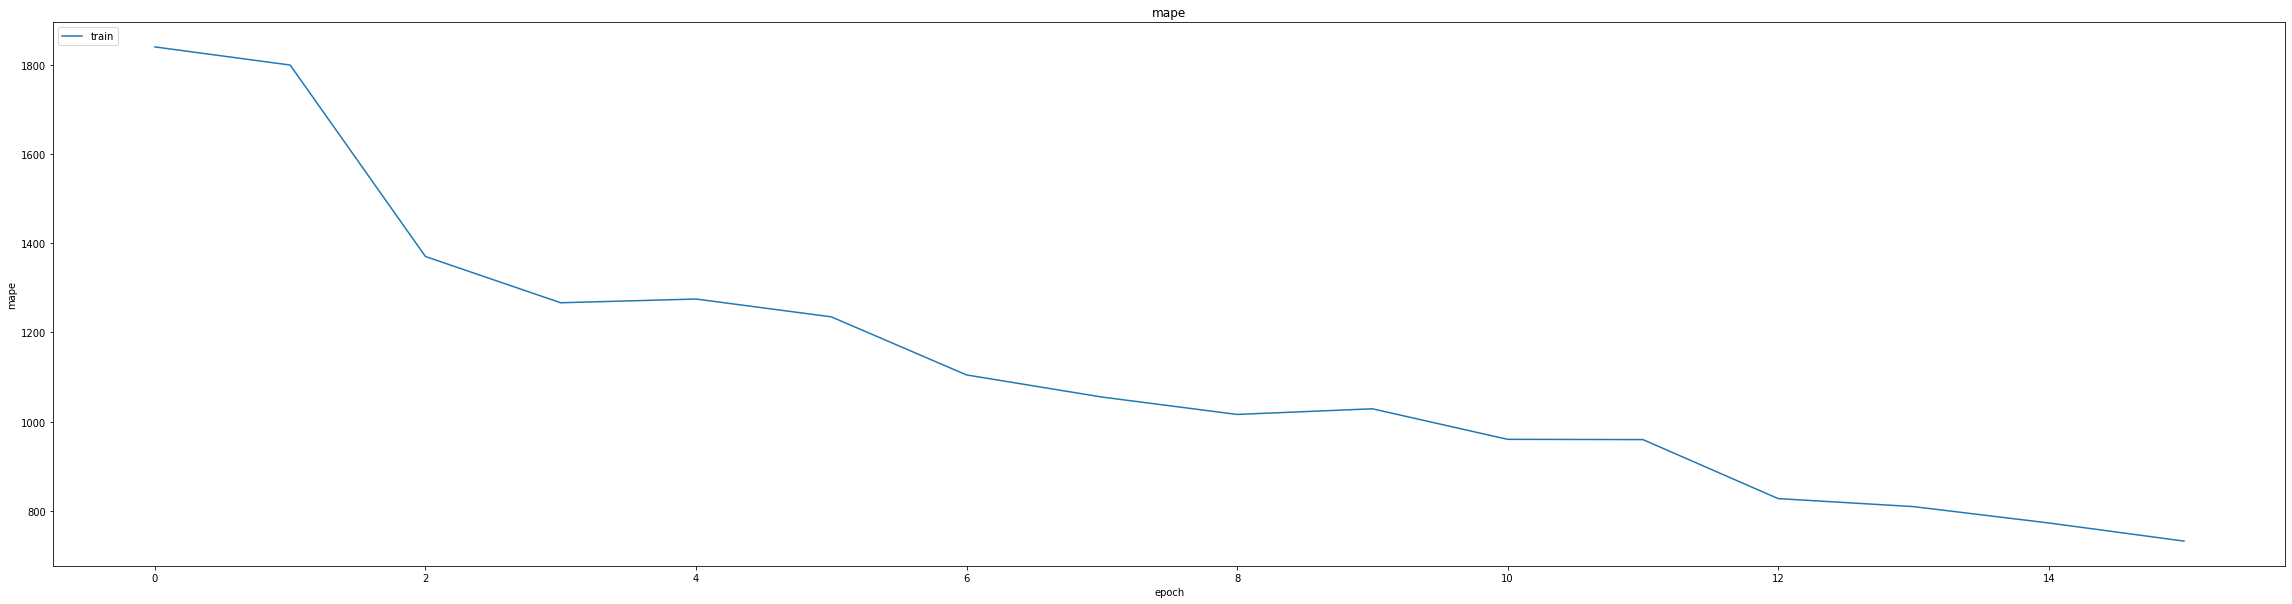

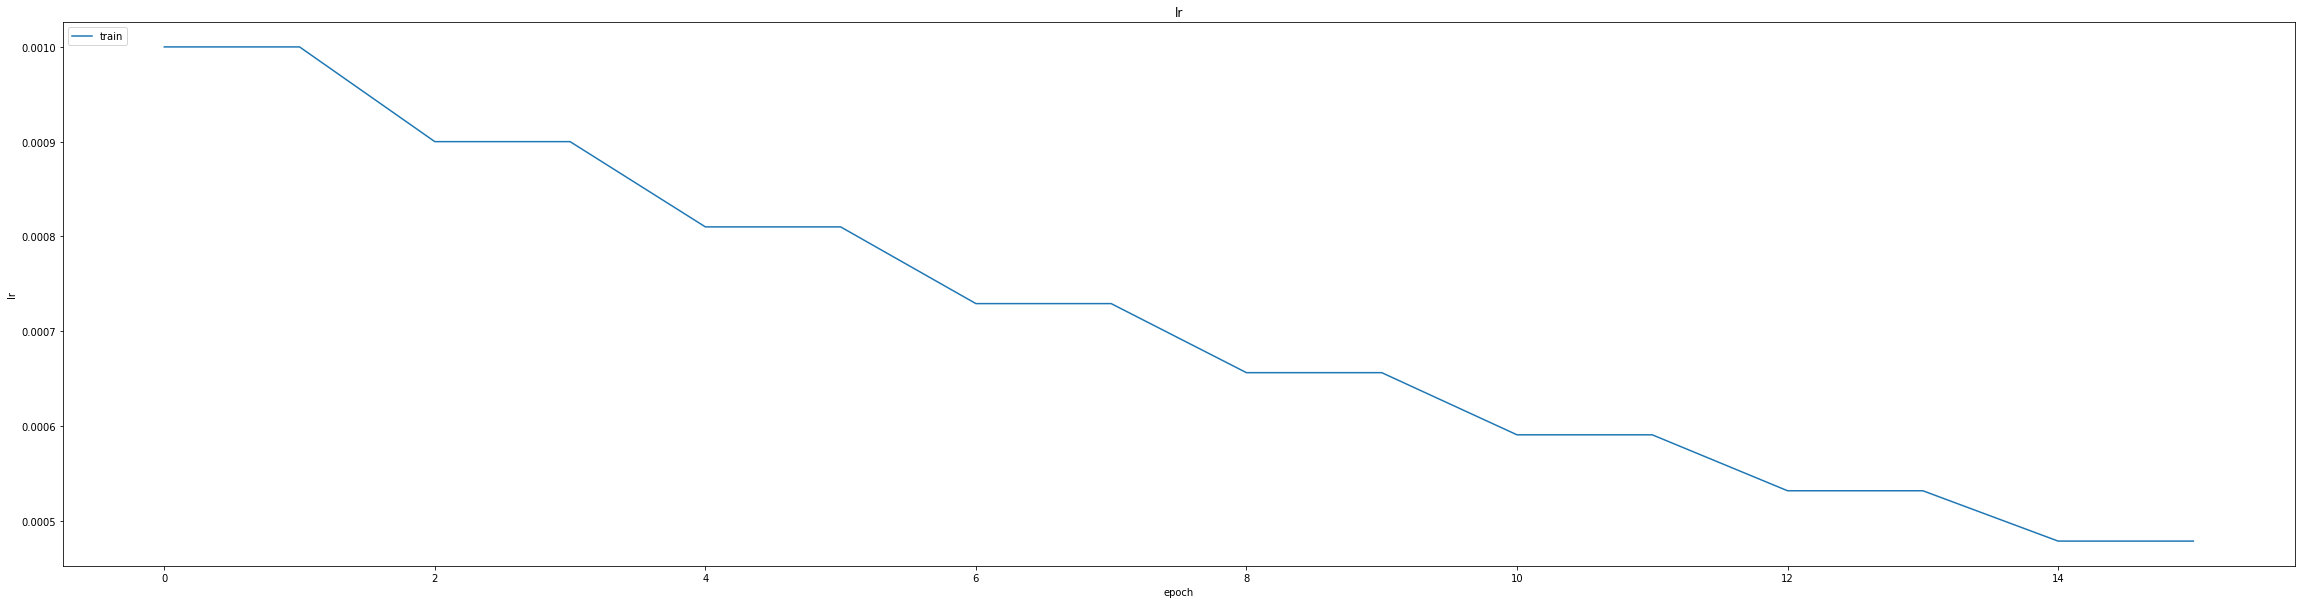

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008867176249623299
0.01161289308220148
1044/1044 [==============================] - 4s 3ms/step
0.9921783998175102


1044/1044 [==============================] - 11s 3ms/step


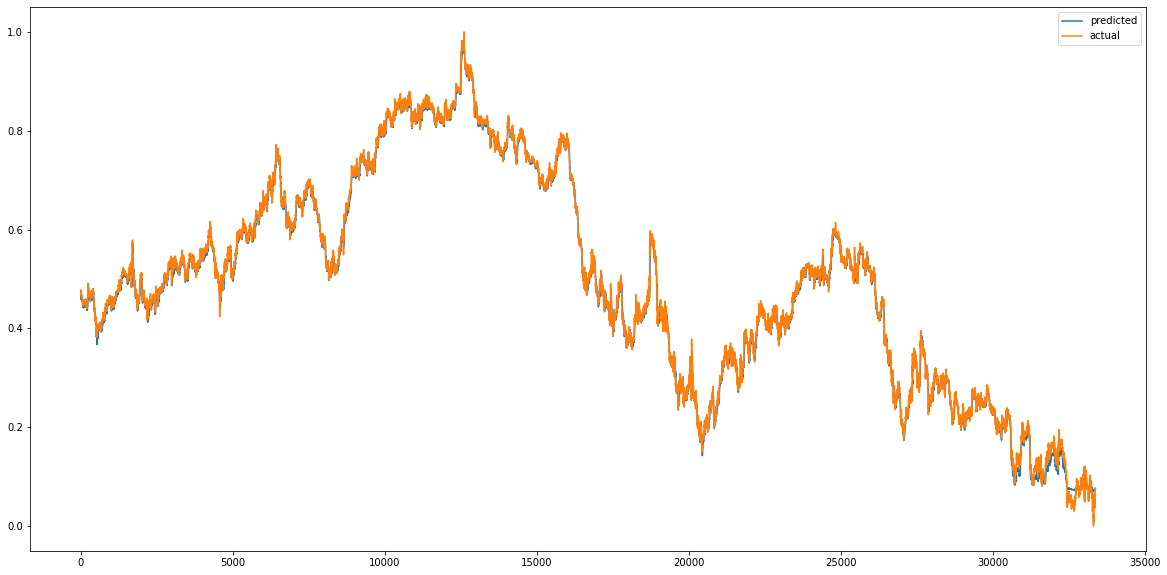

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


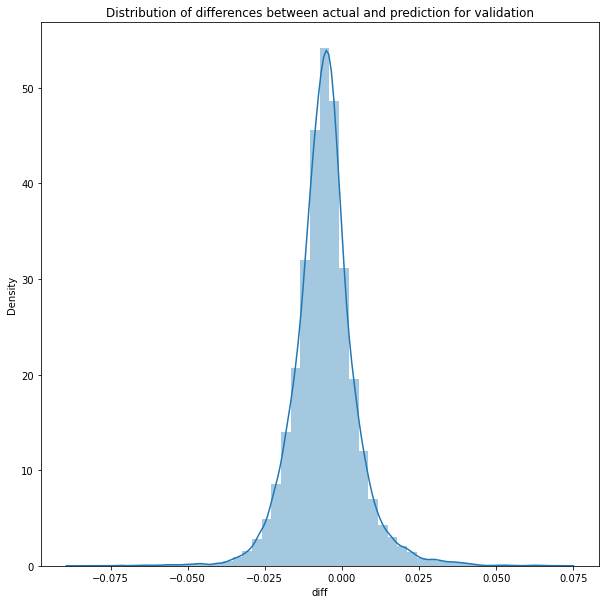

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


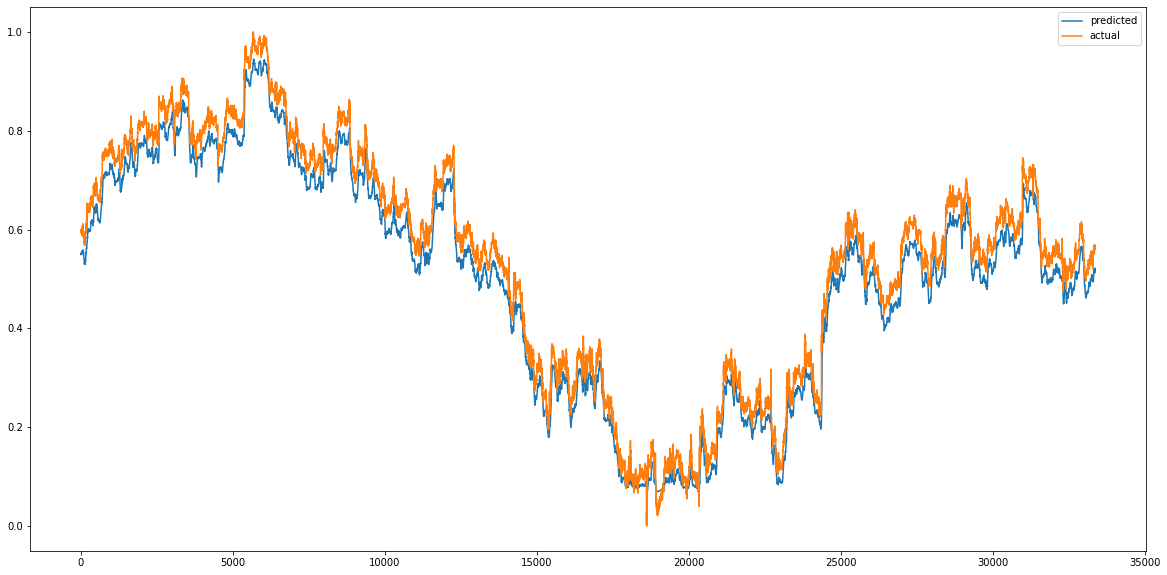

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


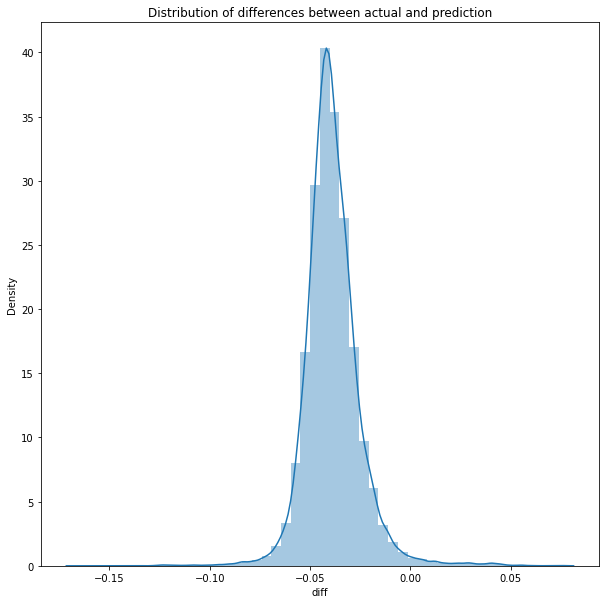

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0017060863710623582
RMSE :  0.04130479840239337
MAE :  0.03941843528776522
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9693229524345089


count    33379.000000
mean        -0.038897
std          0.013896
min         -0.166245
25%         -0.046520
50%         -0.040082
75%         -0.032425
max          0.076055
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


403/405 [============================>.] - ETA: 0s - loss: 428.6848 - mae: 4.4821 - mse: 428.6848 - root_mean_squared_error: 20.7047 - mape: 21857.5879
Epoch 1: val_mse improved from inf to 0.34807, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 56s 113ms/step - loss: 426.7521 - mae: 4.4637 - mse: 426.7521 - root_mean_squared_error: 20.6580 - mape: 21759.3672 - val_loss: 0.3481 - val_mae: 0.5417 - val_mse: 0.3481 - val_root_mean_squared_error: 0.5900 - val_mape: 33145.0508
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0984 - mae: 0.2433 - mse: 0.0984 - root_mean_squared_error: 0.3137 - mape: 5570.3179
Epoch 2: val_mse improved from 0.34807 to 0.12207, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0983 - mae: 0.2431 - mse: 0.0983 - root_mean_squared_error: 0.3135 - mape: 5559.0317 - val_loss: 0.1221 - val_mae: 0.2903 - val_mse: 0.1221 - val_root_mean_squared_error: 0.3494 - val_mape: 24228.3008
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1571 - mse: 0.0440 - root_mean_squared_error: 0.2096 - mape: 5204.8140
Epoch 3: val_mse improved from 0.12207 to 0.08450, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0439 - mae: 0.1571 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 5181.5225 - val_loss: 0.0845 - val_mae: 0.2415 - val_mse: 0.0845 - val_root_mean_squared_error: 0.2907 - val_mape: 21528.5898
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1528 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 4885.2861
Epoch 4: val_mse improved from 0.08450 to 0.07524, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0390 - mae: 0.1528 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 4875.3799 - val_loss: 0.0752 - val_mae: 0.2280 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2743 - val_mape: 20622.5996
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1536 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4764.2871
Epoch 5: val_mse improved from 0.07524 to 0.07303, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0384 - mae: 0.1536 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4754.6357 - val_loss: 0.0730 - val_mae: 0.2247 - val_mse: 0.0730 - val_root_mean_squared_error: 0.2702 - val_mape: 20346.6211
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0380 - mae: 0.1531 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 5067.5220
Epoch 6: val_mse improved from 0.07303 to 0.07225, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0380 - mae: 0.1531 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 5067.5220 - val_loss: 0.0722 - val_mae: 0.2236 - val_mse: 0.0722 - val_root_mean_squared_error: 0.2688 - val_mape: 20209.6816
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0376 - mae: 0.1524 - mse: 0.0376 - root_mean_squared_error: 0.1939 - mape: 4803.6499
Epoch 7: val_mse improved from 0.07225 to 0.07188, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0376 - mae: 0.1524 - mse: 0.0376 - root_mean_squared_error: 0.1939 - mape: 4782.1284 - val_loss: 0.0719 - val_mae: 0.2231 - val_mse: 0.0719 - val_root_mean_squared_error: 0.2681 - val_mape: 20112.9297
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0373 - mae: 0.1519 - mse: 0.0373 - root_mean_squared_error: 0.1931 - mape: 5322.2197
Epoch 8: val_mse improved from 0.07188 to 0.07141, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 108ms/step - loss: 0.0373 - mae: 0.1519 - mse: 0.0373 - root_mean_squared_error: 0.1931 - mape: 5298.3818 - val_loss: 0.0714 - val_mae: 0.2224 - val_mse: 0.0714 - val_root_mean_squared_error: 0.2672 - val_mape: 20003.8223
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0368 - mae: 0.1509 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 5483.5962
Epoch 9: val_mse improved from 0.07141 to 0.07088, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0368 - mae: 0.1509 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 5483.5962 - val_loss: 0.0709 - val_mae: 0.2216 - val_mse: 0.0709 - val_root_mean_squared_error: 0.2662 - val_mape: 19890.4336
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0363 - mae: 0.1500 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 4821.4087
Epoch 10: val_mse improved from 0.07088 to 0.07034, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0363 - mae: 0.1500 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 4811.6357 - val_loss: 0.0703 - val_mae: 0.2208 - val_mse: 0.0703 - val_root_mean_squared_error: 0.2652 - val_mape: 19776.6816
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0358 - mae: 0.1490 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 4680.3521
Epoch 11: val_mse improved from 0.07034 to 0.06957, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0358 - mae: 0.1490 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 4680.3521 - val_loss: 0.0696 - val_mae: 0.2196 - val_mse: 0.0696 - val_root_mean_squared_error: 0.2638 - val_mape: 19639.4219
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0352 - mae: 0.1477 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 4971.2139
Epoch 12: val_mse improved from 0.06957 to 0.06839, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0352 - mae: 0.1477 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 4948.9375 - val_loss: 0.0684 - val_mae: 0.2177 - val_mse: 0.0684 - val_root_mean_squared_error: 0.2615 - val_mape: 19454.8789
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0329 - mae: 0.1423 - mse: 0.0329 - root_mean_squared_error: 0.1813 - mape: 4137.3931
Epoch 13: val_mse improved from 0.06839 to 0.05765, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0329 - mae: 0.1423 - mse: 0.0329 - root_mean_squared_error: 0.1812 - mape: 4118.8506 - val_loss: 0.0577 - val_mae: 0.1990 - val_mse: 0.0577 - val_root_mean_squared_error: 0.2401 - val_mape: 18155.4629
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0266 - mae: 0.1278 - mse: 0.0266 - root_mean_squared_error: 0.1631 - mape: 3599.1880
Epoch 14: val_mse improved from 0.05765 to 0.04133, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 0.0266 - mae: 0.1278 - mse: 0.0266 - root_mean_squared_error: 0.1631 - mape: 3599.1880 - val_loss: 0.0413 - val_mae: 0.1651 - val_mse: 0.0413 - val_root_mean_squared_error: 0.2033 - val_mape: 16144.3135
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0171 - mae: 0.1018 - mse: 0.0171 - root_mean_squared_error: 0.1306 - mape: 3545.4429
Epoch 15: val_mse improved from 0.04133 to 0.01413, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0171 - mae: 0.1018 - mse: 0.0171 - root_mean_squared_error: 0.1306 - mape: 3538.2432 - val_loss: 0.0141 - val_mae: 0.0877 - val_mse: 0.0141 - val_root_mean_squared_error: 0.1189 - val_mape: 12133.9287
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 0.0096 - mae: 0.0769 - mse: 0.0096 - root_mean_squared_error: 0.0982 - mape: 2689.7300
Epoch 16: val_mse improved from 0.01413 to 0.00792, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0096 - mae: 0.0768 - mse: 0.0096 - root_mean_squared_error: 0.0981 - mape: 2677.6604 - val_loss: 0.0079 - val_mae: 0.0569 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0890 - val_mape: 10565.2080
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 0.0079 - mae: 0.0700 - mse: 0.0079 - root_mean_squared_error: 0.0892 - mape: 2438.0999
Epoch 17: val_mse improved from 0.00792 to 0.00611, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0079 - mae: 0.0700 - mse: 0.0079 - root_mean_squared_error: 0.0892 - mape: 2433.1501 - val_loss: 0.0061 - val_mae: 0.0507 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0782 - val_mape: 9772.9629
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0072 - mae: 0.0665 - mse: 0.0072 - root_mean_squared_error: 0.0846 - mape: 2226.6589
Epoch 18: val_mse improved from 0.00611 to 0.00523, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 108ms/step - loss: 0.0072 - mae: 0.0665 - mse: 0.0072 - root_mean_squared_error: 0.0846 - mape: 2226.6589 - val_loss: 0.0052 - val_mae: 0.0470 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0723 - val_mape: 9261.7656
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 0.0063 - mae: 0.0625 - mse: 0.0063 - root_mean_squared_error: 0.0795 - mape: 1853.4290
Epoch 19: val_mse improved from 0.00523 to 0.00466, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0063 - mae: 0.0625 - mse: 0.0063 - root_mean_squared_error: 0.0795 - mape: 1845.1206 - val_loss: 0.0047 - val_mae: 0.0450 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0683 - val_mape: 8800.7773
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0586 - mse: 0.0056 - root_mean_squared_error: 0.0745 - mape: 1954.0754
Epoch 20: val_mse improved from 0.00466 to 0.00410, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0056 - mae: 0.0585 - mse: 0.0056 - root_mean_squared_error: 0.0745 - mape: 1950.1089 - val_loss: 0.0041 - val_mae: 0.0435 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mape: 8204.4580
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0545 - mse: 0.0048 - root_mean_squared_error: 0.0692 - mape: 1846.0470
Epoch 21: val_mse improved from 0.00410 to 0.00325, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0048 - mae: 0.0544 - mse: 0.0048 - root_mean_squared_error: 0.0692 - mape: 1837.7694 - val_loss: 0.0032 - val_mae: 0.0367 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0570 - val_mape: 7690.8369
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0508 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 1922.6285
Epoch 22: val_mse improved from 0.00325 to 0.00284, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0042 - mae: 0.0508 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 1913.9933 - val_loss: 0.0028 - val_mae: 0.0346 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0533 - val_mape: 7321.2930
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0470 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 1550.8213
Epoch 23: val_mse improved from 0.00284 to 0.00240, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0036 - mae: 0.0470 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 1550.8213 - val_loss: 0.0024 - val_mae: 0.0326 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0490 - val_mape: 6960.7461
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0431 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 1885.3698
Epoch 24: val_mse improved from 0.00240 to 0.00210, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0030 - mae: 0.0431 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 1876.8960 - val_loss: 0.0021 - val_mae: 0.0304 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 6648.8804
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0392 - mse: 0.0025 - root_mean_squared_error: 0.0499 - mape: 1445.8102
Epoch 25: val_mse improved from 0.00210 to 0.00181, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0025 - mae: 0.0392 - mse: 0.0025 - root_mean_squared_error: 0.0499 - mape: 1442.8728 - val_loss: 0.0018 - val_mae: 0.0282 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 6246.0830
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0359 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 1230.4265
Epoch 26: val_mse improved from 0.00181 to 0.00155, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0021 - mae: 0.0359 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 1224.9032 - val_loss: 0.0016 - val_mae: 0.0267 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 5829.3149
Epoch 27/60
403/405 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0323 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 1082.7704
Epoch 27: val_mse improved from 0.00155 to 0.00115, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0017 - mae: 0.0323 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 1077.9137 - val_loss: 0.0012 - val_mae: 0.0221 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0339 - val_mape: 5412.9434
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1316.8474
Epoch 28: val_mse improved from 0.00115 to 0.00102, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1310.9331 - val_loss: 0.0010 - val_mae: 0.0206 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 5115.3735
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1046.8317
Epoch 29: val_mse improved from 0.00102 to 0.00092, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1042.1312 - val_loss: 9.2428e-04 - val_mae: 0.0199 - val_mse: 9.2428e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 4848.5723
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 9.3350e-04 - mae: 0.0240 - mse: 9.3350e-04 - root_mean_squared_error: 0.0306 - mape: 922.0697
Epoch 30: val_mse improved from 0.00092 to 0.00085, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 9.3272e-04 - mae: 0.0240 - mse: 9.3272e-04 - root_mean_squared_error: 0.0305 - mape: 917.9265 - val_loss: 8.5487e-04 - val_mae: 0.0190 - val_mse: 8.5487e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 4748.9482
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 7.4740e-04 - mae: 0.0215 - mse: 7.4740e-04 - root_mean_squared_error: 0.0273 - mape: 896.1669
Epoch 31: val_mse did not improve from 0.00085
405/405 [==============================] - 9s 22ms/step - loss: 7.4718e-04 - mae: 0.0215 - mse: 7.4718e-04 - root_mean_squared_error: 0.0273 - mape: 894.3452 - val_loss: 9.7827e-04 - val_mae: 0.0212 - val_mse: 9.7827e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 4743.2031
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 5.9905e-04 - mae: 0.0192 - mse: 5.9905e-04 - root_mean_squared_error: 0.0245 - mape: 994.8022 
Epoch 32: val_mse improved from 0.00085 to 0.00079, saving

405/405 [==============================] - 41s 102ms/step - loss: 5.9901e-04 - mae: 0.0192 - mse: 5.9901e-04 - root_mean_squared_error: 0.0245 - mape: 992.7798 - val_loss: 7.9449e-04 - val_mae: 0.0184 - val_mse: 7.9449e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 4624.7212
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 4.9313e-04 - mae: 0.0174 - mse: 4.9313e-04 - root_mean_squared_error: 0.0222 - mape: 943.9753
Epoch 33: val_mse improved from 0.00079 to 0.00072, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 4.9313e-04 - mae: 0.0174 - mse: 4.9313e-04 - root_mean_squared_error: 0.0222 - mape: 943.9753 - val_loss: 7.2499e-04 - val_mae: 0.0170 - val_mse: 7.2499e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4526.5239
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 3.9955e-04 - mae: 0.0157 - mse: 3.9955e-04 - root_mean_squared_error: 0.0200 - mape: 791.3896
Epoch 34: val_mse did not improve from 0.00072
405/405 [==============================] - 9s 22ms/step - loss: 3.9937e-04 - mae: 0.0157 - mse: 3.9937e-04 - root_mean_squared_error: 0.0200 - mape: 787.8323 - val_loss: 8.2249e-04 - val_mae: 0.0191 - val_mse: 8.2249e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 4528.6367
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 3.4967e-04 - mae: 0.0146 - mse: 3.4967e-04 - root_mean_squared_error: 0.0187 - mape: 870.2910
Epoch 35: val_mse improved from 0.00072 to 0.00072, saving 

405/405 [==============================] - 42s 105ms/step - loss: 3.4967e-04 - mae: 0.0146 - mse: 3.4967e-04 - root_mean_squared_error: 0.0187 - mape: 870.2910 - val_loss: 7.2422e-04 - val_mae: 0.0176 - val_mse: 7.2422e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4392.2900
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 2.8643e-04 - mae: 0.0132 - mse: 2.8643e-04 - root_mean_squared_error: 0.0169 - mape: 871.6060
Epoch 36: val_mse improved from 0.00072 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 2.8643e-04 - mae: 0.0132 - mse: 2.8643e-04 - root_mean_squared_error: 0.0169 - mape: 871.6060 - val_loss: 6.7705e-04 - val_mae: 0.0177 - val_mse: 6.7705e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 4291.4136
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 2.5953e-04 - mae: 0.0125 - mse: 2.5953e-04 - root_mean_squared_error: 0.0161 - mape: 736.9771
Epoch 37: val_mse improved from 0.00068 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 2.5950e-04 - mae: 0.0125 - mse: 2.5950e-04 - root_mean_squared_error: 0.0161 - mape: 735.4818 - val_loss: 6.0355e-04 - val_mae: 0.0161 - val_mse: 6.0355e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 4180.4463
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 2.3423e-04 - mae: 0.0119 - mse: 2.3423e-04 - root_mean_squared_error: 0.0153 - mape: 715.8929
Epoch 38: val_mse did not improve from 0.00060
405/405 [==============================] - 9s 22ms/step - loss: 2.3408e-04 - mae: 0.0119 - mse: 2.3408e-04 - root_mean_squared_error: 0.0153 - mape: 712.6788 - val_loss: 6.2706e-04 - val_mae: 0.0161 - val_mse: 6.2706e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4194.2505
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 2.0920e-04 - mae: 0.0113 - mse: 2.0920e-04 - root_mean_squared_error: 0.0145 - mape: 720.5262
Epoch 39: val_mse improved from 0.00060 to 0.00055, saving 

405/405 [==============================] - 43s 105ms/step - loss: 2.0907e-04 - mae: 0.0113 - mse: 2.0907e-04 - root_mean_squared_error: 0.0145 - mape: 719.0593 - val_loss: 5.4520e-04 - val_mae: 0.0152 - val_mse: 5.4520e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 4010.1096
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 1.9266e-04 - mae: 0.0108 - mse: 1.9266e-04 - root_mean_squared_error: 0.0139 - mape: 790.6204
Epoch 40: val_mse did not improve from 0.00055
405/405 [==============================] - 9s 22ms/step - loss: 1.9258e-04 - mae: 0.0108 - mse: 1.9258e-04 - root_mean_squared_error: 0.0139 - mape: 787.0624 - val_loss: 6.5186e-04 - val_mae: 0.0182 - val_mse: 6.5186e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 3987.7708
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 1.6674e-04 - mae: 0.0100 - mse: 1.6674e-04 - root_mean_squared_error: 0.0129 - mape: 588.5811
Epoch 41: val_mse improved from 0.00055 to 0.00044, saving 

405/405 [==============================] - 42s 103ms/step - loss: 1.6661e-04 - mae: 0.0100 - mse: 1.6661e-04 - root_mean_squared_error: 0.0129 - mape: 585.9335 - val_loss: 4.4393e-04 - val_mae: 0.0141 - val_mse: 4.4393e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 3737.4893
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 1.6221e-04 - mae: 0.0099 - mse: 1.6221e-04 - root_mean_squared_error: 0.0127 - mape: 673.4456
Epoch 42: val_mse did not improve from 0.00044
405/405 [==============================] - 9s 22ms/step - loss: 1.6207e-04 - mae: 0.0099 - mse: 1.6207e-04 - root_mean_squared_error: 0.0127 - mape: 670.4149 - val_loss: 5.2655e-04 - val_mae: 0.0160 - val_mse: 5.2655e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 3665.6218
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 1.5497e-04 - mae: 0.0097 - mse: 1.5497e-04 - root_mean_squared_error: 0.0124 - mape: 633.0491
Epoch 43: val_mse did not improve from 0.00044
405/405 [===

405/405 [==============================] - 41s 103ms/step - loss: 1.4105e-04 - mae: 0.0092 - mse: 1.4105e-04 - root_mean_squared_error: 0.0119 - mape: 579.7526 - val_loss: 3.9850e-04 - val_mae: 0.0132 - val_mse: 3.9850e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 3361.9048
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 1.3257e-04 - mae: 0.0091 - mse: 1.3257e-04 - root_mean_squared_error: 0.0115 - mape: 602.2956
Epoch 45: val_mse did not improve from 0.00040
405/405 [==============================] - 9s 22ms/step - loss: 1.3249e-04 - mae: 0.0091 - mse: 1.3249e-04 - root_mean_squared_error: 0.0115 - mape: 601.0695 - val_loss: 4.1792e-04 - val_mae: 0.0132 - val_mse: 4.1792e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 3351.7397
Epoch 46/60
405/405 [==============================] - ETA: 0s - loss: 1.2841e-04 - mae: 0.0089 - mse: 1.2841e-04 - root_mean_squared_error: 0.0113 - mape: 545.5434
Epoch 46: val_mse improved from 0.00040 to 0.00039, saving 

405/405 [==============================] - 42s 104ms/step - loss: 1.2841e-04 - mae: 0.0089 - mse: 1.2841e-04 - root_mean_squared_error: 0.0113 - mape: 545.5434 - val_loss: 3.8849e-04 - val_mae: 0.0131 - val_mse: 3.8849e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3213.0845
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 1.3678e-04 - mae: 0.0090 - mse: 1.3678e-04 - root_mean_squared_error: 0.0117 - mape: 498.9596
Epoch 47: val_mse did not improve from 0.00039
405/405 [==============================] - 9s 22ms/step - loss: 1.3673e-04 - mae: 0.0090 - mse: 1.3673e-04 - root_mean_squared_error: 0.0117 - mape: 497.9448 - val_loss: 4.0647e-04 - val_mae: 0.0131 - val_mse: 4.0647e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 3272.1858
Epoch 48/60
403/405 [============================>.] - ETA: 0s - loss: 1.1358e-04 - mae: 0.0084 - mse: 1.1358e-04 - root_mean_squared_error: 0.0107 - mape: 548.7932
Epoch 48: val_mse did not improve from 0.00039
405/405 [===

405/405 [==============================] - 42s 103ms/step - loss: 1.2007e-04 - mae: 0.0086 - mse: 1.2007e-04 - root_mean_squared_error: 0.0110 - mape: 573.6312 - val_loss: 3.0070e-04 - val_mae: 0.0116 - val_mse: 3.0070e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3020.4575
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.1020e-04 - mae: 0.0082 - mse: 1.1020e-04 - root_mean_squared_error: 0.0105 - mape: 467.6929
Epoch 50: val_mse improved from 0.00030 to 0.00030, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 1.1020e-04 - mae: 0.0082 - mse: 1.1020e-04 - root_mean_squared_error: 0.0105 - mape: 467.6929 - val_loss: 3.0004e-04 - val_mae: 0.0108 - val_mse: 3.0004e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3067.9150
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 1.1795e-04 - mae: 0.0086 - mse: 1.1795e-04 - root_mean_squared_error: 0.0109 - mape: 480.7440
Epoch 51: val_mse improved from 0.00030 to 0.00030, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 1.1795e-04 - mae: 0.0086 - mse: 1.1795e-04 - root_mean_squared_error: 0.0109 - mape: 480.7440 - val_loss: 2.9894e-04 - val_mae: 0.0108 - val_mse: 2.9894e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3111.8152
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 1.1882e-04 - mae: 0.0085 - mse: 1.1882e-04 - root_mean_squared_error: 0.0109 - mape: 529.7828
Epoch 52: val_mse did not improve from 0.00030
405/405 [==============================] - 9s 22ms/step - loss: 1.1882e-04 - mae: 0.0085 - mse: 1.1882e-04 - root_mean_squared_error: 0.0109 - mape: 529.7828 - val_loss: 3.5024e-04 - val_mae: 0.0111 - val_mse: 3.5024e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3331.5767
Epoch 53/60
404/405 [============================>.] - ETA: 0s - loss: 9.1091e-05 - mae: 0.0075 - mse: 9.1091e-05 - root_mean_squared_error: 0.0095 - mape: 565.0984
Epoch 53: val_mse did not improve from 0.00030
405/405 [===

405/405 [==============================] - 42s 103ms/step - loss: 1.1595e-04 - mae: 0.0085 - mse: 1.1595e-04 - root_mean_squared_error: 0.0108 - mape: 492.5422 - val_loss: 2.7994e-04 - val_mae: 0.0122 - val_mse: 2.7994e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 3000.9888
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 9.0534e-05 - mae: 0.0075 - mse: 9.0534e-05 - root_mean_squared_error: 0.0095 - mape: 536.5917
Epoch 55: val_mse did not improve from 0.00028
405/405 [==============================] - 9s 22ms/step - loss: 9.0534e-05 - mae: 0.0075 - mse: 9.0534e-05 - root_mean_squared_error: 0.0095 - mape: 536.5917 - val_loss: 3.7948e-04 - val_mae: 0.0121 - val_mse: 3.7948e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3287.1426
Epoch 56/60
405/405 [==============================] - ETA: 0s - loss: 9.2220e-05 - mae: 0.0075 - mse: 9.2220e-05 - root_mean_squared_error: 0.0096 - mape: 410.6545
Epoch 56: val_mse did not improve from 0.00028
405/405 [===

405/405 [==============================] - 41s 102ms/step - loss: 9.2963e-05 - mae: 0.0074 - mse: 9.2963e-05 - root_mean_squared_error: 0.0096 - mape: 397.7830 - val_loss: 2.7639e-04 - val_mae: 0.0095 - val_mse: 2.7639e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 3149.3765


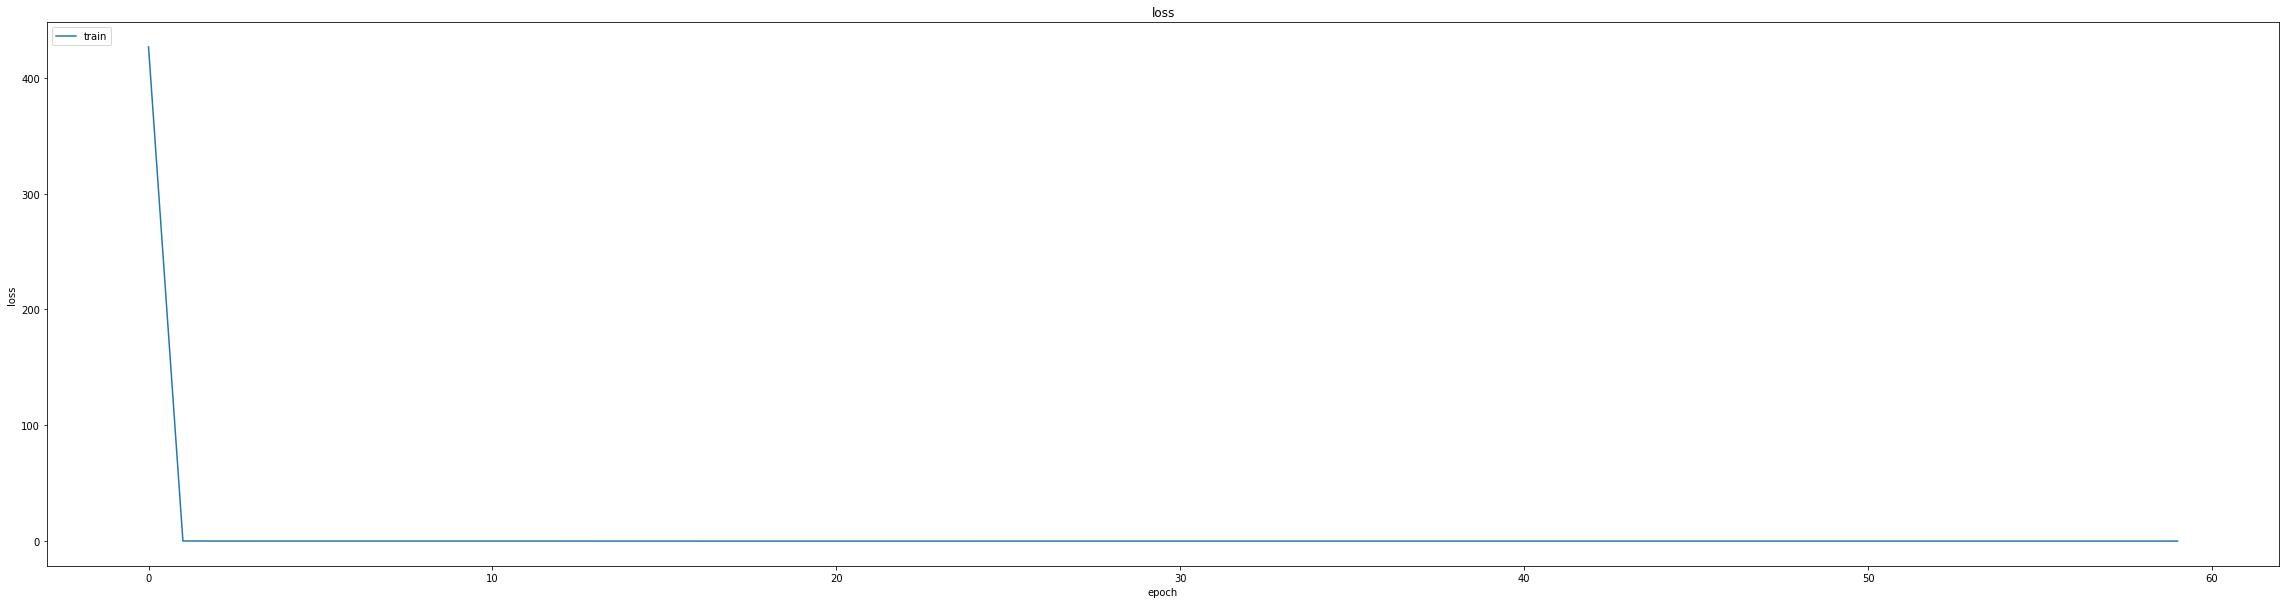

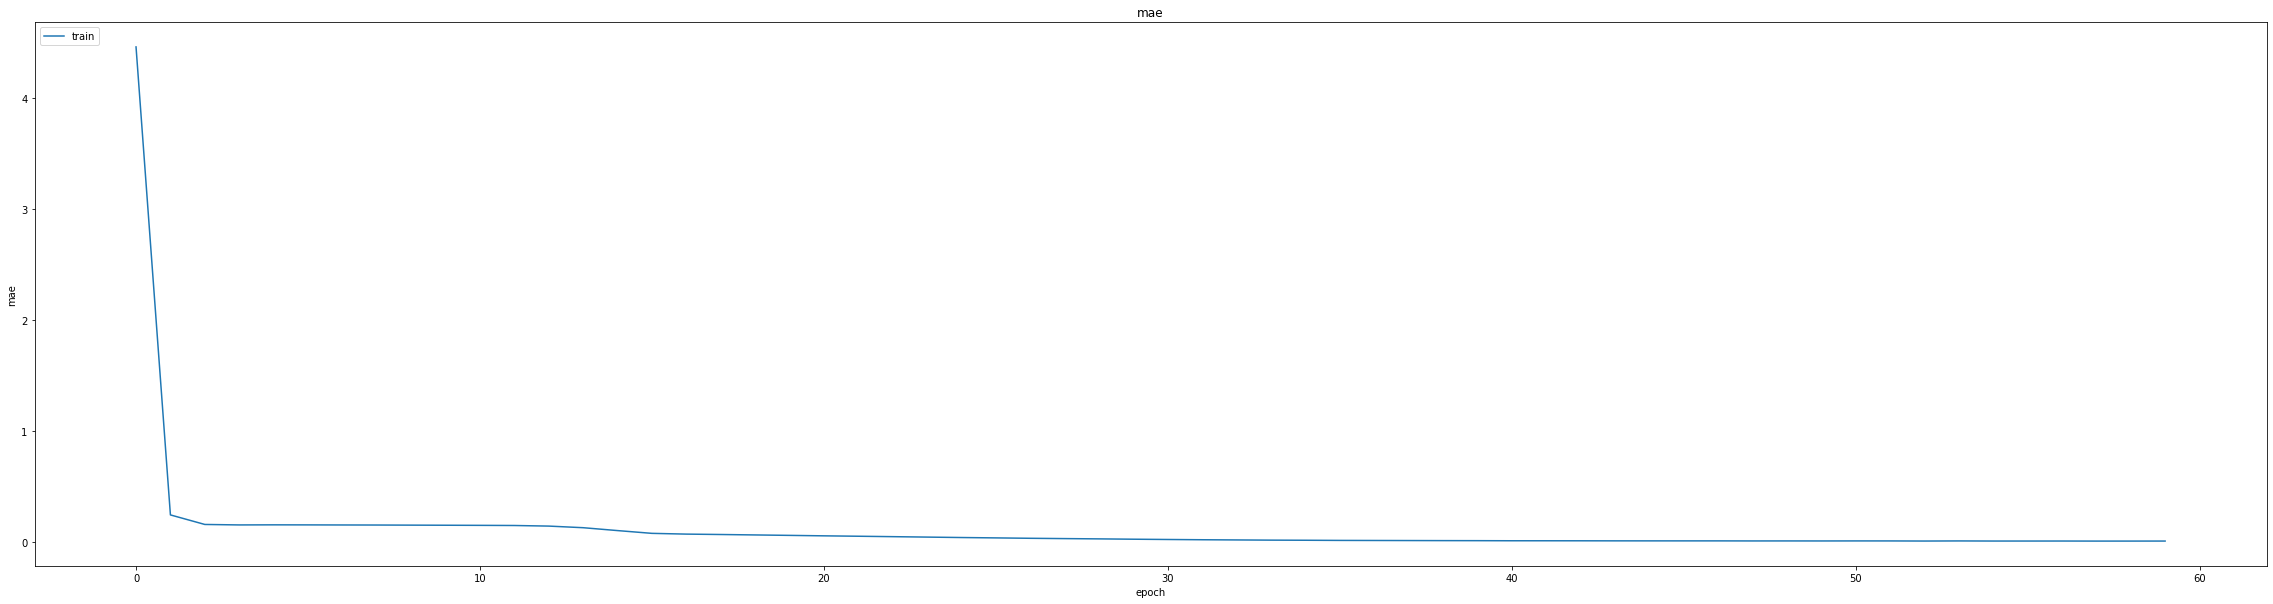

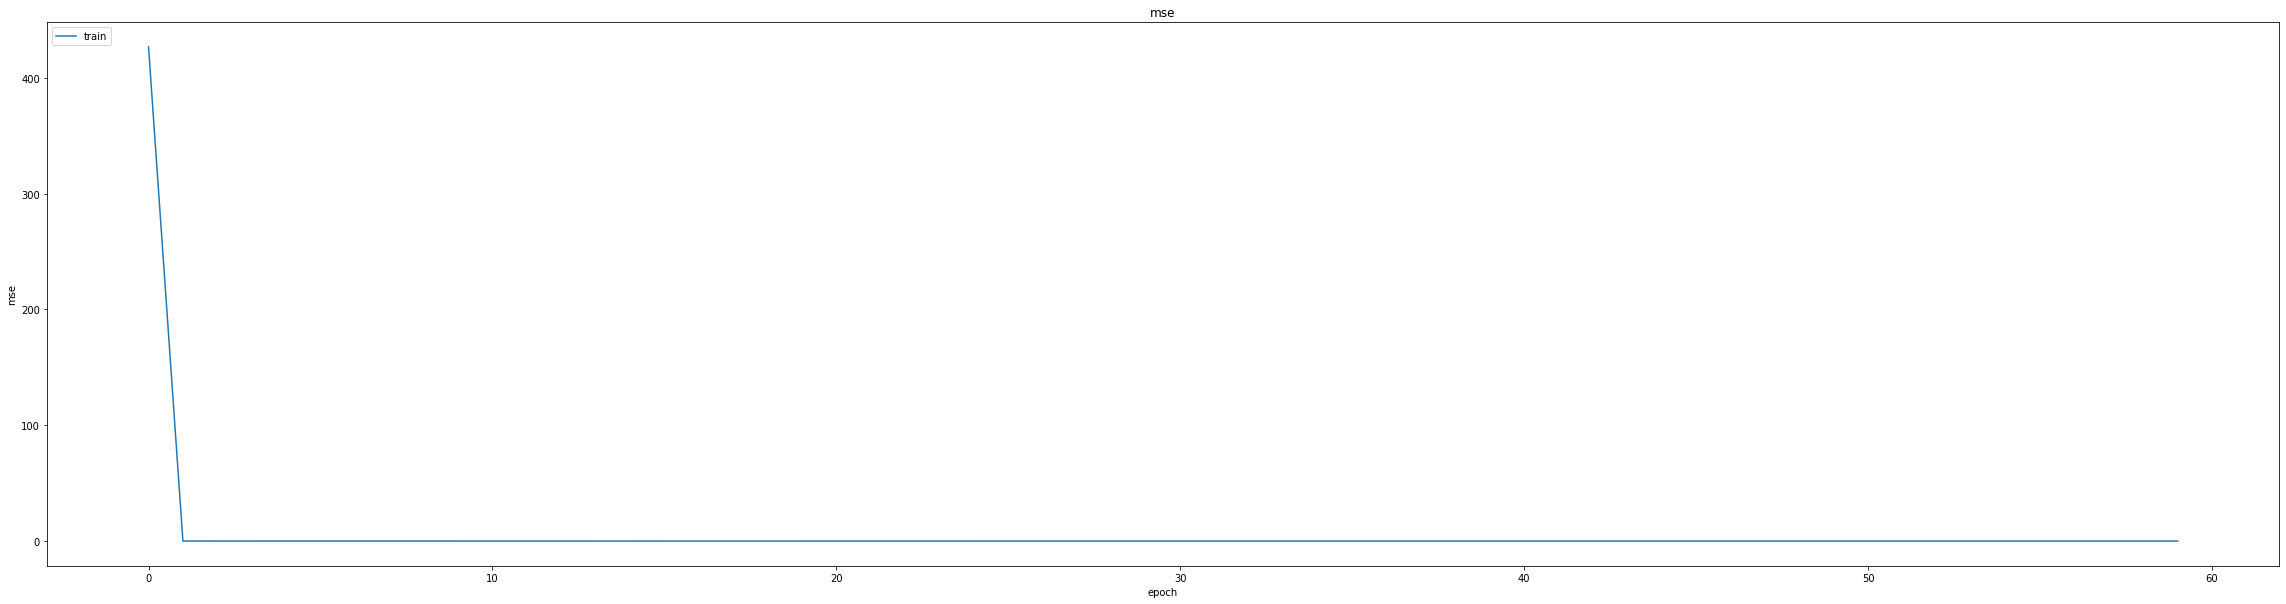

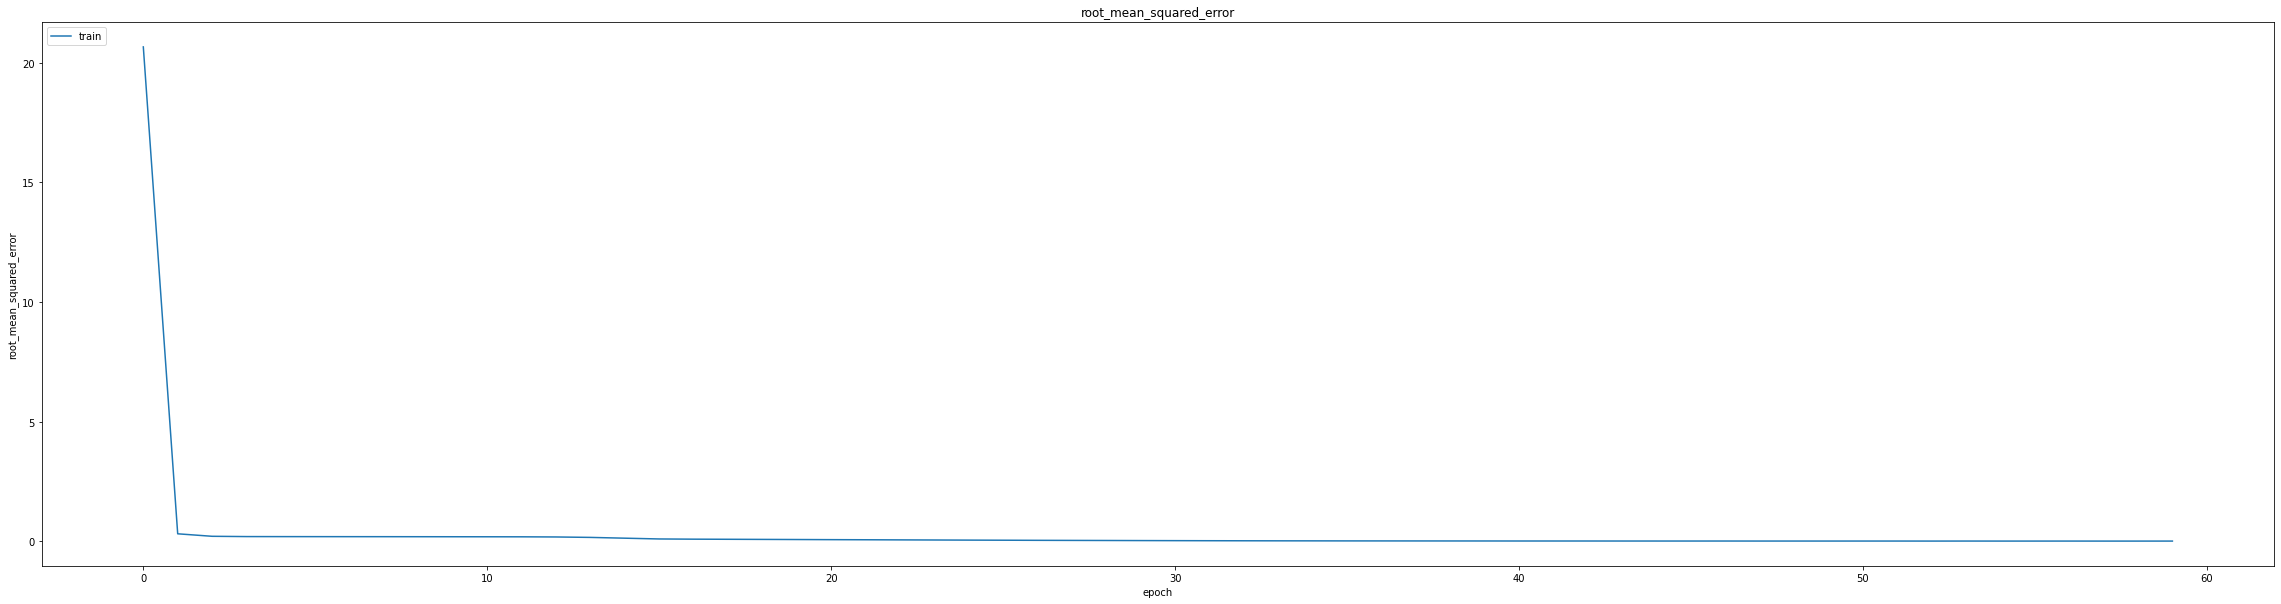

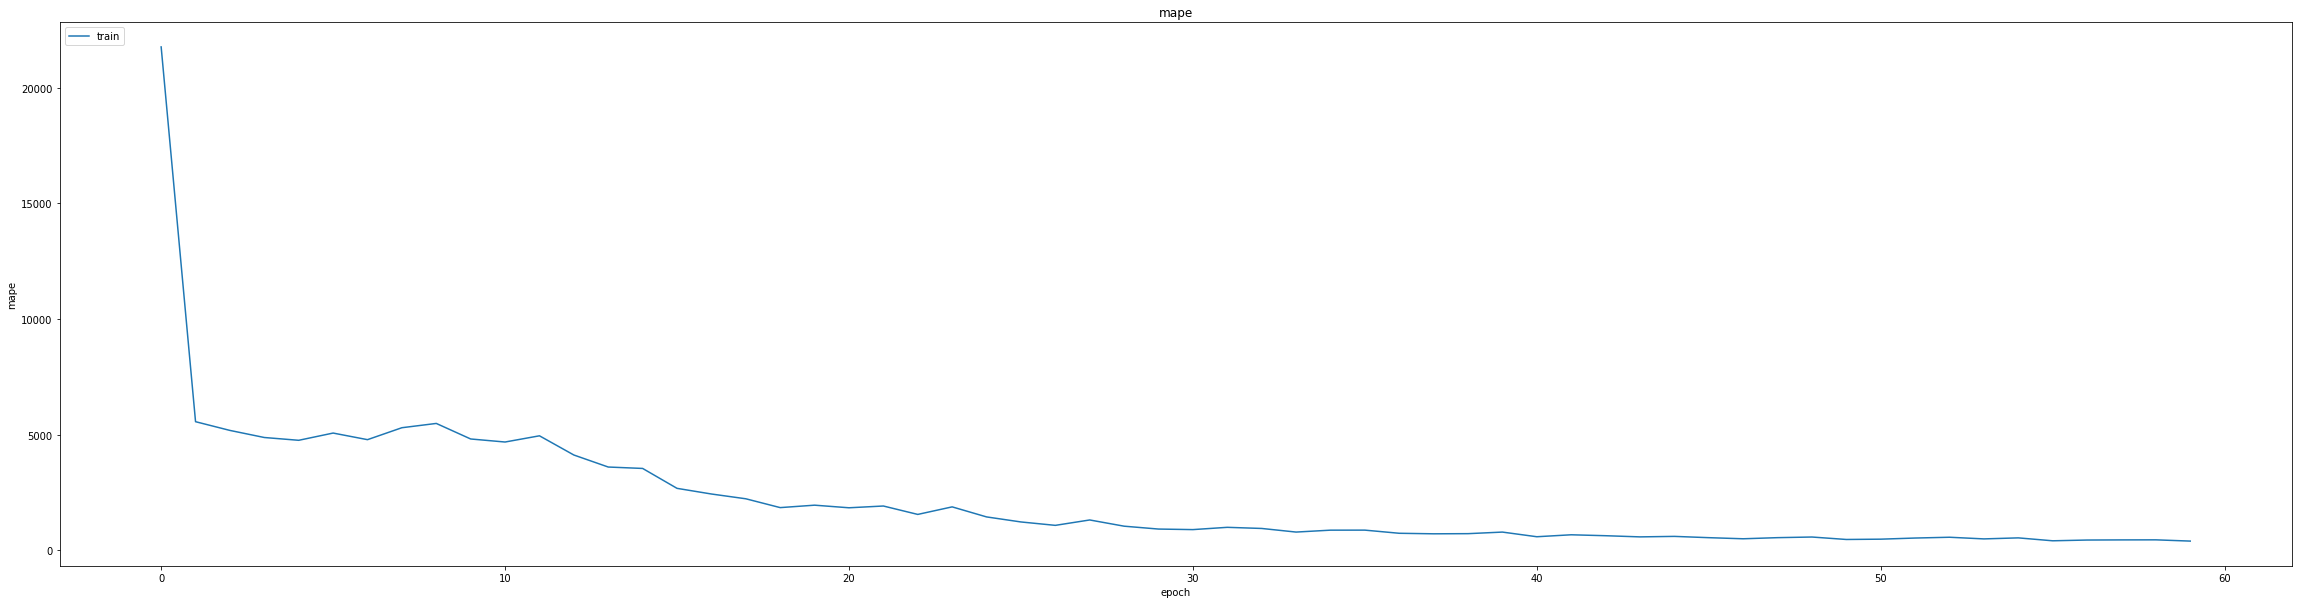

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009518388658761978
0.016624879091978073
1044/1044 [==============================] - 8s 6ms/step
0.9941664227635502


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 7.0114e-04 - mae: 0.0099 - mse: 7.0114e-04 - root_mean_squared_error: 0.0265 - mape: 342.4626
Epoch 1: val_mse improved from 0.00028 to 0.00020, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 65s 138ms/step - loss: 7.0114e-04 - mae: 0.0099 - mse: 7.0114e-04 - root_mean_squared_error: 0.0265 - mape: 342.4626 - val_loss: 1.9651e-04 - val_mae: 0.0086 - val_mse: 1.9651e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3016.6641 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 2.3561e-05 - mae: 0.0036 - mse: 2.3561e-05 - root_mean_squared_error: 0.0049 - mape: 227.4889
Epoch 2: val_mse improved from 0.00020 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 2.3562e-05 - mae: 0.0036 - mse: 2.3562e-05 - root_mean_squared_error: 0.0049 - mape: 227.0263 - val_loss: 1.8368e-04 - val_mae: 0.0087 - val_mse: 1.8368e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 2911.7859 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
404/405 [============================>.] - ETA: 0s - loss: 2.3571e-05 - mae: 0.0037 - mse: 2.3571e-05 - root_mean_squared_error: 0.0049 - mape: 278.1602
Epoch 3: val_mse did not improve from 0.00018
405/405 [==============================] - 9s 21ms/step - loss: 2.3589e-05 - mae: 0.0037 - mse: 2.3589e-05 - root_mean_squared_error: 0.0049 - mape: 277.5942 - val_loss: 2.0253e-04 - val_mae: 0.0082 - val_mse: 2.0253e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 3122.9968 - lr: 9.0000e-04
Epoch 4/20
403/405 [============================>.] - ETA: 0s - loss: 4.4010e-05 - mae: 0.0052 - mse: 4.4010e-05 - root_mean_squared_error: 0.0066 - mape: 222.4

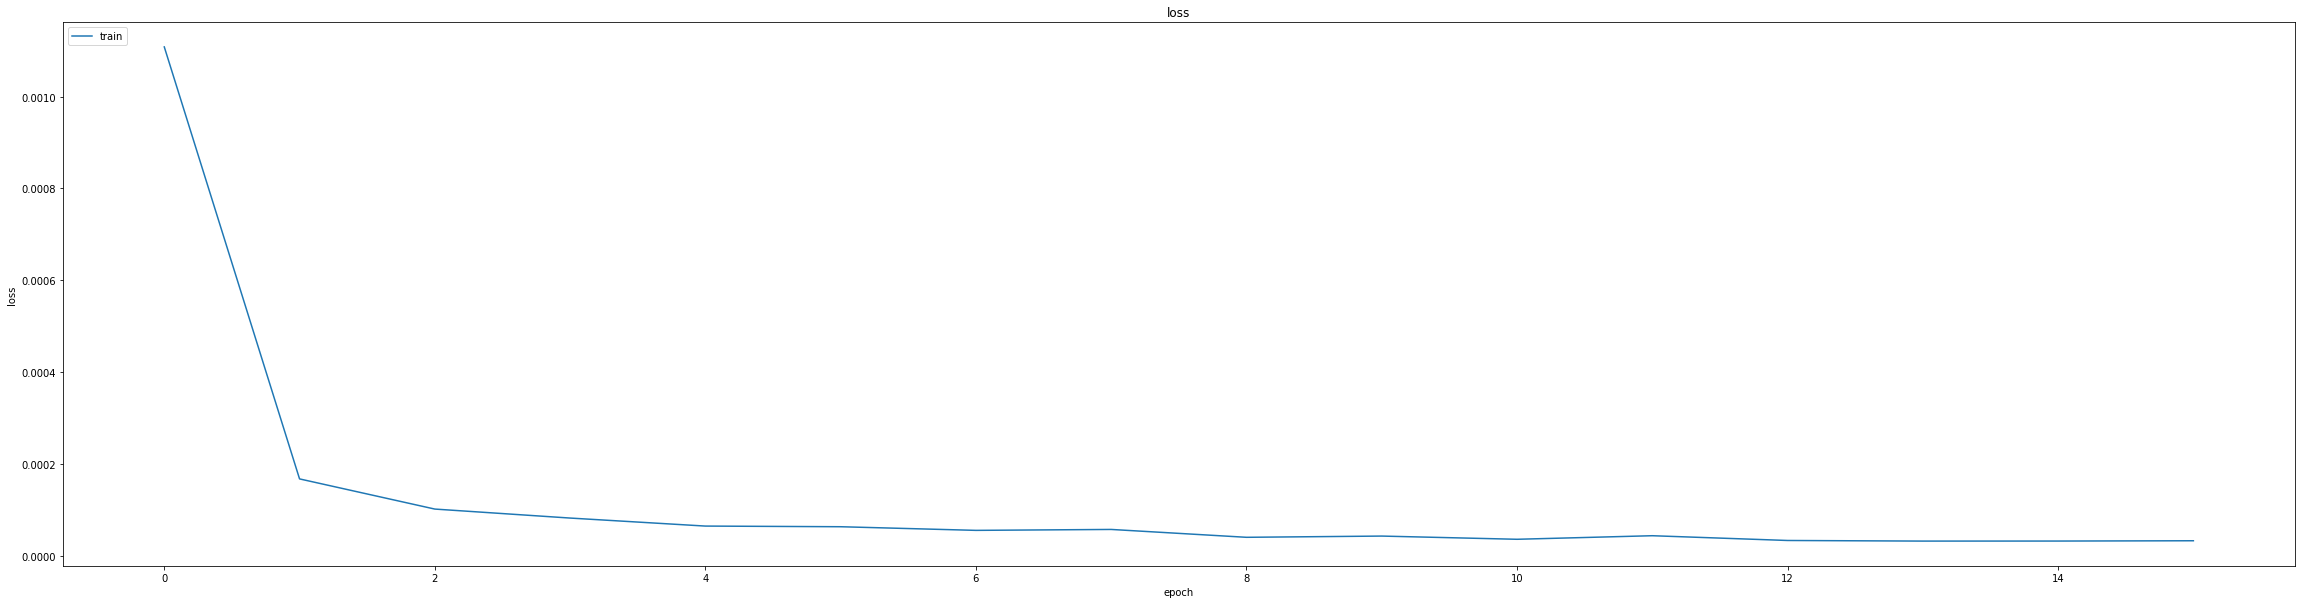

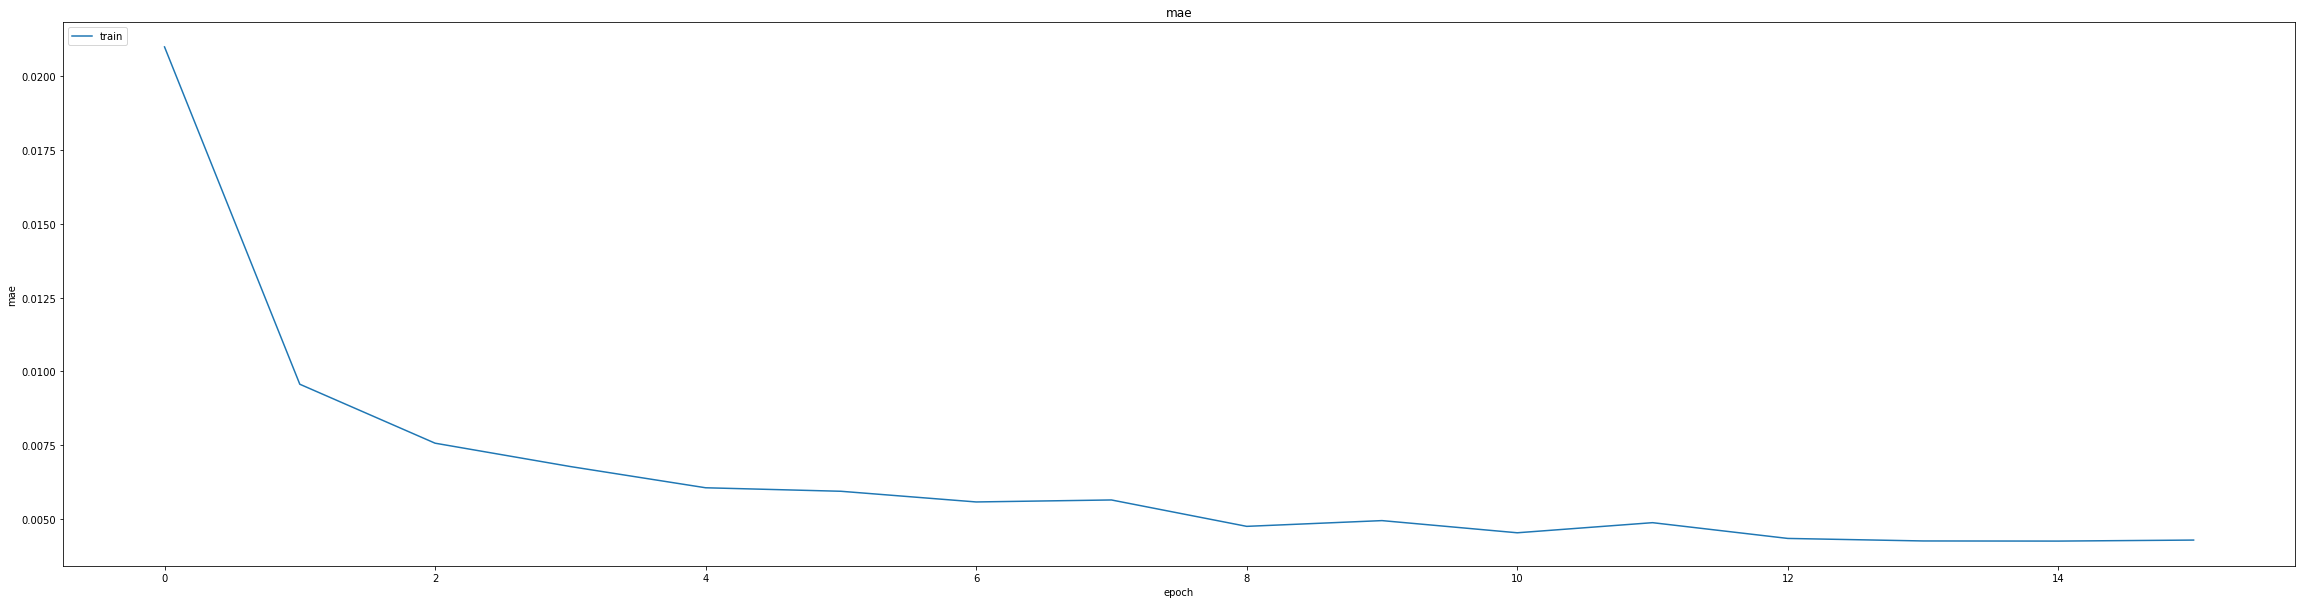

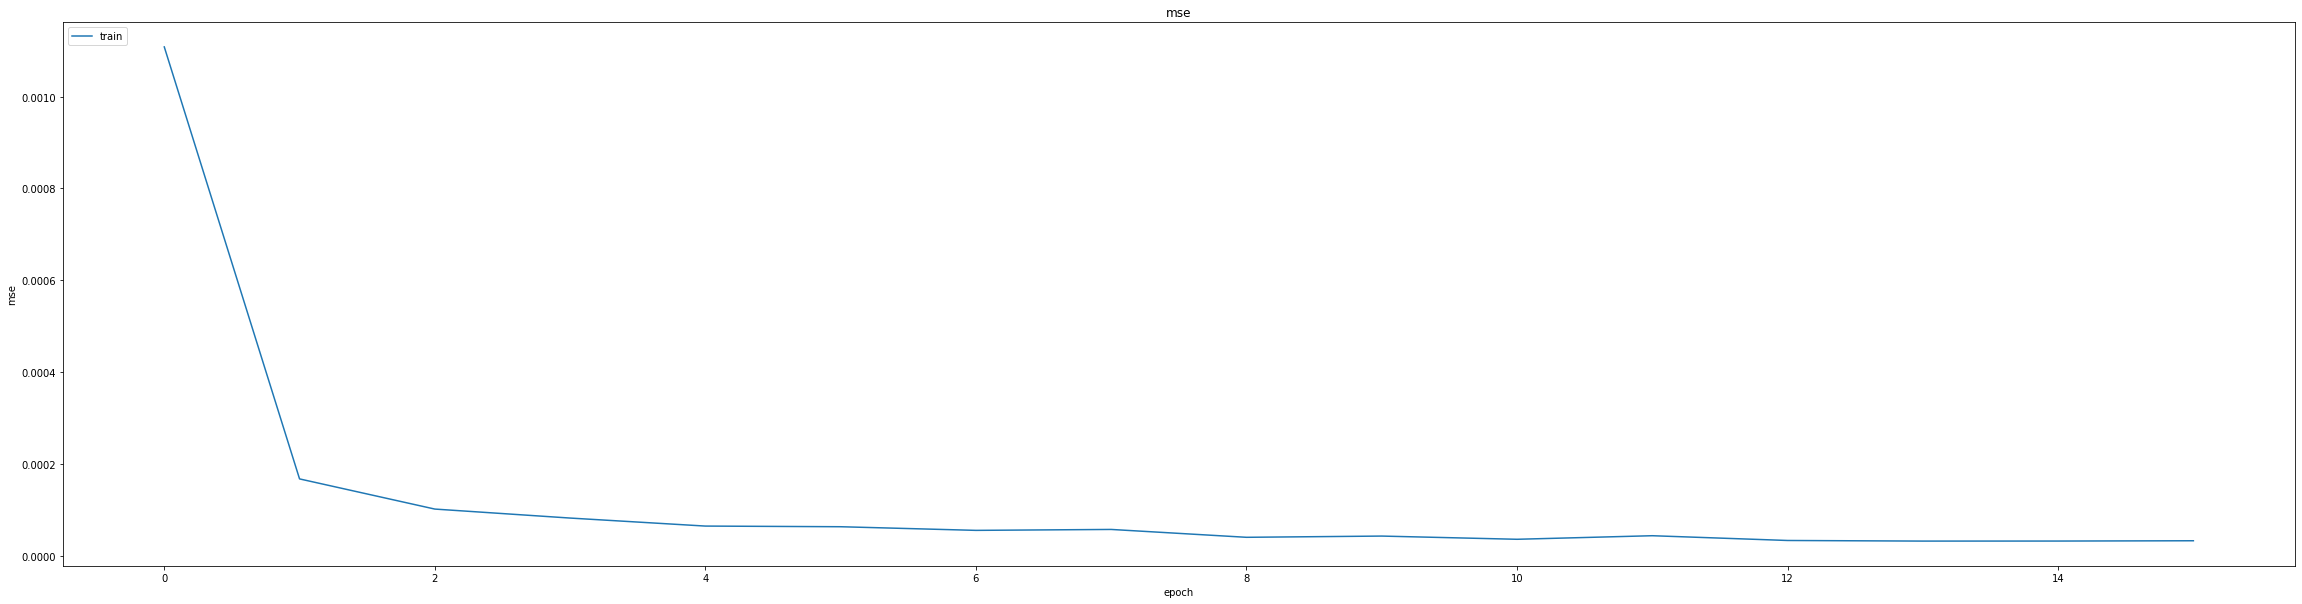

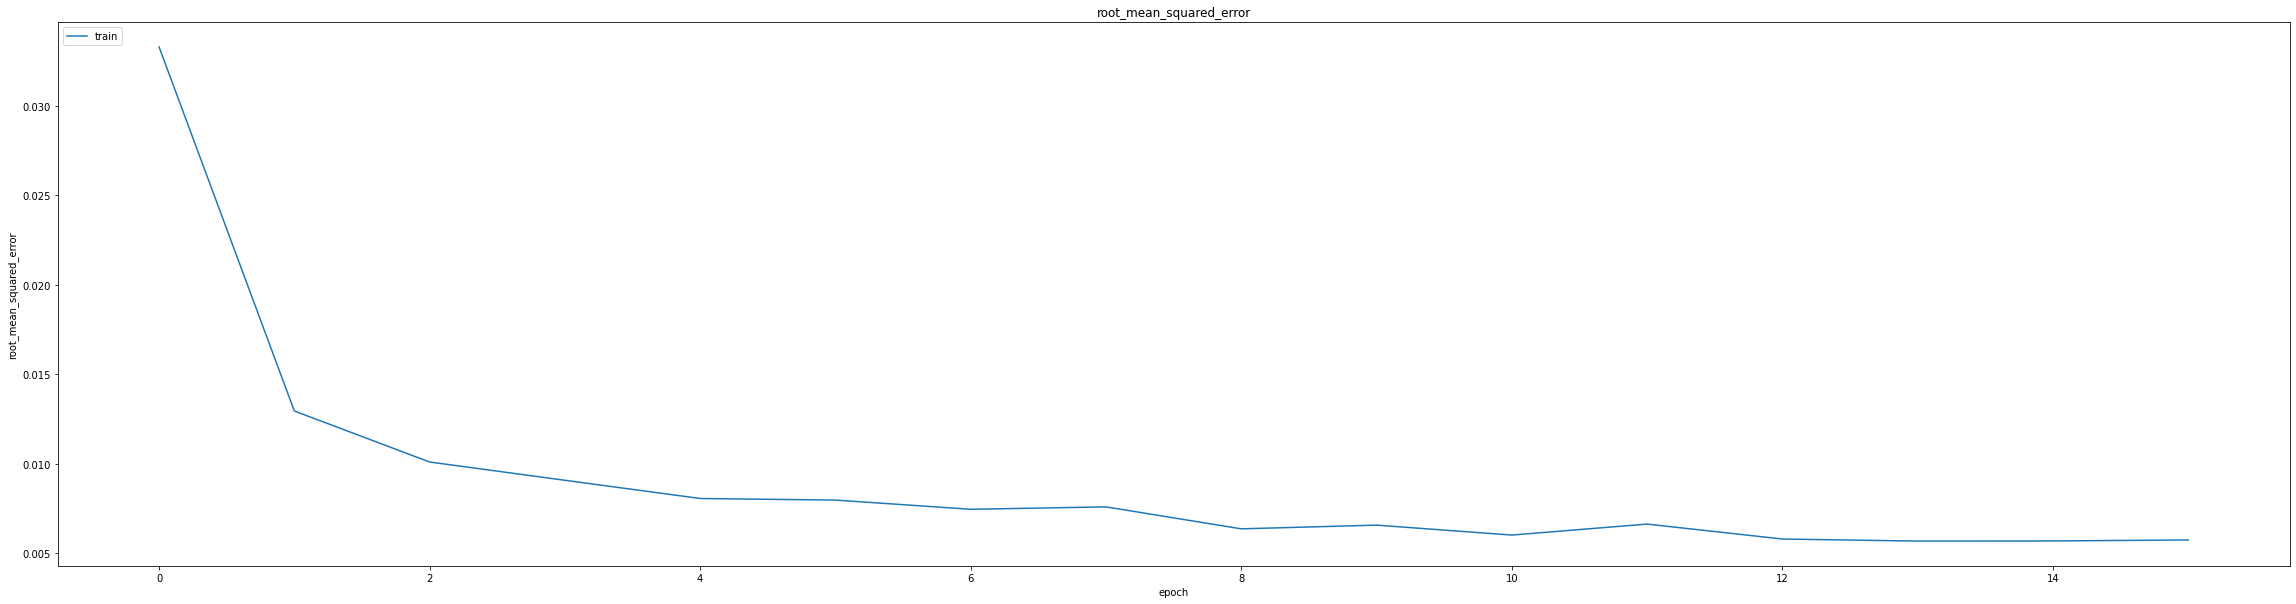

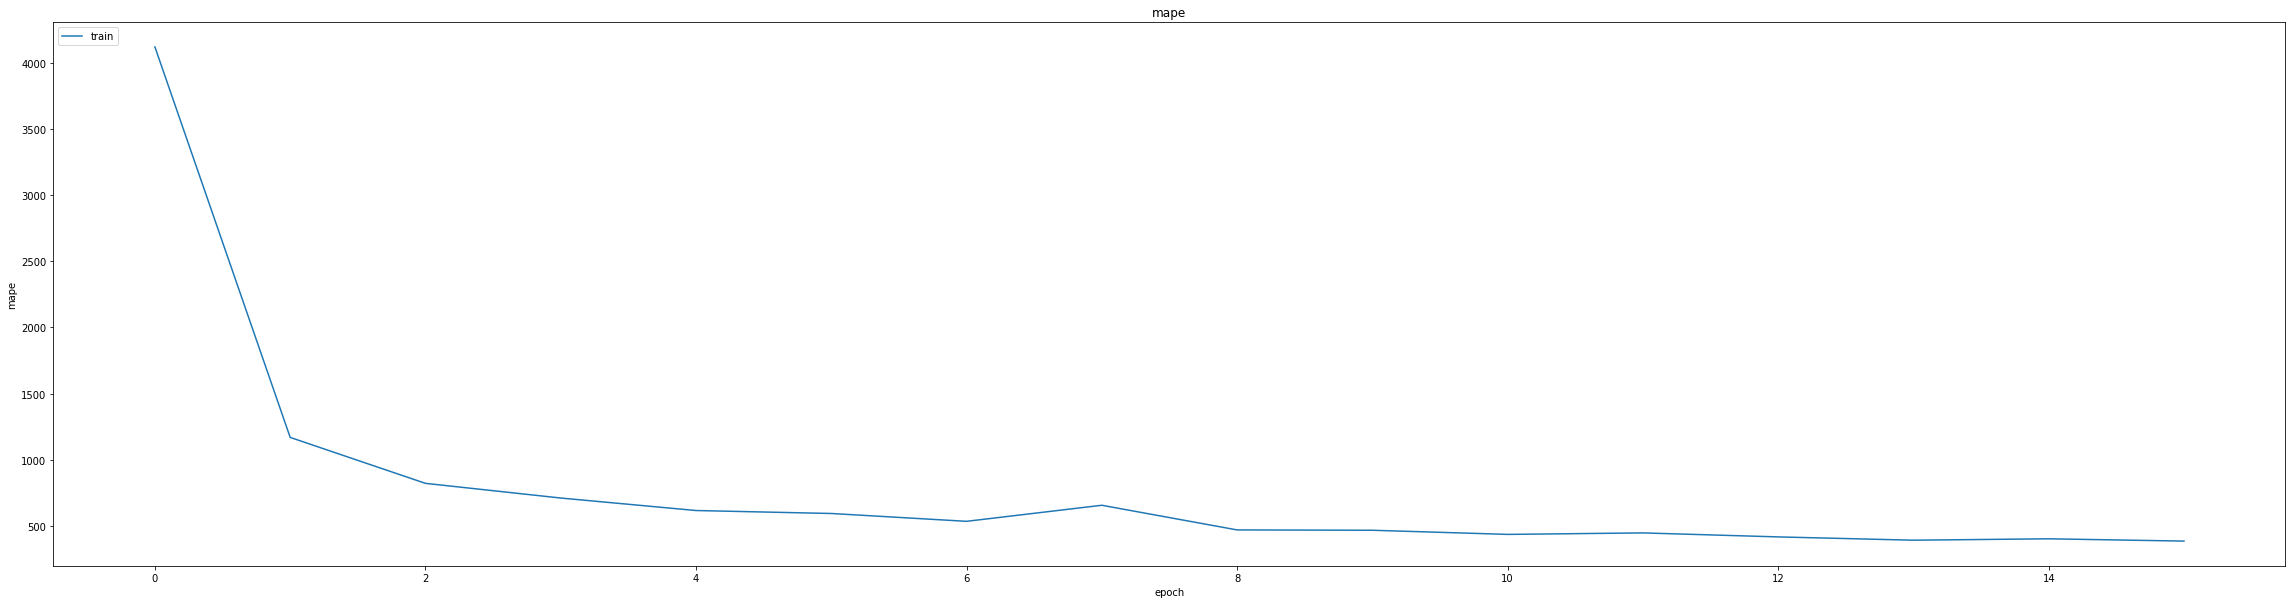

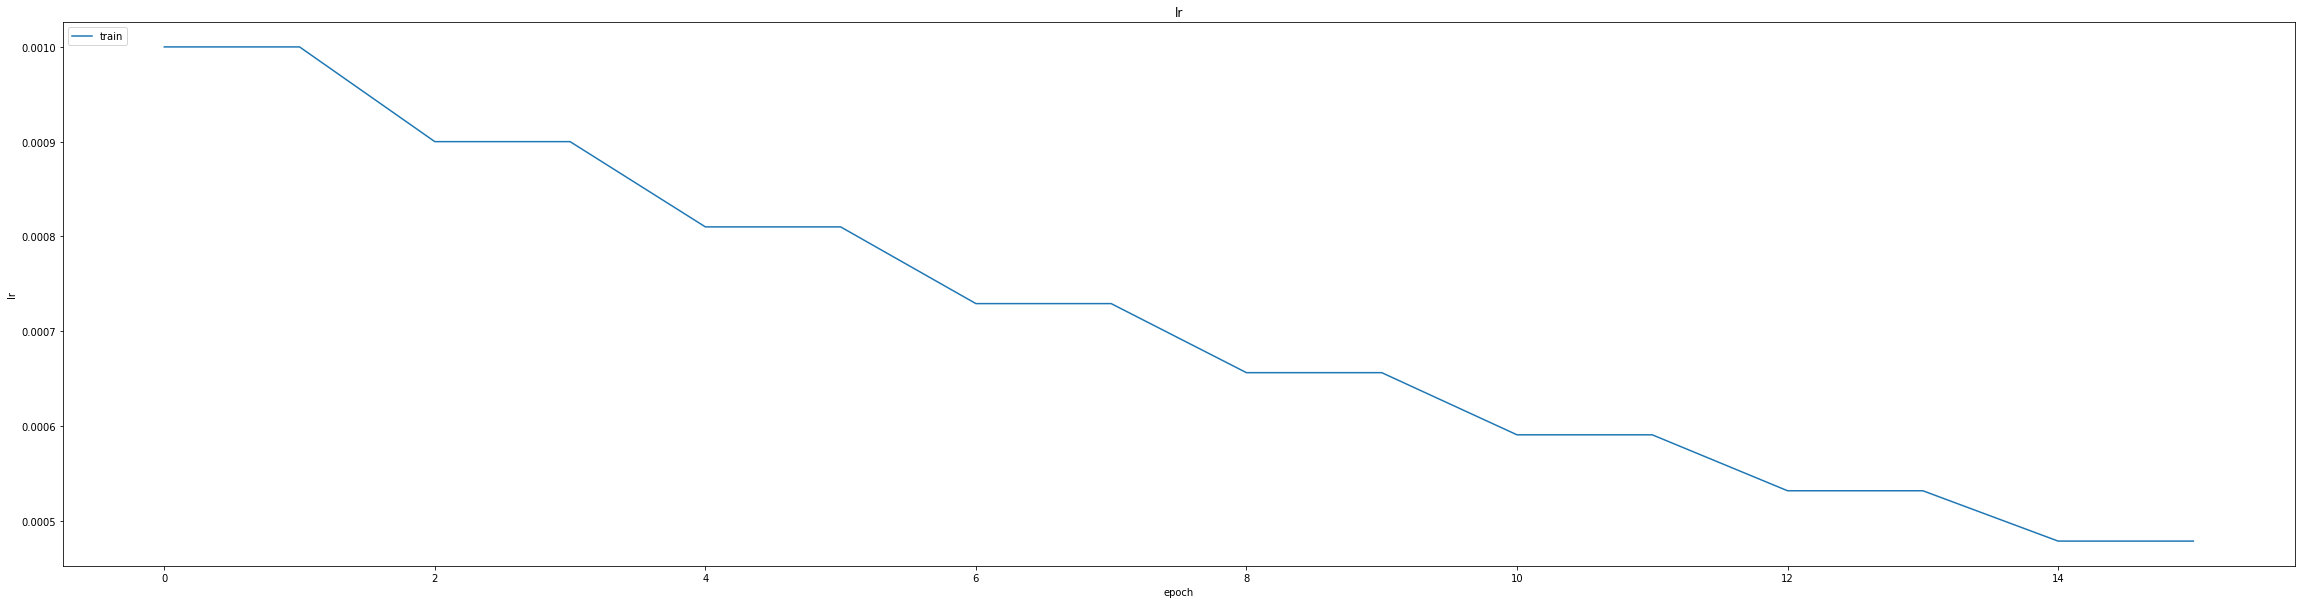

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008221170864999294
0.01355277094990015
1044/1044 [==============================] - 8s 6ms/step
0.9946091499372007


1044/1044 [==============================] - 7s 6ms/step


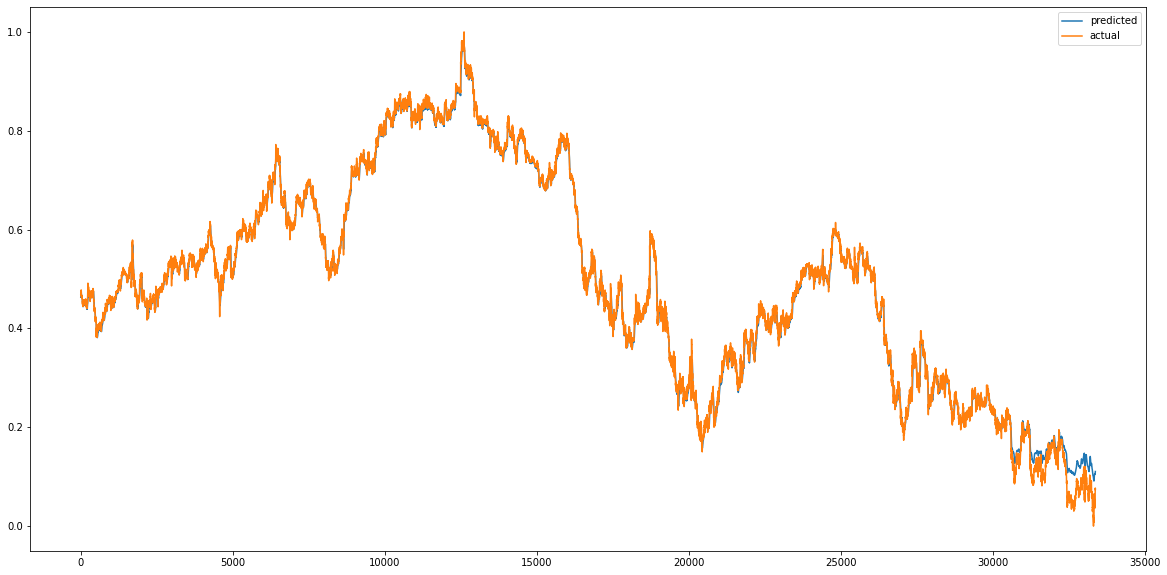

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 8s 7ms/step


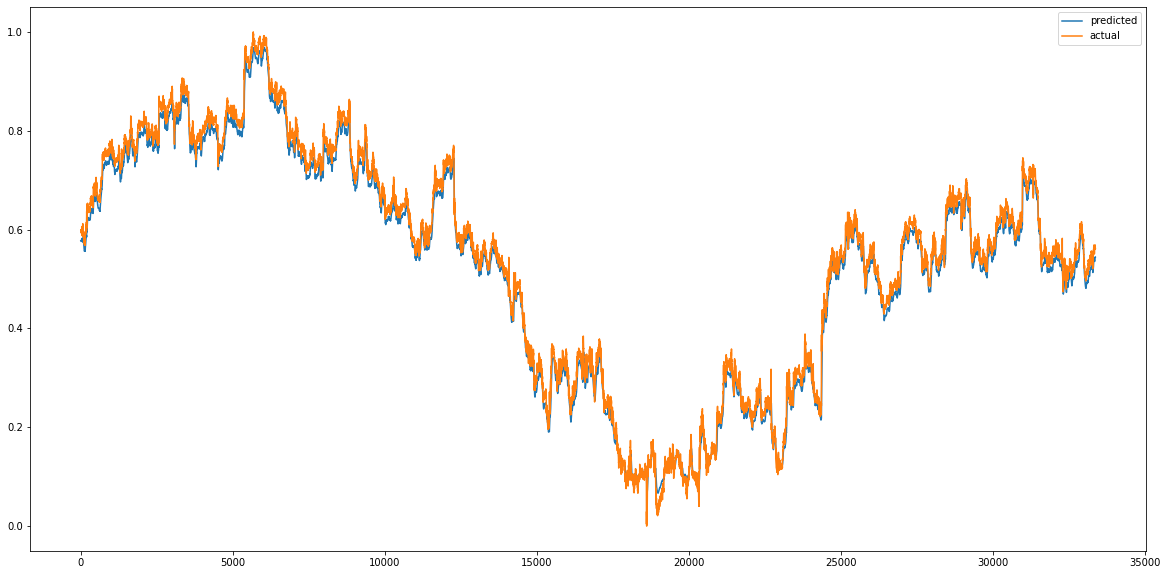

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00042689248609013625
RMSE :  0.020661376674610436
MAE :  0.01852211916000084
1044/1044 [==============================] - 7s 7ms/step
R2_Score  : 0.9923240690965739


count    33379.000000
mean        -0.016672
std          0.012204
min         -0.151918
25%         -0.022964
50%         -0.018274
75%         -0.012297
max          0.102159
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

In [36]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 486.7697 - mae: 7.7775 - mse: 486.7697 - root_mean_squared_error: 22.0629 - mape: 16606.9961
Epoch 1: val_mse improved from inf to 1.55710, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 23s 47ms/step - loss: 486.7697 - mae: 7.7775 - mse: 486.7697 - root_mean_squared_error: 22.0629 - mape: 16606.9961 - val_loss: 1.5571 - val_mae: 1.2287 - val_mse: 1.5571 - val_root_mean_squared_error: 1.2478 - val_mape: 52069.4609
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.5273 - mae: 0.6650 - mse: 0.5273 - root_mean_squared_error: 0.7262 - mape: 9378.4453
Epoch 2: val_mse improved from 1.55710 to 0.32648, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.5266 - mae: 0.6644 - mse: 0.5266 - root_mean_squared_error: 0.7256 - mape: 9359.4482 - val_loss: 0.3265 - val_mae: 0.5283 - val_mse: 0.3265 - val_root_mean_squared_error: 0.5714 - val_mape: 30881.0664
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.1056 - mae: 0.2633 - mse: 0.1056 - root_mean_squared_error: 0.3250 - mape: 5270.2134
Epoch 3: val_mse improved from 0.32648 to 0.14300, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.1056 - mae: 0.2633 - mse: 0.1056 - root_mean_squared_error: 0.3250 - mape: 5270.2134 - val_loss: 0.1430 - val_mae: 0.3190 - val_mse: 0.1430 - val_root_mean_squared_error: 0.3781 - val_mape: 24254.5078
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0469 - mae: 0.1630 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 4999.0073
Epoch 4: val_mse improved from 0.14300 to 0.09443, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0469 - mae: 0.1630 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 4999.0073 - val_loss: 0.0944 - val_mae: 0.2555 - val_mse: 0.0944 - val_root_mean_squared_error: 0.3073 - val_mape: 21465.2969
Epoch 5/60
402/405 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1457 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 4621.6177
Epoch 5: val_mse improved from 0.09443 to 0.07854, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0364 - mae: 0.1458 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 4589.5996 - val_loss: 0.0785 - val_mae: 0.2333 - val_mse: 0.0785 - val_root_mean_squared_error: 0.2803 - val_mape: 20246.1289
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0347 - mae: 0.1449 - mse: 0.0347 - root_mean_squared_error: 0.1862 - mape: 4563.4692
Epoch 6: val_mse improved from 0.07854 to 0.07306, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0347 - mae: 0.1449 - mse: 0.0347 - root_mean_squared_error: 0.1862 - mape: 4543.0952 - val_loss: 0.0731 - val_mae: 0.2252 - val_mse: 0.0731 - val_root_mean_squared_error: 0.2703 - val_mape: 19755.2324
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0345 - mae: 0.1456 - mse: 0.0345 - root_mean_squared_error: 0.1857 - mape: 4017.8374
Epoch 7: val_mse improved from 0.07306 to 0.07125, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0345 - mae: 0.1456 - mse: 0.0345 - root_mean_squared_error: 0.1857 - mape: 4017.8374 - val_loss: 0.0712 - val_mae: 0.2224 - val_mse: 0.0712 - val_root_mean_squared_error: 0.2669 - val_mape: 19581.2617
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0344 - mae: 0.1460 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 4446.1792
Epoch 8: val_mse improved from 0.07125 to 0.07098, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0344 - mae: 0.1460 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 4446.1792 - val_loss: 0.0710 - val_mae: 0.2220 - val_mse: 0.0710 - val_root_mean_squared_error: 0.2664 - val_mape: 19555.1523
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0344 - mae: 0.1460 - mse: 0.0344 - root_mean_squared_error: 0.1854 - mape: 4886.3721
Epoch 9: val_mse did not improve from 0.07098
405/405 [==============================] - 7s 17ms/step - loss: 0.0344 - mae: 0.1460 - mse: 0.0344 - root_mean_squared_error: 0.1854 - mape: 4864.4634 - val_loss: 0.0711 - val_mae: 0.2222 - val_mse: 0.0711 - val_root_mean_squared_error: 0.2666 - val_mape: 19565.2969
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0344 - mae: 0.1458 - mse: 0.0344 - root_mean_squared_error: 0.1854 - mape: 4890.9248
Epoch 10: val_mse did not improve from 0.07098
405/405 [==============================] - 6s 16ms/step -

405/405 [==============================] - 18s 44ms/step - loss: 0.0317 - mae: 0.1385 - mse: 0.0317 - root_mean_squared_error: 0.1779 - mape: 4105.5508 - val_loss: 0.0701 - val_mae: 0.2185 - val_mse: 0.0701 - val_root_mean_squared_error: 0.2648 - val_mape: 19575.4863
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 0.0271 - mae: 0.1257 - mse: 0.0271 - root_mean_squared_error: 0.1645 - mape: 4149.1353
Epoch 27: val_mse improved from 0.07014 to 0.05685, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0270 - mae: 0.1256 - mse: 0.0270 - root_mean_squared_error: 0.1644 - mape: 4120.3447 - val_loss: 0.0569 - val_mae: 0.1913 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2384 - val_mape: 18526.7910
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 0.0193 - mae: 0.1029 - mse: 0.0193 - root_mean_squared_error: 0.1388 - mape: 3697.5227
Epoch 28: val_mse improved from 0.05685 to 0.03441, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 19s 46ms/step - loss: 0.0192 - mae: 0.1028 - mse: 0.0192 - root_mean_squared_error: 0.1387 - mape: 3680.9277 - val_loss: 0.0344 - val_mae: 0.1354 - val_mse: 0.0344 - val_root_mean_squared_error: 0.1855 - val_mape: 16246.3994
Epoch 29/60
402/405 [============================>.] - ETA: 0s - loss: 0.0107 - mae: 0.0774 - mse: 0.0107 - root_mean_squared_error: 0.1033 - mape: 3026.2781
Epoch 29: val_mse improved from 0.03441 to 0.01385, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0106 - mae: 0.0773 - mse: 0.0106 - root_mean_squared_error: 0.1031 - mape: 3005.2461 - val_loss: 0.0139 - val_mae: 0.0879 - val_mse: 0.0139 - val_root_mean_squared_error: 0.1177 - val_mape: 12287.1621
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0524 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 2060.2185
Epoch 30: val_mse improved from 0.01385 to 0.00559, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0049 - mae: 0.0524 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 2060.2185 - val_loss: 0.0056 - val_mae: 0.0605 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0747 - val_mape: 8919.0225
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0369 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 2032.9504
Epoch 31: val_mse improved from 0.00559 to 0.00271, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 45ms/step - loss: 0.0024 - mae: 0.0369 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 2023.8080 - val_loss: 0.0027 - val_mae: 0.0360 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0521 - val_mape: 7728.6689
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 1523.5813
Epoch 32: val_mse improved from 0.00271 to 0.00214, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 1516.7352 - val_loss: 0.0021 - val_mae: 0.0343 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 6932.6191
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1494.7477
Epoch 33: val_mse did not improve from 0.00214
405/405 [==============================] - 7s 16ms/step - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1491.7083 - val_loss: 0.0022 - val_mae: 0.0386 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 6386.1372
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 8.4288e-04 - mae: 0.0220 - mse: 8.4288e-04 - root_mean_squared_error: 0.0290 - mape: 1228.9222
Epoch 34: val_mse improved from 0.00214 to 0.00133, saving model to /content/drive/MyDrive/model

405/405 [==============================] - 18s 44ms/step - loss: 8.4288e-04 - mae: 0.0220 - mse: 8.4288e-04 - root_mean_squared_error: 0.0290 - mape: 1228.9222 - val_loss: 0.0013 - val_mae: 0.0251 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 6104.7197
Epoch 35/60
403/405 [============================>.] - ETA: 0s - loss: 6.8922e-04 - mae: 0.0198 - mse: 6.8922e-04 - root_mean_squared_error: 0.0263 - mape: 1282.5229
Epoch 35: val_mse improved from 0.00133 to 0.00120, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 6.8963e-04 - mae: 0.0198 - mse: 6.8963e-04 - root_mean_squared_error: 0.0263 - mape: 1276.7582 - val_loss: 0.0012 - val_mae: 0.0244 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 5849.7847
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 6.7025e-04 - mae: 0.0196 - mse: 6.7025e-04 - root_mean_squared_error: 0.0259 - mape: 1375.0526
Epoch 36: val_mse did not improve from 0.00120
405/405 [==============================] - 6s 16ms/step - loss: 6.6986e-04 - mae: 0.0196 - mse: 6.6986e-04 - root_mean_squared_error: 0.0259 - mape: 1365.4788 - val_loss: 0.0016 - val_mae: 0.0332 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 5694.7339
Epoch 37/60
402/405 [============================>.] - ETA: 0s - loss: 6.2319e-04 - mae: 0.0189 - mse: 6.2319e-04 - root_mean_squared_error: 0.0250 - mape: 1215.1466
Epoch 37: val_mse did not improve from 0.00120
405/405 [================

405/405 [==============================] - 17s 42ms/step - loss: 5.3147e-04 - mae: 0.0174 - mse: 5.3147e-04 - root_mean_squared_error: 0.0231 - mape: 1175.5055 - val_loss: 0.0012 - val_mae: 0.0244 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0339 - val_mape: 5373.7754
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 4.9966e-04 - mae: 0.0169 - mse: 4.9966e-04 - root_mean_squared_error: 0.0224 - mape: 1341.8027
Epoch 39: val_mse improved from 0.00115 to 0.00111, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 19s 47ms/step - loss: 4.9970e-04 - mae: 0.0169 - mse: 4.9970e-04 - root_mean_squared_error: 0.0224 - mape: 1339.0730 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 5209.9146
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 4.6460e-04 - mae: 0.0164 - mse: 4.6460e-04 - root_mean_squared_error: 0.0216 - mape: 1324.8779
Epoch 40: val_mse did not improve from 0.00111
405/405 [==============================] - 7s 16ms/step - loss: 4.6431e-04 - mae: 0.0164 - mse: 4.6431e-04 - root_mean_squared_error: 0.0215 - mape: 1322.1794 - val_loss: 0.0011 - val_mae: 0.0267 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 5046.6001
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 4.1617e-04 - mae: 0.0156 - mse: 4.1617e-04 - root_mean_squared_error: 0.0204 - mape: 1084.0101
Epoch 41: val_mse improved from 0.00111 to 0.00102, saving model to /con

405/405 [==============================] - 18s 44ms/step - loss: 4.1620e-04 - mae: 0.0156 - mse: 4.1620e-04 - root_mean_squared_error: 0.0204 - mape: 1081.8053 - val_loss: 0.0010 - val_mae: 0.0251 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 4882.0093
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 3.5409e-04 - mae: 0.0143 - mse: 3.5409e-04 - root_mean_squared_error: 0.0188 - mape: 1023.8765
Epoch 42: val_mse improved from 0.00102 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 3.5415e-04 - mae: 0.0143 - mse: 3.5415e-04 - root_mean_squared_error: 0.0188 - mape: 1021.8036 - val_loss: 7.0068e-04 - val_mae: 0.0187 - val_mse: 7.0068e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 4690.0239
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 3.1756e-04 - mae: 0.0135 - mse: 3.1756e-04 - root_mean_squared_error: 0.0178 - mape: 1062.9999
Epoch 43: val_mse did not improve from 0.00070
405/405 [==============================] - 7s 16ms/step - loss: 3.1742e-04 - mae: 0.0135 - mse: 3.1742e-04 - root_mean_squared_error: 0.0178 - mape: 1060.8353 - val_loss: 7.8833e-04 - val_mae: 0.0204 - val_mse: 7.8833e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 4439.2344
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 2.9471e-04 - mae: 0.0131 - mse: 2.9471e-04 - root_mean_squared_error: 0.0172 - mape: 1089.5532
Epoch 44: val_mse did not improve from 0.00070
405/405 [

405/405 [==============================] - 17s 42ms/step - loss: 1.9475e-04 - mae: 0.0107 - mse: 1.9475e-04 - root_mean_squared_error: 0.0140 - mape: 822.3315 - val_loss: 5.7983e-04 - val_mae: 0.0200 - val_mse: 5.7983e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 3507.6304
Epoch 49/60
404/405 [============================>.] - ETA: 0s - loss: 1.8556e-04 - mae: 0.0105 - mse: 1.8556e-04 - root_mean_squared_error: 0.0136 - mape: 713.9622
Epoch 49: val_mse improved from 0.00058 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 1.8594e-04 - mae: 0.0105 - mse: 1.8594e-04 - root_mean_squared_error: 0.0136 - mape: 712.5140 - val_loss: 5.7686e-04 - val_mae: 0.0191 - val_mse: 5.7686e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 3405.3760
Epoch 50/60
402/405 [============================>.] - ETA: 0s - loss: 1.7365e-04 - mae: 0.0102 - mse: 1.7365e-04 - root_mean_squared_error: 0.0132 - mape: 693.3507
Epoch 50: val_mse did not improve from 0.00058
405/405 [==============================] - 6s 16ms/step - loss: 1.7338e-04 - mae: 0.0102 - mse: 1.7338e-04 - root_mean_squared_error: 0.0132 - mape: 688.5214 - val_loss: 5.8635e-04 - val_mae: 0.0185 - val_mse: 5.8635e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 3344.6545
Epoch 51/60
404/405 [============================>.] - ETA: 0s - loss: 1.5113e-04 - mae: 0.0094 - mse: 1.5113e-04 - root_mean_squared_error: 0.0123 - mape: 661.2759
Epoch 51: val_mse improved from 0.00058 to 0.00054, saving m

405/405 [==============================] - 18s 44ms/step - loss: 1.5106e-04 - mae: 0.0094 - mse: 1.5106e-04 - root_mean_squared_error: 0.0123 - mape: 659.9299 - val_loss: 5.3535e-04 - val_mae: 0.0186 - val_mse: 5.3535e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 3224.4736
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 1.5630e-04 - mae: 0.0096 - mse: 1.5630e-04 - root_mean_squared_error: 0.0125 - mape: 682.6956
Epoch 52: val_mse did not improve from 0.00054
405/405 [==============================] - 7s 16ms/step - loss: 1.5607e-04 - mae: 0.0096 - mse: 1.5607e-04 - root_mean_squared_error: 0.0125 - mape: 679.6226 - val_loss: 7.2327e-04 - val_mae: 0.0229 - val_mse: 7.2327e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 3152.1123
Epoch 53/60
404/405 [============================>.] - ETA: 0s - loss: 1.6102e-04 - mae: 0.0098 - mse: 1.6102e-04 - root_mean_squared_error: 0.0127 - mape: 632.0112
Epoch 53: val_mse improved from 0.00054 to 0.00040, saving m

405/405 [==============================] - 19s 46ms/step - loss: 1.6100e-04 - mae: 0.0098 - mse: 1.6100e-04 - root_mean_squared_error: 0.0127 - mape: 630.7253 - val_loss: 3.9570e-04 - val_mae: 0.0152 - val_mse: 3.9570e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3103.0642
Epoch 54/60
404/405 [============================>.] - ETA: 0s - loss: 1.4618e-04 - mae: 0.0093 - mse: 1.4618e-04 - root_mean_squared_error: 0.0121 - mape: 630.6432
Epoch 54: val_mse did not improve from 0.00040
405/405 [==============================] - 7s 16ms/step - loss: 1.4604e-04 - mae: 0.0093 - mse: 1.4604e-04 - root_mean_squared_error: 0.0121 - mape: 629.3592 - val_loss: 4.9859e-04 - val_mae: 0.0175 - val_mse: 4.9859e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 3079.0059
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 1.2202e-04 - mae: 0.0085 - mse: 1.2202e-04 - root_mean_squared_error: 0.0110 - mape: 652.2626
Epoch 55: val_mse did not improve from 0.00040
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 1.3047e-04 - mae: 0.0088 - mse: 1.3047e-04 - root_mean_squared_error: 0.0114 - mape: 601.3672 - val_loss: 3.8702e-04 - val_mae: 0.0151 - val_mse: 3.8702e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 2976.5110
Epoch 57/60
403/405 [============================>.] - ETA: 0s - loss: 1.2653e-04 - mae: 0.0086 - mse: 1.2653e-04 - root_mean_squared_error: 0.0112 - mape: 706.4169
Epoch 57: val_mse did not improve from 0.00039
405/405 [==============================] - 7s 16ms/step - loss: 1.2626e-04 - mae: 0.0086 - mse: 1.2626e-04 - root_mean_squared_error: 0.0112 - mape: 703.2356 - val_loss: 6.5290e-04 - val_mae: 0.0198 - val_mse: 6.5290e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 3026.4500
Epoch 58/60
403/405 [============================>.] - ETA: 0s - loss: 1.2241e-04 - mae: 0.0086 - mse: 1.2241e-04 - root_mean_squared_error: 0.0111 - mape: 606.3314
Epoch 58: val_mse did not improve from 0.00039
405/405 [====

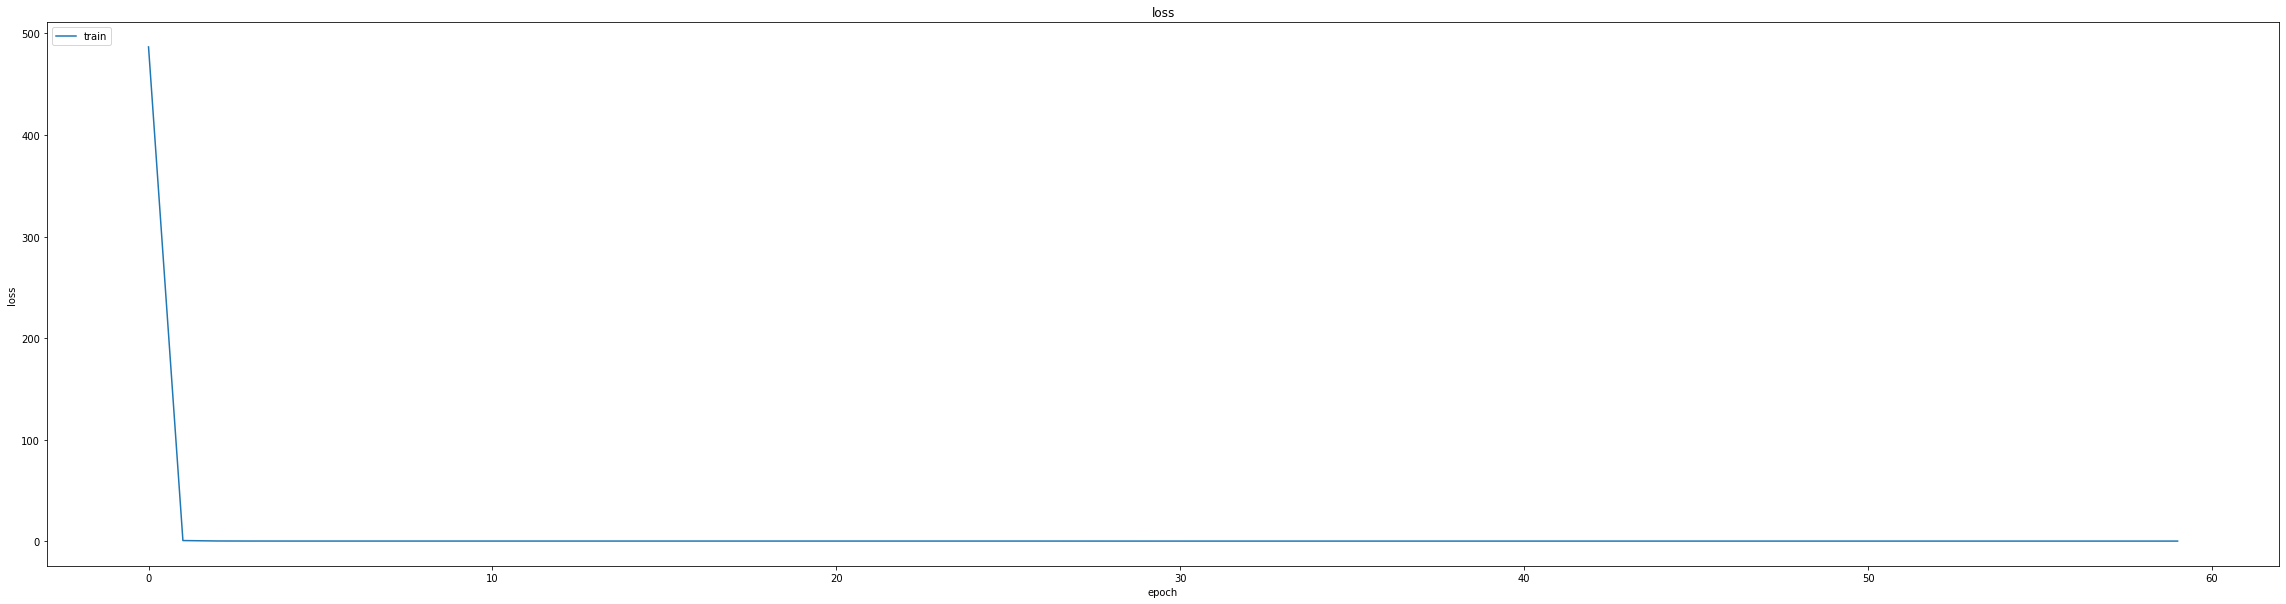

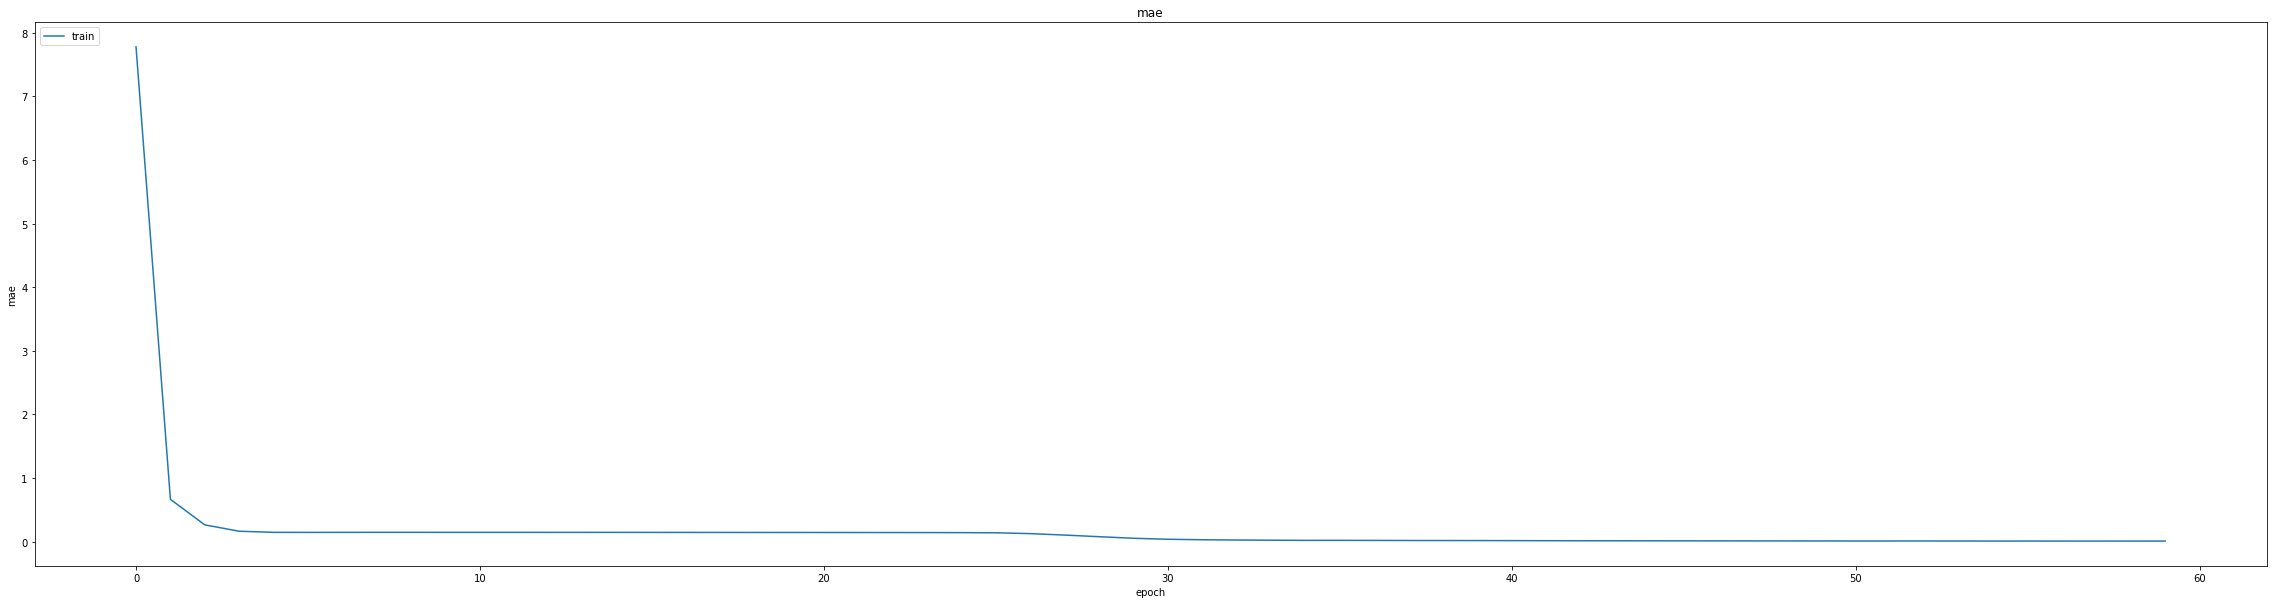

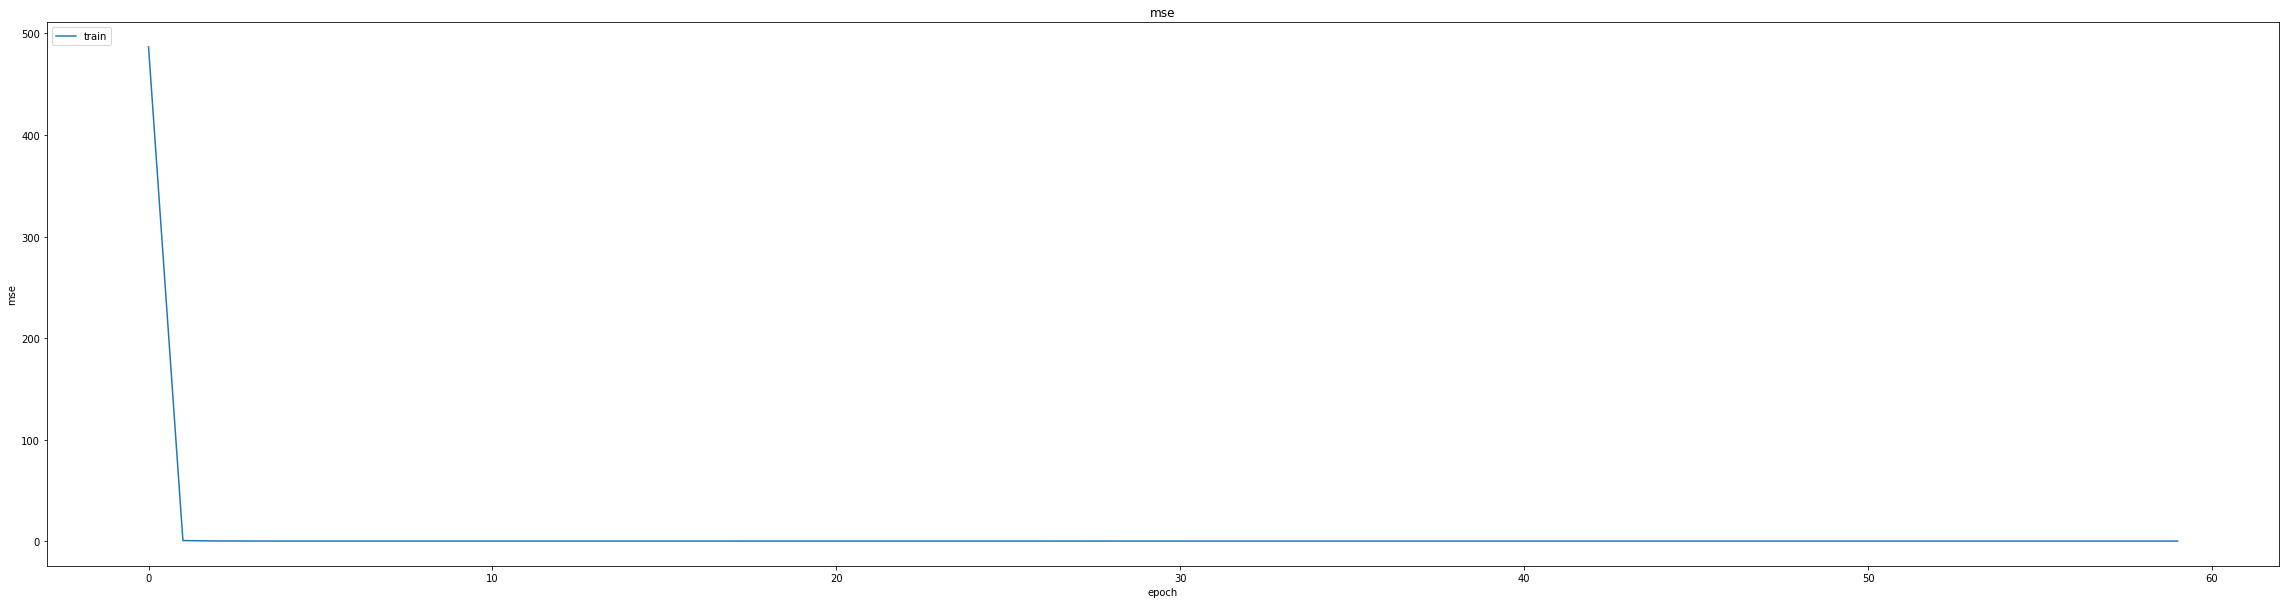

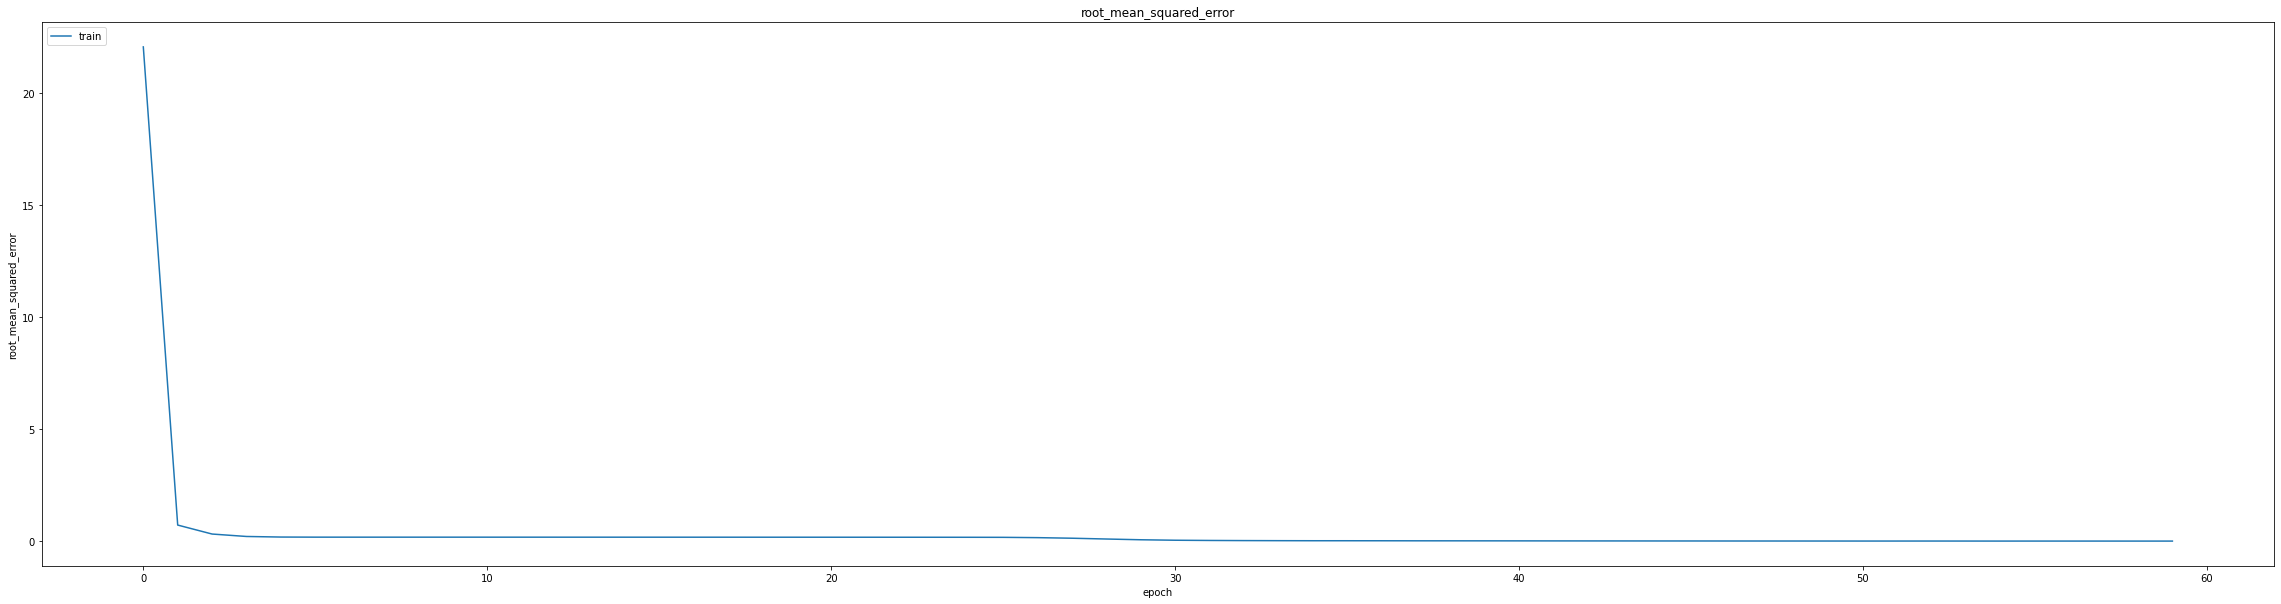

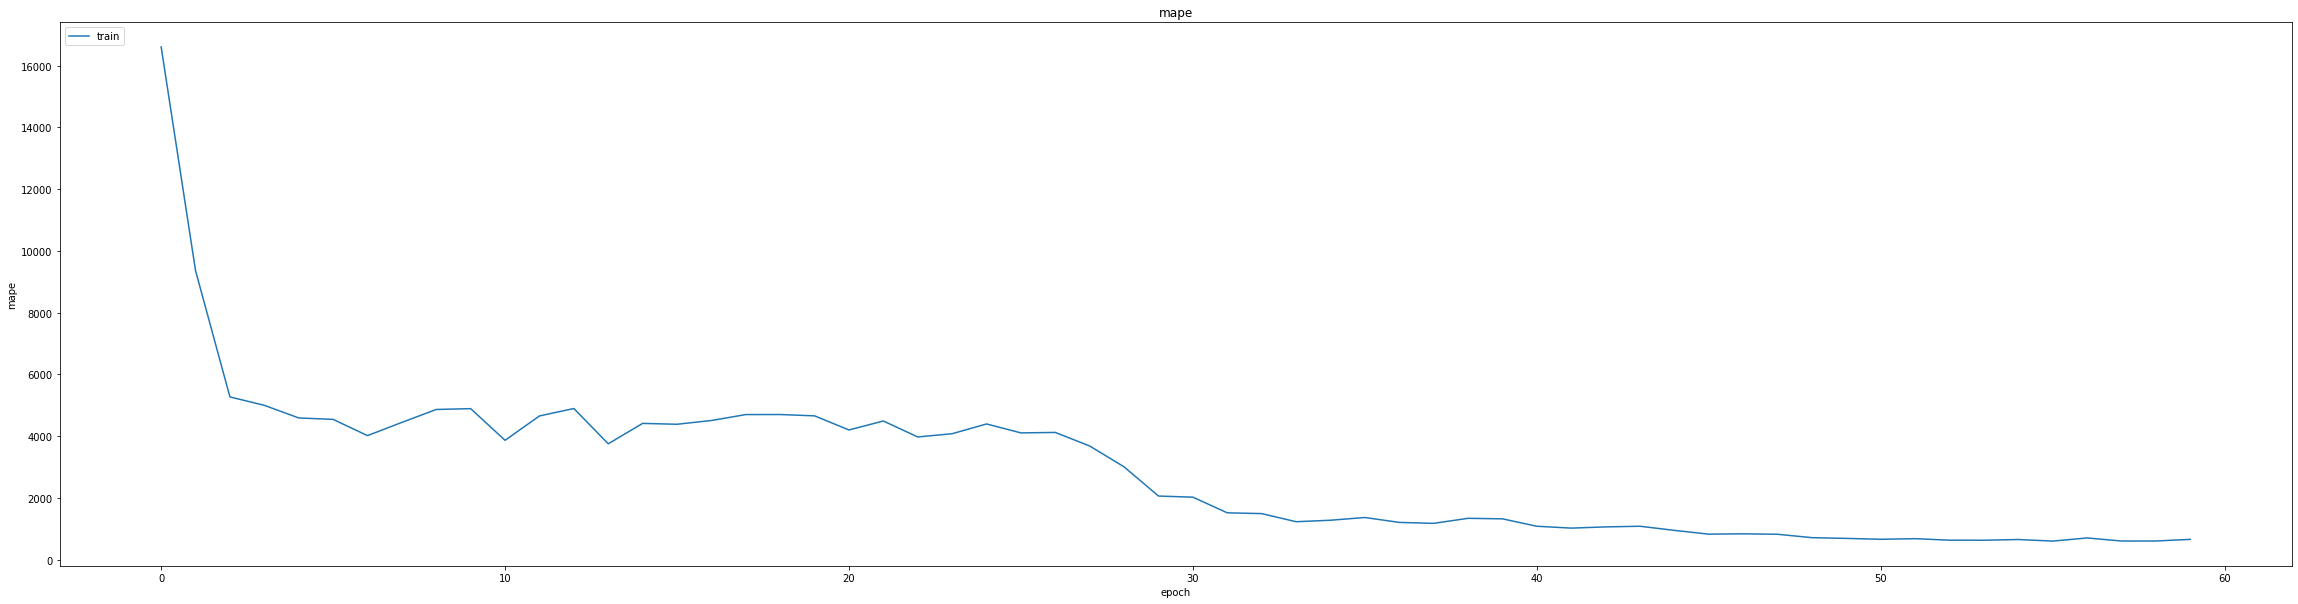

In [37]:
thesis.SummarizeHistory(history)

In [38]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015093025751411915
0.019672857597470284
1044/1044 [==============================] - 7s 6ms/step
0.9890353113245219


In [39]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [40]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
402/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0136 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 680.9918
Epoch 1: val_mse did not improve from 0.00039
405/405 [==============================] - 13s 18ms/step - loss: 0.0010 - mae: 0.0135 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 676.2463 - val_loss: 4.8577e-04 - val_mae: 0.0181 - val_mse: 4.8577e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 3050.6956 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 7.7606e-05 - mae: 0.0067 - mse: 7.7606e-05 - root_mean_squared_error: 0.0088 - mape: 690.1652
Epoch 2: val_mse did not improve from 0.00039
405/405 [==============================] - 6s 16ms/step - loss: 7.7622e-05 - mae: 0.0067 - mse: 7.7622e-05 - root_mean_squared_error: 0.0088 - mape: 685.3569 - val_loss: 4.6196e-04 - val_mae: 0.0178 - val_mse: 4.6196e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2957.3596 - lr: 0.0010
lr chan

405/405 [==============================] - 18s 45ms/step - loss: 7.2960e-05 - mae: 0.0065 - mse: 7.2960e-05 - root_mean_squared_error: 0.0085 - mape: 631.0451 - val_loss: 3.4778e-04 - val_mae: 0.0131 - val_mse: 3.4778e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2771.8132 - lr: 7.2900e-04
Epoch 8/20
403/405 [============================>.] - ETA: 0s - loss: 7.9865e-05 - mae: 0.0069 - mse: 7.9865e-05 - root_mean_squared_error: 0.0089 - mape: 561.2861
Epoch 8: val_mse did not improve from 0.00035
405/405 [==============================] - 6s 16ms/step - loss: 7.9745e-05 - mae: 0.0069 - mse: 7.9745e-05 - root_mean_squared_error: 0.0089 - mape: 558.7590 - val_loss: 4.7928e-04 - val_mae: 0.0176 - val_mse: 4.7928e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 2737.1008 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
403/405 [============================>.] - ETA: 0s - loss: 6.4385e-05 - mae: 0.0061 - mse: 6.4385e-05 - root_mean_squared_error: 0.0080 - mape: 53

405/405 [==============================] - 20s 50ms/step - loss: 5.9357e-05 - mae: 0.0059 - mse: 5.9357e-05 - root_mean_squared_error: 0.0077 - mape: 554.4051 - val_loss: 3.3769e-04 - val_mae: 0.0132 - val_mse: 3.3769e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 2691.6768 - lr: 5.9049e-04
Epoch 12/20
403/405 [============================>.] - ETA: 0s - loss: 6.3923e-05 - mae: 0.0061 - mse: 6.3923e-05 - root_mean_squared_error: 0.0080 - mape: 539.2111
Epoch 12: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 16ms/step - loss: 6.3875e-05 - mae: 0.0061 - mse: 6.3875e-05 - root_mean_squared_error: 0.0080 - mape: 536.7836 - val_loss: 4.6031e-04 - val_mae: 0.0176 - val_mse: 4.6031e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2629.3462 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
405/405 [==============================] - ETA: 0s - loss: 4.6686e-05 - mae: 0.0051 - mse: 4.6686e-05 - root_mean_squared_error: 0.0068 - mape:

405/405 [==============================] - 19s 47ms/step - loss: 4.4267e-05 - mae: 0.0050 - mse: 4.4267e-05 - root_mean_squared_error: 0.0067 - mape: 552.7986 - val_loss: 2.8003e-04 - val_mae: 0.0133 - val_mse: 2.8003e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 2439.5920 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
402/405 [============================>.] - ETA: 0s - loss: 3.7996e-05 - mae: 0.0046 - mse: 3.7996e-05 - root_mean_squared_error: 0.0062 - mape: 523.1051
Epoch 19: val_mse did not improve from 0.00028
405/405 [==============================] - 6s 16ms/step - loss: 3.8112e-05 - mae: 0.0046 - mse: 3.8112e-05 - root_mean_squared_error: 0.0062 - mape: 519.4623 - val_loss: 3.8141e-04 - val_mae: 0.0163 - val_mse: 3.8141e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2429.0996 - lr: 3.8742e-04
Epoch 20/20
404/405 [============================>.] - ETA: 0s - loss: 4.0498e-05 - mae: 0.0048 - mse: 4.0498e-05 - root_mean_squared_error: 0.0064 - mape

405/405 [==============================] - 18s 44ms/step - loss: 4.0501e-05 - mae: 0.0048 - mse: 4.0501e-05 - root_mean_squared_error: 0.0064 - mape: 514.5235 - val_loss: 2.4192e-04 - val_mae: 0.0121 - val_mse: 2.4192e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2343.2891 - lr: 3.8742e-04


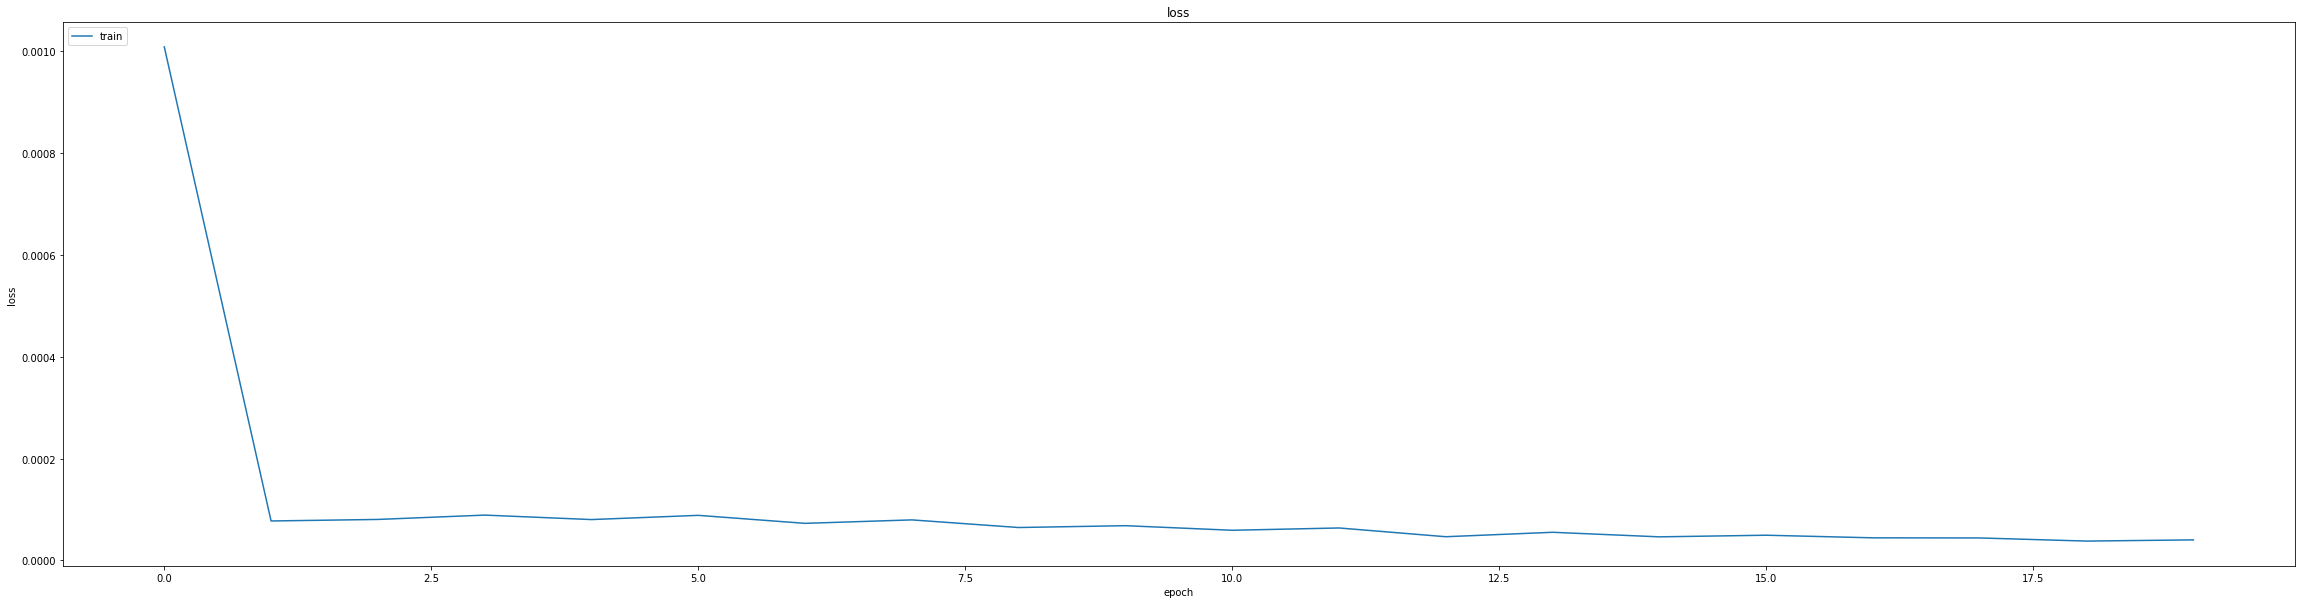

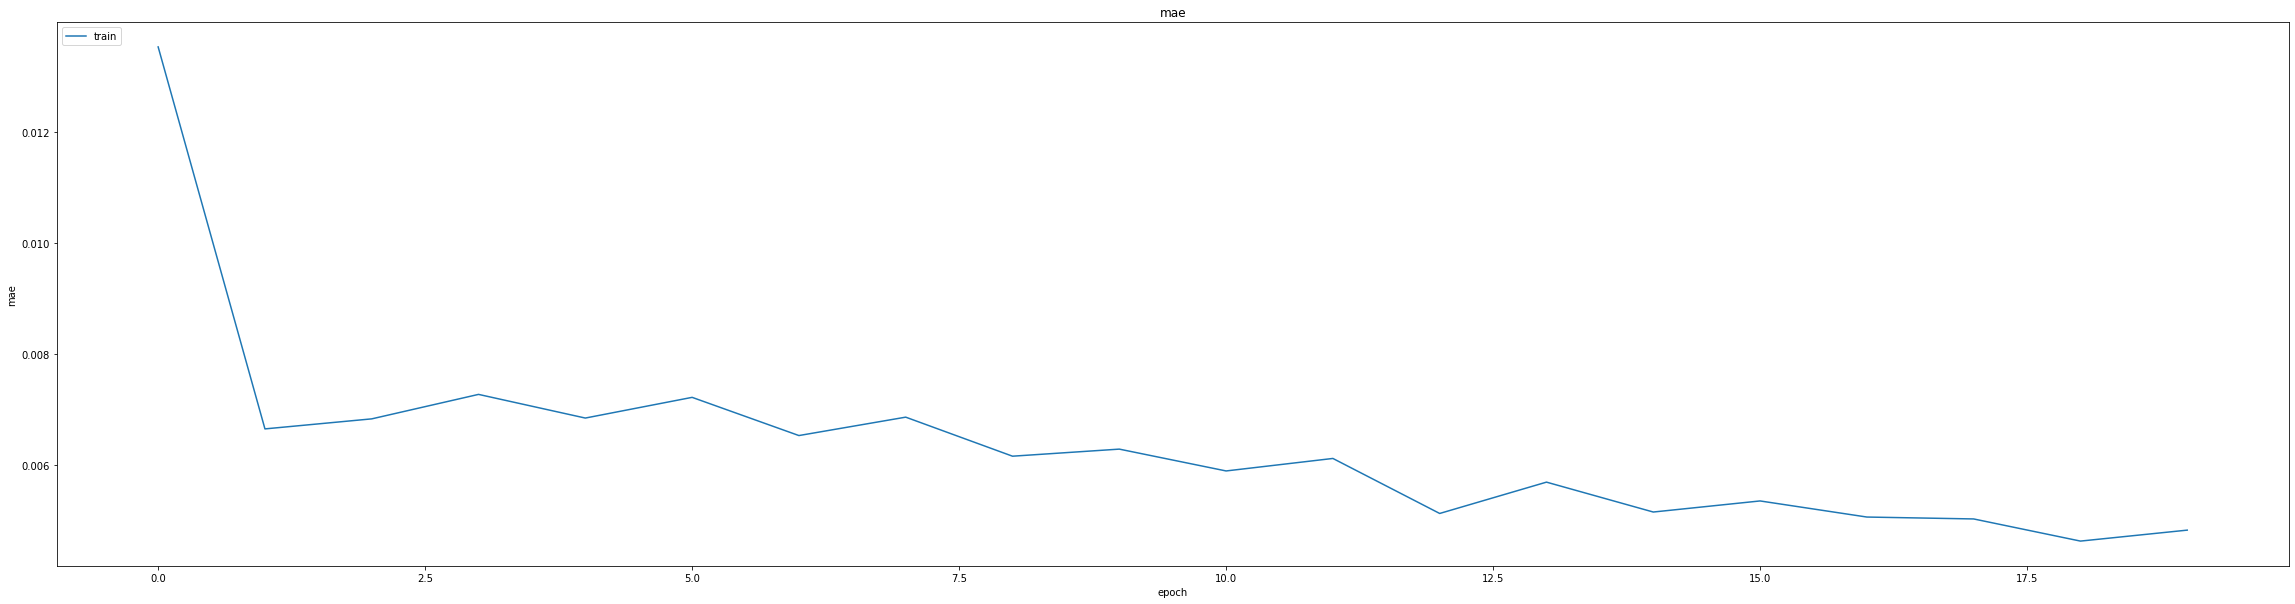

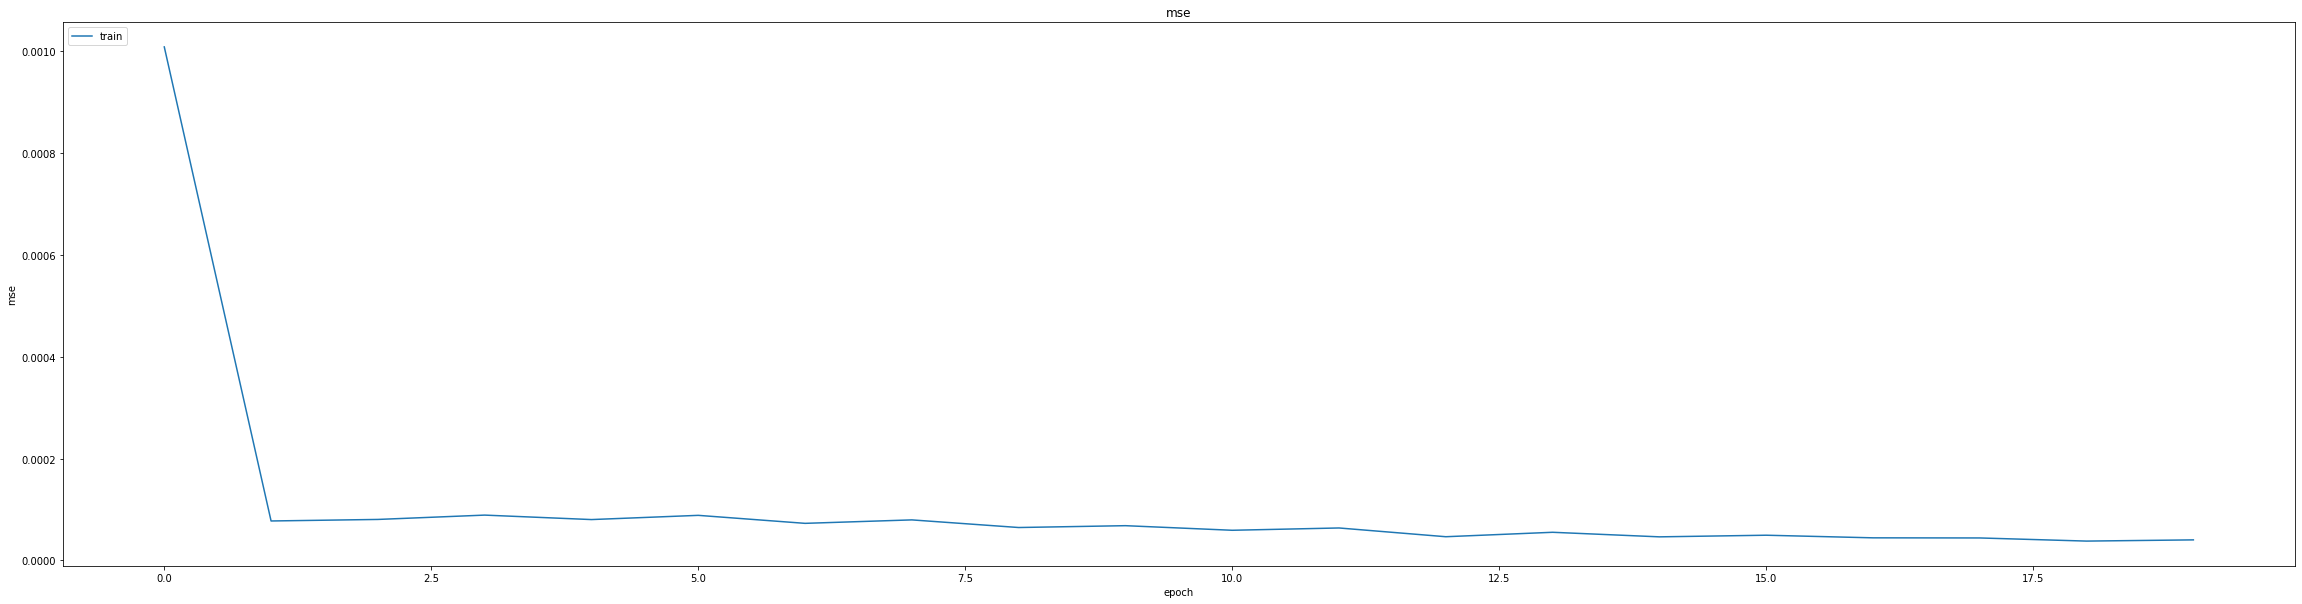

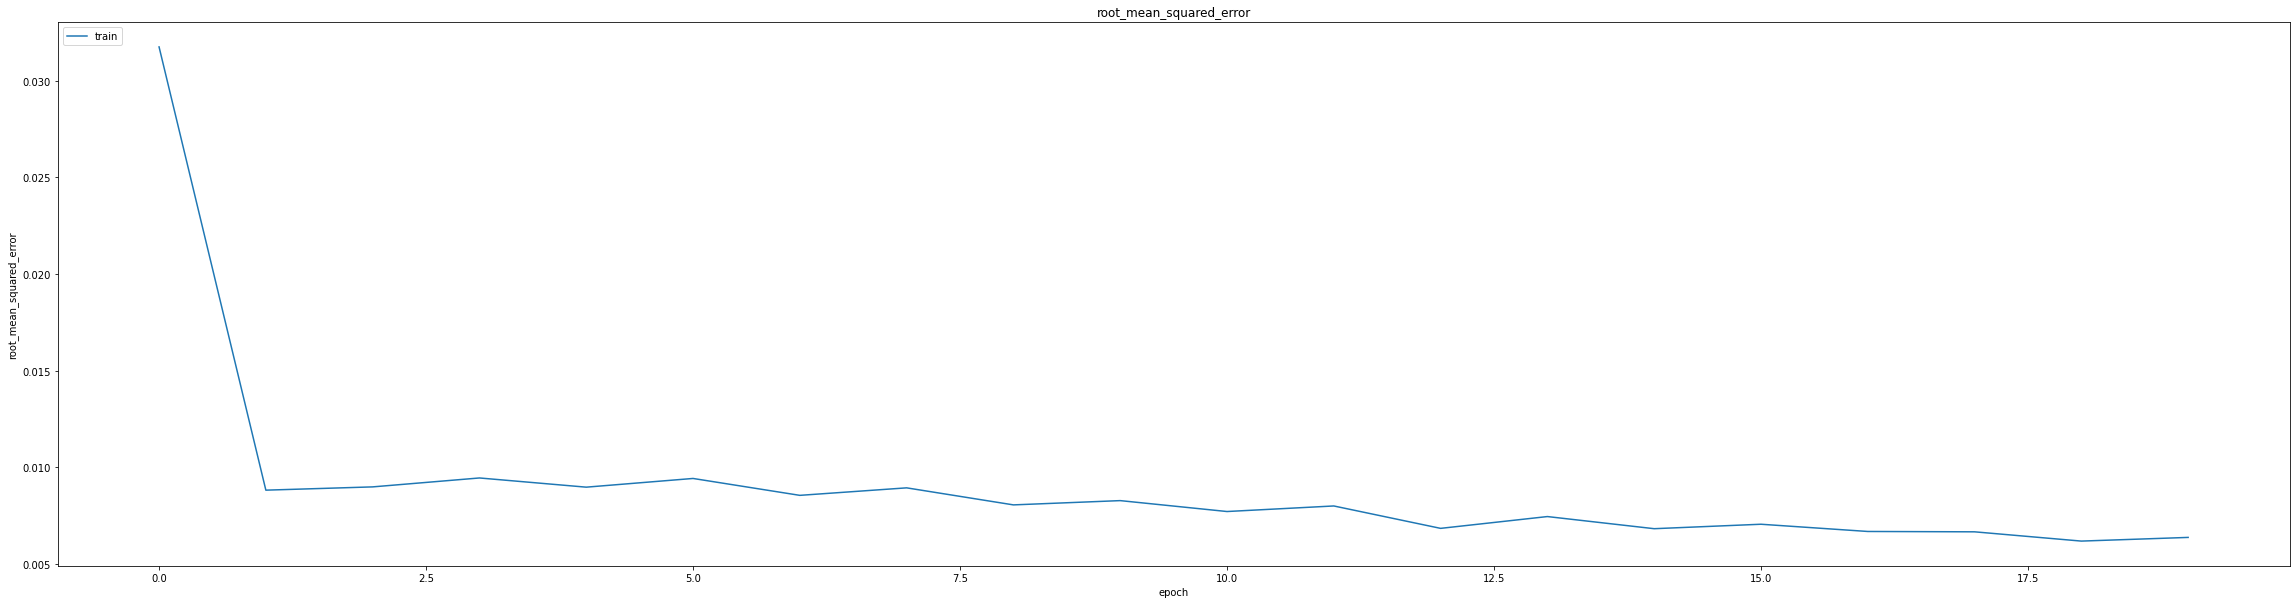

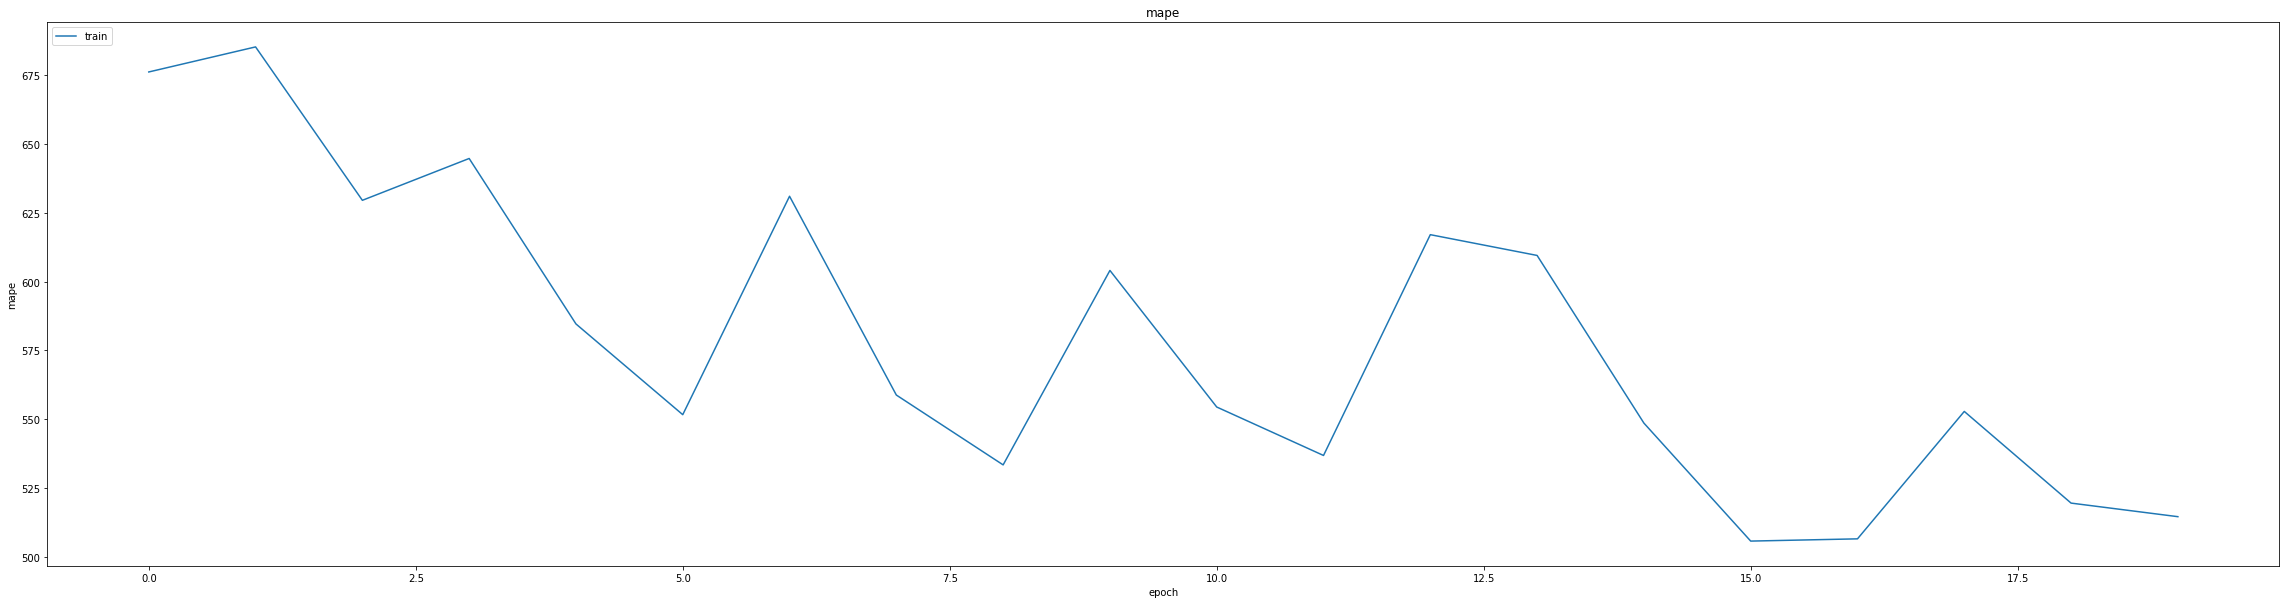

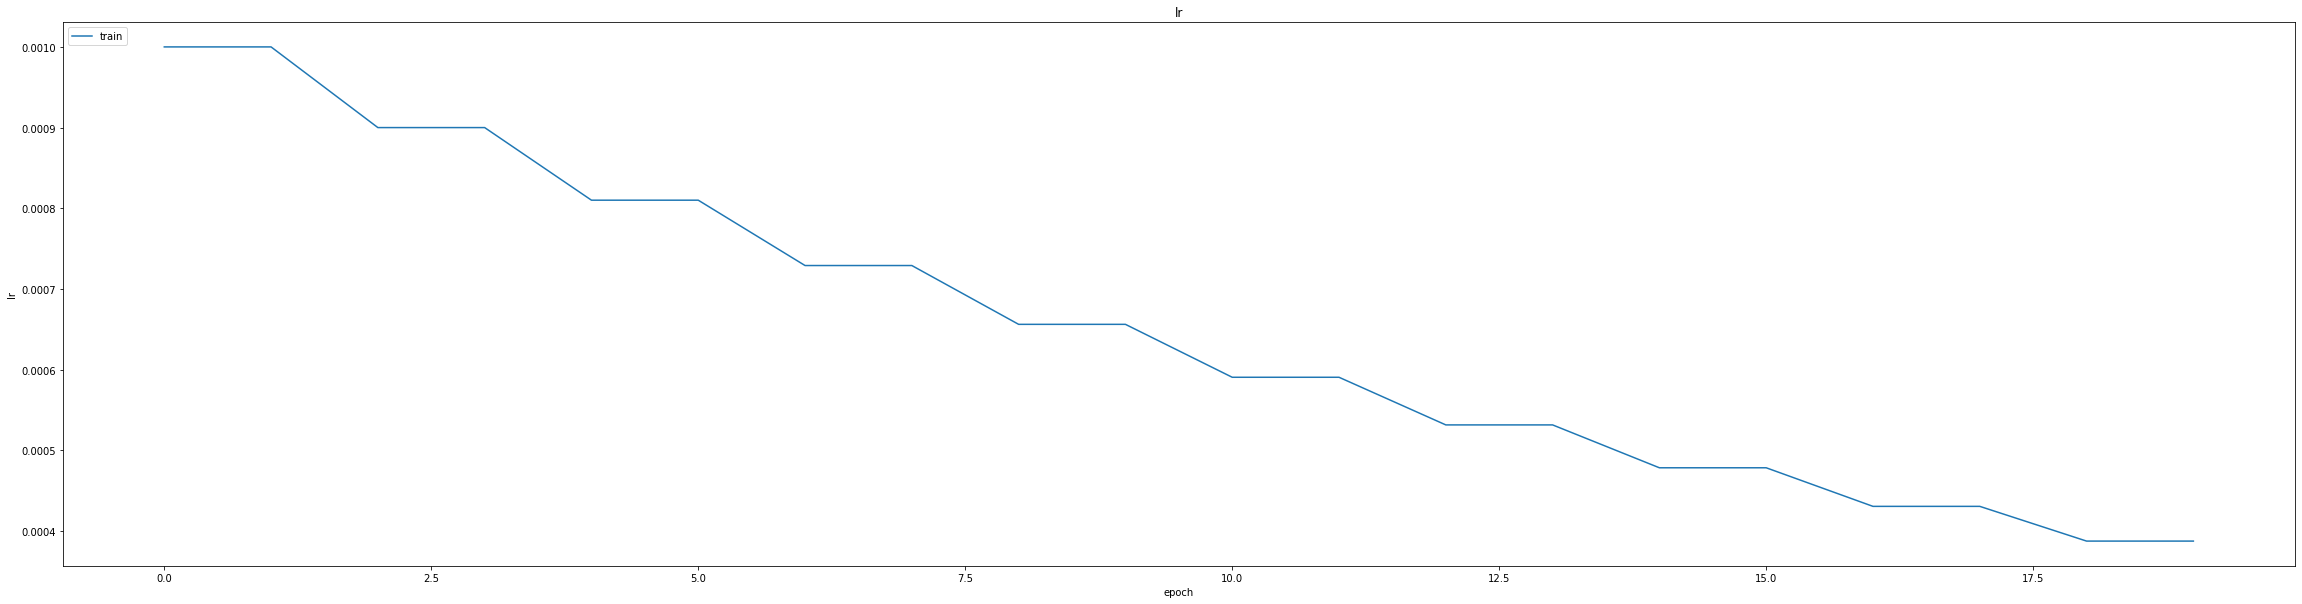

In [41]:
thesis.SummarizeHistory(history)

In [42]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012145856395363808
0.0155538534745574
1044/1044 [==============================] - 5s 4ms/step
0.9948938448852429


1044/1044 [==============================] - 4s 4ms/step


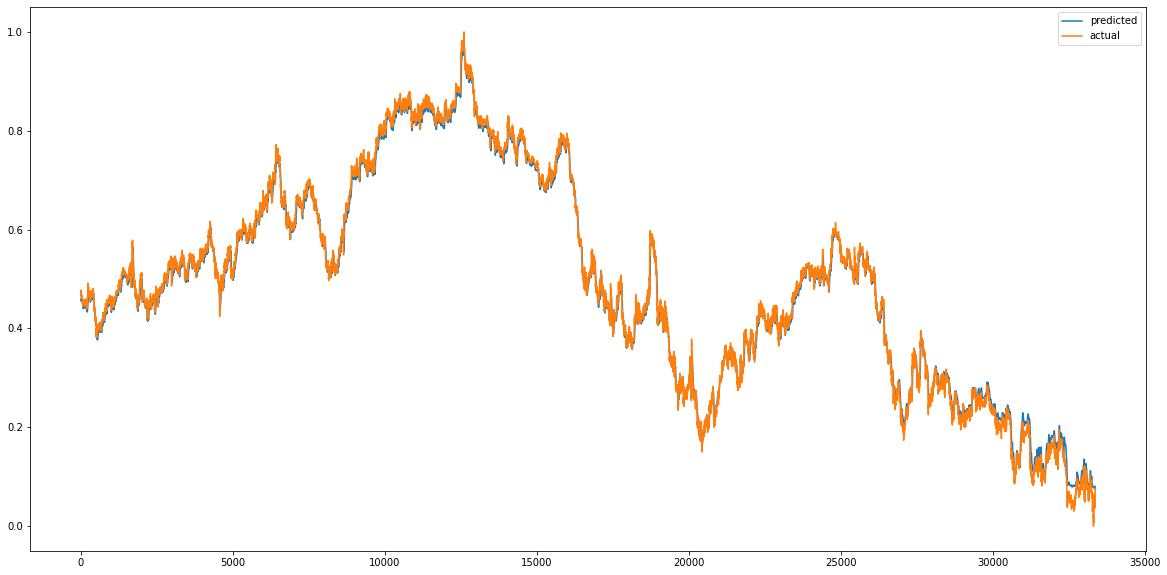

In [43]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


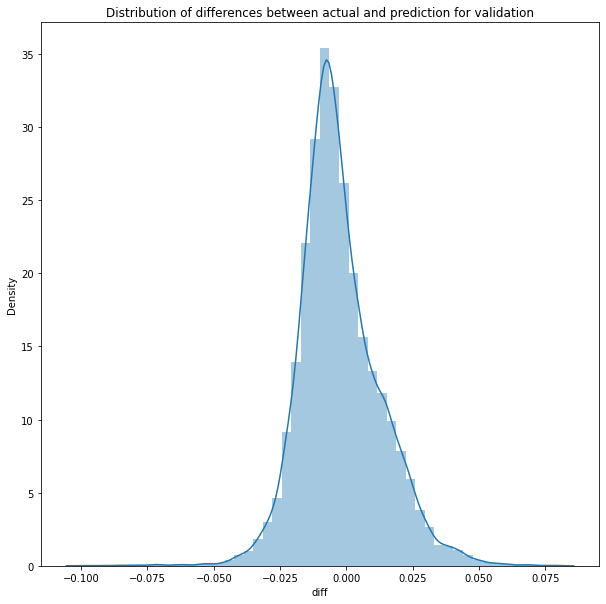

In [44]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


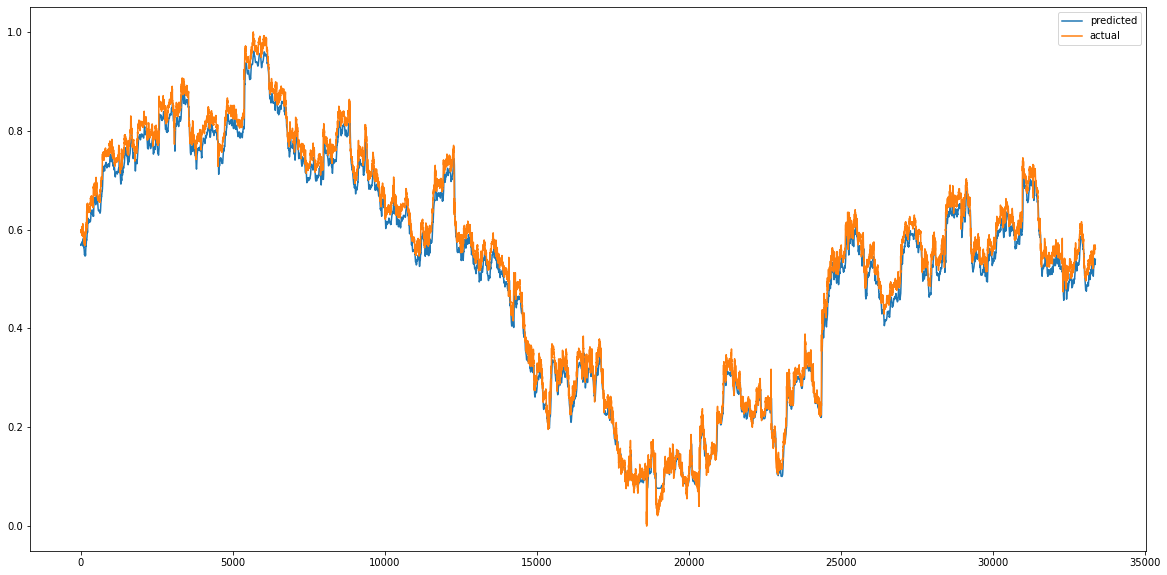

In [45]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


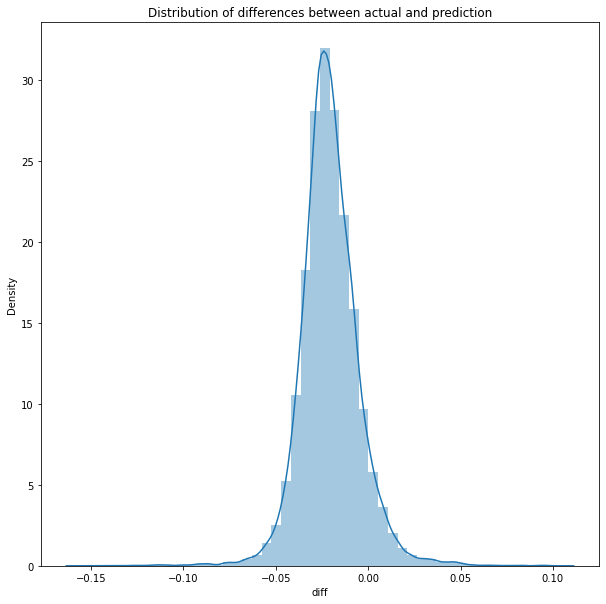

In [46]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006836770270890293
RMSE :  0.02614721834323929
MAE :  0.022592786486477973
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.987706840031455


count    33379.000000
mean        -0.020717
std          0.015953
min         -0.157447
25%         -0.029741
50%         -0.021607
75%         -0.012186
max          0.105262
Name: diff, dtype: float64

**GRU_MODEL**



In [48]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_3 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_3 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 16)                3936      
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [50]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [51]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 738.5709 - mae: 9.2082 - mse: 738.5709 - root_mean_squared_error: 27.1767 - mape: 1270252.6250
Epoch 1: val_mse improved from inf to 3.08919, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 21s 41ms/step - loss: 735.2524 - mae: 9.1742 - mse: 735.2524 - root_mean_squared_error: 27.1155 - mape: 1264524.5000 - val_loss: 3.0892 - val_mae: 1.7440 - val_mse: 3.0892 - val_root_mean_squared_error: 1.7576 - val_mape: 67716.7969
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 1.3043 - mae: 1.0949 - mse: 1.3043 - root_mean_squared_error: 1.1421 - mape: 13227.2754
Epoch 2: val_mse improved from 3.08919 to 0.75575, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 1.3043 - mae: 1.0949 - mse: 1.3043 - root_mean_squared_error: 1.1421 - mape: 13227.2754 - val_loss: 0.7557 - val_mae: 0.8415 - val_mse: 0.7557 - val_root_mean_squared_error: 0.8693 - val_mape: 40392.3633
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.3198 - mae: 0.5268 - mse: 0.3198 - root_mean_squared_error: 0.5655 - mape: 7068.7837
Epoch 3: val_mse improved from 0.75575 to 0.31007, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 38ms/step - loss: 0.3198 - mae: 0.5268 - mse: 0.3198 - root_mean_squared_error: 0.5655 - mape: 7068.7837 - val_loss: 0.3101 - val_mae: 0.5124 - val_mse: 0.3101 - val_root_mean_squared_error: 0.5568 - val_mape: 30426.3555
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.1137 - mae: 0.2827 - mse: 0.1137 - root_mean_squared_error: 0.3371 - mape: 5881.6763
Epoch 4: val_mse improved from 0.31007 to 0.16886, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.1136 - mae: 0.2826 - mse: 0.1136 - root_mean_squared_error: 0.3370 - mape: 5869.7842 - val_loss: 0.1689 - val_mae: 0.3519 - val_mse: 0.1689 - val_root_mean_squared_error: 0.4109 - val_mape: 25460.3027
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0559 - mae: 0.1802 - mse: 0.0559 - root_mean_squared_error: 0.2364 - mape: 5658.2207
Epoch 5: val_mse improved from 0.16886 to 0.11378, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0558 - mae: 0.1801 - mse: 0.0558 - root_mean_squared_error: 0.2363 - mape: 5632.8706 - val_loss: 0.1138 - val_mae: 0.2812 - val_mse: 0.1138 - val_root_mean_squared_error: 0.3373 - val_mape: 22710.8105
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0383 - mae: 0.1470 - mse: 0.0383 - root_mean_squared_error: 0.1958 - mape: 4852.3936
Epoch 6: val_mse improved from 0.11378 to 0.08968, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0383 - mae: 0.1469 - mse: 0.0383 - root_mean_squared_error: 0.1958 - mape: 4830.6484 - val_loss: 0.0897 - val_mae: 0.2490 - val_mse: 0.0897 - val_root_mean_squared_error: 0.2995 - val_mape: 21137.5195
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1373 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 4386.2095
Epoch 7: val_mse improved from 0.08968 to 0.07866, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0332 - mae: 0.1373 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 4377.3047 - val_loss: 0.0787 - val_mae: 0.2335 - val_mse: 0.0787 - val_root_mean_squared_error: 0.2805 - val_mape: 20265.5742
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0319 - mae: 0.1363 - mse: 0.0319 - root_mean_squared_error: 0.1785 - mape: 4721.1660
Epoch 8: val_mse improved from 0.07866 to 0.07372, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0319 - mae: 0.1363 - mse: 0.0319 - root_mean_squared_error: 0.1785 - mape: 4721.1660 - val_loss: 0.0737 - val_mae: 0.2261 - val_mse: 0.0737 - val_root_mean_squared_error: 0.2715 - val_mape: 19824.0957
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0316 - mae: 0.1367 - mse: 0.0316 - root_mean_squared_error: 0.1776 - mape: 4362.0610
Epoch 9: val_mse improved from 0.07372 to 0.07162, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0316 - mae: 0.1367 - mse: 0.0316 - root_mean_squared_error: 0.1776 - mape: 4353.2163 - val_loss: 0.0716 - val_mae: 0.2230 - val_mse: 0.0716 - val_root_mean_squared_error: 0.2676 - val_mape: 19624.1992
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0316 - mae: 0.1373 - mse: 0.0316 - root_mean_squared_error: 0.1777 - mape: 4406.3105
Epoch 10: val_mse improved from 0.07162 to 0.07093, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0316 - mae: 0.1373 - mse: 0.0316 - root_mean_squared_error: 0.1777 - mape: 4406.3105 - val_loss: 0.0709 - val_mae: 0.2219 - val_mse: 0.0709 - val_root_mean_squared_error: 0.2663 - val_mape: 19555.2266
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0315 - mae: 0.1373 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 4416.1772
Epoch 11: val_mse improved from 0.07093 to 0.07069, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0315 - mae: 0.1373 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 4407.2163 - val_loss: 0.0707 - val_mae: 0.2215 - val_mse: 0.0707 - val_root_mean_squared_error: 0.2659 - val_mape: 19529.3379
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0315 - mae: 0.1373 - mse: 0.0315 - root_mean_squared_error: 0.1773 - mape: 4272.9014
Epoch 12: val_mse improved from 0.07069 to 0.07068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 41ms/step - loss: 0.0315 - mae: 0.1373 - mse: 0.0315 - root_mean_squared_error: 0.1773 - mape: 4272.9014 - val_loss: 0.0707 - val_mae: 0.2215 - val_mse: 0.0707 - val_root_mean_squared_error: 0.2659 - val_mape: 19526.7148
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0314 - mae: 0.1371 - mse: 0.0314 - root_mean_squared_error: 0.1772 - mape: 4340.5098
Epoch 13: val_mse improved from 0.07068 to 0.07049, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0314 - mae: 0.1371 - mse: 0.0314 - root_mean_squared_error: 0.1772 - mape: 4321.0908 - val_loss: 0.0705 - val_mae: 0.2212 - val_mse: 0.0705 - val_root_mean_squared_error: 0.2655 - val_mape: 19505.5039
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 0.0314 - mae: 0.1371 - mse: 0.0314 - root_mean_squared_error: 0.1771 - mape: 4438.1338
Epoch 14: val_mse did not improve from 0.07049
405/405 [==============================] - 6s 15ms/step - loss: 0.0314 - mae: 0.1371 - mse: 0.0314 - root_mean_squared_error: 0.1771 - mape: 4429.1353 - val_loss: 0.0707 - val_mae: 0.2215 - val_mse: 0.0707 - val_root_mean_squared_error: 0.2658 - val_mape: 19519.9922
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0313 - mae: 0.1369 - mse: 0.0313 - root_mean_squared_error: 0.1769 - mape: 4296.1255
Epoch 15: val_mse improved from 0.07049 to 0.07035, saving model to /content/drive/MyDrive/modelweight

405/405 [==============================] - 16s 40ms/step - loss: 0.0313 - mae: 0.1369 - mse: 0.0313 - root_mean_squared_error: 0.1769 - mape: 4287.4116 - val_loss: 0.0704 - val_mae: 0.2210 - val_mse: 0.0704 - val_root_mean_squared_error: 0.2652 - val_mape: 19485.3477
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0312 - mae: 0.1366 - mse: 0.0312 - root_mean_squared_error: 0.1766 - mape: 4512.4951
Epoch 16: val_mse improved from 0.07035 to 0.07024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0312 - mae: 0.1366 - mse: 0.0312 - root_mean_squared_error: 0.1766 - mape: 4512.4951 - val_loss: 0.0702 - val_mae: 0.2208 - val_mse: 0.0702 - val_root_mean_squared_error: 0.2650 - val_mape: 19470.3516
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 0.0310 - mae: 0.1360 - mse: 0.0310 - root_mean_squared_error: 0.1759 - mape: 4311.5122
Epoch 17: val_mse improved from 0.07024 to 0.07008, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0310 - mae: 0.1360 - mse: 0.0310 - root_mean_squared_error: 0.1760 - mape: 4292.2080 - val_loss: 0.0701 - val_mae: 0.2205 - val_mse: 0.0701 - val_root_mean_squared_error: 0.2647 - val_mape: 19446.4668
Epoch 18/60
401/405 [============================>.] - ETA: 0s - loss: 0.0296 - mae: 0.1319 - mse: 0.0296 - root_mean_squared_error: 0.1721 - mape: 29.3147
Epoch 18: val_mse improved from 0.07008 to 0.06723, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0296 - mae: 0.1319 - mse: 0.0296 - root_mean_squared_error: 0.1720 - mape: 4114.6436 - val_loss: 0.0672 - val_mae: 0.2153 - val_mse: 0.0672 - val_root_mean_squared_error: 0.2593 - val_mape: 19027.6094
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0180 - mae: 0.0956 - mse: 0.0180 - root_mean_squared_error: 0.1343 - mape: 3880.2039
Epoch 19: val_mse improved from 0.06723 to 0.02648, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0180 - mae: 0.0955 - mse: 0.0180 - root_mean_squared_error: 0.1342 - mape: 3872.3076 - val_loss: 0.0265 - val_mae: 0.1105 - val_mse: 0.0265 - val_root_mean_squared_error: 0.1627 - val_mape: 15029.6807
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0424 - mse: 0.0049 - root_mean_squared_error: 0.0697 - mape: 2831.4880
Epoch 20: val_mse improved from 0.02648 to 0.01320, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0049 - mae: 0.0424 - mse: 0.0049 - root_mean_squared_error: 0.0697 - mape: 2825.7346 - val_loss: 0.0132 - val_mae: 0.0715 - val_mse: 0.0132 - val_root_mean_squared_error: 0.1149 - val_mape: 12476.0547
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0329 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 2586.1982
Epoch 21: val_mse improved from 0.01320 to 0.00903, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0028 - mae: 0.0329 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 2580.9321 - val_loss: 0.0090 - val_mae: 0.0611 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0950 - val_mape: 11156.0781
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0286 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 2282.2644
Epoch 22: val_mse improved from 0.00903 to 0.00672, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0020 - mae: 0.0286 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 2277.6201 - val_loss: 0.0067 - val_mae: 0.0507 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0820 - val_mape: 10282.5586
Epoch 23/60
402/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0257 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 2224.6338
Epoch 23: val_mse improved from 0.00672 to 0.00514, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0016 - mae: 0.0257 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 2209.1741 - val_loss: 0.0051 - val_mae: 0.0432 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0717 - val_mape: 9570.8408
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0237 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2052.1130
Epoch 24: val_mse improved from 0.00514 to 0.00405, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0013 - mae: 0.0237 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2042.8820 - val_loss: 0.0040 - val_mae: 0.0375 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 8957.6904
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0220 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 1971.6719
Epoch 25: val_mse improved from 0.00405 to 0.00325, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0010 - mae: 0.0220 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 1962.8037 - val_loss: 0.0033 - val_mae: 0.0336 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0570 - val_mape: 8421.0127
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 8.7351e-04 - mae: 0.0205 - mse: 8.7351e-04 - root_mean_squared_error: 0.0296 - mape: 1737.8689
Epoch 26: val_mse improved from 0.00325 to 0.00276, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 8.7351e-04 - mae: 0.0205 - mse: 8.7351e-04 - root_mean_squared_error: 0.0296 - mape: 1737.8689 - val_loss: 0.0028 - val_mae: 0.0327 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0525 - val_mape: 7924.9312
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 7.4816e-04 - mae: 0.0193 - mse: 7.4816e-04 - root_mean_squared_error: 0.0274 - mape: 1749.2777
Epoch 27: val_mse improved from 0.00276 to 0.00225, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 7.4821e-04 - mae: 0.0193 - mse: 7.4821e-04 - root_mean_squared_error: 0.0274 - mape: 1745.7183 - val_loss: 0.0023 - val_mae: 0.0296 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 7487.7100
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 6.4768e-04 - mae: 0.0181 - mse: 6.4768e-04 - root_mean_squared_error: 0.0254 - mape: 1565.1616
Epoch 28: val_mse improved from 0.00225 to 0.00188, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 6.4729e-04 - mae: 0.0181 - mse: 6.4729e-04 - root_mean_squared_error: 0.0254 - mape: 1561.9738 - val_loss: 0.0019 - val_mae: 0.0264 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 7111.2246
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 5.6630e-04 - mae: 0.0171 - mse: 5.6630e-04 - root_mean_squared_error: 0.0238 - mape: 1481.4082
Epoch 29: val_mse improved from 0.00188 to 0.00159, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 5.6607e-04 - mae: 0.0171 - mse: 5.6607e-04 - root_mean_squared_error: 0.0238 - mape: 1478.3917 - val_loss: 0.0016 - val_mae: 0.0241 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 6773.8125
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 4.9832e-04 - mae: 0.0162 - mse: 4.9832e-04 - root_mean_squared_error: 0.0223 - mape: 1553.4193
Epoch 30: val_mse improved from 0.00159 to 0.00140, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 4.9821e-04 - mae: 0.0162 - mse: 4.9821e-04 - root_mean_squared_error: 0.0223 - mape: 1550.2562 - val_loss: 0.0014 - val_mae: 0.0233 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 6468.0151
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 4.3487e-04 - mae: 0.0152 - mse: 4.3487e-04 - root_mean_squared_error: 0.0209 - mape: 1439.8693
Epoch 31: val_mse improved from 0.00140 to 0.00129, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 4.3478e-04 - mae: 0.0152 - mse: 4.3478e-04 - root_mean_squared_error: 0.0209 - mape: 1436.9368 - val_loss: 0.0013 - val_mae: 0.0233 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 6214.7148
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 3.8542e-04 - mae: 0.0144 - mse: 3.8542e-04 - root_mean_squared_error: 0.0196 - mape: 1368.4000
Epoch 32: val_mse improved from 0.00129 to 0.00109, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 3.8542e-04 - mae: 0.0144 - mse: 3.8542e-04 - root_mean_squared_error: 0.0196 - mape: 1368.4000 - val_loss: 0.0011 - val_mae: 0.0210 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 5951.5757
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 3.4931e-04 - mae: 0.0138 - mse: 3.4931e-04 - root_mean_squared_error: 0.0187 - mape: 1267.7428
Epoch 33: val_mse improved from 0.00109 to 0.00106, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.4933e-04 - mae: 0.0138 - mse: 3.4933e-04 - root_mean_squared_error: 0.0187 - mape: 1258.9163 - val_loss: 0.0011 - val_mae: 0.0224 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 5694.1870
Epoch 34/60
402/405 [============================>.] - ETA: 0s - loss: 3.0220e-04 - mae: 0.0128 - mse: 3.0220e-04 - root_mean_squared_error: 0.0174 - mape: 1257.3662
Epoch 34: val_mse improved from 0.00106 to 0.00095, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.0208e-04 - mae: 0.0128 - mse: 3.0208e-04 - root_mean_squared_error: 0.0174 - mape: 1248.6086 - val_loss: 9.4760e-04 - val_mae: 0.0215 - val_mse: 9.4760e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 5456.6411
Epoch 35/60
402/405 [============================>.] - ETA: 0s - loss: 2.7280e-04 - mae: 0.0123 - mse: 2.7280e-04 - root_mean_squared_error: 0.0165 - mape: 1175.8110
Epoch 35: val_mse improved from 0.00095 to 0.00089, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 2.7299e-04 - mae: 0.0123 - mse: 2.7299e-04 - root_mean_squared_error: 0.0165 - mape: 1167.6237 - val_loss: 8.9320e-04 - val_mae: 0.0214 - val_mse: 8.9320e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 5251.9028
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 2.4733e-04 - mae: 0.0117 - mse: 2.4733e-04 - root_mean_squared_error: 0.0157 - mape: 1157.6925
Epoch 36: val_mse improved from 0.00089 to 0.00077, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 2.4733e-04 - mae: 0.0117 - mse: 2.4733e-04 - root_mean_squared_error: 0.0157 - mape: 1157.6925 - val_loss: 7.7404e-04 - val_mae: 0.0193 - val_mse: 7.7404e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 5077.5942
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 2.2759e-04 - mae: 0.0113 - mse: 2.2759e-04 - root_mean_squared_error: 0.0151 - mape: 1090.2325
Epoch 37: val_mse improved from 0.00077 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 2.2754e-04 - mae: 0.0113 - mse: 2.2754e-04 - root_mean_squared_error: 0.0151 - mape: 1085.3270 - val_loss: 7.0184e-04 - val_mae: 0.0184 - val_mse: 7.0184e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 4907.9946
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 2.1094e-04 - mae: 0.0109 - mse: 2.1094e-04 - root_mean_squared_error: 0.0145 - mape: 1041.0980
Epoch 38: val_mse improved from 0.00070 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 2.1092e-04 - mae: 0.0109 - mse: 2.1092e-04 - root_mean_squared_error: 0.0145 - mape: 1036.4117 - val_loss: 6.8014e-04 - val_mae: 0.0189 - val_mse: 6.8014e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 4728.4565
Epoch 39/60
403/405 [============================>.] - ETA: 0s - loss: 1.8846e-04 - mae: 0.0104 - mse: 1.8846e-04 - root_mean_squared_error: 0.0137 - mape: 1102.5074
Epoch 39: val_mse did not improve from 0.00068
405/405 [==============================] - 6s 15ms/step - loss: 1.8843e-04 - mae: 0.0103 - mse: 1.8843e-04 - root_mean_squared_error: 0.0137 - mape: 1097.5470 - val_loss: 7.0645e-04 - val_mae: 0.0203 - val_mse: 7.0645e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 4578.5986
Epoch 40/60
402/405 [============================>.] - ETA: 0s - loss: 1.7653e-04 - mae: 0.0101 - mse: 1.7653e-04 - root_mean_squared_error: 0.0133 - mape: 996.5967 
Epoch 40: val_mse improved from 0.00068 to 0.00062, savi

405/405 [==============================] - 16s 39ms/step - loss: 1.7652e-04 - mae: 0.0101 - mse: 1.7652e-04 - root_mean_squared_error: 0.0133 - mape: 989.6543 - val_loss: 6.2139e-04 - val_mae: 0.0185 - val_mse: 6.2139e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4439.8066
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 1.6702e-04 - mae: 0.0098 - mse: 1.6702e-04 - root_mean_squared_error: 0.0129 - mape: 982.3834
Epoch 41: val_mse did not improve from 0.00062
405/405 [==============================] - 6s 16ms/step - loss: 1.6711e-04 - mae: 0.0098 - mse: 1.6711e-04 - root_mean_squared_error: 0.0129 - mape: 980.3903 - val_loss: 6.5718e-04 - val_mae: 0.0200 - val_mse: 6.5718e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 4314.2720
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 1.4613e-04 - mae: 0.0092 - mse: 1.4613e-04 - root_mean_squared_error: 0.0121 - mape: 1007.9646
Epoch 42: val_mse did not improve from 0.00062
405/405 [===

405/405 [==============================] - 16s 39ms/step - loss: 1.4490e-04 - mae: 0.0092 - mse: 1.4490e-04 - root_mean_squared_error: 0.0120 - mape: 927.3628 - val_loss: 5.9798e-04 - val_mae: 0.0188 - val_mse: 5.9798e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 4087.7051
Epoch 44/60
403/405 [============================>.] - ETA: 0s - loss: 1.3813e-04 - mae: 0.0090 - mse: 1.3813e-04 - root_mean_squared_error: 0.0118 - mape: 880.4999
Epoch 44: val_mse improved from 0.00060 to 0.00050, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 1.3825e-04 - mae: 0.0090 - mse: 1.3825e-04 - root_mean_squared_error: 0.0118 - mape: 876.5411 - val_loss: 4.9735e-04 - val_mae: 0.0169 - val_mse: 4.9735e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 3980.3506
Epoch 45/60
402/405 [============================>.] - ETA: 0s - loss: 1.2718e-04 - mae: 0.0086 - mse: 1.2718e-04 - root_mean_squared_error: 0.0113 - mape: 824.1872
Epoch 45: val_mse did not improve from 0.00050
405/405 [==============================] - 6s 15ms/step - loss: 1.2710e-04 - mae: 0.0086 - mse: 1.2710e-04 - root_mean_squared_error: 0.0113 - mape: 818.4441 - val_loss: 5.1537e-04 - val_mae: 0.0172 - val_mse: 5.1537e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 3887.7434
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 1.2304e-04 - mae: 0.0085 - mse: 1.2304e-04 - root_mean_squared_error: 0.0111 - mape: 848.4688
Epoch 46: val_mse did not improve from 0.00050
405/405 [====

405/405 [==============================] - 16s 39ms/step - loss: 1.1784e-04 - mae: 0.0083 - mse: 1.1784e-04 - root_mean_squared_error: 0.0109 - mape: 846.5113 - val_loss: 4.8732e-04 - val_mae: 0.0167 - val_mse: 4.8732e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 3737.3254
Epoch 48/60
404/405 [============================>.] - ETA: 0s - loss: 1.1861e-04 - mae: 0.0084 - mse: 1.1861e-04 - root_mean_squared_error: 0.0109 - mape: 821.5634
Epoch 48: val_mse did not improve from 0.00049
405/405 [==============================] - 6s 15ms/step - loss: 1.1860e-04 - mae: 0.0084 - mse: 1.1860e-04 - root_mean_squared_error: 0.0109 - mape: 819.8903 - val_loss: 5.5163e-04 - val_mae: 0.0185 - val_mse: 5.5163e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 3686.6230
Epoch 49/60
404/405 [============================>.] - ETA: 0s - loss: 1.1296e-04 - mae: 0.0082 - mse: 1.1296e-04 - root_mean_squared_error: 0.0106 - mape: 839.9178
Epoch 49: val_mse did not improve from 0.00049
405/405 [====

405/405 [==============================] - 16s 39ms/step - loss: 1.0186e-04 - mae: 0.0078 - mse: 1.0186e-04 - root_mean_squared_error: 0.0101 - mape: 740.2089 - val_loss: 4.8034e-04 - val_mae: 0.0170 - val_mse: 4.8034e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 3335.5520
Epoch 56/60
403/405 [============================>.] - ETA: 0s - loss: 1.0417e-04 - mae: 0.0079 - mse: 1.0417e-04 - root_mean_squared_error: 0.0102 - mape: 701.1205
Epoch 56: val_mse did not improve from 0.00048
405/405 [==============================] - 6s 15ms/step - loss: 1.0414e-04 - mae: 0.0079 - mse: 1.0414e-04 - root_mean_squared_error: 0.0102 - mape: 697.9658 - val_loss: 5.1729e-04 - val_mae: 0.0161 - val_mse: 5.1729e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 3377.7402
Epoch 57/60
402/405 [============================>.] - ETA: 0s - loss: 9.5767e-05 - mae: 0.0076 - mse: 9.5767e-05 - root_mean_squared_error: 0.0098 - mape: 760.7771
Epoch 57: val_mse did not improve from 0.00048
405/405 [====

405/405 [==============================] - 16s 40ms/step - loss: 1.0453e-04 - mae: 0.0079 - mse: 1.0453e-04 - root_mean_squared_error: 0.0102 - mape: 689.8501 - val_loss: 4.6309e-04 - val_mae: 0.0152 - val_mse: 4.6309e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 3302.5769


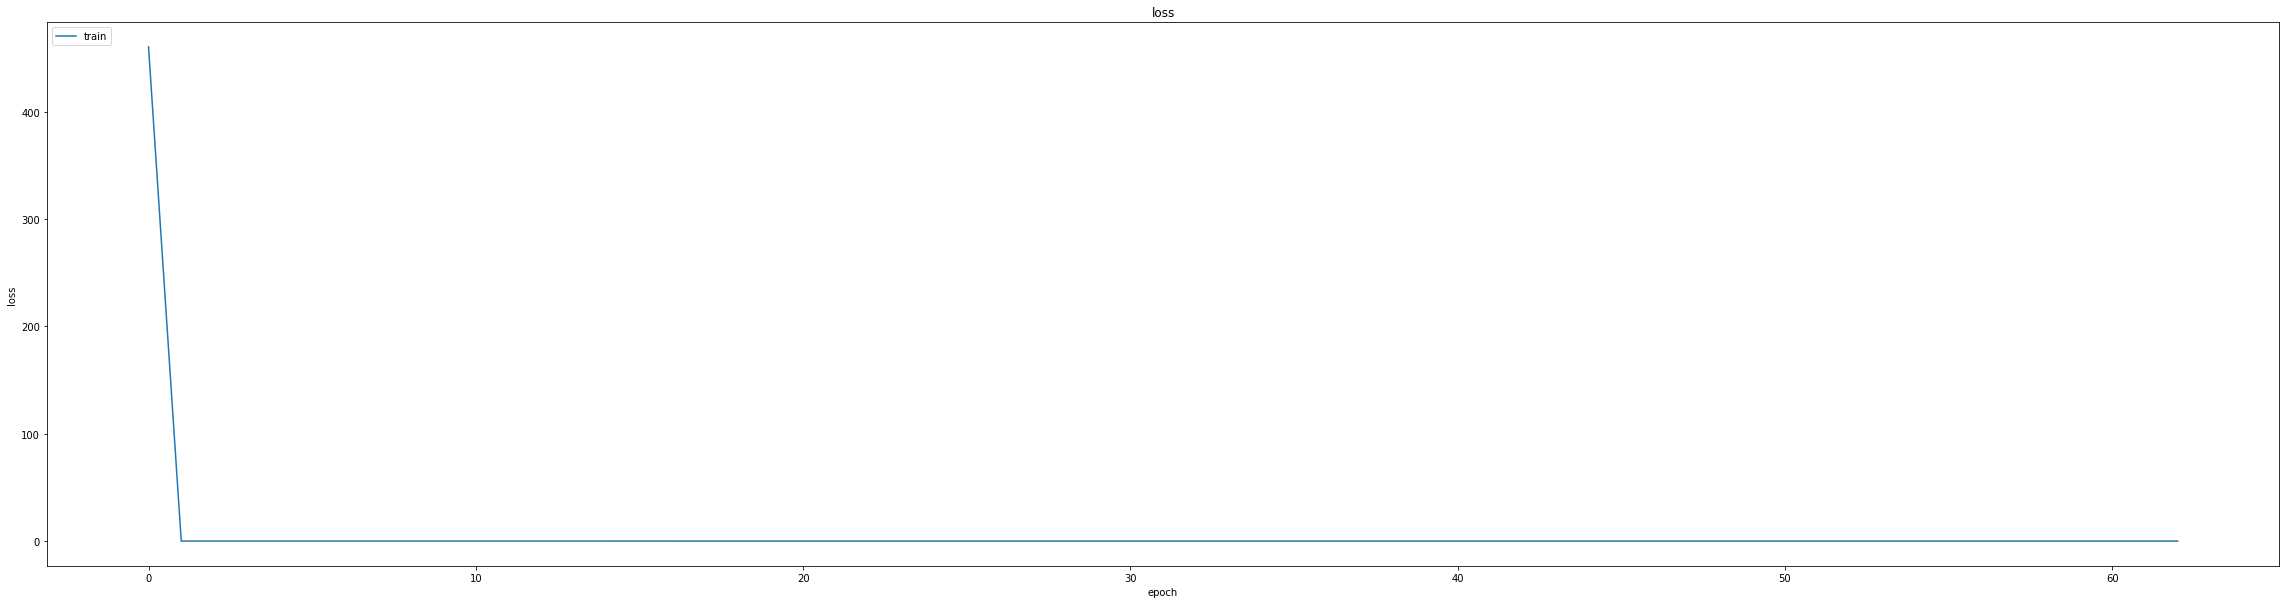

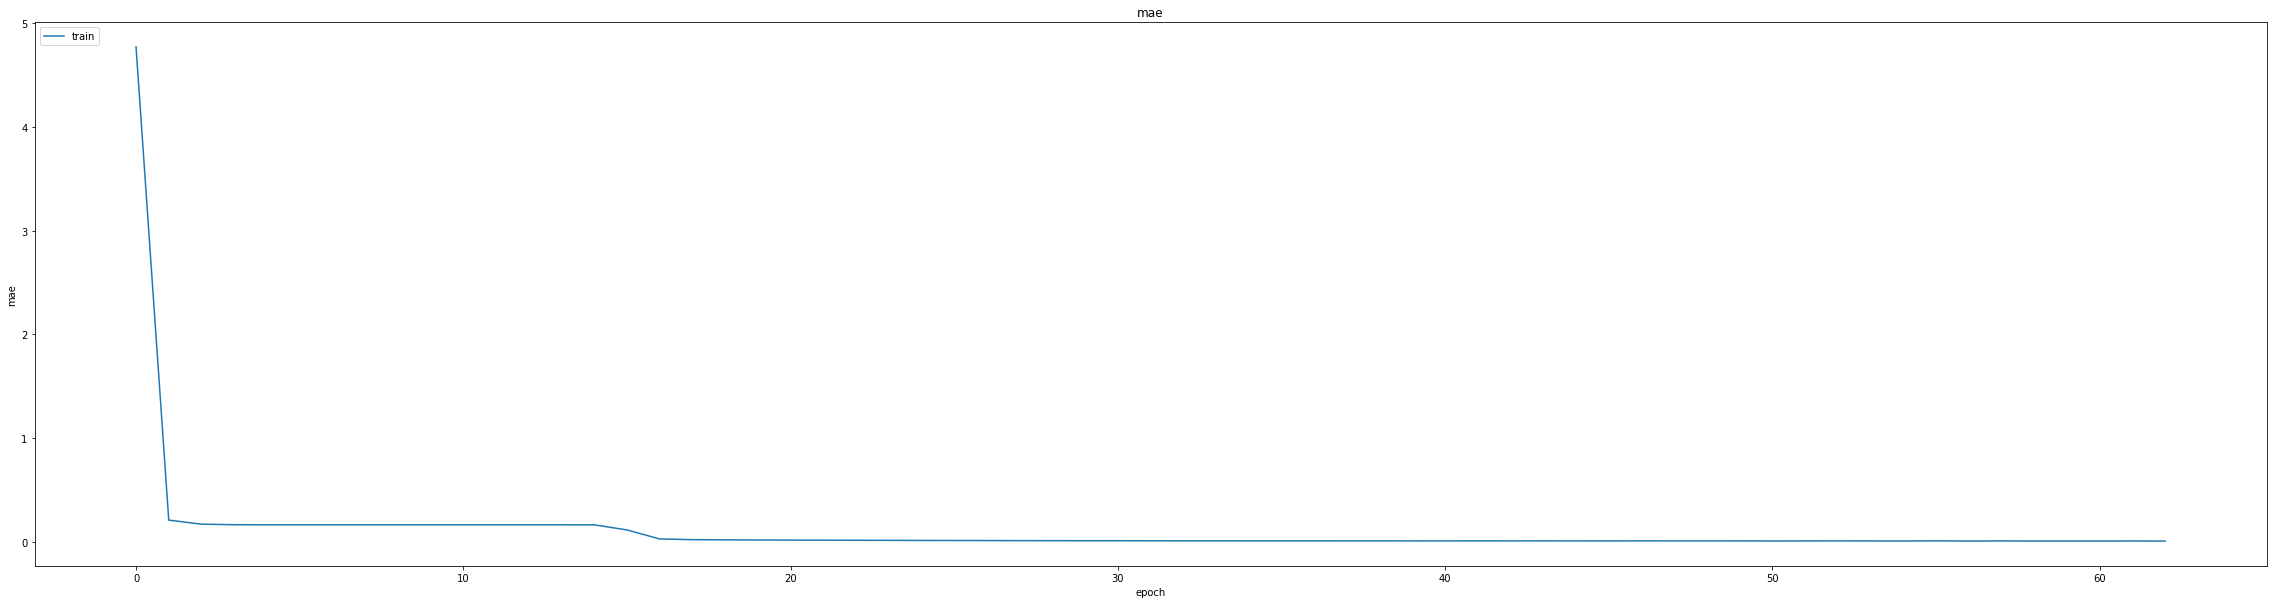

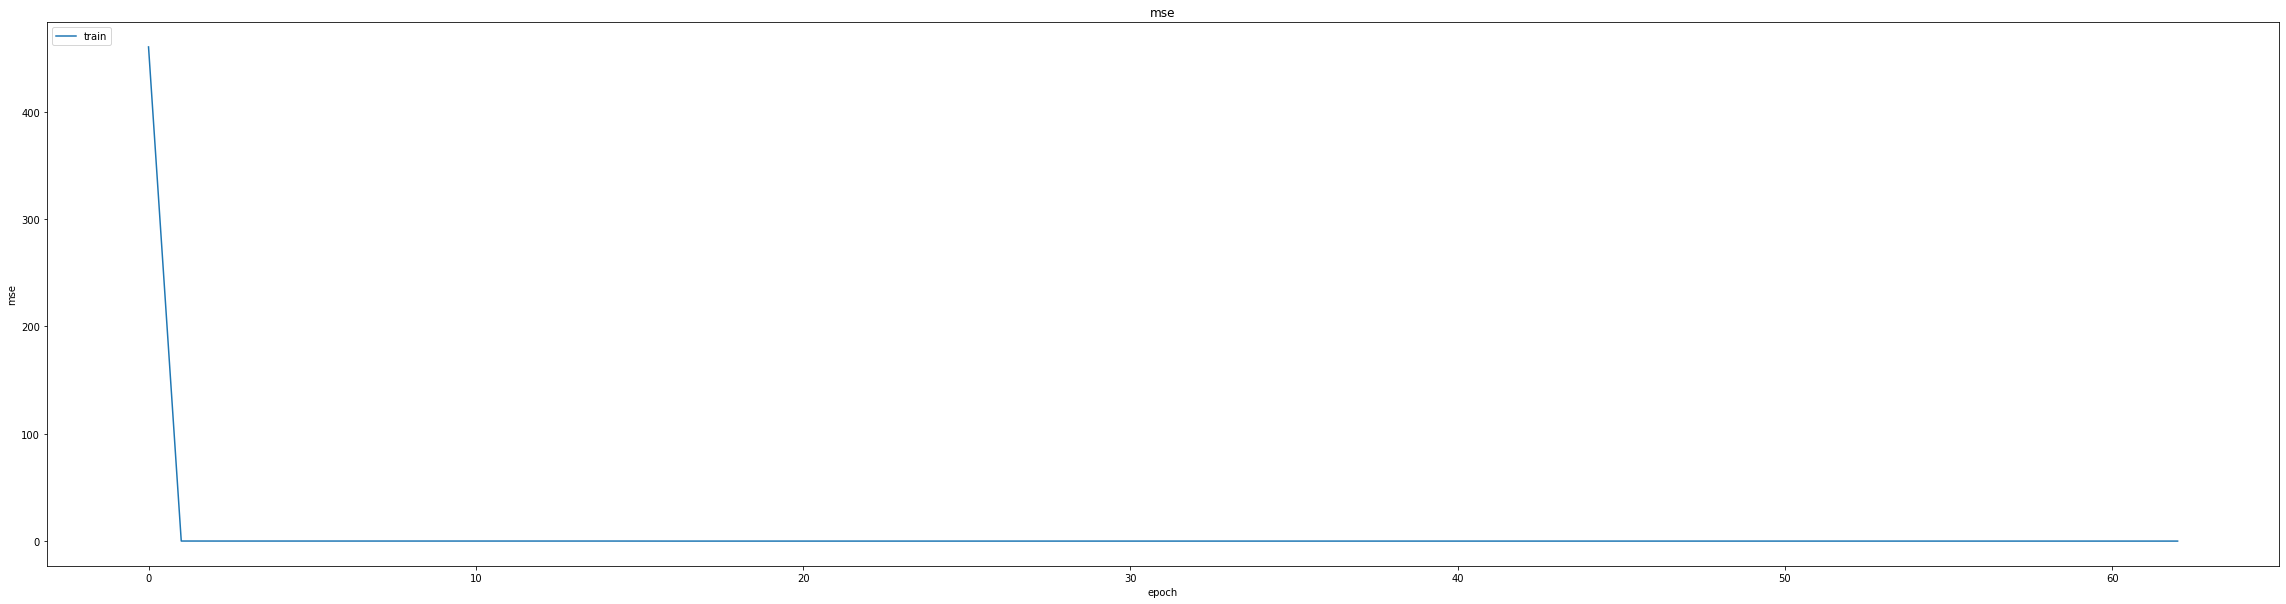

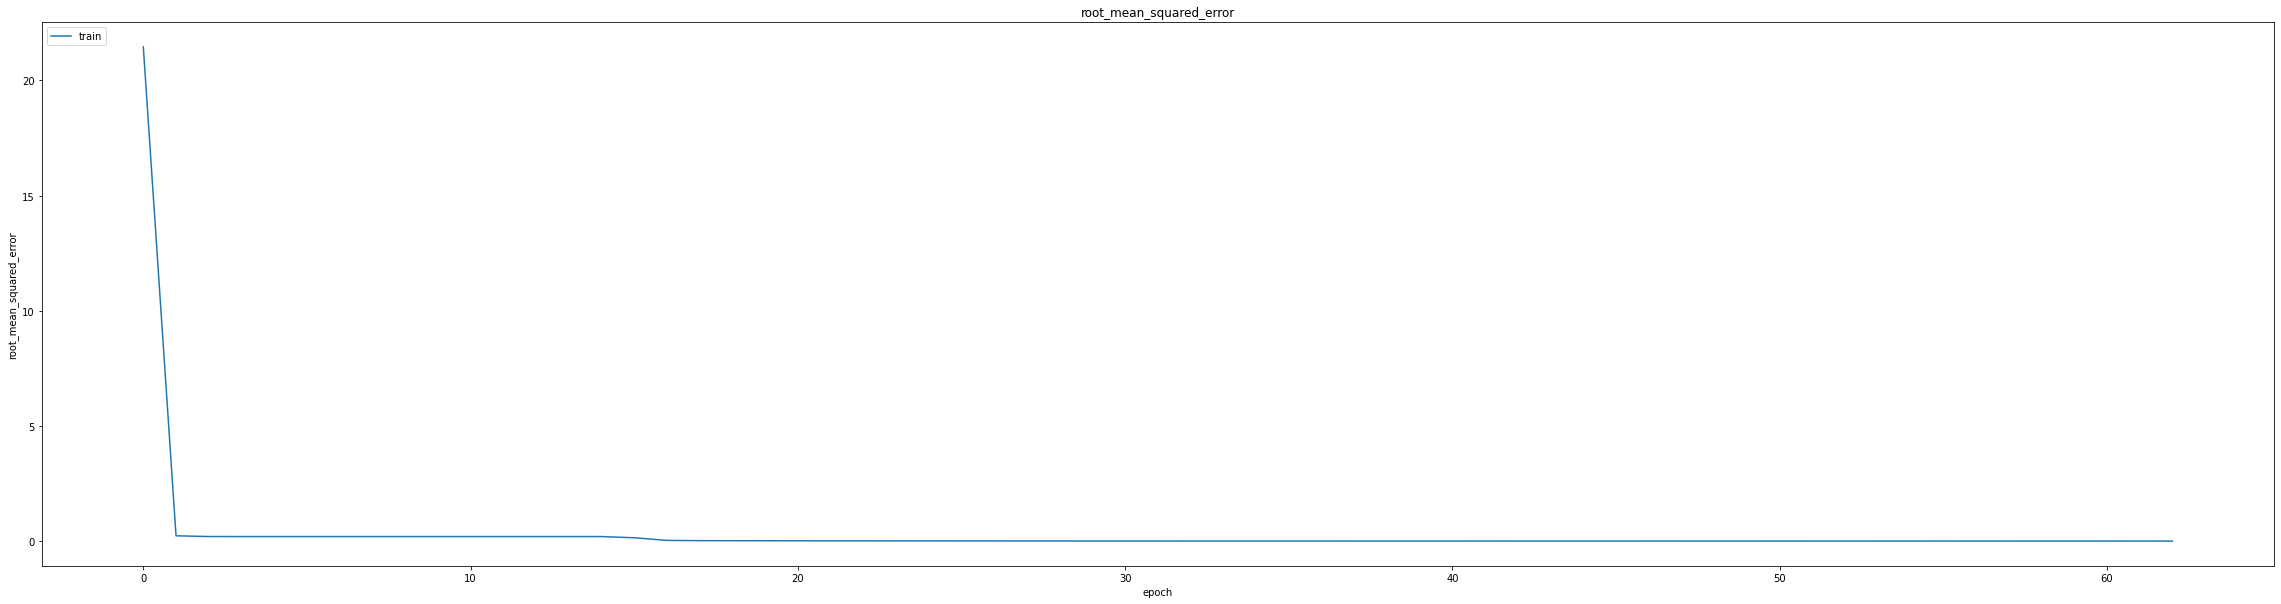

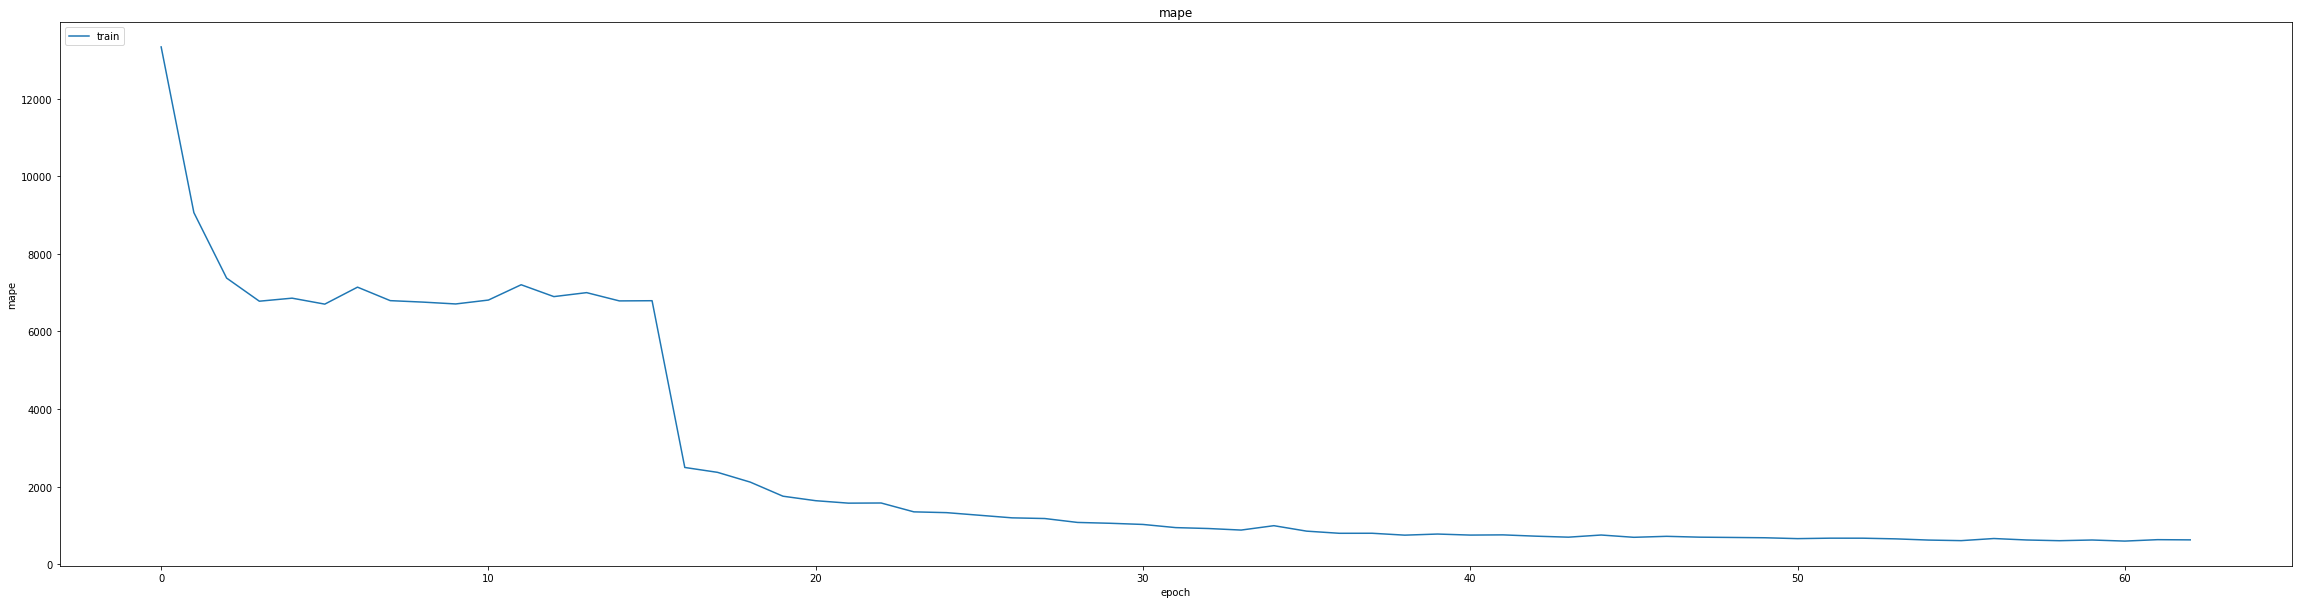

In [ ]:
thesis.SummarizeHistory(history)

In [52]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.015194490551948547
0.015194490551948547
0.021519463509321213
1044/1044 [==============================] - 6s 5ms/step
0.9902258084492975


In [53]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [54]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 4.0995e-04 - mae: 0.0098 - mse: 4.0995e-04 - root_mean_squared_error: 0.0202 - mape: 719.6846
Epoch 1: val_mse did not improve from 0.00046
405/405 [==============================] - 19s 23ms/step - loss: 4.0925e-04 - mae: 0.0098 - mse: 4.0925e-04 - root_mean_squared_error: 0.0202 - mape: 718.2186 - val_loss: 5.1522e-04 - val_mae: 0.0167 - val_mse: 5.1522e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 3295.9697 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 5.8847e-05 - mae: 0.0058 - mse: 5.8847e-05 - root_mean_squared_error: 0.0077 - mape: 666.4995
Epoch 2: val_mse did not improve from 0.00046
405/405 [==============================] - 6s 14ms/step - loss: 5.8847e-05 - mae: 0.0058 - mse: 5.8847e-05 - root_mean_squared_error: 0.0077 - mape: 666.4995 - val_loss: 5.1623e-04 - val_mae: 0.0165 - val_mse: 5.1623e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 3179.3552 - lr: 0.0010
lr

405/405 [==============================] - 16s 40ms/step - loss: 5.6416e-05 - mae: 0.0057 - mse: 5.6416e-05 - root_mean_squared_error: 0.0075 - mape: 651.2063 - val_loss: 4.5190e-04 - val_mae: 0.0153 - val_mse: 4.5190e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 3083.2861 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 6.1424e-05 - mae: 0.0060 - mse: 6.1424e-05 - root_mean_squared_error: 0.0078 - mape: 656.2848
Epoch 4: val_mse improved from 0.00045 to 0.00044, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 6.1424e-05 - mae: 0.0060 - mse: 6.1424e-05 - root_mean_squared_error: 0.0078 - mape: 656.2848 - val_loss: 4.3526e-04 - val_mae: 0.0151 - val_mse: 4.3526e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3041.2295 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
404/405 [============================>.] - ETA: 0s - loss: 6.4359e-05 - mae: 0.0061 - mse: 6.4359e-05 - root_mean_squared_error: 0.0080 - mape: 652.7460
Epoch 5: val_mse improved from 0.00044 to 0.00042, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 6.4365e-05 - mae: 0.0061 - mse: 6.4365e-05 - root_mean_squared_error: 0.0080 - mape: 651.4164 - val_loss: 4.1631e-04 - val_mae: 0.0145 - val_mse: 4.1631e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 3014.8547 - lr: 8.1000e-04
Epoch 6/20
402/405 [============================>.] - ETA: 0s - loss: 6.8450e-05 - mae: 0.0064 - mse: 6.8450e-05 - root_mean_squared_error: 0.0083 - mape: 647.5788
Epoch 6: val_mse did not improve from 0.00042
405/405 [==============================] - 6s 14ms/step - loss: 6.8684e-05 - mae: 0.0064 - mse: 6.8684e-05 - root_mean_squared_error: 0.0083 - mape: 643.0678 - val_loss: 4.6615e-04 - val_mae: 0.0151 - val_mse: 4.6615e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 3063.1138 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 6.0473e-05 - mae: 0.0059 - mse: 6.0473e-05 - root_mean_squared_error: 0.0078 - mape: 62

405/405 [==============================] - 16s 41ms/step - loss: 5.1777e-05 - mae: 0.0054 - mse: 5.1777e-05 - root_mean_squared_error: 0.0072 - mape: 620.1901 - val_loss: 4.1207e-04 - val_mae: 0.0149 - val_mse: 4.1207e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 2901.6709 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
402/405 [============================>.] - ETA: 0s - loss: 5.1496e-05 - mae: 0.0055 - mse: 5.1496e-05 - root_mean_squared_error: 0.0072 - mape: 604.3917
Epoch 11: val_mse did not improve from 0.00041
405/405 [==============================] - 6s 15ms/step - loss: 5.1557e-05 - mae: 0.0055 - mse: 5.1557e-05 - root_mean_squared_error: 0.0072 - mape: 600.1804 - val_loss: 4.2587e-04 - val_mae: 0.0151 - val_mse: 4.2587e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2910.5798 - lr: 5.9049e-04
Epoch 12/20
402/405 [============================>.] - ETA: 0s - loss: 5.1835e-05 - mae: 0.0055 - mse: 5.1835e-05 - root_mean_squared_error: 0.0072 - mape:

405/405 [==============================] - 16s 40ms/step - loss: 5.1881e-05 - mae: 0.0055 - mse: 5.1881e-05 - root_mean_squared_error: 0.0072 - mape: 599.2213 - val_loss: 4.0852e-04 - val_mae: 0.0154 - val_mse: 4.0852e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 2837.6958 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
403/405 [============================>.] - ETA: 0s - loss: 4.5390e-05 - mae: 0.0051 - mse: 4.5390e-05 - root_mean_squared_error: 0.0067 - mape: 593.2086
Epoch 13: val_mse did not improve from 0.00041
405/405 [==============================] - 6s 15ms/step - loss: 4.5403e-05 - mae: 0.0051 - mse: 4.5403e-05 - root_mean_squared_error: 0.0067 - mape: 590.5375 - val_loss: 4.1124e-04 - val_mae: 0.0155 - val_mse: 4.1124e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 2808.9094 - lr: 5.3144e-04
Epoch 14/20
405/405 [==============================] - ETA: 0s - loss: 4.7041e-05 - mae: 0.0052 - mse: 4.7041e-05 - root_mean_squared_error: 0.0069 - mape:

405/405 [==============================] - 16s 39ms/step - loss: 4.7041e-05 - mae: 0.0052 - mse: 4.7041e-05 - root_mean_squared_error: 0.0069 - mape: 597.6625 - val_loss: 3.5081e-04 - val_mae: 0.0135 - val_mse: 3.5081e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2779.0447 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
403/405 [============================>.] - ETA: 0s - loss: 4.2422e-05 - mae: 0.0049 - mse: 4.2422e-05 - root_mean_squared_error: 0.0065 - mape: 595.2090
Epoch 15: val_mse improved from 0.00035 to 0.00032, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 4.2425e-05 - mae: 0.0049 - mse: 4.2425e-05 - root_mean_squared_error: 0.0065 - mape: 592.5282 - val_loss: 3.2376e-04 - val_mae: 0.0129 - val_mse: 3.2376e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2736.0486 - lr: 4.7830e-04
Epoch 16/20
402/405 [============================>.] - ETA: 0s - loss: 4.4701e-05 - mae: 0.0050 - mse: 4.4701e-05 - root_mean_squared_error: 0.0067 - mape: 572.7832
Epoch 16: val_mse did not improve from 0.00032
405/405 [==============================] - 6s 14ms/step - loss: 4.4705e-05 - mae: 0.0051 - mse: 4.4705e-05 - root_mean_squared_error: 0.0067 - mape: 568.7910 - val_loss: 3.6399e-04 - val_mae: 0.0143 - val_mse: 3.6399e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 2728.5020 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
403/405 [============================>.] - ETA: 0s - loss: 3.9744e-05 - mae: 0.0047 - mse: 3.9744e-05 - root_mean_squared_error: 0.0063 - mape:

405/405 [==============================] - 18s 43ms/step - loss: 3.7615e-05 - mae: 0.0046 - mse: 3.7615e-05 - root_mean_squared_error: 0.0061 - mape: 537.9115 - val_loss: 3.0451e-04 - val_mae: 0.0125 - val_mse: 3.0451e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 2575.5261 - lr: 3.8742e-04


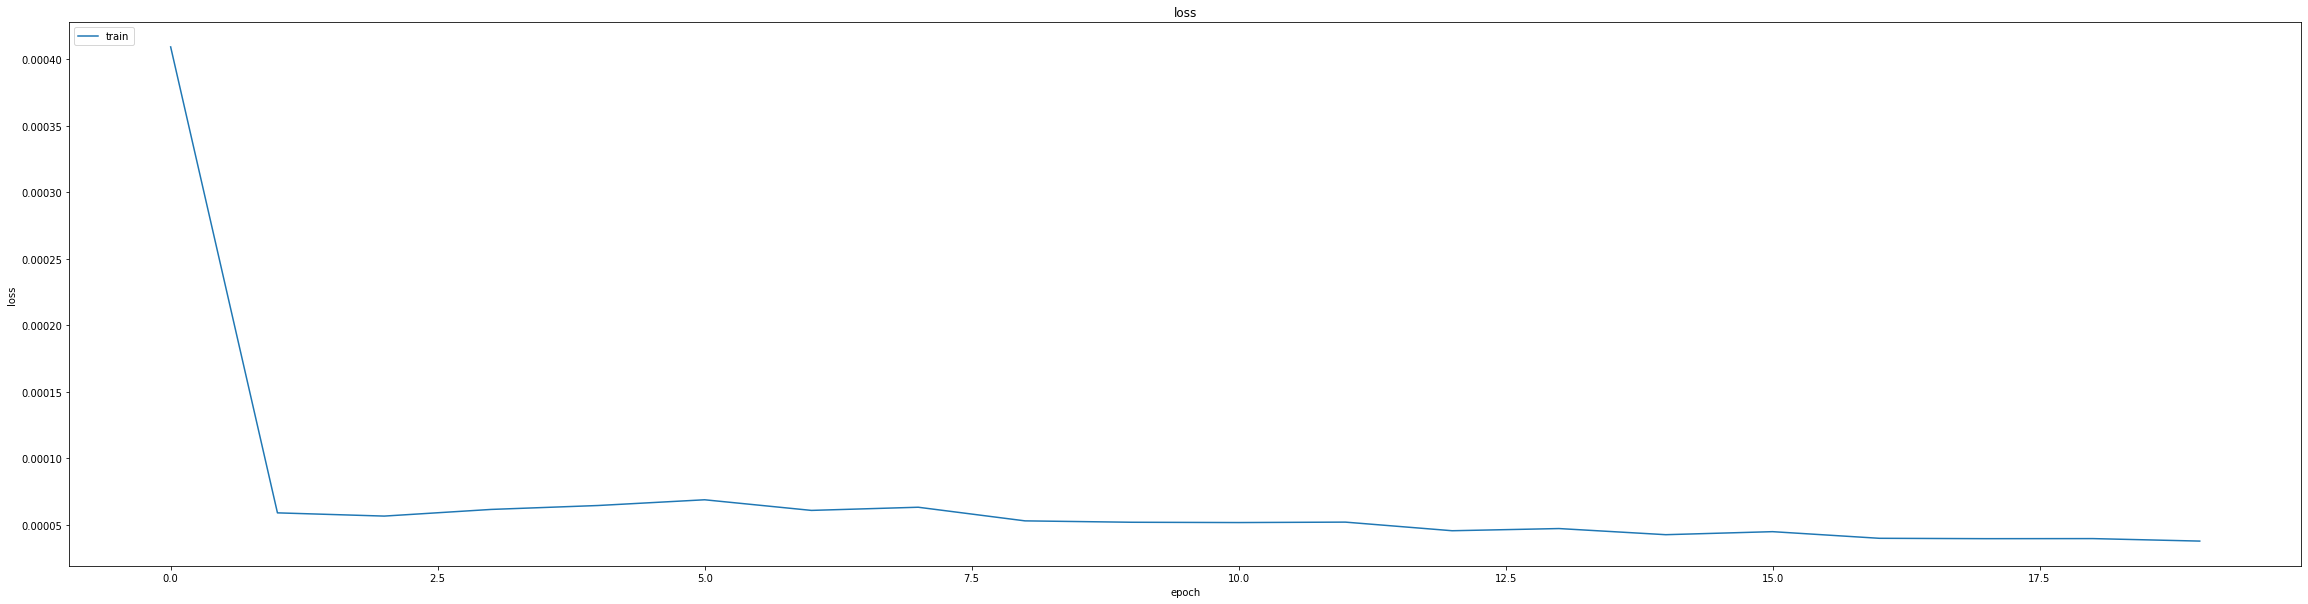

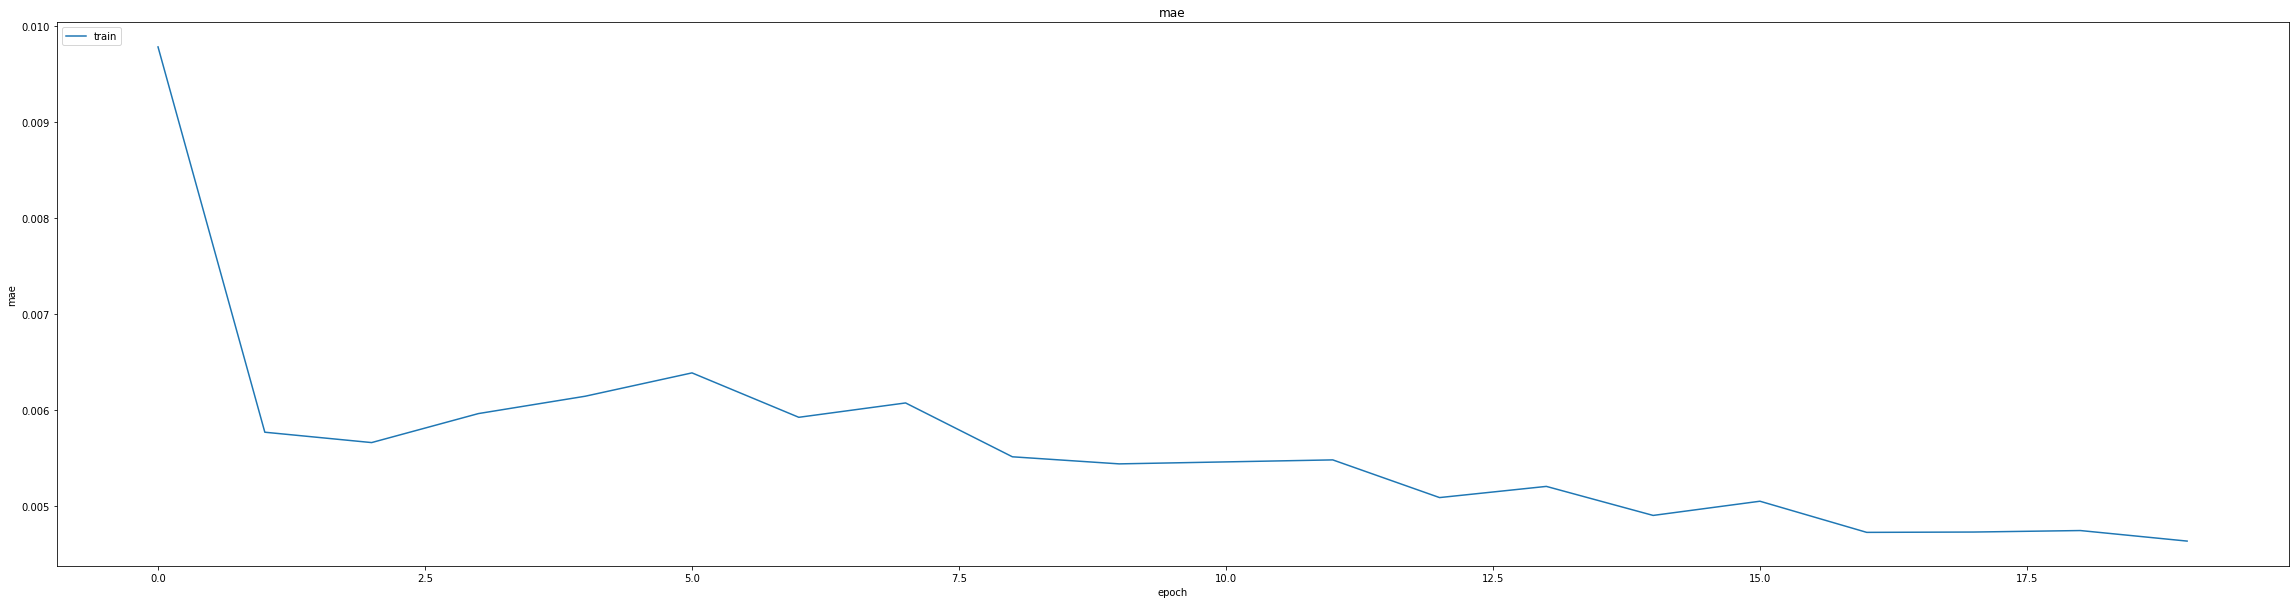

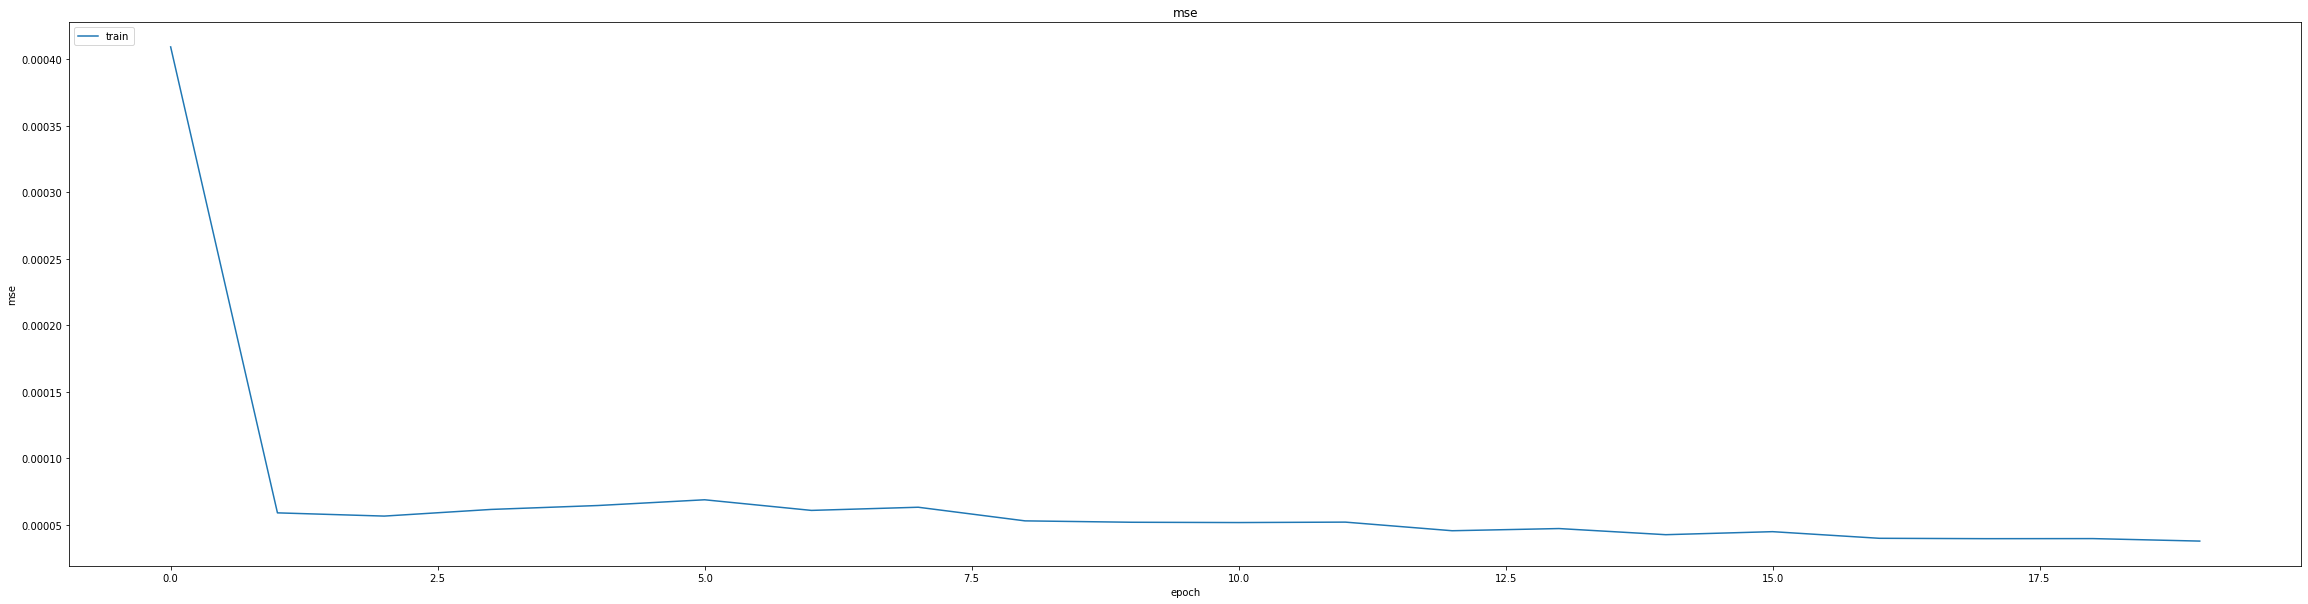

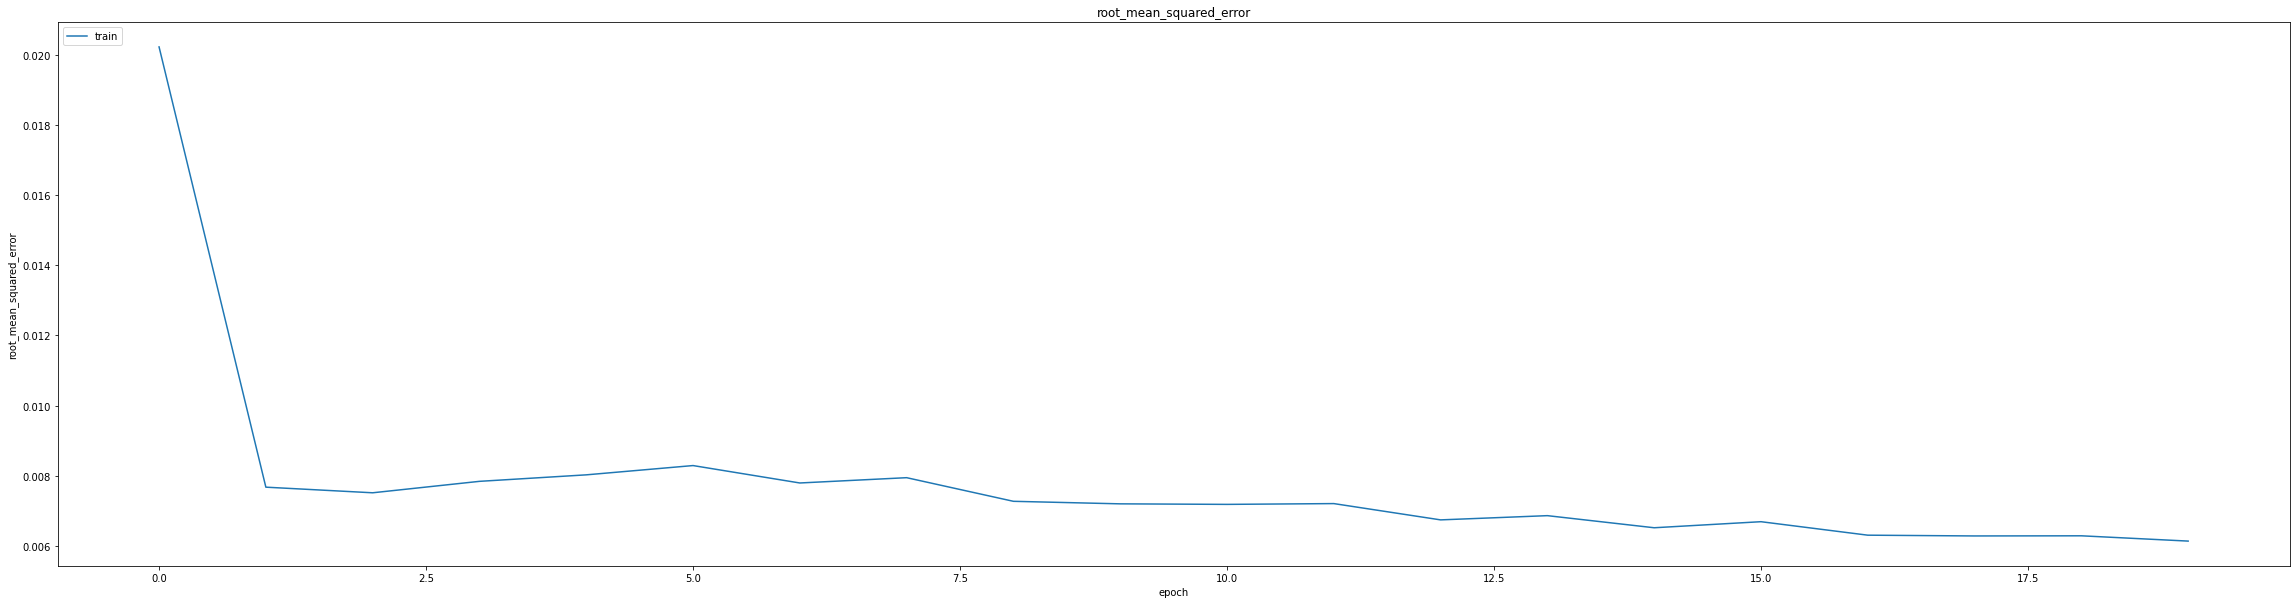

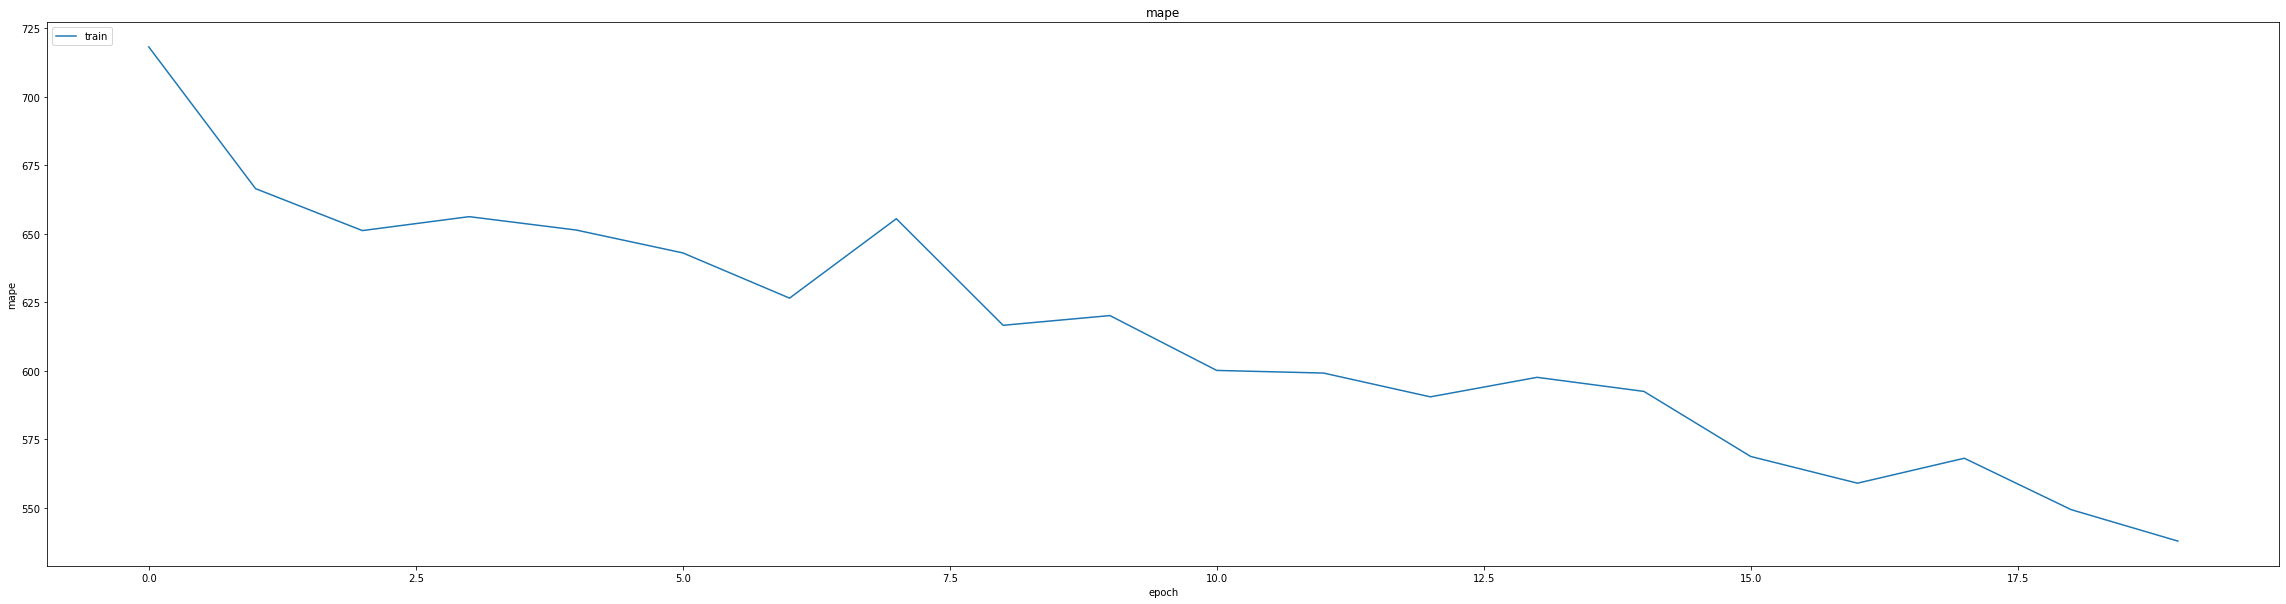

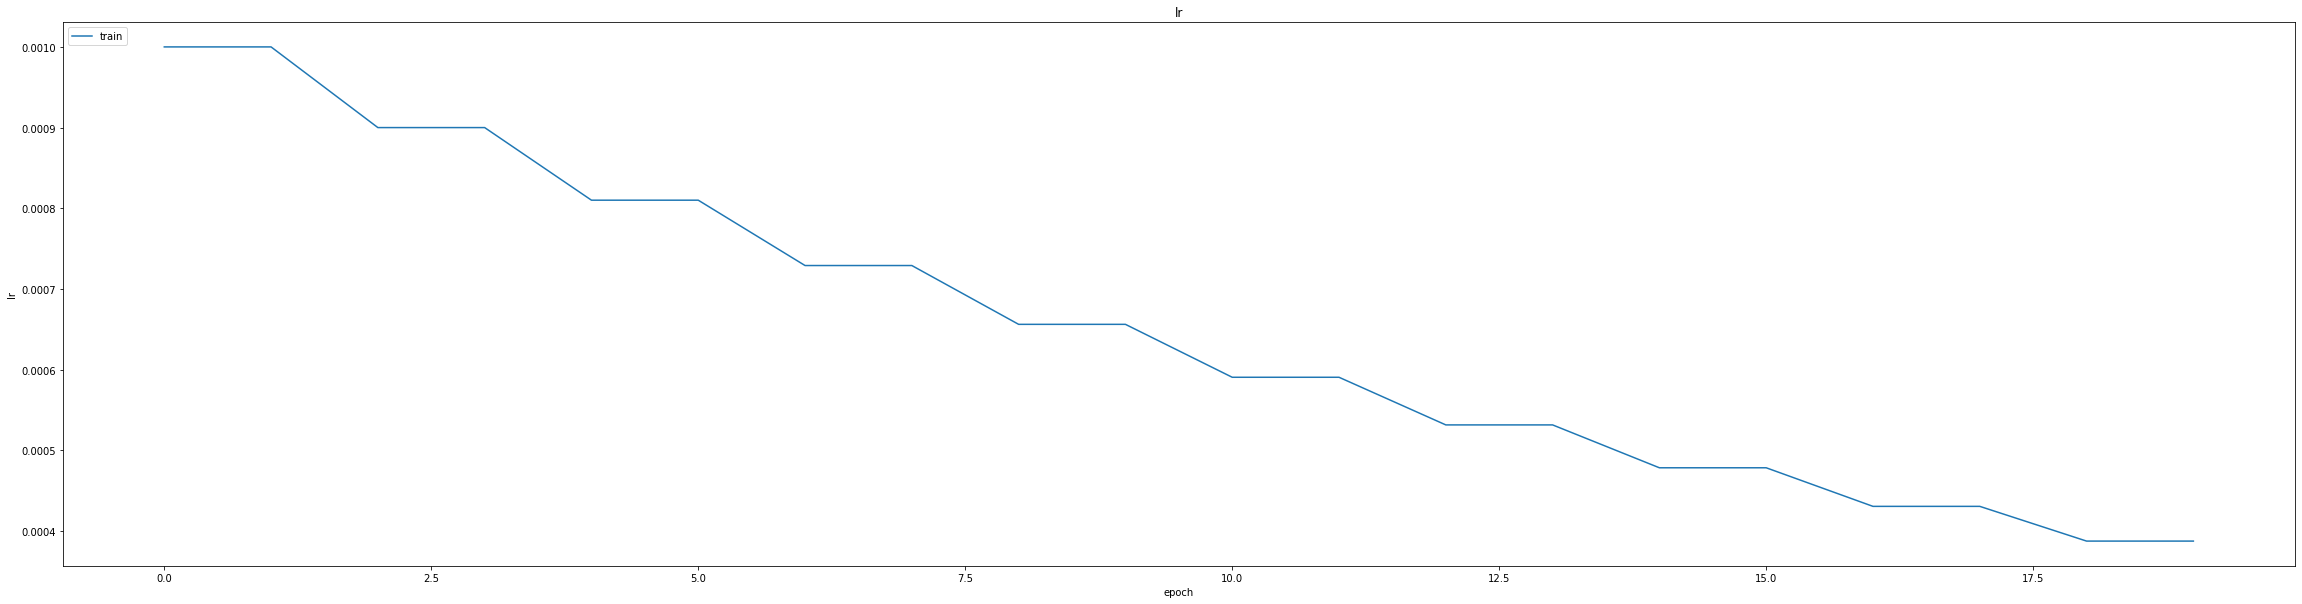

In [55]:
thesis.SummarizeHistory(history)

In [56]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.012507912702858448
0.012507912702858448
0.017450224608182907
1044/1044 [==============================] - 5s 4ms/step
0.9935728274551863


In [57]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(70-30)")

1044/1044 [==============================] - 4s 4ms/step


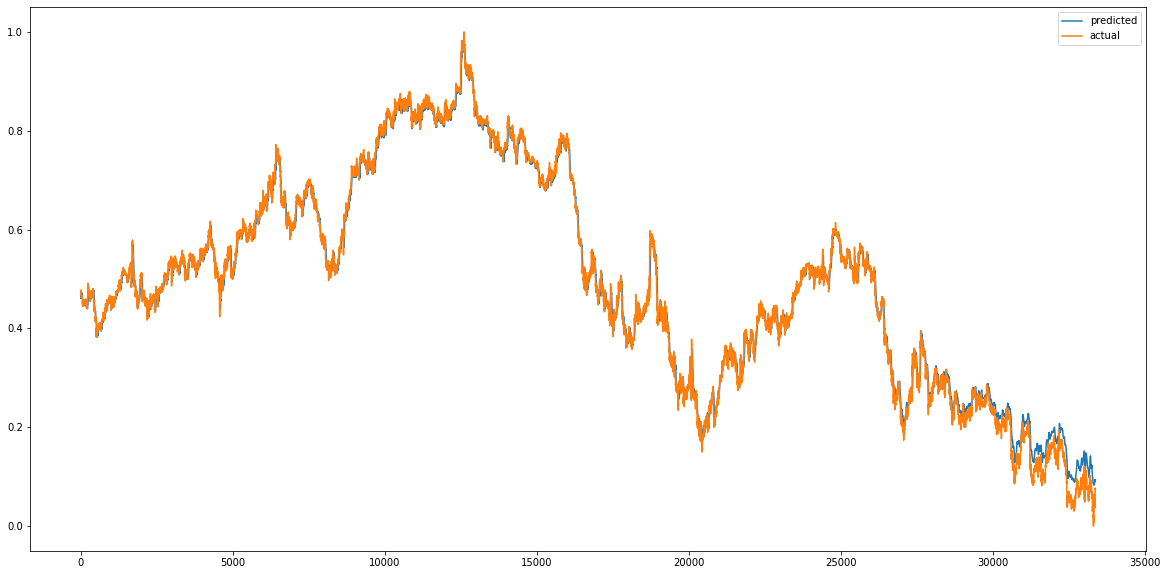

In [62]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


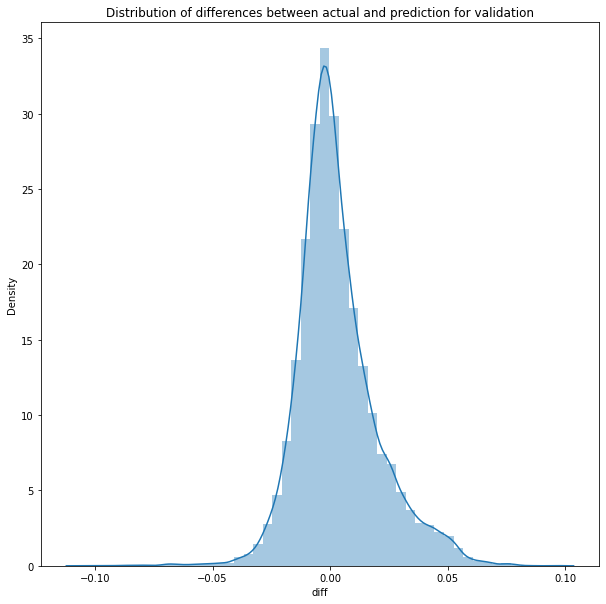

In [63]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


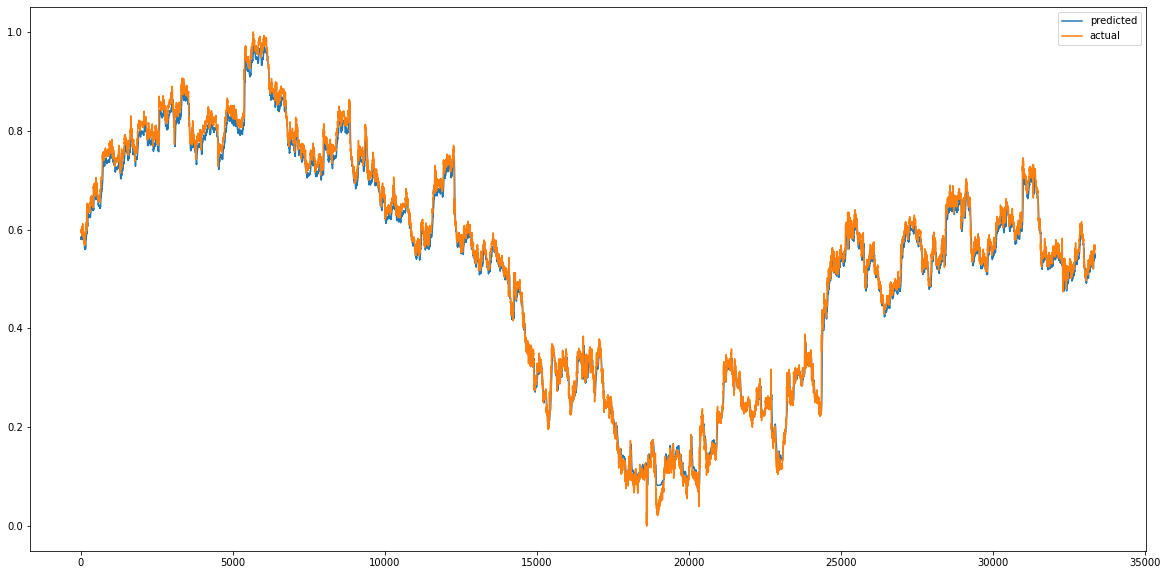

In [59]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


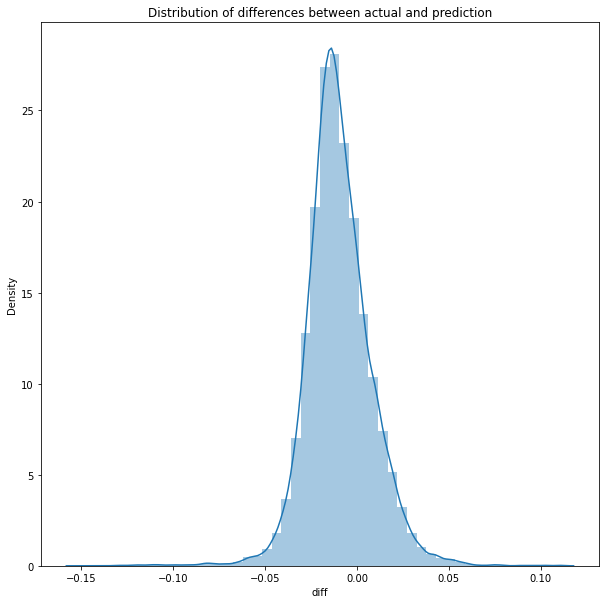

In [60]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004097872367005995
RMSE :  0.020243202234345226
MAE :  0.01608659038975589
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9926316376704089


count    33379.000000
mean        -0.009706
std          0.017765
min         -0.151399
25%         -0.020151
50%         -0.011202
75%          0.000087
max          0.111203
Name: diff, dtype: float64